In [1]:
!pip install pandas google-cloud-storage pyarrow fsspec gcsfs

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72.4/72.4 kB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 174.9/174.9 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.7/40.7 MB 4.0 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199.1/199.1 kB 4.5 MB/s eta 0:00:0000:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 5.5 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 160.1/160.1 kB 6.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [2]:
import pandas as pd
# Îπ†Î•∏ Ïó∞Í≤∞ ÌÖåÏä§Ìä∏Ïö©
import os
from google.cloud import storage

# .env ÌååÏùºÏù¥ docker-compose.yamlÏùò env_fileÎ°ú Î°úÎìúÎêòÎØÄÎ°ú
# ÌôòÍ≤Ω Î≥ÄÏàòÍ∞Ä Ïù¥ÎØ∏ ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏùå!

try:
    # ÌôòÍ≤Ω Î≥ÄÏàò ÌôïÏù∏
    print(f"ÌÇ§ ÌååÏùº Í≤ΩÎ°ú: {os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')}")
    
    # Î∞îÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•
    client = storage.Client()
    print(f"‚úÖ Ïó∞Í≤∞ ÏÑ±Í≥µ! ÌîÑÎ°úÏ†ùÌä∏: {client.project}")
    
    buckets = list(client.list_buckets())
    print(f"Î≤ÑÌÇ∑ Í∞úÏàò: {len(buckets)}")
    
    # Î≤ÑÌÇ∑ Î™©Î°ù
    for bucket in buckets:
        print(f"  - {bucket.name}")
        
except Exception as e:
    print(f"‚ùå Ïó∞Í≤∞ Ïã§Ìå®: {e}")

ÌÇ§ ÌååÏùº Í≤ΩÎ°ú: /home/jovyan/work/secrets/google_cloud_storage_hojae.json
‚úÖ Ïó∞Í≤∞ ÏÑ±Í≥µ! ÌîÑÎ°úÏ†ùÌä∏: sprintda05-hojae2
Î≤ÑÌÇ∑ Í∞úÏàò: 1
  - sprintda05_final_project


In [27]:
import os
import pandas as pd
from google.cloud import storage

# GCSÏóêÏÑú Parquet ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌòïÏãù ÌôïÏù∏
print("\n--- 2. GCS Parquet ÌååÏùº Î°úÎìú Î∞è ÌòïÏãù ÌôïÏù∏ ---")
gcs_parquet_path = "gs://sprintda05_final_project/hackle/hackle_events.parquet"

print(f"üìÇ Îã§Ïùå Parquet ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§: {gcs_parquet_path}")

# pandasÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Parquet ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
# 'engine'ÏùÑ 'pyarrow'Î°ú Î™ÖÏãúÌïòÏó¨ ÌôïÏã§ÌïòÍ≤å pyarrow ÏÇ¨Ïö©
# gcsfsÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎã§Î©¥ pandasÎäî gs:// Í≤ΩÎ°úÎ•º ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨
hackle_events = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n‚úÖ Parquet ÌååÏùº Î°úÎìú ÏÑ±Í≥µ!")

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ (hackle_events.head()) ---")
print(hackle_events.head())

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥ (hackle_events.info()) ---")
# Í∞Å Ïª¨ÎüºÏùò Ïù¥Î¶Ñ, Non-Null Í∞úÏàò, Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ(Dtype) ÌôïÏù∏
hackle_events.info()

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í∏∞Ïà† ÌÜµÍ≥Ñ (hackle_events.describe()) ---")
# Ïà´ÏûêÌòï Ïª¨ÎüºÏóê ÎåÄÌïú ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ÌôïÏù∏
print(hackle_events.describe(include='all')) # Î™®Îì† Ïª¨Îüº ÌÉÄÏûÖ Ìè¨Ìï®

print(f"\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌñâÍ≥º Ïó¥ Í∞úÏàò (hackle_events.shape): {hackle_events.shape} ---")

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïª¨Îüº Î™©Î°ù (hackle_events.columns) ---")
print(hackle_events.columns.tolist())


--- 2. GCS Parquet ÌååÏùº Î°úÎìú Î∞è ÌòïÏãù ÌôïÏù∏ ---
üìÇ Îã§Ïùå Parquet ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§: gs://sprintda05_final_project/hackle/hackle_events.parquet

‚úÖ Parquet ÌååÏùº Î°úÎìú ÏÑ±Í≥µ!

--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ (hackle_events.head()) ---
                               event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06 2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53 2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2 2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfh

In [28]:
import os
import pandas as pd
from google.cloud import storage

# GCSÏóêÏÑú Parquet ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌòïÏãù ÌôïÏù∏
print("\n--- 2. GCS Parquet ÌååÏùº Î°úÎìú Î∞è ÌòïÏãù ÌôïÏù∏ ---")
gcs_parquet_path = "gs://sprintda05_final_project/hackle/user_properties.parquet"

print(f"üìÇ Îã§Ïùå Parquet ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§: {gcs_parquet_path}")

# pandasÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Parquet ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
# 'engine'ÏùÑ 'pyarrow'Î°ú Î™ÖÏãúÌïòÏó¨ ÌôïÏã§ÌïòÍ≤å pyarrow ÏÇ¨Ïö©
# gcsfsÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎã§Î©¥ pandasÎäî gs:// Í≤ΩÎ°úÎ•º ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨
user_properties = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n‚úÖ Parquet ÌååÏùº Î°úÎìú ÏÑ±Í≥µ!")

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ (user_properties.head()) ---")
print(user_properties.head())

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥ (user_properties.info()) ---")
# Í∞Å Ïª¨ÎüºÏùò Ïù¥Î¶Ñ, Non-Null Í∞úÏàò, Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ(Dtype) ÌôïÏù∏
user_properties.info()

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í∏∞Ïà† ÌÜµÍ≥Ñ (user_properties.describe()) ---")
# Ïà´ÏûêÌòï Ïª¨ÎüºÏóê ÎåÄÌïú ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ÌôïÏù∏
print(user_properties.describe(include='all')) # Î™®Îì† Ïª¨Îüº ÌÉÄÏûÖ Ìè¨Ìï®

print(f"\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌñâÍ≥º Ïó¥ Í∞úÏàò (user_properties.shape): {user_properties.shape} ---")

print("\n--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïª¨Îüº Î™©Î°ù (user_properties.columns) ---")
print(user_properties.columns.tolist())


--- 2. GCS Parquet ÌååÏùº Î°úÎìú Î∞è ÌòïÏãù ÌôïÏù∏ ---
üìÇ Îã§Ïùå Parquet ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§: gs://sprintda05_final_project/hackle/user_properties.parquet

‚úÖ Parquet ÌååÏùº Î°úÎìú ÏÑ±Í≥µ!

--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ (user_properties.head()) ---
   user_id  class gender  grade  school_id
0  1000000      1      M      1       1885
1  1000009     10      F      2       3869
2  1000012     10      F      1       5091
3  1000013      8      F      2       1743
4  1000015      2      F      3       5078

--- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥ (user_properties.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object

In [ ]:
display(user_properties)


user_id  class gender  grade  school_id
0                            1000000      1      M      1       1885
1                            1000009     10      F      2       3869
2                            1000012     10      F      1       5091
3                            1000013      8      F      2       1743
4                            1000015      2      F      3       5078
...                              ...    ...    ...    ...        ...
230814                        999992      1      M      2       2240
230815                        999996      5      M      2        365
230816                        999997      2      M      3       2502
230817  nhj4wh46MAf5K0IHDu4DGyRsdWn2      5      F      2       3499
230818  nmbzA4awkiRGXX26fT6wpoxURY43      1      F      1       5407

[230819 rows x 5 columns]

# üîç Î™ÖÏÑ∏ÏÑú Î™®Ìò∏ Î∂ÄÎ∂Ñ Ï†ïÏùò

## Ìï¥Í≤∞Ìï† Î™®Ìò∏Ìïú Ï†êÎì§

### accounts_blockrecord
- ‚ùì "Ï∞®Îã® ÌõÑ Ï∞®Îã® Ìï¥Ï†úÎäî ÏóÜÎã§. Ïôú?" ‚Üí **Ïã§Ï†úÎ°ú Ìï¥Ï†ú Í∏∞Îä•Ïù¥ ÏóÜÎäîÏßÄ ÌôïÏù∏**
- ‚ùì Ï∞®Îã® Ïù¥Ïú† Î™©Î°ùÏù¥ Ï†ïÌôïÌïúÍ∞Ä? ‚Üí **Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò reason Í∞íÎì§ ÌôïÏù∏**

### accounts_nearbyschool  
- ‚ùì "Í±∞Î¶¨ Í∏∞Ï§ÄÏù¥ Î≠îÏßÄ?" ‚Üí **distance Îã®ÏúÑÏôÄ ÏµúÎåÄÍ∞í ÌôïÏ†ï**
- ‚ùì "Î∞òÍ≤Ω 50km ÎÇ¥Î∂Ä Ï∂îÏ∏°" ‚Üí **Ïã§Ï†úÎ°ú 50kmÍ∞Ä Í∏∞Ï§ÄÏù∏ÏßÄ ÌôïÏù∏**

## Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [3]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")
df_nearby = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet")

### Ï∞®Îã® Ìï¥Ï†ú Ïó¨Î∂Ä ÌôïÏ†ï

In [4]:
# üö´ Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä• Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏ†ï
print("=" * 50)
print("üîç Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä• Ï°¥Ïû¨ Ïó¨Î∂Ä")
print("=" * 50)

# ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò Ï§ëÎ≥µ Ï∞®Îã® ÌôïÏù∏
duplicate_pairs = df_block.groupby(['user_id', 'block_user_id']).size()
repeated_blocks = duplicate_pairs[duplicate_pairs > 1]

print(f"Ï¥ù Ï∞®Îã® Í¥ÄÍ≥Ñ: {len(df_block):,}Í±¥")
print(f"Í≥†Ïú† Ï∞®Îã® Ïåç: {len(duplicate_pairs):,}Ïåç")
print(f"Ï§ëÎ≥µ Ï∞®Îã® Ïåç: {len(repeated_blocks):,}Ïåç")

if len(repeated_blocks) == 0:
    print("\n‚úÖ Í≤∞Î°†: Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä• ÏóÜÏùå (ÎòêÎäî Ìï¥Ï†ú Ïãú Í∏∞Î°ù ÏÇ≠Ï†ú)")
    print("   ‚Üí ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò Ï§ëÎ≥µ Ï∞®Îã®Ïù¥ Ï†ÑÌòÄ ÏóÜÏùå")
else:
    print(f"\n‚ö†Ô∏è  Í≤∞Î°†: Ï∞®Îã® Ìï¥Ï†ú ÌõÑ Ïû¨Ï∞®Îã® Í∞ÄÎä•")
    print(f"   ‚Üí {len(repeated_blocks)}ÏåçÏù¥ Ïó¨Îü¨ Î≤à Ï∞®Îã®Îê®")
    print(f"   ‚Üí ÏµúÎåÄ {repeated_blocks.max()}Î≤à Ï∞®Îã®")

üîç Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä• Ï°¥Ïû¨ Ïó¨Î∂Ä
Ï¥ù Ï∞®Îã® Í¥ÄÍ≥Ñ: 19,482Í±¥
Í≥†Ïú† Ï∞®Îã® Ïåç: 18,505Ïåç
Ï§ëÎ≥µ Ï∞®Îã® Ïåç: 548Ïåç

‚ö†Ô∏è  Í≤∞Î°†: Ï∞®Îã® Ìï¥Ï†ú ÌõÑ Ïû¨Ï∞®Îã® Í∞ÄÎä•
   ‚Üí 548ÏåçÏù¥ Ïó¨Îü¨ Î≤à Ï∞®Îã®Îê®
   ‚Üí ÏµúÎåÄ 20Î≤à Ï∞®Îã®


## Ï∞®Îã® ÏÇ¨Ïú† Ï†ïÌôïÌïú Î™©Î°ù ÌôïÏ†ï

In [5]:
# üö´ Ï∞®Îã® ÏÇ¨Ïú† Ï†ïÌôïÌïú Î™©Î°ù ÌôïÏ†ï  
print("=" * 50)
print("üîç Ï∞®Îã® ÏÇ¨Ïú† Ï†ïÌôïÌïú Î™©Î°ù")
print("=" * 50)

actual_reasons = df_block['reason'].unique()
reason_counts = df_block['reason'].value_counts()

print("üìã Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Îã® ÏÇ¨Ïú†:")
for i, reason in enumerate(actual_reasons, 1):
    count = reason_counts[reason]
    pct = count / len(df_block) * 100
    print(f"{i:2d}. '{reason}' - {count:,}Í±¥ ({pct:.1f}%)")

print(f"\nÏ¥ù {len(actual_reasons)}Í∞ú ÏÇ¨Ïú†")

# Î™ÖÏÑ∏ÏÑúÏôÄ ÎπÑÍµê
spec_reasons = ['Í∑∏ÎÉ•...', 'ÏπúÍµ¨ ÏÇ¨Ïù¥Í∞Ä Ïñ¥ÏÉâÌï¥Ïßê', 'ÎÇòÎûë Í¥ÄÎ†® ÏóÜÎäî ÏßàÎ¨∏ÏùÑ ÏûêÍæ∏ Î≥¥ÎÉÑ', 
                'Í∏∞ÌÉÄ', 'Î™®Î•¥Îäî ÏÇ¨ÎûåÏûÑ', 'ÎÑàÎ¨¥ ÎßéÏùÄ ÏñëÏùò ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ', 'ÏÇ¨Ïπ≠ Í≥ÑÏ†ï']

print(f"\nüîç Î™ÖÏÑ∏ÏÑú ÏÇ¨Ïú† Í∞úÏàò: {len(spec_reasons)}Í∞ú")
print(f"Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïú† Í∞úÏàò: {len(actual_reasons)}Í∞ú")

missing_in_spec = set(actual_reasons) - set(spec_reasons)
missing_in_data = set(spec_reasons) - set(actual_reasons) 

if missing_in_spec:
    print(f"\n‚ö†Ô∏è  Î™ÖÏÑ∏ÏÑúÏóê ÏóÜÎäî ÏÇ¨Ïú†: {list(missing_in_spec)}")
if missing_in_data:
    print(f"‚ö†Ô∏è  Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎäî ÏÇ¨Ïú†: {list(missing_in_data)}")
if not missing_in_spec and not missing_in_data:
    print("\n‚úÖ Î™ÖÏÑ∏ÏÑúÏôÄ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏùºÏπò")

üîç Ï∞®Îã® ÏÇ¨Ïú† Ï†ïÌôïÌïú Î™©Î°ù


NameError: name 'df_block' is not defined

### Í∞ÄÍπåÏö¥ ÌïôÍµê Í±∞Î¶¨ Í∏∞Ï§Ä ÌôïÏ†ï

In [ ]:
# üè´ Í∞ÄÍπåÏö¥ ÌïôÍµê Í±∞Î¶¨ Í∏∞Ï§Ä ÌôïÏ†ï
print("=" * 50) 
print("üîç Í∞ÄÍπåÏö¥ ÌïôÍµê Í±∞Î¶¨ Í∏∞Ï§Ä ÌôïÏ†ï")
print("=" * 50)

distances = df_nearby['distance']

print("üìè Í±∞Î¶¨ ÌÜµÍ≥Ñ:")
print(f"ÏµúÏÜåÍ∞í: {distances.min():.6f}")
print(f"ÏµúÎåÄÍ∞í: {distances.max():.6f}")
print(f"ÌèâÍ∑†Í∞í: {distances.mean():.6f}")

# Í±∞Î¶¨ Îã®ÏúÑ ÌôïÏ†ï
max_dist = distances.max()
if max_dist < 100:
    unit = "km"
    print(f"\n‚úÖ Í±∞Î¶¨ Îã®ÏúÑ: ÌÇ¨Î°úÎØ∏ÌÑ∞(km)")
else:
    unit = "m" 
    print(f"\n‚úÖ Í±∞Î¶¨ Îã®ÏúÑ: ÎØ∏ÌÑ∞(m)")
    print(f"   ‚Üí ÏµúÎåÄ Í±∞Î¶¨: {max_dist/1000:.1f}km")

# 50km Í∏∞Ï§Ä ÌôïÏ†ï
if unit == "km":
    within_50km = (distances <= 50).sum()
    exactly_50km = (distances > 49.9) & (distances <= 50.0)
else:
    within_50km = (distances <= 50000).sum()
    exactly_50km = (distances > 49900) & (distances <= 50000)

print(f"\nüéØ 50km Í∏∞Ï§Ä Î∂ÑÏÑù:")
print(f"50km Ïù¥Ìïò Í¥ÄÍ≥Ñ: {within_50km:,}Ïåç ({within_50km/len(df_nearby)*100:.1f}%)")
print(f"Ï†ÑÏ≤¥ Í¥ÄÍ≥Ñ: {len(df_nearby):,}Ïåç")

if within_50km == len(df_nearby):
    print("\n‚úÖ Í≤∞Î°†: 50kmÍ∞Ä Í∞ÄÍπåÏö¥ ÌïôÍµê Í∏∞Ï§ÄÏúºÎ°ú ÌôïÏ†ï")
    print("   ‚Üí Î™®Îì† Í¥ÄÍ≥ÑÍ∞Ä 50km Ïù¥Ìïò")
else:
    over_50km = len(df_nearby) - within_50km
    print(f"\n‚ö†Ô∏è  50km Ï¥àÍ≥º Í¥ÄÍ≥Ñ: {over_50km:,}Ïåç")
    print(f"   ‚Üí Ïã§Ï†ú Í∏∞Ï§Ä: ÏïΩ {distances.max():.1f}{unit}")

üîç Í∞ÄÍπåÏö¥ ÌïôÍµê Í±∞Î¶¨ Í∏∞Ï§Ä ÌôïÏ†ï
üìè Í±∞Î¶¨ ÌÜµÍ≥Ñ:
ÏµúÏÜåÍ∞í: 0.000000
ÏµúÎåÄÍ∞í: 49.296594
ÌèâÍ∑†Í∞í: 0.055338

‚úÖ Í±∞Î¶¨ Îã®ÏúÑ: ÌÇ¨Î°úÎØ∏ÌÑ∞(km)

üéØ 50km Í∏∞Ï§Ä Î∂ÑÏÑù:
50km Ïù¥Ìïò Í¥ÄÍ≥Ñ: 59,500Ïåç (100.0%)
Ï†ÑÏ≤¥ Í¥ÄÍ≥Ñ: 59,500Ïåç

‚úÖ Í≤∞Î°†: 50kmÍ∞Ä Í∞ÄÍπåÏö¥ ÌïôÍµê Í∏∞Ï§ÄÏúºÎ°ú ÌôïÏ†ï
   ‚Üí Î™®Îì† Í¥ÄÍ≥ÑÍ∞Ä 50km Ïù¥Ìïò


### 50km Í∏∞Ï§Ä ÏÉÅÏÑ∏ Í≤ÄÏ¶ù

In [ ]:
# üè´ 50km Í∏∞Ï§Ä ÏÉÅÏÑ∏ Í≤ÄÏ¶ù
print("=" * 50)
print("üîç 50km Í∏∞Ï§Ä ÏÉÅÏÑ∏ Í≤ÄÏ¶ù") 
print("=" * 50)

# ÏµúÎåÄÍ∞í Í∑ºÏ≤ò Î∂ÑÌè¨ ÌôïÏù∏
max_distance = distances.max()
near_max = distances[distances > max_distance * 0.99]

print(f"ÏµúÎåÄ Í±∞Î¶¨: {max_distance:.6f}")
print(f"ÏµúÎåÄ Í±∞Î¶¨Ïùò 99% Ïù¥ÏÉÅÏù∏ Í∞íÎì§:")
print(f"Í∞úÏàò: {len(near_max):,}Í∞ú")
print(f"Î≤îÏúÑ: {near_max.min():.6f} ~ {near_max.max():.6f}")

# Ï†ïÌôïÌûà 49.xxÎÇò 50.xx Í∞ôÏùÄ Í∞íÏù¥ ÎßéÏùÄÏßÄ ÌôïÏù∏
rounded_distances = distances.round(0)
rounded_counts = rounded_distances.value_counts().sort_index().tail(10)

print(f"\nüìä ÏµúÎåÄÍ∞í Í∑ºÏ≤ò Í±∞Î¶¨Î≥Ñ Í∞úÏàò:")
for dist, count in rounded_counts.items():
    print(f"{int(dist)}{unit}: {count:,}Í∞ú")

# ÏûÑÍ≥ÑÍ∞í Ï∂îÏ†ï
if unit == "km":
    if max_distance > 49.9 and max_distance <= 50.1:
        threshold = 50
    else:
        threshold = int(max_distance) + 1
else:
    if max_distance > 49900 and max_distance <= 50100:
        threshold = 50000  
    else:
        threshold = int(max_distance/1000) * 1000 + 1000

print(f"\n‚úÖ ÏµúÏ¢Ö Í≤∞Î°†:")
print(f"Í∞ÄÍπåÏö¥ ÌïôÍµê Ï†ïÏùò: Í∏∞Ï§Ä ÌïôÍµêÎ°úÎ∂ÄÌÑ∞ {threshold}{unit if unit=='km' else 'm'} Ïù¥ÎÇ¥")

üîç 50km Í∏∞Ï§Ä ÏÉÅÏÑ∏ Í≤ÄÏ¶ù
ÏµúÎåÄ Í±∞Î¶¨: 49.296594
ÏµúÎåÄ Í±∞Î¶¨Ïùò 99% Ïù¥ÏÉÅÏù∏ Í∞íÎì§:
Í∞úÏàò: 6Í∞ú
Î≤îÏúÑ: 49.149385 ~ 49.296594

üìä ÏµúÎåÄÍ∞í Í∑ºÏ≤ò Í±∞Î¶¨Î≥Ñ Í∞úÏàò:
0km: 59,403Í∞ú
1km: 33Í∞ú
2km: 46Í∞ú
6km: 9Í∞ú
43km: 1Í∞ú
48km: 2Í∞ú
49km: 6Í∞ú

‚úÖ ÏµúÏ¢Ö Í≤∞Î°†:
Í∞ÄÍπåÏö¥ ÌïôÍµê Ï†ïÏùò: Í∏∞Ï§Ä ÌïôÍµêÎ°úÎ∂ÄÌÑ∞ 50km Ïù¥ÎÇ¥


### Ï†ïÏùò ÏôÑÎ£å ÏöîÏïΩ

In [ ]:
# üìã Î™®Ìò∏Ìïú Î∂ÄÎ∂Ñ Ï†ïÏùò ÏôÑÎ£å ÏöîÏïΩ
print("=" * 60)
print("üéØ Î™®Ìò∏Ìïú Î∂ÄÎ∂Ñ Ï†ïÏùò ÏôÑÎ£å")
print("=" * 60)

print("‚úÖ accounts_blockrecord:")
duplicate_pairs = df_block.groupby(['user_id', 'block_user_id']).size()
repeated_blocks = duplicate_pairs[duplicate_pairs > 1]

if len(repeated_blocks) == 0:
    print("   ‚Ä¢ Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä•: ÏóÜÏùå (Ï§ëÎ≥µ Ï∞®Îã® 0Í±¥)")
else:
    print(f"   ‚Ä¢ Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä•: ÏûàÏùå (Ï§ëÎ≥µ Ï∞®Îã® {len(repeated_blocks)}Ïåç)")

actual_reasons = df_block['reason'].unique()
print(f"   ‚Ä¢ Ï∞®Îã® ÏÇ¨Ïú†: {len(actual_reasons)}Í∞ú ÌôïÏ†ï")

print(f"\n‚úÖ accounts_nearbyschool:")
max_distance = df_nearby['distance'].max()
if max_distance < 100:
    unit_str = "km"
    threshold = 50 if max_distance <= 50.1 else int(max_distance) + 1
else:
    unit_str = "m"  
    threshold = 50000 if max_distance <= 50100 else int(max_distance/1000)*1000 + 1000
    
print(f"   ‚Ä¢ Í±∞Î¶¨ Îã®ÏúÑ: {unit_str}")
print(f"   ‚Ä¢ Í∞ÄÍπåÏö¥ ÌïôÍµê Í∏∞Ï§Ä: {threshold}{unit_str} Ïù¥ÎÇ¥")
print(f"   ‚Ä¢ Ï†ÑÏ≤¥ Í¥ÄÍ≥Ñ Ïàò: {len(df_nearby):,}Ïåç")

print(f"\nüîç ÌôïÏ†ïÎêú Î™ÖÏÑ∏:")
print(f"   ‚Ä¢ Ï∞®Îã®ÏùÄ Ìï¥Ï†ú {'Î∂àÍ∞ÄÎä•' if len(repeated_blocks) == 0 else 'Í∞ÄÎä•'}")
print(f"   ‚Ä¢ Í∞ÄÍπåÏö¥ ÌïôÍµêÎäî {threshold}{unit_str} Î∞òÍ≤Ω ÎÇ¥ Î™®Îì† ÌïôÍµê")

üéØ Î™®Ìò∏Ìïú Î∂ÄÎ∂Ñ Ï†ïÏùò ÏôÑÎ£å
‚úÖ accounts_blockrecord:
   ‚Ä¢ Ï∞®Îã® Ìï¥Ï†ú Í∏∞Îä•: ÏûàÏùå (Ï§ëÎ≥µ Ï∞®Îã® 548Ïåç)
   ‚Ä¢ Ï∞®Îã® ÏÇ¨Ïú†: 7Í∞ú ÌôïÏ†ï

‚úÖ accounts_nearbyschool:
   ‚Ä¢ Í±∞Î¶¨ Îã®ÏúÑ: km
   ‚Ä¢ Í∞ÄÍπåÏö¥ ÌïôÍµê Í∏∞Ï§Ä: 50km Ïù¥ÎÇ¥
   ‚Ä¢ Ï†ÑÏ≤¥ Í¥ÄÍ≥Ñ Ïàò: 59,500Ïåç

üîç ÌôïÏ†ïÎêú Î™ÖÏÑ∏:
   ‚Ä¢ Ï∞®Îã®ÏùÄ Ìï¥Ï†ú Í∞ÄÎä•
   ‚Ä¢ Í∞ÄÍπåÏö¥ ÌïôÍµêÎäî 50km Î∞òÍ≤Ω ÎÇ¥ Î™®Îì† ÌïôÍµê


## ÏßàÎ¨∏ ÏÜ°ÏàòÏã† Í∞úÎÖê Ï†ïÎ¶¨

## ü§î "ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉàÎã§"Ïùò Ï†ïÌôïÌïú ÏùòÎØ∏

### ÌòºÎûÄÏä§Îü¨Ïö¥ ÌëúÌòÑÎì§
- Ï∞®Îã® ÏÇ¨Ïú†: "ÎÇòÎûë Í¥ÄÎ†® ÏóÜÎäî ÏßàÎ¨∏ÏùÑ ÏûêÍæ∏ **Î≥¥ÎÉÑ**"
- Ï∞®Îã® ÏÇ¨Ïú†: "ÎÑàÎ¨¥ ÎßéÏùÄ ÏñëÏùò ÏßàÎ¨∏ÏùÑ **Î≥¥ÎÉÑ**"  
- ÌïòÏßÄÎßå Ïù¥ Ïï±ÏùÄ **ÏùµÎ™Ö Ìà¨Ìëú Ïï±**Ïù∏Îç∞ ÏßàÎ¨∏ÏùÑ ÏßÅÏ†ë Î≥¥ÎÇ¥ÎÇò?

### Í∞ÄÏÑ§
1. **Ìà¨Ìëú = ÏßàÎ¨∏ Î≥¥ÎÇ¥Í∏∞**: AÍ∞Ä ÏßàÎ¨∏ÏóêÏÑú BÎ•º ÏÑ†ÌÉù ‚Üí BÍ∞Ä "ÏßàÎ¨∏ÏùÑ Î∞õÏùå"
2. **Î≥ÑÎèÑ ÏßàÎ¨∏ Í∏∞Îä•**: Ìà¨Ìëú Ïô∏Ïóê ÏßÅÏ†ë ÏßàÎ¨∏ÏùÑ Î≥¥ÎÇ¥Îäî Í∏∞Îä•Ïù¥ ÏûàÏùå„Ö°
3. **ÌëúÌòÑÏÉÅ ÌòºÎèô**: Ïã§Ï†úÎ°úÎäî Ìà¨ÌëúÏù∏Îç∞ "ÏßàÎ¨∏"Ïù¥ÎùºÍ≥† ÌëúÌòÑ

### Ìà¨Ìëú Í∏∞Î°ù Î∂ÑÏÑù

In [10]:
import pandas as pd

# Ìà¨Ìëú Í∏∞Î°ù ÌÖåÏù¥Î∏î Î°úÎìú (ÌïµÏã¨ ÌÖåÏù¥Î∏î)
df_vote = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet")

print("üó≥Ô∏è Ìà¨Ìëú Í∏∞Î°ù ÌÖåÏù¥Î∏î Î∂ÑÏÑù")
print("=" * 50)
print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {df_vote.shape}")
print(f"Ïª¨Îüº: {list(df_vote.columns)}")
print("\nÏÉÅÏúÑ 5Í∞ú Ìñâ:")
df_vote.head()

üó≥Ô∏è Ìà¨Ìëú Í∏∞Î°ù ÌÖåÏù¥Î∏î Î∂ÑÏÑù
Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1217558, 12)
Ïª¨Îüº: ['id', 'status', 'created_at', 'chosen_user_id', 'question_id', 'user_id', 'question_piece_id', 'has_read', 'answer_status', 'answer_updated_at', 'report_count', 'opened_times']

ÏÉÅÏúÑ 5Í∞ú Ìñâ:


id status          created_at  chosen_user_id  question_id  user_id  \
0  771777      C 2023-04-28 12:27:49          849469          252   849436   
1  771800      C 2023-04-28 12:28:02          849446          244   849436   
2  771812      C 2023-04-28 12:28:09          849454          183   849436   
3  771828      C 2023-04-28 12:28:16          847375          101   849436   
4  771851      C 2023-04-28 12:28:26          849477          209   849436   

   question_piece_id  has_read answer_status   answer_updated_at  \
0             998458         0             N 2023-04-28 12:27:49   
1             998459         0             N 2023-04-28 12:28:02   
2             998460         1             N 2023-04-28 12:28:09   
3             998461         0             N 2023-04-28 12:28:16   
4             998462         1             N 2023-04-28 12:28:26   

   report_count  opened_times  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0

### Ìà¨Ìëú ‚Üí ÏßàÎ¨∏ Î∞õÍ∏∞ Í¥ÄÍ≥Ñ ÌôïÏù∏

In [11]:
# Ìà¨Ìëú Í∏∞Î°ùÏóêÏÑú "ÏßàÎ¨∏ Î≥¥ÎÇ¥Í∏∞" Ìå®ÌÑ¥ Î∂ÑÏÑù
print("üì® Ìà¨Ìëú = ÏßàÎ¨∏ Î≥¥ÎÇ¥Í∏∞ Í¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("=" * 50)

# ÏÇ¨Ïö©ÏûêÎ≥Ñ Ìà¨ÌëúÌïú ÌöüÏàò (= ÏßàÎ¨∏ Î≥¥ÎÇ∏ ÌöüÏàò?)
vote_sent = df_vote['user_id'].value_counts()
print(f"Í∞ÄÏû• ÎßéÏù¥ Ìà¨ÌëúÌïú ÏÇ¨Ïö©Ïûê: {vote_sent.max()}Î≤à")
print(f"ÌèâÍ∑† Ìà¨Ìëú ÌöüÏàò: {vote_sent.mean():.1f}Î≤à")

# ÏÇ¨Ïö©ÏûêÎ≥Ñ Ìà¨Ìëú Î∞õÏùÄ ÌöüÏàò (= ÏßàÎ¨∏ Î∞õÏùÄ ÌöüÏàò?)  
vote_received = df_vote['chosen_user_id'].value_counts()
print(f"Í∞ÄÏû• ÎßéÏù¥ Ìà¨Ìëú Î∞õÏùÄ ÏÇ¨Ïö©Ïûê: {vote_received.max()}Î≤à")
print(f"ÌèâÍ∑† Ìà¨Ìëú Î∞õÏùÄ ÌöüÏàò: {vote_received.mean():.1f}Î≤à")

print(f"\nüìä Ìà¨Ìëú Ìå®ÌÑ¥:")
print(f"Ï¥ù Ìà¨Ìëú Í∏∞Î°ù: {len(df_vote):,}Í±¥")
print(f"Ìà¨ÌëúÌïú ÏÇ¨Ïö©Ïûê Ïàò: {df_vote['user_id'].nunique():,}Î™Ö")
print(f"Ìà¨Ìëú Î∞õÏùÄ ÏÇ¨Ïö©Ïûê Ïàò: {df_vote['chosen_user_id'].nunique():,}Î™Ö")

üì® Ìà¨Ìëú = ÏßàÎ¨∏ Î≥¥ÎÇ¥Í∏∞ Í¥ÄÍ≥Ñ Î∂ÑÏÑù
Í∞ÄÏû• ÎßéÏù¥ Ìà¨ÌëúÌïú ÏÇ¨Ïö©Ïûê: 2786Î≤à
ÌèâÍ∑† Ìà¨Ìëú ÌöüÏàò: 251.1Î≤à
Í∞ÄÏû• ÎßéÏù¥ Ìà¨Ìëú Î∞õÏùÄ ÏÇ¨Ïö©Ïûê: 1239Î≤à
ÌèâÍ∑† Ìà¨Ìëú Î∞õÏùÄ ÌöüÏàò: 78.9Î≤à

üìä Ìà¨Ìëú Ìå®ÌÑ¥:
Ï¥ù Ìà¨Ìëú Í∏∞Î°ù: 1,217,558Í±¥
Ìà¨ÌëúÌïú ÏÇ¨Ïö©Ïûê Ïàò: 4,849Î™Ö
Ìà¨Ìëú Î∞õÏùÄ ÏÇ¨Ïö©Ïûê Ïàò: 15,426Î™Ö


### Ï∞®Îã® ÏÇ¨Ïú†ÏôÄ Ìà¨Ìëú Ìå®ÌÑ¥ Ïó∞Í¥ÄÏÑ±

In [12]:
# Ï∞®Îã® ÏÇ¨Ïú† Ïû¨Î∂ÑÏÑù
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")

print("üö´ Ï∞®Îã® ÏÇ¨Ïú†ÏôÄ Ìà¨Ìëú Ìå®ÌÑ¥ Ïó∞Í¥Ä Î∂ÑÏÑù")
print("=" * 50)

question_related_blocks = df_block[
    df_block['reason'].str.contains('ÏßàÎ¨∏|Î≥¥ÎÉÑ', na=False)
]['reason'].value_counts()

print("ÏßàÎ¨∏ Í¥ÄÎ†® Ï∞®Îã® ÏÇ¨Ïú†:")
for reason, count in question_related_blocks.items():
    print(f"‚Ä¢ '{reason}': {count:,}Í±¥")

# Ïã§Ï†úÎ°ú ÎßéÏù¥ Ìà¨ÌëúÎ∞õÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä ÎßéÏù¥ Ï∞®Îã®ÎãπÌñàÎäîÏßÄ ÌôïÏù∏
if len(vote_received) > 0 and len(df_block) > 0:
    # Ìà¨ÌëúÎ•º ÎßéÏù¥ Î∞õÏùÄ ÏÉÅÏúÑ 10% ÏÇ¨Ïö©Ïûê
    top_vote_receivers = vote_received.head(int(len(vote_received) * 0.1)).index
    
    # Ïù¥Îì§Ïù¥ Ï∞®Îã®ÎãπÌïú ÎπÑÏú®
    blocked_users = df_block['block_user_id'].unique()
    top_receivers_blocked = len(set(top_vote_receivers) & set(blocked_users))
    
    print(f"\nüìà ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù:")
    print(f"Ìà¨Ìëú ÎßéÏù¥ Î∞õÏùÄ ÏÉÅÏúÑ 10% ÏÇ¨Ïö©Ïûê: {len(top_vote_receivers)}Î™Ö")
    print(f"Ïù¥ Ï§ë Ï∞®Îã®ÎãπÌïú ÏÇ¨Ïö©Ïûê: {top_receivers_blocked}Î™Ö")
    print(f"Ï∞®Îã®ÎãπÌïú ÎπÑÏú®: {top_receivers_blocked/len(top_vote_receivers)*100:.1f}%")

üö´ Ï∞®Îã® ÏÇ¨Ïú†ÏôÄ Ìà¨Ìëú Ìå®ÌÑ¥ Ïó∞Í¥Ä Î∂ÑÏÑù
ÏßàÎ¨∏ Í¥ÄÎ†® Ï∞®Îã® ÏÇ¨Ïú†:
‚Ä¢ 'ÎÇòÎûë Í¥ÄÎ†® ÏóÜÎäî ÏßàÎ¨∏ÏùÑ ÏûêÍæ∏ Î≥¥ÎÉÑ': 1,083Í±¥
‚Ä¢ 'ÎÑàÎ¨¥ ÎßéÏùÄ ÏñëÏùò ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ': 919Í±¥

üìà ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù:
Ìà¨Ìëú ÎßéÏù¥ Î∞õÏùÄ ÏÉÅÏúÑ 10% ÏÇ¨Ïö©Ïûê: 1542Î™Ö
Ïù¥ Ï§ë Ï∞®Îã®ÎãπÌïú ÏÇ¨Ïö©Ïûê: 45Î™Ö
Ï∞®Îã®ÎãπÌïú ÎπÑÏú®: 2.9%


### ÏÇ¨Ïö©ÏûêÎ≥Ñ Ìà¨Ìëú Î∞úÏÜ°/ÏàòÏã† Ìå®ÌÑ¥

In [13]:
# Í∞úÎ≥Ñ ÏÇ¨Ïö©ÏûêÏùò Ìà¨Ìëú Î∞úÏÜ°/ÏàòÏã† Ìå®ÌÑ¥ Î∂ÑÏÑù
print("üë§ ÏÇ¨Ïö©ÏûêÎ≥Ñ Ìà¨Ìëú Î∞úÏÜ°/ÏàòÏã† Ìå®ÌÑ¥")
print("=" * 50)

# Ìà¨ÌëúÎ•º ÎßéÏù¥ Î≥¥ÎÇ∏ ÏÇ¨Ïö©Ïûê (= ÏßàÎ¨∏ÏùÑ ÎßéÏù¥ Î≥¥ÎÇ∏ ÏÇ¨Ïö©Ïûê?)
top_senders = vote_sent.head(10)
print("Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Î≥¥ÎÇ∏ ÏÇ¨Ïö©ÏûêÎì§:")
for user_id, count in top_senders.items():
    print(f"ÏÇ¨Ïö©Ïûê {user_id}: {count}Î≤à Ìà¨Ìëú")

# Ìà¨ÌëúÎ•º ÎßéÏù¥ Î∞õÏùÄ ÏÇ¨Ïö©Ïûê (= ÏßàÎ¨∏ÏùÑ ÎßéÏù¥ Î∞õÏùÄ ÏÇ¨Ïö©Ïûê?)
top_receivers = vote_received.head(10)
print(f"\nÌà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Î∞õÏùÄ ÏÇ¨Ïö©ÏûêÎì§:")
for user_id, count in top_receivers.items():
    print(f"ÏÇ¨Ïö©Ïûê {user_id}: {count}Î≤à Ìà¨ÌëúÎ∞õÏùå")

# ÌäπÏ†ï ÏÇ¨Ïö©Ïûê ÏåçÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
user_pairs = df_vote.groupby(['user_id', 'chosen_user_id']).size().sort_values(ascending=False)
top_pairs = user_pairs.head(10)

print(f"\nüíï Í∞ÄÏû• ÎπàÎ≤àÌïú Ìà¨Ìëú Í¥ÄÍ≥Ñ:")
for (sender, receiver), count in top_pairs.items():
    print(f"ÏÇ¨Ïö©Ïûê {sender} ‚Üí ÏÇ¨Ïö©Ïûê {receiver}: {count}Î≤à")
    
if top_pairs.iloc[0] > 5:
    print("\n‚ö†Ô∏è  ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò Í≥ºÎèÑÌïú Ìà¨Ìëú Î∞úÍ≤¨!")
    print("   ‚Üí Ïù¥Í≤ÉÏù¥ 'ÎÑàÎ¨¥ ÎßéÏùÄ ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ' Ï∞®Îã® ÏÇ¨Ïú†ÏôÄ Ïó∞Í¥ÄÎê† Ïàò ÏûàÏùå")

üë§ ÏÇ¨Ïö©ÏûêÎ≥Ñ Ìà¨Ìëú Î∞úÏÜ°/ÏàòÏã† Ìå®ÌÑ¥
Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Î≥¥ÎÇ∏ ÏÇ¨Ïö©ÏûêÎì§:
ÏÇ¨Ïö©Ïûê 849103: 2786Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 876509: 1708Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 856042: 1701Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 1213990: 1695Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 1159163: 1656Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 1058255: 1544Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 1206529: 1544Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 952220: 1527Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 1170559: 1513Î≤à Ìà¨Ìëú
ÏÇ¨Ïö©Ïûê 1236004: 1482Î≤à Ìà¨Ìëú

Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Î∞õÏùÄ ÏÇ¨Ïö©ÏûêÎì§:
ÏÇ¨Ïö©Ïûê 913265: 1239Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1206668: 1054Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1402487: 1049Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1122686: 1042Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 994573: 997Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1017281: 997Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1132932: 993Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 873259: 971Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1207784: 948Î≤à Ìà¨ÌëúÎ∞õÏùå
ÏÇ¨Ïö©Ïûê 1017447: 917Î≤à Ìà¨ÌëúÎ∞õÏùå

üíï Í∞ÄÏû• ÎπàÎ≤àÌïú Ìà¨Ìëú Í¥ÄÍ≥Ñ:
ÏÇ¨Ïö©Ïûê 1214232 ‚Üí ÏÇ¨Ïö©Ïûê 1132932: 887Î≤à
ÏÇ¨Ïö©Ïûê 952220 ‚Üí ÏÇ¨Ïö©Ïûê 907442: 537Î≤à
ÏÇ¨Ï

### ÏßàÎ¨∏ Ï¢ÖÎ•òÎ≥Ñ Î∂ÑÏÑù

In [14]:
# ÏßàÎ¨∏ ÌÖåÏù¥Î∏îÍ≥º Ïó∞Í≤∞ÌïòÏó¨ Î∂ÑÏÑù
df_question = pd.read_parquet("gs://sprintda05_final_project/votes/polls_question.parquet")

print("‚ùì ÏßàÎ¨∏ Ï¢ÖÎ•òÏôÄ Ìà¨Ìëú Ìå®ÌÑ¥")
print("=" * 50)

print(f"Ï¥ù ÏßàÎ¨∏ Ïàò: {len(df_question)}Í∞ú")
print("\nÏßàÎ¨∏ ÏÉòÌîå:")
for i, question in enumerate(df_question['question_text'].head(5), 1):
    print(f"{i}. {question}")

# ÏßàÎ¨∏Î≥Ñ Ìà¨Ìëú ÎπàÎèÑ
if 'question_id' in df_vote.columns:
    question_popularity = df_vote['question_id'].value_counts()
    print(f"\nüìä Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏßàÎ¨∏:")
    
    # ÏÉÅÏúÑ 5Í∞ú ÏßàÎ¨∏Ïùò Ïã§Ï†ú ÎÇ¥Ïö©
    top_questions = question_popularity.head(5)
    question_dict = df_question.set_index('id')['question_text'].to_dict()
    
    for question_id, count in top_questions.items():
        if question_id in question_dict:
            print(f"‚Ä¢ {question_dict[question_id]}: {count:,}Î≤à Ìà¨Ìëú")
        else:
            print(f"‚Ä¢ ÏßàÎ¨∏ ID {question_id}: {count:,}Î≤à Ìà¨Ìëú")

‚ùì ÏßàÎ¨∏ Ï¢ÖÎ•òÏôÄ Ìà¨Ìëú Ìå®ÌÑ¥
Ï¥ù ÏßàÎ¨∏ Ïàò: 5025Í∞ú

ÏßàÎ¨∏ ÏÉòÌîå:
1. Í∞ÄÏû• Ïã†ÎπÑÌïú Îß§Î†•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÄ?
2. "Ïù¥ ÏÇ¨ÎûåÏúºÎ°ú Ìïú Î≤à ÏÇ¥ÏïÑÎ≥¥Í≥† Ïã∂Îã§" ÌïòÎäî ÏÇ¨ÎûåÏùÄ?
3. ÎØ∏ÎûòÏùò Ìã±ÌÜ°Ïª§Îäî?
4. Ïó¨Í∏∞ÏÑú Ï†úÏùº ÌäπÏù¥Ìïú ÏπúÍµ¨Îäî?
5. Í∞ÄÏû• ÏßÄÏºúÏ£ºÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ?

üìä Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏßàÎ¨∏:
‚Ä¢ Ï≤òÏùå Î≥¥Îäî ÏÇ¨ÎûåÍ≥º Í∞ÄÏû• Îπ®Î¶¨ ÏπúÌï¥Ïßà Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?: 1,996Î≤à Ìà¨Ìëú
‚Ä¢ Î™®Îì† ÏÇ¨ÎûåÍ≥º Ïûò ÏßÄÎÇº Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?: 1,986Î≤à Ìà¨Ìëú
‚Ä¢ Ï∂ïÏ†úÏóêÏÑú Í≥µÏó∞ÏùÑ Ï†úÏùº Ïûò Ìï†Í±∞ Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?: 1,984Î≤à Ìà¨Ìëú
‚Ä¢ ÏïûÏúºÎ°úÏùò Ïù∏ÏÉùÏùÑ Í∞ÄÏû• Ïû¨ÎØ∏ÏûàÍ≤å ÏÇ¥Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?: 1,974Î≤à Ìà¨Ìëú
‚Ä¢ Î∞òÎ†§ÎèôÎ¨ºÍ≥º Í∞ÄÏû• Ïûò ÏßÄÎÇºÍ±∞ Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?: 1,956Î≤à Ìà¨Ìëú


### Í≤∞Î°† ÎèÑÏ∂ú

In [15]:
# ÏµúÏ¢Ö Í≤∞Î°† ÎèÑÏ∂ú
print("üéØ 'ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉàÎã§'Ïùò Ï†ïÌôïÌïú ÏùòÎØ∏")
print("=" * 60)

# Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Í≤∞Î°†
vote_count = len(df_vote)
question_blocks = len(df_block[df_block['reason'].str.contains('ÏßàÎ¨∏|Î≥¥ÎÉÑ', na=False)])

print("üìã Î∂ÑÏÑù Í≤∞Í≥º:")
print(f"‚Ä¢ Ï¥ù Ìà¨Ìëú Í∏∞Î°ù: {vote_count:,}Í±¥")
print(f"‚Ä¢ ÏßàÎ¨∏ Í¥ÄÎ†® Ï∞®Îã®: {question_blocks:,}Í±¥")
print(f"‚Ä¢ ÏßàÎ¨∏ Í¥ÄÎ†® Ï∞®Îã® ÎπÑÏú®: {question_blocks/len(df_block)*100:.1f}%")

# ÏÇ¨Ïö©Ïûê ÏåçÎ≥Ñ Í≥ºÎèÑÌïú Ìà¨Ìëú ÌôïÏù∏
user_pairs = df_vote.groupby(['user_id', 'chosen_user_id']).size()
excessive_pairs = user_pairs[user_pairs > 10]  # 10Î≤à Ïù¥ÏÉÅ

print(f"\nüîç Í≥ºÎèÑÌïú Ìà¨Ìëú Í¥ÄÍ≥Ñ:")
print(f"‚Ä¢ 10Î≤à Ïù¥ÏÉÅ Ìà¨ÌëúÌïú ÏÇ¨Ïö©Ïûê Ïåç: {len(excessive_pairs)}Ïåç")
if len(excessive_pairs) > 0:
    print(f"‚Ä¢ ÏµúÎåÄ Ìà¨Ìëú ÌöüÏàò: {excessive_pairs.max()}Î≤à")

print(f"\n‚úÖ ÏµúÏ¢Ö Í≤∞Î°†:")
if len(excessive_pairs) > 0:
    print("'ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ' = AÍ∞Ä ÌäπÏ†ï ÏßàÎ¨∏ÏóêÏÑú BÎ•º Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Ìà¨Ìëú ÌñâÏúÑ")
    print("‚Ä¢ ÎèôÏùºÌïú ÏÇ¨ÎûåÏùÑ Ïó¨Îü¨ ÏßàÎ¨∏ÏóêÏÑú Í≥ÑÏÜç ÏÑ†ÌÉùÌïòÎ©¥ 'ÏßàÎ¨∏ÏùÑ ÎßéÏù¥ Î≥¥ÎÇ∏Îã§'Í≥† Ïù∏Ïãù")
    print("‚Ä¢ Î∞õÎäî ÏÇ¨Îûå ÏûÖÏû•ÏóêÏÑúÎäî 'Í≥ÑÏÜç ÏßàÎ¨∏Ïù¥ Ïò®Îã§'Í≥† ÎäêÎÅºÍ≤å Îê®")
else:
    print("'ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ' = ÏùºÎ∞òÏ†ÅÏù∏ Ìà¨Ìëú ÌñâÏúÑ (Í≥ºÎèÑÌïú Î∞òÎ≥µÏùÄ Í±∞Ïùò ÏóÜÏùå)")
    
print(f"\nüì± Ïï±ÏóêÏÑúÏùò Ïã§Ï†ú ÌùêÎ¶Ñ:")
print("1. AÍ∞Ä 'Í∞ÄÏû• Ïû¨Î∞åÏùÑ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?'ÏóêÏÑú B ÏÑ†ÌÉù (Ìà¨Ìëú)")
print("2. BÏóêÍ≤å ÏïåÎ¶º: 'ÎàÑÍµ∞Í∞Ä ÎãπÏã†ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§' (= ÏßàÎ¨∏ÏùÑ Î∞õÏùå)")
print("3. BÍ∞Ä AÎ•º Ï∞®Îã®Ìï† Îïå: 'AÍ∞Ä ÎÇòÌïúÌÖå ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ'Ïù¥ÎùºÍ≥† Ïù∏Ïãù")

üéØ 'ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉàÎã§'Ïùò Ï†ïÌôïÌïú ÏùòÎØ∏
üìã Î∂ÑÏÑù Í≤∞Í≥º:
‚Ä¢ Ï¥ù Ìà¨Ìëú Í∏∞Î°ù: 1,217,558Í±¥
‚Ä¢ ÏßàÎ¨∏ Í¥ÄÎ†® Ï∞®Îã®: 2,002Í±¥
‚Ä¢ ÏßàÎ¨∏ Í¥ÄÎ†® Ï∞®Îã® ÎπÑÏú®: 10.3%

üîç Í≥ºÎèÑÌïú Ìà¨Ìëú Í¥ÄÍ≥Ñ:
‚Ä¢ 10Î≤à Ïù¥ÏÉÅ Ìà¨ÌëúÌïú ÏÇ¨Ïö©Ïûê Ïåç: 32621Ïåç
‚Ä¢ ÏµúÎåÄ Ìà¨Ìëú ÌöüÏàò: 887Î≤à

‚úÖ ÏµúÏ¢Ö Í≤∞Î°†:
'ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ' = AÍ∞Ä ÌäπÏ†ï ÏßàÎ¨∏ÏóêÏÑú BÎ•º Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Ìà¨Ìëú ÌñâÏúÑ
‚Ä¢ ÎèôÏùºÌïú ÏÇ¨ÎûåÏùÑ Ïó¨Îü¨ ÏßàÎ¨∏ÏóêÏÑú Í≥ÑÏÜç ÏÑ†ÌÉùÌïòÎ©¥ 'ÏßàÎ¨∏ÏùÑ ÎßéÏù¥ Î≥¥ÎÇ∏Îã§'Í≥† Ïù∏Ïãù
‚Ä¢ Î∞õÎäî ÏÇ¨Îûå ÏûÖÏû•ÏóêÏÑúÎäî 'Í≥ÑÏÜç ÏßàÎ¨∏Ïù¥ Ïò®Îã§'Í≥† ÎäêÎÅºÍ≤å Îê®

üì± Ïï±ÏóêÏÑúÏùò Ïã§Ï†ú ÌùêÎ¶Ñ:
1. AÍ∞Ä 'Í∞ÄÏû• Ïû¨Î∞åÏùÑ Í≤É Í∞ôÏùÄ ÏÇ¨ÎûåÏùÄ?'ÏóêÏÑú B ÏÑ†ÌÉù (Ìà¨Ìëú)
2. BÏóêÍ≤å ÏïåÎ¶º: 'ÎàÑÍµ∞Í∞Ä ÎãπÏã†ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§' (= ÏßàÎ¨∏ÏùÑ Î∞õÏùå)
3. BÍ∞Ä AÎ•º Ï∞®Îã®Ìï† Îïå: 'AÍ∞Ä ÎÇòÌïúÌÖå ÏßàÎ¨∏ÏùÑ Î≥¥ÎÉÑ'Ïù¥ÎùºÍ≥† Ïù∏Ïãù


## üö´ Ï∞®Îã® Î©îÏª§ÎãàÏ¶ò Î∂ÑÏÑù

### ÏùòÎ¨∏Ï†ê
- ÏÇ¨Ïö©ÏûêÍ∞Ä **Í∞úÎ≥Ñ ÏßàÎ¨∏/Ìà¨Ìëú**Î•º Ï∞®Îã®Ìï† Ïàò ÏûàÎäîÍ∞Ä?
- Í∞úÎ≥Ñ ÏßàÎ¨∏ Ï∞®Îã® Ïãú **Ìï¥Îãπ Ìà¨ÌëúÎ•º Î≥¥ÎÇ∏ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥**Í∞Ä Ï∞®Îã®ÎêòÎäîÍ∞Ä?
- ÏïÑÎãàÎ©¥ **Í∞úÎ≥Ñ ÏßàÎ¨∏Îßå** Ï∞®Îã®ÎêòÎäîÍ∞Ä?

### Í¥ÄÎ†® ÌÖåÏù¥Î∏î
- `accounts_userquestionrecord.status`: **B(Blocked)** ÏÉÅÌÉú Ï°¥Ïû¨
- `accounts_blockrecord`: ÏÇ¨Ïö©Ïûê Í∞Ñ **Ï†ÑÏ≤¥ Ï∞®Îã®** Í∏∞Î°ù
- `polls_questionreport`: ÏßàÎ¨∏ ÏûêÏ≤¥Ïóê ÎåÄÌïú **Ïã†Í≥†** Í∏∞Î°ù

### Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï∞®Îã® ÏÉÅÌÉú ÌôïÏù∏

In [16]:
import pandas as pd

# Í¥ÄÎ†® ÌÖåÏù¥Î∏î Î°úÎìú
df_vote = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet")
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")

print("üîç Ìà¨Ìëú Í∏∞Î°ùÏùò Ï∞®Îã® ÏÉÅÌÉú Î∂ÑÏÑù")
print("=" * 50)

# status Ïª¨Îüº Î∂ÑÏÑù
if 'status' in df_vote.columns:
    status_counts = df_vote['status'].value_counts()
    print("üìä Ìà¨Ìëú ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨:")
    for status, count in status_counts.items():
        pct = count / len(df_vote) * 100
        status_meaning = {
            'C': 'Closed (Îã´Ìûò)',
            'I': 'Initial (Ï¥àÏÑ± Ïó¥Î¶º)', 
            'B': 'Blocked (Ï∞®Îã®Îê®)'
        }.get(status, f'Ïïå Ïàò ÏóÜÏùå ({status})')
        print(f"‚Ä¢ {status}: {status_meaning} - {count:,}Í±¥ ({pct:.1f}%)")

    blocked_votes = df_vote[df_vote['status'] == 'B']
    print(f"\nüö´ Ï∞®Îã®Îêú Í∞úÎ≥Ñ Ìà¨Ìëú: {len(blocked_votes):,}Í±¥")
else:
    print("‚ùå status Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

üîç Ìà¨Ìëú Í∏∞Î°ùÏùò Ï∞®Îã® ÏÉÅÌÉú Î∂ÑÏÑù
üìä Ìà¨Ìëú ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨:
‚Ä¢ C: Closed (Îã´Ìûò) - 1,156,322Í±¥ (95.0%)
‚Ä¢ I: Initial (Ï¥àÏÑ± Ïó¥Î¶º) - 60,578Í±¥ (5.0%)
‚Ä¢ B: Blocked (Ï∞®Îã®Îê®) - 658Í±¥ (0.1%)

üö´ Ï∞®Îã®Îêú Í∞úÎ≥Ñ Ìà¨Ìëú: 658Í±¥


### Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® vs ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® Í¥ÄÍ≥Ñ

In [17]:
print("üîó Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã®Ïùò Í¥ÄÍ≥Ñ")
print("=" * 60)

if 'status' in df_vote.columns:
    # B(Blocked) ÏÉÅÌÉúÏù∏ Ìà¨ÌëúÎì§
    blocked_votes = df_vote[df_vote['status'] == 'B']
    
    if len(blocked_votes) > 0:
        print(f"Ï∞®Îã®Îêú Í∞úÎ≥Ñ Ìà¨Ìëú Ïàò: {len(blocked_votes):,}Í±¥")
        
        # Ï∞®Îã®Îêú Ìà¨ÌëúÏóêÏÑú (Î∞õÏùÄÏÇ¨Îûå, Î≥¥ÎÇ∏ÏÇ¨Îûå) Ïåç Ï∂îÏ∂ú
        blocked_pairs = blocked_votes[['chosen_user_id', 'user_id']].drop_duplicates()
        print(f"Ï∞®Îã®Îêú Ìà¨ÌëúÏùò Í≥†Ïú† (Î∞õÏùÄÏÇ¨Îûå, Î≥¥ÎÇ∏ÏÇ¨Îûå) Ïåç: {len(blocked_pairs):,}Ïåç")
        
        # ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® Í∏∞Î°ùÍ≥º ÎπÑÍµê
        user_block_pairs = df_block[['user_id', 'block_user_id']].copy()
        user_block_pairs.columns = ['chosen_user_id', 'user_id']  # Ïª¨ÎüºÎ™Ö ÎßûÏ∂§
        
        # Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® ÏåçÏù¥ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã®ÏóêÎèÑ ÏûàÎäîÏßÄ ÌôïÏù∏
        merged = blocked_pairs.merge(
            user_block_pairs, 
            on=['chosen_user_id', 'user_id'], 
            how='inner'
        )
        
        overlap_count = len(merged)
        overlap_rate = overlap_count / len(blocked_pairs) * 100
        
        print(f"\nüìä Ï§ëÎ≥µ Î∂ÑÏÑù:")
        print(f"‚Ä¢ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ïåç: {len(blocked_pairs):,}Ïåç")
        print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® Ïåç: {len(user_block_pairs):,}Ïåç")
        print(f"‚Ä¢ Îëò Îã§ Ìï¥ÎãπÌïòÎäî Ïåç: {overlap_count:,}Ïåç")
        print(f"‚Ä¢ Ï§ëÎ≥µÎ•†: {overlap_rate:.1f}%")
        
        if overlap_rate > 80:
            print("\n‚úÖ Í≤∞Î°†: Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ïãú Ìï¥Îãπ ÏÇ¨Ïö©ÏûêÎèÑ Ï†ÑÏ≤¥ Ï∞®Îã®Îê®")
        elif overlap_rate > 20:
            print("\n‚ö†Ô∏è  Í≤∞Î°†: Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïù¥ Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú Ïó∞Îèô")
        else:
            print("\n‚ùå Í≤∞Î°†: Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®ÏùÄ Î≥ÑÍ∞ú Í∏∞Îä•")
            
    else:
        print("‚ùå Ï∞®Îã®Îêú Í∞úÎ≥Ñ Ìà¨ÌëúÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("‚ùå status Ïª¨ÎüºÏùÑ ÌôïÏù∏Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

üîó Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã®Ïùò Í¥ÄÍ≥Ñ
Ï∞®Îã®Îêú Í∞úÎ≥Ñ Ìà¨Ìëú Ïàò: 658Í±¥
Ï∞®Îã®Îêú Ìà¨ÌëúÏùò Í≥†Ïú† (Î∞õÏùÄÏÇ¨Îûå, Î≥¥ÎÇ∏ÏÇ¨Îûå) Ïåç: 318Ïåç

üìä Ï§ëÎ≥µ Î∂ÑÏÑù:
‚Ä¢ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ïåç: 318Ïåç
‚Ä¢ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® Ïåç: 19,482Ïåç
‚Ä¢ Îëò Îã§ Ìï¥ÎãπÌïòÎäî Ïåç: 49Ïåç
‚Ä¢ Ï§ëÎ≥µÎ•†: 15.4%

‚ùå Í≤∞Î°†: Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®ÏùÄ Î≥ÑÍ∞ú Í∏∞Îä•


### Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ìå®ÌÑ¥ Î∂ÑÏÑù

In [18]:
print("üéØ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® ÏÉÅÏÑ∏ Ìå®ÌÑ¥")
print("=" * 50)

if 'status' in df_vote.columns:
    blocked_votes = df_vote[df_vote['status'] == 'B']
    
    if len(blocked_votes) > 0:
        # ÎàÑÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Ï∞®Îã®ÎãπÌñàÎäîÏßÄ
        blocked_senders = blocked_votes['user_id'].value_counts()
        print("üì§ Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Ï∞®Îã®ÎãπÌïú ÏÇ¨Ïö©Ïûê (Î≥¥ÎÇ∏ ÏÇ¨Îûå):")
        for user_id, count in blocked_senders.head(5).items():
            print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê {user_id}: {count}Í∞ú Ìà¨Ìëú Ï∞®Îã®ÎãπÌï®")
        
        # ÎàÑÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Ï∞®Îã®ÌñàÎäîÏßÄ  
        blocked_receivers = blocked_votes['chosen_user_id'].value_counts()
        print(f"\nüì• Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Ï∞®Îã®Ìïú ÏÇ¨Ïö©Ïûê (Î∞õÏùÄ ÏÇ¨Îûå):")
        for user_id, count in blocked_receivers.head(5).items():
            print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê {user_id}: {count}Í∞ú Ìà¨Ìëú Ï∞®Îã®Ìï®")
        
        # ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏóêÏÑú Ïó¨Îü¨ Ìà¨ÌëúÍ∞Ä Ï∞®Îã®ÎêòÏóàÎäîÏßÄ
        pair_blocks = blocked_votes.groupby(['chosen_user_id', 'user_id']).size()
        multi_blocks = pair_blocks[pair_blocks > 1]
        
        print(f"\nüîÑ ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò Îã§Ï§ë Ìà¨Ìëú Ï∞®Îã®:")
        print(f"‚Ä¢ Ïó¨Îü¨ Ìà¨ÌëúÍ∞Ä Ï∞®Îã®Îêú Ïåç: {len(multi_blocks):,}Ïåç")
        if len(multi_blocks) > 0:
            print(f"‚Ä¢ ÏµúÎåÄ Ï∞®Îã® Ìà¨Ìëú Ïàò: {multi_blocks.max()}Í∞ú")
            print("‚Ä¢ Ìï¥ÏÑù: Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Ïó¨Îü¨ Î≤à Ï∞®Îã® ‚Üí ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã®ÏúºÎ°ú Ïù¥Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±")

üéØ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® ÏÉÅÏÑ∏ Ìå®ÌÑ¥
üì§ Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Ï∞®Îã®ÎãπÌïú ÏÇ¨Ïö©Ïûê (Î≥¥ÎÇ∏ ÏÇ¨Îûå):
‚Ä¢ ÏÇ¨Ïö©Ïûê 850176: 75Í∞ú Ìà¨Ìëú Ï∞®Îã®ÎãπÌï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 881393: 43Í∞ú Ìà¨Ìëú Ï∞®Îã®ÎãπÌï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 850284: 24Í∞ú Ìà¨Ìëú Ï∞®Îã®ÎãπÌï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 877382: 23Í∞ú Ìà¨Ìëú Ï∞®Îã®ÎãπÌï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 959401: 22Í∞ú Ìà¨Ìëú Ï∞®Îã®ÎãπÌï®

üì• Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Í∞ÄÏû• ÎßéÏù¥ Ï∞®Îã®Ìïú ÏÇ¨Ïö©Ïûê (Î∞õÏùÄ ÏÇ¨Îûå):
‚Ä¢ ÏÇ¨Ïö©Ïûê 851717: 24Í∞ú Ìà¨Ìëú Ï∞®Îã®Ìï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 874009: 22Í∞ú Ìà¨Ìëú Ï∞®Îã®Ìï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 885409: 22Í∞ú Ìà¨Ìëú Ï∞®Îã®Ìï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 895204: 21Í∞ú Ìà¨Ìëú Ï∞®Îã®Ìï®
‚Ä¢ ÏÇ¨Ïö©Ïûê 880093: 17Í∞ú Ìà¨Ìëú Ï∞®Îã®Ìï®

üîÑ ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò Îã§Ï§ë Ìà¨Ìëú Ï∞®Îã®:
‚Ä¢ Ïó¨Îü¨ Ìà¨ÌëúÍ∞Ä Ï∞®Îã®Îêú Ïåç: 80Ïåç
‚Ä¢ ÏµúÎåÄ Ï∞®Îã® Ìà¨Ìëú Ïàò: 24Í∞ú
‚Ä¢ Ìï¥ÏÑù: Í∞úÎ≥Ñ Ìà¨ÌëúÎ•º Ïó¨Îü¨ Î≤à Ï∞®Îã® ‚Üí ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã®ÏúºÎ°ú Ïù¥Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±


### ÏãúÍ∞ÑÏàú Ï∞®Îã® Ìå®ÌÑ¥ Î∂ÑÏÑù

In [19]:
print("‚è∞ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïùò ÏãúÍ∞ÑÏ†Å Í¥ÄÍ≥Ñ")
print("=" * 55)

if 'status' in df_vote.columns and len(blocked_votes) > 0:
    # Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® ÏãúÍ∞Ñ Î∂ÑÏÑù
    blocked_votes_time = blocked_votes[['chosen_user_id', 'user_id', 'created_at']].copy()
    blocked_votes_time['created_at'] = pd.to_datetime(blocked_votes_time['created_at'])
    
    # ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® ÏãúÍ∞Ñ
    user_blocks_time = df_block[['user_id', 'block_user_id', 'created_at']].copy()
    user_blocks_time['created_at'] = pd.to_datetime(user_blocks_time['created_at'])
    user_blocks_time.columns = ['chosen_user_id', 'user_id', 'block_time']
    
    # ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º Ï†ÑÏ≤¥ Ï∞®Îã® ÏãúÍ∞Ñ ÎπÑÍµê
    time_comparison = blocked_votes_time.merge(
        user_blocks_time,
        on=['chosen_user_id', 'user_id'],
        how='inner'
    )
    
    if len(time_comparison) > 0:
        # ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
        time_comparison['time_diff'] = (
            time_comparison['block_time'] - time_comparison['created_at']
        ).dt.total_seconds() / 3600  # ÏãúÍ∞Ñ Îã®ÏúÑ
        
        print(f"ÎèôÏãúÏóê Î∞úÏÉùÌïú Ï∞®Îã® Ïåç: {len(time_comparison):,}Ïåç")
        print(f"ÌèâÍ∑† ÏãúÍ∞Ñ Ï∞®Ïù¥: {time_comparison['time_diff'].mean():.1f}ÏãúÍ∞Ñ")
        print(f"Ï§ëÍ∞ÑÍ∞í ÏãúÍ∞Ñ Ï∞®Ïù¥: {time_comparison['time_diff'].median():.1f}ÏãúÍ∞Ñ")
        
        # ÎèôÏãúÏóê Î∞úÏÉùÌïú ÎπÑÏú® (1ÏãúÍ∞Ñ Ïù¥ÎÇ¥)
        simultaneous = (time_comparison['time_diff'].abs() <= 1).sum()
        simultaneous_rate = simultaneous / len(time_comparison) * 100
        
        print(f"\nüìä 1ÏãúÍ∞Ñ Ïù¥ÎÇ¥ ÎèôÏãú Ï∞®Îã®: {simultaneous}Ïåç ({simultaneous_rate:.1f}%)")
        
        if simultaneous_rate > 50:
            print("‚úÖ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïù¥ Í±∞Ïùò ÎèôÏãúÏóê Î∞úÏÉù")
            print("   ‚Üí Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ïãú ÏûêÎèôÏúºÎ°ú ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã®ÎêòÎäî Í≤ÉÏúºÎ°ú Ï∂îÏ†ï")
        else:
            print("‚ö†Ô∏è  Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïù¥ ÏãúÍ∞ÑÏ∞®Î•º ÎëêÍ≥† Î∞úÏÉù")
    else:
        print("‚ùå ÎèôÏùº ÏÇ¨Ïö©Ïûê ÏåçÏùò ÏãúÍ∞Ñ ÎπÑÍµê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

‚è∞ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïùò ÏãúÍ∞ÑÏ†Å Í¥ÄÍ≥Ñ
ÎèôÏãúÏóê Î∞úÏÉùÌïú Ï∞®Îã® Ïåç: 259Ïåç
ÌèâÍ∑† ÏãúÍ∞Ñ Ï∞®Ïù¥: -195.7ÏãúÍ∞Ñ
Ï§ëÍ∞ÑÍ∞í ÏãúÍ∞Ñ Ï∞®Ïù¥: -106.7ÏãúÍ∞Ñ

üìä 1ÏãúÍ∞Ñ Ïù¥ÎÇ¥ ÎèôÏãú Ï∞®Îã®: 3Ïåç (1.2%)
‚ö†Ô∏è  Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïù¥ ÏãúÍ∞ÑÏ∞®Î•º ÎëêÍ≥† Î∞úÏÉù


### ÏµúÏ¢Ö Í≤∞Î°†

In [20]:
print("üéØ Ï∞®Îã® Î©îÏª§ÎãàÏ¶ò ÏµúÏ¢Ö Í≤∞Î°†")
print("=" * 50)

# Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Í≤∞Î°† ÎèÑÏ∂ú
if 'status' in df_vote.columns:
    blocked_votes = df_vote[df_vote['status'] == 'B']
    
    if len(blocked_votes) > 0:
        # Ï§ëÎ≥µÎ•† Ïû¨Í≥ÑÏÇ∞
        blocked_pairs = blocked_votes[['chosen_user_id', 'user_id']].drop_duplicates()
        user_block_pairs = df_block[['user_id', 'block_user_id']].copy()
        user_block_pairs.columns = ['chosen_user_id', 'user_id']
        
        merged = blocked_pairs.merge(user_block_pairs, on=['chosen_user_id', 'user_id'], how='inner')
        overlap_rate = len(merged) / len(blocked_pairs) * 100 if len(blocked_pairs) > 0 else 0
        
        print("üìã Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ:")
        print(f"‚Ä¢ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Í±¥Ïàò: {len(blocked_votes):,}Í±¥")
        print(f"‚Ä¢ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ïåç: {len(blocked_pairs):,}Ïåç")
        print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® Ïåç: {len(user_block_pairs):,}Ïåç")
        print(f"‚Ä¢ Ï§ëÎ≥µÎ•†: {overlap_rate:.1f}%")
        
        print(f"\n‚úÖ ÏµúÏ¢Ö Í≤∞Î°†:")
        if overlap_rate > 80:
            print("üîó Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® ‚Üí Ìï¥Îãπ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ ÏûêÎèô Ï∞®Îã®")
            print("   ‚Ä¢ ÏÇ¨Ïö©ÏûêÍ∞Ä ÌäπÏ†ï Ìà¨ÌëúÎ•º Ï∞®Îã®ÌïòÎ©¥")
            print("   ‚Ä¢ Í∑∏ Ìà¨ÌëúÎ•º Î≥¥ÎÇ∏ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥Í∞Ä Ï∞®Îã®Îê®")
            print("   ‚Ä¢ Îëê Í∏∞Îä•Ïù¥ Ïó∞ÎèôÎêòÏñ¥ ÏûëÎèô")
        elif overlap_rate > 20:
            print("üîÄ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®Ïù¥ Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú Ïó∞Îèô")
            print("   ‚Ä¢ ÏùºÎ∂Ä Í≤ΩÏö∞ÏóêÎßå Ïó∞Îèô")
            print("   ‚Ä¢ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Ï†ÑÏ≤¥ Ï∞®Îã® Í≤∞Ï†ï")
        else:
            print("üîÑ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®ÏùÄ ÎèÖÎ¶ΩÏ†Å Í∏∞Îä•")
            print("   ‚Ä¢ Ìà¨ÌëúÎßå Ï∞®Îã®ÌïòÍ≥† ÏÇ¨Ïö©ÏûêÎäî Ï∞®Îã®ÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå")
            print("   ‚Ä¢ Î≥ÑÎèÑÏùò Ï∞®Îã® ÏòµÏÖò Ï°¥Ïû¨")
            
    else:
        print("‚ùå Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Î∂ÑÏÑù Î∂àÍ∞Ä")
else:
    print("‚ùå Ìà¨Ìëú ÏÉÅÌÉú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Î∂ÑÏÑù Î∂àÍ∞Ä")

üéØ Ï∞®Îã® Î©îÏª§ÎãàÏ¶ò ÏµúÏ¢Ö Í≤∞Î°†
üìã Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ:
‚Ä¢ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Í±¥Ïàò: 658Í±¥
‚Ä¢ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã® Ïåç: 318Ïåç
‚Ä¢ ÏÇ¨Ïö©Ïûê Ï†ÑÏ≤¥ Ï∞®Îã® Ïåç: 19,482Ïåç
‚Ä¢ Ï§ëÎ≥µÎ•†: 15.4%

‚úÖ ÏµúÏ¢Ö Í≤∞Î°†:
üîÑ Í∞úÎ≥Ñ Ìà¨Ìëú Ï∞®Îã®Í≥º ÏÇ¨Ïö©Ïûê Ï∞®Îã®ÏùÄ ÎèÖÎ¶ΩÏ†Å Í∏∞Îä•
   ‚Ä¢ Ìà¨ÌëúÎßå Ï∞®Îã®ÌïòÍ≥† ÏÇ¨Ïö©ÏûêÎäî Ï∞®Îã®ÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå
   ‚Ä¢ Î≥ÑÎèÑÏùò Ï∞®Îã® ÏòµÏÖò Ï°¥Ïû¨


# üîç Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï†ïÏùò - 1Îã®Í≥Ñ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã)

## üìã 1Îã®Í≥Ñ: votes + hackle Ï†ÑÏ≤¥ ÌÖåÏù¥Î∏î Í≤∞Ï∏°Ïπò Ï†ïÏùò

In [22]:
import pandas as pd
import numpy as np

# votes ÌÖåÏù¥Î∏î Î™©Î°ù (21Í∞ú)
votes_tables = [
    'accounts_attendance', 'accounts_blockrecord', 'accounts_failpaymenthistory',
    'accounts_friendrequest', 'accounts_group', 'accounts_nearbyschool', 
    'accounts_paymenthistory', 'accounts_user_contacts', 'accounts_pointhistory',
    'accounts_school', 'accounts_timelinereport', 'accounts_user',
    'accounts_userquestionrecord', 'accounts_userwithdraw', 'event_receipts',
    'events', 'polls_question', 'polls_questionpiece', 'polls_questionreport',
    'polls_questionset', 'polls_usercandidate'
]

# hackle ÌÖåÏù¥Î∏î Î™©Î°ù (4Í∞ú)
hackle_tables = [
    'hackle_properties', 'device_properties', 'hackle_events', 'user_properties'
]

print("üîç 1Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤∞Ï∏°Ïπò ÌòÑÌô© Î∂ÑÏÑù")
print("=" * 70)
print(f"üìä Î∂ÑÏÑù ÎåÄÏÉÅ: votes {len(votes_tables)}Í∞ú + hackle {len(hackle_tables)}Í∞ú = Ï¥ù {len(votes_tables + hackle_tables)}Í∞ú ÌÖåÏù¥Î∏î")

# Î™®Îì† ÌÖåÏù¥Î∏îÏùò Í≤∞Ï∏°Ïπò ÌòÑÌô© ÏàòÏßë
missing_summary = []

# votes ÌÖåÏù¥Î∏î Î∂ÑÏÑù
print(f"\nüó≥Ô∏è  VOTES Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÏÑù")
print("=" * 50)

for table_name in votes_tables:
    try:
        df = pd.read_parquet(f"gs://sprintda05_final_project/votes/{table_name}.parquet")
        
        print(f"\nüìã {table_name} ({df.shape[0]:,}Ìñâ √ó {df.shape[1]}Ïó¥)")
        
        # Í≤∞Ï∏°Ïπò Í≥ÑÏÇ∞
        nulls = df.isnull().sum()
        total_rows = len(df)
        
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÎßå Ï∂úÎ†•
        has_nulls = False
        for col, null_count in nulls.items():
            if null_count > 0:
                null_pct = (null_count / total_rows) * 100
                print(f"   ‚Ä¢ {col}: {null_count:,}Í∞ú ({null_pct:.1f}%)")
                has_nulls = True
                
                missing_summary.append({
                    'dataset': 'votes',
                    'table': table_name,
                    'column': col,
                    'missing_count': null_count,
                    'missing_pct': null_pct,
                    'total_rows': total_rows
                })
        
        if not has_nulls:
            print("   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå")
            
    except Exception as e:
        print(f"   ‚ùå Î°úÎìú Ïã§Ìå®: {str(e)[:30]}...")

# hackle ÌÖåÏù¥Î∏î Î∂ÑÏÑù  
print(f"\nüì± HACKLE Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÏÑù")
print("=" * 50)

for table_name in hackle_tables:
    try:
        df = pd.read_parquet(f"gs://sprintda05_final_project/hackle/{table_name}.parquet")
        
        print(f"\nüìã {table_name} ({df.shape[0]:,}Ìñâ √ó {df.shape[1]}Ïó¥)")
        
        # Í≤∞Ï∏°Ïπò Í≥ÑÏÇ∞
        nulls = df.isnull().sum()
        total_rows = len(df)
        
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÎßå Ï∂úÎ†•
        has_nulls = False
        for col, null_count in nulls.items():
            if null_count > 0:
                null_pct = (null_count / total_rows) * 100
                print(f"   ‚Ä¢ {col}: {null_count:,}Í∞ú ({null_pct:.1f}%)")
                has_nulls = True
                
                missing_summary.append({
                    'dataset': 'hackle',
                    'table': table_name,
                    'column': col,
                    'missing_count': null_count,
                    'missing_pct': null_pct,
                    'total_rows': total_rows
                })
        
        if not has_nulls:
            print("   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå")
            
    except Exception as e:
        print(f"   ‚ùå Î°úÎìú Ïã§Ìå®: {str(e)[:30]}...")

# Ï†ÑÏ≤¥ ÏöîÏïΩ
print(f"\n" + "=" * 70)
print("üìä Í≤∞Ï∏°Ïπò Ï†ÑÏ≤¥ ÏöîÏïΩ")
print("=" * 70)

if missing_summary:
    missing_df = pd.DataFrame(missing_summary)
    
    # Í≤∞Ï∏°Ïπò ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
    print("üî¥ Í≤∞Ï∏°Ïπò ÎπÑÏú® TOP 15:")
    top_missing = missing_df.nlargest(15, 'missing_pct')
    
    for _, row in top_missing.iterrows():
        print(f"‚Ä¢ [{row['dataset']}] {row['table']}.{row['column']}: {row['missing_pct']:.1f}% ({row['missing_count']:,}/{row['total_rows']:,})")
    
    # Îç∞Ïù¥ÌÑ∞ÏÖãÎ≥Ñ ÏöîÏïΩ
    print(f"\nüìã Îç∞Ïù¥ÌÑ∞ÏÖãÎ≥Ñ Í≤∞Ï∏°Ïπò ÌòÑÌô©:")
    dataset_summary = missing_df.groupby('dataset').agg({
        'missing_count': 'sum',
        'table': 'nunique'
    }).reset_index()
    
    for _, row in dataset_summary.iterrows():
        print(f"‚Ä¢ {row['dataset']}: {row['table']}Í∞ú ÌÖåÏù¥Î∏îÏóêÏÑú Ï¥ù {row['missing_count']:,}Í∞ú Í≤∞Ï∏°Ïπò")
        
else:
    print("‚úÖ Î™®Îì† ÌÖåÏù¥Î∏îÏóê Í≤∞Ï∏°Ïπò ÏóÜÏùå!")

üîç 1Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã Í≤∞Ï∏°Ïπò ÌòÑÌô© Î∂ÑÏÑù
üìä Î∂ÑÏÑù ÎåÄÏÉÅ: votes 21Í∞ú + hackle 4Í∞ú = Ï¥ù 25Í∞ú ÌÖåÏù¥Î∏î

üó≥Ô∏è  VOTES Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÏÑù

üìã accounts_attendance (349,637Ìñâ √ó 3Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_blockrecord (19,482Ìñâ √ó 5Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_failpaymenthistory (163Ìñâ √ó 5Ïó¥)
   ‚Ä¢ productId: 107Í∞ú (65.6%)

üìã accounts_friendrequest (17,147,175Ìñâ √ó 6Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_group (84,515Ìñâ √ó 4Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_nearbyschool (59,500Ìñâ √ó 4Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_paymenthistory (95,140Ìñâ √ó 5Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_user_contacts (5,063Ìñâ √ó 4Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_pointhistory (2,338,918Ìñâ √ó 5Ïó¥)
   ‚Ä¢ user_question_record_id: 2,992Í∞ú (0.1%)

üìã accounts_school (5,951Ìñâ √ó 4Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_timelinereport (208Ìñâ √ó 6Ïó¥)
   ‚úÖ Í≤∞Ï∏°Ïπò ÏóÜÏùå

üìã accounts_us

### Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù

In [23]:
# Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù
print("üîç Í≤∞Ï∏°Ïπò ÏùòÎØ∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("=" * 50)

# 1. hackle_eventsÏùò question_id Í≤∞Ï∏° Ìå®ÌÑ¥
df_events = pd.read_parquet("gs://sprintda05_final_project/hackle/hackle_events.parquet")

print("üì± hackle_events.question_id Í≤∞Ï∏° Ìå®ÌÑ¥:")
question_null = df_events['question_id'].isnull()
print(f"‚Ä¢ Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏: {len(df_events):,}Í±¥")
print(f"‚Ä¢ question_id ÏûàÏùå: {(~question_null).sum():,}Í±¥ ({(~question_null).mean()*100:.1f}%)")
print(f"‚Ä¢ question_id ÏóÜÏùå: {question_null.sum():,}Í±¥ ({question_null.mean()*100:.1f}%)")

# question_idÍ∞Ä ÏûàÎäî Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎì§
events_with_questions = df_events[~question_null]['event_key'].value_counts()
print(f"\nüìä question_idÍ∞Ä ÏûàÎäî Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ:")
for event, count in events_with_questions.head(10).items():
    print(f"‚Ä¢ {event}: {count:,}Í±¥")

# question_idÍ∞Ä ÏóÜÎäî Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖÎì§  
events_without_questions = df_events[question_null]['event_key'].value_counts() 
print(f"\nüìä question_idÍ∞Ä ÏóÜÎäî Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ (ÏÉÅÏúÑ 10Í∞ú):")
for event, count in events_without_questions.head(10).items():
    print(f"‚Ä¢ {event}: {count:,}Í±¥")

# 2. Í≤∞Ï†ú Ïã§Ìå® productId Í≤∞Ï∏° Ìå®ÌÑ¥
df_fail = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet")

print(f"\nüí≥ accounts_failpaymenthistory.productId Í≤∞Ï∏° Ìå®ÌÑ¥:")
print(f"‚Ä¢ Ï†ÑÏ≤¥ Ïã§Ìå® Í∏∞Î°ù: {len(df_fail):,}Í±¥")
print(f"‚Ä¢ productId ÏûàÏùå: {df_fail['productId'].notna().sum():,}Í±¥")
print(f"‚Ä¢ productId ÏóÜÏùå: {df_fail['productId'].isna().sum():,}Í±¥")

# ÌîåÎû´ÌèºÎ≥Ñ Í≤∞Ï∏° Ìå®ÌÑ¥
platform_missing = df_fail.groupby('phone_type')['productId'].apply(lambda x: x.isna().sum())
platform_total = df_fail.groupby('phone_type').size()

print(f"\nüì± ÌîåÎû´ÌèºÎ≥Ñ productId Í≤∞Ï∏°:")
for platform in platform_missing.index:
    missing = platform_missing[platform] 
    total = platform_total[platform]
    pct = (missing / total) * 100
    print(f"‚Ä¢ {platform}: {missing}/{total} ({pct:.1f}%)")

üîç Í≤∞Ï∏°Ïπò ÏùòÎØ∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù
üì± hackle_events.question_id Í≤∞Ï∏° Ìå®ÌÑ¥:
‚Ä¢ Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏: 11,441,319Í±¥
‚Ä¢ question_id ÏûàÏùå: 449,484Í±¥ (3.9%)
‚Ä¢ question_id ÏóÜÏùå: 10,991,835Í±¥ (96.1%)

üìä question_idÍ∞Ä ÏûàÎäî Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ:
‚Ä¢ skip_question: 449,484Í±¥

üìä question_idÍ∞Ä ÏóÜÎäî Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ (ÏÉÅÏúÑ 10Í∞ú):
‚Ä¢ view_lab_tap: 1,266,665Í±¥
‚Ä¢ view_timeline_tap: 1,194,508Í±¥
‚Ä¢ $session_start: 1,036,852Í±¥
‚Ä¢ launch_app: 986,388Í±¥
‚Ä¢ click_question_open: 816,801Í±¥
‚Ä¢ click_bottom_navigation_questions: 769,163Í±¥
‚Ä¢ click_bottom_navigation_profile: 653,507Í±¥
‚Ä¢ $session_end: 649,658Í±¥
‚Ä¢ click_bottom_navigation_timeline: 536,051Í±¥
‚Ä¢ click_bottom_navigation_lab: 453,683Í±¥

üí≥ accounts_failpaymenthistory.productId Í≤∞Ï∏° Ìå®ÌÑ¥:
‚Ä¢ Ï†ÑÏ≤¥ Ïã§Ìå® Í∏∞Î°ù: 163Í±¥
‚Ä¢ productId ÏûàÏùå: 56Í±¥
‚Ä¢ productId ÏóÜÏùå: 107Í±¥

üì± ÌîåÎû´ÌèºÎ≥Ñ productId Í≤∞Ï∏°:
‚Ä¢ A: 0/56 (0.0%)
‚Ä¢ I: 107/107 (100.0%)


## Ï§ëÎ≥µÍ∞í ÌòÑÌô© ÌååÏïÖ

In [24]:
print("üîç 2Îã®Í≥Ñ: Ï§ëÎ≥µÍ∞í ÌòÑÌô© Î∂ÑÏÑù")
print("=" * 50)

# Ï£ºÏöî ÌÖåÏù¥Î∏îÎì§Ïùò Ï§ëÎ≥µ Ìå®ÌÑ¥ ÌôïÏù∏
tables_to_check = [
    'accounts_user', 'accounts_userquestionrecord', 'accounts_blockrecord',
    'accounts_friendrequest', 'polls_question', 'hackle_events'
]

duplicate_summary = []

for table_name in tables_to_check:
    try:
        if table_name in ['hackle_events', 'hackle_properties', 'device_properties', 'user_properties']:
            df = pd.read_parquet(f"gs://sprintda05_final_project/hackle/{table_name}.parquet")
        else:
            df = pd.read_parquet(f"gs://sprintda05_final_project/votes/{table_name}.parquet")
        
        print(f"\nüìã {table_name} Ï§ëÎ≥µ Î∂ÑÏÑù ({df.shape[0]:,}Ìñâ)")
        print("-" * 40)
        
        # 1. Ï†ÑÏ≤¥ Ìñâ Ï§ëÎ≥µ
        total_duplicates = df.duplicated().sum()
        duplicate_pct = (total_duplicates / len(df)) * 100
        print(f"‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: {total_duplicates:,}Í∞ú ({duplicate_pct:.2f}%)")
        
        # 2. ÌïµÏã¨ Ïª¨ÎüºÎ≥Ñ Ï§ëÎ≥µ (ÌÖåÏù¥Î∏îÎ≥ÑÎ°ú Îã§Î•¥Í≤å)
        if table_name == 'accounts_user':
            # ÏÇ¨Ïö©Ïûê ÌÖåÏù¥Î∏î: ID Ï§ëÎ≥µ ÌôïÏù∏
            id_duplicates = df['id'].duplicated().sum()
            print(f"‚Ä¢ ID Ï§ëÎ≥µ: {id_duplicates:,}Í∞ú")
            
        elif table_name == 'accounts_userquestionrecord':
            # Ìà¨Ìëú Í∏∞Î°ù: ÎèôÏùº ÏÇ¨Ïö©ÏûêÍ∞Ä ÎèôÏùº ÏßàÎ¨∏Ïóê Ïó¨Îü¨ Ìà¨Ìëú
            vote_duplicates = df.duplicated(subset=['user_id', 'question_piece_id']).sum()
            print(f"‚Ä¢ (ÏÇ¨Ïö©Ïûê, ÏßàÎ¨∏) Ï§ëÎ≥µ Ìà¨Ìëú: {vote_duplicates:,}Í∞ú")
            
        elif table_name == 'accounts_blockrecord':
            # Ï∞®Îã® Í∏∞Î°ù: ÎèôÏùº Ï∞®Îã® Ïåç
            block_duplicates = df.duplicated(subset=['user_id', 'block_user_id']).sum()
            print(f"‚Ä¢ (Ï∞®Îã®Ïûê, ÌîºÏ∞®Îã®Ïûê) Ï§ëÎ≥µ: {block_duplicates:,}Í∞ú")
            
        elif table_name == 'polls_question':
            # ÏßàÎ¨∏: ÎèôÏùº ÌÖçÏä§Ìä∏ Ï§ëÎ≥µ
            text_duplicates = df.duplicated(subset=['question_text']).sum()
            print(f"‚Ä¢ ÎèôÏùº ÏßàÎ¨∏ ÌÖçÏä§Ìä∏ Ï§ëÎ≥µ: {text_duplicates:,}Í∞ú")
            
        elif table_name == 'hackle_events':
            # Ïù¥Î≤§Ìä∏: ÎèôÏùº ÏÑ∏ÏÖò+ÏãúÍ∞Ñ Ï§ëÎ≥µ
            event_duplicates = df.duplicated(subset=['session_id', 'event_datetime', 'event_key']).sum()
            print(f"‚Ä¢ (ÏÑ∏ÏÖò, ÏãúÍ∞Ñ, Ïù¥Î≤§Ìä∏) Ï§ëÎ≥µ: {event_duplicates:,}Í∞ú")
            
            # ÏôÑÏ†Ñ ÎèôÏùºÌïú Ïù¥Î≤§Ìä∏ (Î™®Îì† Ïª¨Îüº)
            if total_duplicates > 0:
                print(f"‚Ä¢ ÏôÑÏ†Ñ ÎèôÏùº Ïù¥Î≤§Ìä∏: {total_duplicates:,}Í∞ú")
        
        # ÏöîÏïΩ Ï†ïÎ≥¥ Ï†ÄÏû•
        duplicate_summary.append({
            'table': table_name,
            'total_rows': len(df),
            'duplicate_rows': total_duplicates,
            'duplicate_pct': duplicate_pct
        })
        
    except Exception as e:
        print(f"‚ùå {table_name} Î∂ÑÏÑù Ïã§Ìå®: {str(e)[:50]}...")

# Ï†ÑÏ≤¥ ÏöîÏïΩ
print(f"\n" + "=" * 50)
print("üìä Ï§ëÎ≥µÍ∞í ÏöîÏïΩ")
print("=" * 50)

if duplicate_summary:
    duplicate_df = pd.DataFrame(duplicate_summary)
    duplicate_df = duplicate_df.sort_values('duplicate_pct', ascending=False)
    
    print("üî¥ Ï§ëÎ≥µ ÎπÑÏú® Ïàú:")
    for _, row in duplicate_df.iterrows():
        if row['duplicate_rows'] > 0:
            print(f"‚Ä¢ {row['table']}: {row['duplicate_pct']:.3f}% ({row['duplicate_rows']:,}/{row['total_rows']:,})")
        else:
            print(f"‚Ä¢ {row['table']}: Ï§ëÎ≥µ ÏóÜÏùå")

üîç 2Îã®Í≥Ñ: Ï§ëÎ≥µÍ∞í ÌòÑÌô© Î∂ÑÏÑù

üìã accounts_user Ï§ëÎ≥µ Î∂ÑÏÑù (677,085Ìñâ)
----------------------------------------
‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: 0Í∞ú (0.00%)
‚Ä¢ ID Ï§ëÎ≥µ: 0Í∞ú

üìã accounts_userquestionrecord Ï§ëÎ≥µ Î∂ÑÏÑù (1,217,558Ìñâ)
----------------------------------------
‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: 0Í∞ú (0.00%)
‚Ä¢ (ÏÇ¨Ïö©Ïûê, ÏßàÎ¨∏) Ï§ëÎ≥µ Ìà¨Ìëú: 0Í∞ú

üìã accounts_blockrecord Ï§ëÎ≥µ Î∂ÑÏÑù (19,482Ìñâ)
----------------------------------------
‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: 0Í∞ú (0.00%)
‚Ä¢ (Ï∞®Îã®Ïûê, ÌîºÏ∞®Îã®Ïûê) Ï§ëÎ≥µ: 977Í∞ú

üìã accounts_friendrequest Ï§ëÎ≥µ Î∂ÑÏÑù (17,147,175Ìñâ)
----------------------------------------
‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: 0Í∞ú (0.00%)

üìã polls_question Ï§ëÎ≥µ Î∂ÑÏÑù (5,025Ìñâ)
----------------------------------------
‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: 0Í∞ú (0.00%)
‚Ä¢ ÎèôÏùº ÏßàÎ¨∏ ÌÖçÏä§Ìä∏ Ï§ëÎ≥µ: 1,122Í∞ú

üìã hackle_events Ï§ëÎ≥µ Î∂ÑÏÑù (11,441,319Ìñâ)
----------------------------------------
‚Ä¢ ÏôÑÏ†Ñ Ï§ëÎ≥µ Ìñâ: 0Í∞ú (0.00%)
‚Ä¢ (ÏÑ∏ÏÖò, ÏãúÍ∞Ñ, Ïù¥Î≤§Ì

## 3Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ±(Data Consistency) Ï†ïÏùò

In [3]:
import pandas as pd
import gc  # Í∞ÄÎπÑÏßÄ Ïª¨Î†âÏÖò

print("üîç 3Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†Å ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù")
print("=" * 60)

# 1. ÏûëÏùÄ ÌÖåÏù¥Î∏îÎ∂ÄÌÑ∞ Ï≤òÎ¶¨ÌïòÏó¨ Ï∞∏Ï°∞ Í∏∞Ï§Ä ÏÉùÏÑ±
print("üì• 1Îã®Í≥Ñ: Ï∞∏Ï°∞ Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞ Î°úÎìú")
print("-" * 40)

# ÏÇ¨Ïö©Ïûê ID ÏßëÌï© ÏÉùÏÑ±
user_ids = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=['id']
)['id'].values
existing_users = set(user_ids)
del user_ids
gc.collect()
print(f"‚úÖ ÏÇ¨Ïö©Ïûê ID ÏßëÌï©: {len(existing_users):,}Í∞ú")

# ÏßàÎ¨∏ ID ÏßëÌï© ÏÉùÏÑ±
question_ids = pd.read_parquet(
    "gs://sprintda05_final_project/votes/polls_question.parquet",
    columns=['id']
)['id'].values
existing_questions = set(question_ids)
del question_ids
gc.collect()
print(f"‚úÖ ÏßàÎ¨∏ ID ÏßëÌï©: {len(existing_questions):,}Í∞ú")

print(f"\nüîó 2Îã®Í≥Ñ: Ï∞∏Ï°∞ Î¨¥Í≤∞ÏÑ± Í≤ÄÏÇ¨")
print("-" * 40)

# Ìà¨Ìëú Í∏∞Î°ù - Ï≤≠ÌÅ¨ Îã®ÏúÑÎ°ú Ï≤òÎ¶¨
print("‚Ä¢ Ìà¨Ìëú Í∏∞Î°ù Ï∞∏Ï°∞ Î¨¥Í≤∞ÏÑ± Í≤ÄÏÇ¨ Ï§ë...")
vote_user_errors = 0
vote_question_errors = 0
total_vote_records = 0

# Ï≤≠ÌÅ¨ ÌÅ¨Í∏∞Î•º ÏûëÍ≤å ÏÑ§Ï†ï
chunk_size = 50000

# ÌååÏùºÏùÑ Ï≤≠ÌÅ¨Î°ú ÏùΩÍ∏∞
vote_file = "gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet"
parquet_file = pd.read_parquet(vote_file)

# Ï†ÑÏ≤¥ Ìñâ Ïàò ÌôïÏù∏
total_vote_records = len(parquet_file)
print(f"  - Ï¥ù Ìà¨Ìëú Í∏∞Î°ù: {total_vote_records:,}Í±¥")

# Ï≤≠ÌÅ¨ Îã®ÏúÑÎ°ú Ï≤òÎ¶¨
for i in range(0, len(parquet_file), chunk_size):
    chunk = parquet_file.iloc[i:i+chunk_size]
    
    # ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ ÌôïÏù∏
    chunk_users = set(chunk['user_id'].values) | set(chunk['chosen_user_id'].values)
    orphaned_users = chunk_users - existing_users
    vote_user_errors += len(orphaned_users)
    
    # ÏßàÎ¨∏ Ï∞∏Ï°∞ ÌôïÏù∏
    chunk_questions = set(chunk['question_id'].values)
    orphaned_questions = chunk_questions - existing_questions
    vote_question_errors += len(orphaned_questions)
    
    # ÏßÑÌñâÏÉÅÌô© Ï∂úÎ†•
    processed = min(i + chunk_size, len(parquet_file))
    if processed % (chunk_size * 10) == 0:  # 10Ï≤≠ÌÅ¨ÎßàÎã§ Ï∂úÎ†•
        print(f"    ÏßÑÌñâ: {processed:,}/{total_vote_records:,} ({processed/total_vote_records*100:.1f}%)")

del parquet_file
gc.collect()

print(f"  ‚úÖ Ìà¨Ìëú Í∏∞Î°ù Í≤ÄÏÇ¨ ÏôÑÎ£å")
print(f"    - ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ Ïò§Î•ò: {vote_user_errors:,}Í∞ú")
print(f"    - ÏßàÎ¨∏ Ï∞∏Ï°∞ Ïò§Î•ò: {vote_question_errors:,}Í∞ú")

# Ï∞®Îã® Í∏∞Î°ù (ÏûëÏùÄ ÌÖåÏù¥Î∏îÏù¥ÎØÄÎ°ú Ï†ÑÏ≤¥ Î°úÎìú)
print(f"\n‚Ä¢ Ï∞®Îã® Í∏∞Î°ù Ï∞∏Ï°∞ Î¨¥Í≤∞ÏÑ± Í≤ÄÏÇ¨...")
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")

block_users = set(df_block['user_id'].values) | set(df_block['block_user_id'].values)
orphaned_block_users = block_users - existing_users

print(f"  ‚úÖ Ï∞®Îã® Í∏∞Î°ù Í≤ÄÏÇ¨ ÏôÑÎ£å")
print(f"    - Ï¥ù Ï∞®Îã® Í∏∞Î°ù: {len(df_block):,}Í±¥")
print(f"    - ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ Ïò§Î•ò: {len(orphaned_block_users):,}Í∞ú")

del df_block
gc.collect()

print(f"\nüìä 3Îã®Í≥Ñ: ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ±")
print("-" * 40)

# ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í≤ÄÏÇ¨ (ÌïÑÏöîÌïú Ïª¨ÎüºÎßå)
time_columns = ['created_at', 'point']
df_user_time = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=time_columns
)

# ÏãúÍ∞Ñ Î≥ÄÌôò Î∞è Î∂ÑÏÑù
df_user_time['created_at'] = pd.to_datetime(df_user_time['created_at'])
min_time = df_user_time['created_at'].min()
max_time = df_user_time['created_at'].max()

print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê Í∞ÄÏûÖ Í∏∞Í∞Ñ: {min_time} ~ {max_time}")

# ÎØ∏Îûò ÎÇ†Ïßú ÌôïÏù∏
future_dates = (df_user_time['created_at'] > pd.Timestamp.now()).sum()
print(f"‚Ä¢ ÎØ∏Îûò ÎÇ†Ïßú: {future_dates:,}Í∞ú")

# Ìè¨Ïù∏Ìä∏ Î∂ÑÏÑù
point_stats = df_user_time['point'].describe()
negative_points = (df_user_time['point'] < 0).sum()

print(f"‚Ä¢ Ìè¨Ïù∏Ìä∏ Î≤îÏúÑ: {point_stats['min']:.0f} ~ {point_stats['max']:.0f}")
print(f"‚Ä¢ ÏùåÏàò Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©Ïûê: {negative_points:,}Î™Ö")

del df_user_time
gc.collect()

# ÏµúÏ¢Ö Í≤∞Í≥º ÏöîÏïΩ
print(f"\n" + "=" * 60)
print("üìã Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ± Í≤ÄÏÇ¨ Í≤∞Í≥º")
print("=" * 60)

issues = []
if vote_user_errors > 0:
    issues.append(f"Ìà¨Ìëú Í∏∞Î°ù ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ Ïò§Î•ò: {vote_user_errors:,}Í∞ú")
if vote_question_errors > 0:
    issues.append(f"Ìà¨Ìëú Í∏∞Î°ù ÏßàÎ¨∏ Ï∞∏Ï°∞ Ïò§Î•ò: {vote_question_errors:,}Í∞ú")
if len(orphaned_block_users) > 0:
    issues.append(f"Ï∞®Îã® Í∏∞Î°ù ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ Ïò§Î•ò: {len(orphaned_block_users):,}Í∞ú")
if future_dates > 0:
    issues.append(f"ÎØ∏Îûò ÎÇ†Ïßú ÏÇ¨Ïö©Ïûê: {future_dates:,}Î™Ö")
if negative_points > 0:
    issues.append(f"ÏùåÏàò Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©Ïûê: {negative_points:,}Î™Ö")

if issues:
    print("üö® Î∞úÍ≤¨Îêú ÏùºÍ¥ÄÏÑ± Î¨∏Ï†ú:")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("‚úÖ Ï£ºÏöî ÏùºÍ¥ÄÏÑ± Î¨∏Ï†ú ÏóÜÏùå")

print(f"\nüíæ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†Å Ï≤òÎ¶¨ ÏôÑÎ£å!")

üîç 3Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†Å ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù
üì• 1Îã®Í≥Ñ: Ï∞∏Ï°∞ Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞ Î°úÎìú
----------------------------------------
‚úÖ ÏÇ¨Ïö©Ïûê ID ÏßëÌï©: 677,085Í∞ú
‚úÖ ÏßàÎ¨∏ ID ÏßëÌï©: 5,025Í∞ú

üîó 2Îã®Í≥Ñ: Ï∞∏Ï°∞ Î¨¥Í≤∞ÏÑ± Í≤ÄÏÇ¨
----------------------------------------
‚Ä¢ Ìà¨Ìëú Í∏∞Î°ù Ï∞∏Ï°∞ Î¨¥Í≤∞ÏÑ± Í≤ÄÏÇ¨ Ï§ë...
  - Ï¥ù Ìà¨Ìëú Í∏∞Î°ù: 1,217,558Í±¥
    ÏßÑÌñâ: 500,000/1,217,558 (41.1%)
    ÏßÑÌñâ: 1,000,000/1,217,558 (82.1%)
  ‚úÖ Ìà¨Ìëú Í∏∞Î°ù Í≤ÄÏÇ¨ ÏôÑÎ£å
    - ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ Ïò§Î•ò: 0Í∞ú
    - ÏßàÎ¨∏ Ï∞∏Ï°∞ Ïò§Î•ò: 0Í∞ú

‚Ä¢ Ï∞®Îã® Í∏∞Î°ù Ï∞∏Ï°∞ Î¨¥Í≤∞ÏÑ± Í≤ÄÏÇ¨...
  ‚úÖ Ï∞®Îã® Í∏∞Î°ù Í≤ÄÏÇ¨ ÏôÑÎ£å
    - Ï¥ù Ï∞®Îã® Í∏∞Î°ù: 19,482Í±¥
    - ÏÇ¨Ïö©Ïûê Ï∞∏Ï°∞ Ïò§Î•ò: 0Í∞ú

üìä 3Îã®Í≥Ñ: ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÏùºÍ¥ÄÏÑ±
----------------------------------------
‚Ä¢ ÏÇ¨Ïö©Ïûê Í∞ÄÏûÖ Í∏∞Í∞Ñ: 2023-03-29 03:44:14.047130 ~ 2024-05-09 08:31:17.710824
‚Ä¢ ÎØ∏Îûò ÎÇ†Ïßú: 0Í∞ú
‚Ä¢ Ìè¨Ïù∏Ìä∏ Î≤îÏúÑ: 0 ~ 885000006
‚Ä¢ ÏùåÏàò Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©Ïûê: 0Î™Ö

üìã Ï†ÑÏ≤¥ Îç∞Ï

### ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ ÏùºÍ¥ÄÏÑ± Í≤ÄÏÇ¨

In [4]:
import json
import ast

print("üîç 4Îã®Í≥Ñ: ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù")
print("=" * 60)

print("üìã 1. Î¶¨Ïä§Ìä∏ ÌòïÌÉú Ïª¨Îüº ÌòïÏãù ÏùºÍ¥ÄÏÑ±")
print("-" * 40)

# 1. accounts_userÏùò Î¶¨Ïä§Ìä∏ Ïª¨ÎüºÎì§
df_user = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=['id', 'friend_id_list', 'block_user_id_list', 'hide_user_id_list']
)

list_columns = ['friend_id_list', 'block_user_id_list', 'hide_user_id_list']

for col in list_columns:
    print(f"\n‚Ä¢ {col} ÌòïÏãù Î∂ÑÏÑù:")
    
    # NULL Í∞í ÌôïÏù∏
    null_count = df_user[col].isnull().sum()
    print(f"  - NULL Í∞í: {null_count:,}Í∞ú")
    
    # Îπà Î¶¨Ïä§Ìä∏ vs Ïã§Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    non_null = df_user[col].dropna()
    if len(non_null) > 0:
        # Ï≤´ Î™á Í∞ú ÏÉòÌîå ÌôïÏù∏
        samples = non_null.head(3).tolist()
        print(f"  - ÏÉòÌîå Í∞í: {samples}")
        
        # Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨
        try:
            if isinstance(non_null.iloc[0], str):
                # Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•Îêú Î¶¨Ïä§Ìä∏ ÌååÏã±
                lengths = non_null.apply(lambda x: len(ast.literal_eval(x)) if x.strip() != '' else 0)
            else:
                # Ïã§Ï†ú Î¶¨Ïä§Ìä∏
                lengths = non_null.apply(len)
            
            print(f"  - Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥ Î≤îÏúÑ: {lengths.min()} ~ {lengths.max()}")
            print(f"  - ÌèâÍ∑† Í∏∏Ïù¥: {lengths.mean():.1f}")
            
        except Exception as e:
            print(f"  - ÌòïÏãù Î∂ÑÏÑù Ïã§Ìå®: {str(e)[:30]}")

del df_user

print(f"\nüìã 2. Ï∂úÏÑù Îç∞Ïù¥ÌÑ∞ ÌòïÏãù ÏùºÍ¥ÄÏÑ±")
print("-" * 40)

# 2. accounts_attendanceÏùò ÎÇ†Ïßú Î¶¨Ïä§Ìä∏
df_attendance = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_attendance.parquet")

print(f"‚Ä¢ Ï∂úÏÑù Í∏∞Î°ù Ïàò: {len(df_attendance):,}Í∞ú")
print(f"‚Ä¢ attendance_date_list ÏÉòÌîå:")

# Ï≤´ Î™á Í∞ú ÏÉòÌîå ÌôïÏù∏
for i, sample in enumerate(df_attendance['attendance_date_list'].head(3)):
    print(f"  {i+1}. {sample}")

# Ï∂úÏÑùÏùº Ïàò Î∂ÑÌè¨
try:
    attendance_lengths = df_attendance['attendance_date_list'].apply(
        lambda x: len(ast.literal_eval(x)) if pd.notna(x) and x.strip() != '' else 0
    )
    print(f"‚Ä¢ Ï∂úÏÑùÏùº Ïàò Î≤îÏúÑ: {attendance_lengths.min()} ~ {attendance_lengths.max()}")
    print(f"‚Ä¢ ÌèâÍ∑† Ï∂úÏÑùÏùº Ïàò: {attendance_lengths.mean():.1f}")
except Exception as e:
    print(f"‚Ä¢ Ï∂úÏÑùÏùº Î∂ÑÏÑù Ïã§Ìå®: {str(e)[:30]}")

del df_attendance

print(f"\nüìã 3. ÎπÑÏ¶àÎãàÏä§ Í∑úÏπô ÏùºÍ¥ÄÏÑ±")
print("-" * 40)

# 3. ÏûêÍ∏∞ ÏûêÏã† Í¥ÄÎ†® Í∑úÏπô ÌôïÏù∏
print("‚Ä¢ ÏûêÍ∏∞ ÏûêÏã† Ï∞∏Ï°∞ Í∑úÏπô ÌôïÏù∏:")

# Ìà¨ÌëúÏóêÏÑú ÏûêÍ∏∞ ÏûêÏã† ÏÑ†ÌÉù ÌôïÏù∏
df_vote_self = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet",
    columns=['user_id', 'chosen_user_id']
)

self_votes = (df_vote_self['user_id'] == df_vote_self['chosen_user_id']).sum()
print(f"  - ÏûêÍ∏∞ ÏûêÏã†ÏóêÍ≤å Ìà¨Ìëú: {self_votes:,}Í±¥")

del df_vote_self

# ÏπúÍµ¨ ÏöîÏ≤≠ÏóêÏÑú ÏûêÍ∏∞ ÏûêÏã†ÏóêÍ≤å ÏöîÏ≤≠ ÌôïÏù∏
df_friend_self = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_friendrequest.parquet",
    columns=['send_user_id', 'receive_user_id']
)

self_friend_requests = (df_friend_self['send_user_id'] == df_friend_self['receive_user_id']).sum()
print(f"  - ÏûêÍ∏∞ ÏûêÏã†ÏóêÍ≤å ÏπúÍµ¨ÏöîÏ≤≠: {self_friend_requests:,}Í±¥")

del df_friend_self

# Ï∞®Îã®ÏóêÏÑú ÏûêÍ∏∞ ÏûêÏã† Ï∞®Îã® ÌôïÏù∏
df_block_self = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_blockrecord.parquet",
    columns=['user_id', 'block_user_id']
)

self_blocks = (df_block_self['user_id'] == df_block_self['block_user_id']).sum()
print(f"  - ÏûêÍ∏∞ ÏûêÏã† Ï∞®Îã®: {self_blocks:,}Í±¥")

del df_block_self

print(f"\nüìã 4. ÎÇ†Ïßú ÎÖºÎ¶¨ ÏùºÍ¥ÄÏÑ±")
print("-" * 40)

# 4. ÏπúÍµ¨ ÏöîÏ≤≠Ïùò ÏÉùÏÑ±Ïùº vs ÏàòÏ†ïÏùº
df_friend_time = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_friendrequest.parquet",
    columns=['created_at', 'updated_at']
)

df_friend_time['created_at'] = pd.to_datetime(df_friend_time['created_at'])
df_friend_time['updated_at'] = pd.to_datetime(df_friend_time['updated_at'])

# ÏàòÏ†ïÏùºÏù¥ ÏÉùÏÑ±ÏùºÎ≥¥Îã§ Îπ†Î•∏ Í≤ΩÏö∞
invalid_dates = (df_friend_time['updated_at'] < df_friend_time['created_at']).sum()
print(f"‚Ä¢ ÏàòÏ†ïÏùº < ÏÉùÏÑ±ÏùºÏù∏ ÏπúÍµ¨ÏöîÏ≤≠: {invalid_dates:,}Í±¥")

# ÎèôÏùºÌïú ÎÇ†Ïßú
same_dates = (df_friend_time['updated_at'] == df_friend_time['created_at']).sum()
print(f"‚Ä¢ ÏàòÏ†ïÏùº = ÏÉùÏÑ±ÏùºÏù∏ ÏπúÍµ¨ÏöîÏ≤≠: {same_dates:,}Í±¥ (ÎØ∏Ï≤òÎ¶¨ ÏöîÏ≤≠)")

del df_friend_time

# ÏµúÏ¢Ö ÏöîÏïΩ
print(f"\n" + "=" * 60)
print("üìã ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ ÏùºÍ¥ÄÏÑ± Í≤ÄÏÇ¨ Í≤∞Í≥º")
print("=" * 60)

logic_issues = []

if self_votes > 0:
    logic_issues.append(f"ÏûêÍ∏∞ ÏûêÏã†ÏóêÍ≤å Ìà¨Ìëú: {self_votes:,}Í±¥")
if self_friend_requests > 0:
    logic_issues.append(f"ÏûêÍ∏∞ ÏûêÏã†ÏóêÍ≤å ÏπúÍµ¨ÏöîÏ≤≠: {self_friend_requests:,}Í±¥")
if self_blocks > 0:
    logic_issues.append(f"ÏûêÍ∏∞ ÏûêÏã† Ï∞®Îã®: {self_blocks:,}Í±¥")
if invalid_dates > 0:
    logic_issues.append(f"ÎÇ†Ïßú ÎÖºÎ¶¨ Ïò§Î•ò: {invalid_dates:,}Í±¥")

if logic_issues:
    print("üö® Î∞úÍ≤¨Îêú ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Î¨∏Ï†ú:")
    for i, issue in enumerate(logic_issues, 1):
        print(f"  {i}. {issue}")
else:
    print("‚úÖ Ï£ºÏöî ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Î¨∏Ï†ú ÏóÜÏùå")

print(f"\nüéØ 4Îã®Í≥Ñ Îç∞Ïù¥ÌÑ∞ ÌòïÏãù Î∞è ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Í≤ÄÏÇ¨ ÏôÑÎ£å!")

üîç 4Îã®Í≥Ñ: ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ ÏùºÍ¥ÄÏÑ± Î∂ÑÏÑù
üìã 1. Î¶¨Ïä§Ìä∏ ÌòïÌÉú Ïª¨Îüº ÌòïÏãù ÏùºÍ¥ÄÏÑ±
----------------------------------------

‚Ä¢ friend_id_list ÌòïÏãù Î∂ÑÏÑù:
  - NULL Í∞í: 0Í∞ú
  - ÏÉòÌîå Í∞í: ['[1292473, 913158, 1488461, 1064695, 1043565, 1274736]', '[833025, 832642, 982531, 879496, 838541, 837521, 833041, 832151, 1082907, 1426466, 1541413, 1577131, 837806, 834486, 834358, 1575225, 1576252, 837950, 1446852, 1577930, 841037, 1577938, 832340, 831958, 849624, 837338, 1577954, 849763, 862823, 1577703, 834415, 833009, 834289, 833011, 842865, 833013, 856050, 833017, 833018, 833022, 833023, 1580476, 1580855]', '[838785, 982531, 882567, 879496, 838541, 836496, 833041, 837521, 836498, 832920, 1082907, 1426466, 1541413, 837806, 834486, 834358, 1239225, 1575225, 837950, 874050, 1446852, 841037, 834643, 832340, 836693, 849624, 837338, 831962, 832986, 849763, 874212, 832740, 832614, 862823, 840046, 834415, 856050, 832894, 1577131, 1577703, 1577930, 1577938, 1577954, 1578661, 1579

In [5]:
print("üîß 5Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ ÏàòÎ¶Ω")
print("=" * 50)

print("üìã 1. ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Ïù¥Ïäà Ï≤òÎ¶¨ Ï†ÑÎûµ")
print("-" * 40)

print("üéØ ÏûêÍ∏∞ ÏûêÏã† Ìà¨Ìëú (1,959Í±¥) Ï≤òÎ¶¨ Î∞©Î≤ï:")
print("  ÏòµÏÖò 1: Ï†úÍ±∞ ‚Üí Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏")
print("  ÏòµÏÖò 2: Ïú†ÏßÄ ‚Üí 'ÏûêÍ∏∞ ÏÑ†ÌÉù' Ìå®ÌÑ¥ÏúºÎ°ú Î≥ÑÎèÑ Î∂ÑÏÑù")
print("  ÏòµÏÖò 3: ÌîåÎûòÍ∑∏ ‚Üí is_self_vote Ïª¨Îüº Ï∂îÍ∞Ä")
print("  üí° Í∂åÏû•: ÏòµÏÖò 3 (ÏûêÍ∏∞ ÏÑ†ÌÉù ÌñâÎèôÎèÑ ÏùòÎØ∏ ÏûàÎäî Îç∞Ïù¥ÌÑ∞)")

print(f"\nüö´ ÏûêÍ∏∞ ÏûêÏã† Ï∞®Îã® (33Í±¥) Ï≤òÎ¶¨ Î∞©Î≤ï:")
print("  ÏòµÏÖò 1: Ï†úÍ±∞ ‚Üí ÏãúÏä§ÌÖú Ïò§Î•òÎ°ú Í∞ÑÏ£º")
print("  ÏòµÏÖò 2: Ïú†ÏßÄ ‚Üí ÌäπÏàò ÏºÄÏù¥Ïä§Î°ú Î∂ÑÏÑù")
print("  üí° Í∂åÏû•: ÏòµÏÖò 1 (ÏûêÍ∏∞ Ï∞®Îã®ÏùÄ ÎπÑÎÖºÎ¶¨Ï†Å)")

print(f"\nüìã 2. Î¶¨Ïä§Ìä∏ Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ")
print("-" * 40)

print("üîÑ Î¨∏ÏûêÏó¥ ‚Üí Î¶¨Ïä§Ìä∏ Î≥ÄÌôò ÌïÑÏöî Ïª¨Îüº:")
print("  ‚Ä¢ friend_id_list: '[1,2,3]' ‚Üí [1,2,3]")
print("  ‚Ä¢ block_user_id_list: '[]' ‚Üí []")
print("  ‚Ä¢ hide_user_id_list: '[1,2]' ‚Üí [1,2]")
print("  ‚Ä¢ attendance_date_list: '[\"2023-05-27\"]' ‚Üí ['2023-05-27']")

print(f"\nüí° Î≥ÄÌôò Î∞©Î≤ï:")
print("  ast.literal_eval() ÏÇ¨Ïö© ÎòêÎäî json.loads() ÌôúÏö©")

print(f"\nüìã 3. Î∂ÑÏÑùÎ≥Ñ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ")
print("-" * 40)

print("üîç ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑùÏö©:")
print("  ‚Ä¢ friend_id_list ‚Üí ÎÑ§Ìä∏ÏõåÌÅ¨ Ïó£ÏßÄ ÏÉùÏÑ±")
print("  ‚Ä¢ ÏûêÍ∏∞ ÏûêÏã† Ìà¨Ìëú ‚Üí ÏûêÍ∏∞ Ï§ëÏã¨ÏÑ± ÏßÄÌëú")

print(f"\nüìä ÏÇ¨Ïö©Ïûê ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÏÑùÏö©:")
print("  ‚Ä¢ Ï∂úÏÑùÏùº Ïàò ‚Üí ÌôúÏÑ±ÎèÑ ÏßÄÌëú")
print("  ‚Ä¢ ÏπúÍµ¨ Ïàò ‚Üí ÏÇ¨ÍµêÏÑ± ÏßÄÌëú")
print("  ‚Ä¢ Ìè¨Ïù∏Ìä∏ ‚Üí Ï∞∏Ïó¨ÎèÑ ÏßÄÌëú")

print(f"\n‚è∞ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏö©:")
print("  ‚Ä¢ attendance_date_list ‚Üí ÏùºÎ≥Ñ Ï∂úÏÑù Ïù¥Î≤§Ìä∏")
print("  ‚Ä¢ created_at ‚Üí Í∞ÄÏûÖ ÏãúÏ†ê Ï∂îÏù¥")

print(f"\nüìã 4. Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†Å Ï†ÑÏ≤òÎ¶¨")
print("-" * 40)

print("üíæ ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞©Î≤ï:")
print("  ‚Ä¢ Ï≤≠ÌÅ¨ Îã®ÏúÑ Ï≤òÎ¶¨")
print("  ‚Ä¢ ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Î°úÎìú")
print("  ‚Ä¢ Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ï∫êÏãú Ï†ÄÏû•")
print("  ‚Ä¢ Î∂ÑÏÑùÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÎßàÌä∏ ÏÉùÏÑ±")

print(f"\n" + "=" * 50)
print("üéØ Ï†ÑÏ≤òÎ¶¨ Ïö∞ÏÑ†ÏàúÏúÑ Ï†úÏïà")
print("=" * 50)

print("1Ô∏è‚É£ ÌïÑÏàò Ï†ÑÏ≤òÎ¶¨:")
print("  ‚Ä¢ Î¶¨Ïä§Ìä∏ Ïª¨Îüº ÌååÏã±")
print("  ‚Ä¢ ÏûêÍ∏∞ ÏûêÏã† Ï∞®Îã® Ï†úÍ±∞")
print("  ‚Ä¢ ÎÇ†Ïßú Ïª¨Îüº datetime Î≥ÄÌôò")

print(f"\n2Ô∏è‚É£ ÏÑ†ÌÉùÏ†Å Ï†ÑÏ≤òÎ¶¨:")
print("  ‚Ä¢ ÏûêÍ∏∞ ÏûêÏã† Ìà¨Ìëú ÌîåÎûòÍ∑∏ Ï∂îÍ∞Ä")
print("  ‚Ä¢ Ïù¥ÏÉÅÏπò Ìè¨Ïù∏Ìä∏ ÌôïÏù∏")
print("  ‚Ä¢ iOS Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨")

print(f"\n3Ô∏è‚É£ Î∂ÑÏÑùÎ≥Ñ Ï†ÑÏ≤òÎ¶¨:")
print("  ‚Ä¢ ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù: Ïó£ÏßÄ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±")
print("  ‚Ä¢ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù: Ïù¥Î≤§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ±")
print("  ‚Ä¢ ÏÇ¨Ïö©Ïûê Î∂ÑÏÑù: ÌäπÏÑ± ÏßÄÌëú Í≥ÑÏÇ∞")

üîß 5Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ ÏàòÎ¶Ω
üìã 1. ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Ïù¥Ïäà Ï≤òÎ¶¨ Ï†ÑÎûµ
----------------------------------------
üéØ ÏûêÍ∏∞ ÏûêÏã† Ìà¨Ìëú (1,959Í±¥) Ï≤òÎ¶¨ Î∞©Î≤ï:
  ÏòµÏÖò 1: Ï†úÍ±∞ ‚Üí Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏
  ÏòµÏÖò 2: Ïú†ÏßÄ ‚Üí 'ÏûêÍ∏∞ ÏÑ†ÌÉù' Ìå®ÌÑ¥ÏúºÎ°ú Î≥ÑÎèÑ Î∂ÑÏÑù
  ÏòµÏÖò 3: ÌîåÎûòÍ∑∏ ‚Üí is_self_vote Ïª¨Îüº Ï∂îÍ∞Ä
  üí° Í∂åÏû•: ÏòµÏÖò 3 (ÏûêÍ∏∞ ÏÑ†ÌÉù ÌñâÎèôÎèÑ ÏùòÎØ∏ ÏûàÎäî Îç∞Ïù¥ÌÑ∞)

üö´ ÏûêÍ∏∞ ÏûêÏã† Ï∞®Îã® (33Í±¥) Ï≤òÎ¶¨ Î∞©Î≤ï:
  ÏòµÏÖò 1: Ï†úÍ±∞ ‚Üí ÏãúÏä§ÌÖú Ïò§Î•òÎ°ú Í∞ÑÏ£º
  ÏòµÏÖò 2: Ïú†ÏßÄ ‚Üí ÌäπÏàò ÏºÄÏù¥Ïä§Î°ú Î∂ÑÏÑù
  üí° Í∂åÏû•: ÏòµÏÖò 1 (ÏûêÍ∏∞ Ï∞®Îã®ÏùÄ ÎπÑÎÖºÎ¶¨Ï†Å)

üìã 2. Î¶¨Ïä§Ìä∏ Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨ Ï†ÑÎûµ
----------------------------------------
üîÑ Î¨∏ÏûêÏó¥ ‚Üí Î¶¨Ïä§Ìä∏ Î≥ÄÌôò ÌïÑÏöî Ïª¨Îüº:
  ‚Ä¢ friend_id_list: '[1,2,3]' ‚Üí [1,2,3]
  ‚Ä¢ block_user_id_list: '[]' ‚Üí []
  ‚Ä¢ hide_user_id_list: '[1,2]' ‚Üí [1,2]
  ‚Ä¢ attendance_date_list: '["2023-05-27"]' ‚Üí ['2023-05-27']

üí° Î≥ÄÌôò Î∞©Î≤ï:
  ast.literal_eval() ÏÇ

# üì± hackle_events Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù

## Ìï¥Í≤∞Ìï† ÏùòÎ¨∏Ï†êÎì§
1. **Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÏãúÏ†ê**: Ïñ∏Ï†ú Ïñ¥Îñ§ Ïù¥Î≤§Ìä∏Í∞Ä ÎßéÏù¥ Î∞úÏÉùÌïòÎäîÍ∞Ä?
2. **ÏÑ∏ÏÖò Íµ¨Î∂Ñ Í∏∞Ï§Ä**: session_start/end Ìå®ÌÑ¥ÏúºÎ°ú ÏÑ∏ÏÖò Ï†ïÏùò ÌååÏïÖ
3. **ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï**: ÏùºÎ∞òÏ†ÅÏù∏ Ïï± ÏÇ¨Ïö© ÌîåÎ°úÏö∞ÏôÄ Ïù¥Î≤§Ìä∏ ÏàúÏÑú

## Î∂ÑÏÑù Ï†ÑÎûµ
- Î©îÎ™®Î¶¨ Ìö®Ïú®ÏùÑ ÏúÑÌïú Ï≤≠ÌÅ¨/ÏÉòÌîå Ï≤òÎ¶¨
- ÏãúÍ∞Ñ Ìå®ÌÑ¥ ‚Üí ÏÑ∏ÏÖò Ìå®ÌÑ¥ ‚Üí Ïó¨Ï†ï Ìå®ÌÑ¥ ÏàúÏÑúÎ°ú Î∂ÑÏÑù

### Í∏∞Î≥∏ Ïù¥Î≤§Ìä∏ ÌòÑÌô© ÌååÏïÖ

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import gc

print("üîç hackle_events Í∏∞Î≥∏ ÌòÑÌô© Î∂ÑÏÑù")
print("=" * 50)

# Î©îÎ™®Î¶¨ Ìö®Ïú®ÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Î°úÎìú
essential_cols = ['event_id', 'event_datetime', 'event_key', 'session_id']
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=essential_cols
)

print(f"üìä Í∏∞Î≥∏ Ï†ïÎ≥¥:")
print(f"‚Ä¢ Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò: {len(df_events):,}Í±¥")
print(f"‚Ä¢ Í∏∞Í∞Ñ: {df_events['event_datetime'].min()} ~ {df_events['event_datetime'].max()}")
print(f"‚Ä¢ Ï¥ù ÏÑ∏ÏÖò Ïàò: {df_events['session_id'].nunique():,}Í∞ú")
print(f"‚Ä¢ Ïù¥Î≤§Ìä∏ Ï¢ÖÎ•ò: {df_events['event_key'].nunique():,}Í∞ú")

# ÏÉÅÏúÑ Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ
print(f"\nüìà ÏÉÅÏúÑ 10Í∞ú Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ:")
top_events = df_events['event_key'].value_counts().head(10)
for event, count in top_events.items():
    pct = count / len(df_events) * 100
    print(f"‚Ä¢ {event}: {count:,}Í±¥ ({pct:.1f}%)")

üîç hackle_events Í∏∞Î≥∏ ÌòÑÌô© Î∂ÑÏÑù
üìä Í∏∞Î≥∏ Ï†ïÎ≥¥:
‚Ä¢ Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò: 11,441,319Í±¥
‚Ä¢ Í∏∞Í∞Ñ: 2023-07-18 00:00:00 ~ 2023-08-10 23:59:59
‚Ä¢ Ï¥ù ÏÑ∏ÏÖò Ïàò: 253,616Í∞ú
‚Ä¢ Ïù¥Î≤§Ìä∏ Ï¢ÖÎ•ò: 44Í∞ú

üìà ÏÉÅÏúÑ 10Í∞ú Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ:
‚Ä¢ view_lab_tap: 1,266,665Í±¥ (11.1%)
‚Ä¢ view_timeline_tap: 1,194,508Í±¥ (10.4%)
‚Ä¢ $session_start: 1,036,852Í±¥ (9.1%)
‚Ä¢ launch_app: 986,388Í±¥ (8.6%)
‚Ä¢ click_question_open: 816,801Í±¥ (7.1%)
‚Ä¢ click_bottom_navigation_questions: 769,163Í±¥ (6.7%)
‚Ä¢ click_bottom_navigation_profile: 653,507Í±¥ (5.7%)
‚Ä¢ $session_end: 649,658Í±¥ (5.7%)
‚Ä¢ click_bottom_navigation_timeline: 536,051Í±¥ (4.7%)
‚Ä¢ skip_question: 454,981Í±¥ (4.0%)


### Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÏãúÍ∞Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù

In [7]:
print(f"\n‚è∞ Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÏãúÍ∞Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("=" * 50)

# ÎÇ†Ïßú/ÏãúÍ∞Ñ ÌååÏã±
df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])
df_events['hour'] = df_events['event_datetime'].dt.hour
df_events['day_of_week'] = df_events['event_datetime'].dt.day_name()
df_events['date'] = df_events['event_datetime'].dt.date

# 1. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ìå®ÌÑ¥
print("üïê ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∞úÏÉù:")
hourly_events = df_events['hour'].value_counts().sort_index()
for hour, count in hourly_events.items():
    pct = count / len(df_events) * 100
    print(f"‚Ä¢ {hour:2d}Ïãú: {count:,}Í±¥ ({pct:.1f}%)")

peak_hour = hourly_events.idxmax()
low_hour = hourly_events.idxmin()
print(f"\nüìä ÌîºÌÅ¨ ÏãúÍ∞Ñ: {peak_hour}Ïãú ({hourly_events[peak_hour]:,}Í±¥)")
print(f"üìä ÏµúÏ†Ä ÏãúÍ∞Ñ: {low_hour}Ïãú ({hourly_events[low_hour]:,}Í±¥)")

# 2. ÏöîÏùºÎ≥Ñ Ìå®ÌÑ¥
print(f"\nüìÖ ÏöîÏùºÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∞úÏÉù:")
daily_events = df_events['day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_events = daily_events.reindex(day_order)

for day, count in daily_events.items():
    pct = count / len(df_events) * 100
    day_kr = {'Monday': 'Ïõî', 'Tuesday': 'Ìôî', 'Wednesday': 'Ïàò', 'Thursday': 'Î™©', 
              'Friday': 'Í∏à', 'Saturday': 'ÌÜ†', 'Sunday': 'Ïùº'}[day]
    print(f"‚Ä¢ {day_kr}ÏöîÏùº: {count:,}Í±¥ ({pct:.1f}%)")

# 3. ÏùºÎ≥Ñ Ïù¥Î≤§Ìä∏ Ï∂îÏù¥
daily_count = df_events.groupby('date').size()
print(f"\nüìà ÏùºÎ≥Ñ Ïù¥Î≤§Ìä∏ ÌÜµÍ≥Ñ:")
print(f"‚Ä¢ ÌèâÍ∑† ÏùºÏùº Ïù¥Î≤§Ìä∏: {daily_count.mean():,.0f}Í±¥")
print(f"‚Ä¢ ÏµúÎåÄ ÏùºÏùº Ïù¥Î≤§Ìä∏: {daily_count.max():,}Í±¥")
print(f"‚Ä¢ ÏµúÏÜå ÏùºÏùº Ïù¥Î≤§Ìä∏: {daily_count.min():,}Í±¥")


‚è∞ Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÏãúÍ∞Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù
üïê ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∞úÏÉù:
‚Ä¢  0Ïãú: 728,577Í±¥ (6.4%)
‚Ä¢  1Ïãú: 529,583Í±¥ (4.6%)
‚Ä¢  2Ïãú: 333,545Í±¥ (2.9%)
‚Ä¢  3Ïãú: 194,836Í±¥ (1.7%)
‚Ä¢  4Ïãú: 106,583Í±¥ (0.9%)
‚Ä¢  5Ïãú: 65,042Í±¥ (0.6%)
‚Ä¢  6Ïãú: 68,386Í±¥ (0.6%)
‚Ä¢  7Ïãú: 140,467Í±¥ (1.2%)
‚Ä¢  8Ïãú: 215,217Í±¥ (1.9%)
‚Ä¢  9Ïãú: 235,846Í±¥ (2.1%)
‚Ä¢ 10Ïãú: 302,296Í±¥ (2.6%)
‚Ä¢ 11Ïãú: 346,129Í±¥ (3.0%)
‚Ä¢ 12Ïãú: 381,429Í±¥ (3.3%)
‚Ä¢ 13Ïãú: 385,423Í±¥ (3.4%)
‚Ä¢ 14Ïãú: 388,929Í±¥ (3.4%)
‚Ä¢ 15Ïãú: 396,789Í±¥ (3.5%)
‚Ä¢ 16Ïãú: 439,773Í±¥ (3.8%)
‚Ä¢ 17Ïãú: 793,125Í±¥ (6.9%)
‚Ä¢ 18Ïãú: 992,813Í±¥ (8.7%)
‚Ä¢ 19Ïãú: 843,456Í±¥ (7.4%)
‚Ä¢ 20Ïãú: 1,207,583Í±¥ (10.6%)
‚Ä¢ 21Ïãú: 864,239Í±¥ (7.6%)
‚Ä¢ 22Ïãú: 755,223Í±¥ (6.6%)
‚Ä¢ 23Ïãú: 726,030Í±¥ (6.3%)

üìä ÌîºÌÅ¨ ÏãúÍ∞Ñ: 20Ïãú (1,207,583Í±¥)
üìä ÏµúÏ†Ä ÏãúÍ∞Ñ: 5Ïãú (65,042Í±¥)

üìÖ ÏöîÏùºÎ≥Ñ Ïù¥Î≤§Ìä∏ Î∞úÏÉù:
‚Ä¢ ÏõîÏöîÏùº: 1,157,929Í±¥ (10.1%)
‚Ä¢ ÌôîÏöîÏùº: 1,588,087Í±¥ (13.9%)
‚Ä¢ ÏàòÏöîÏùº: 1,345,594Í±¥ (11.8%)
‚Ä¢

### ÏÑ∏ÏÖò Ìå®ÌÑ¥ Î∂ÑÏÑù

In [8]:
print(f"\nüîó ÏÑ∏ÏÖò Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("=" * 50)

# ÏÑ∏ÏÖò Í¥ÄÎ†® Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
session_events = df_events[df_events['event_key'].isin(['$session_start', '$session_end'])]
print(f"‚Ä¢ ÏÑ∏ÏÖò Í¥ÄÎ†® Ïù¥Î≤§Ìä∏: {len(session_events):,}Í±¥")

# ÏÑ∏ÏÖò ÏãúÏûë/Ï¢ÖÎ£å Ïù¥Î≤§Ìä∏ Ïàò
session_counts = session_events['event_key'].value_counts()
print(f"‚Ä¢ session_start: {session_counts.get('$session_start', 0):,}Í±¥")
print(f"‚Ä¢ session_end: {session_counts.get('$session_end', 0):,}Í±¥")

# ÏÑ∏ÏÖòÎ≥Ñ Î∂ÑÏÑù (ÏÉòÌîå)
print(f"\nüìä ÏÑ∏ÏÖò ÏßÄÏÜçÏãúÍ∞Ñ Î∂ÑÏÑù (ÏÉòÌîå 1000Í∞ú):")

# Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ ÏÉòÌîå ÏÑ∏ÏÖòÎßå Î∂ÑÏÑù
sample_sessions = df_events['session_id'].unique()[:1000]
sample_events = df_events[df_events['session_id'].isin(sample_sessions)]

session_durations = []
session_event_counts = []

for session_id in sample_sessions:
    session_data = sample_events[sample_events['session_id'] == session_id].sort_values('event_datetime')
    
    if len(session_data) > 1:
        # ÏÑ∏ÏÖò ÏßÄÏÜçÏãúÍ∞Ñ Í≥ÑÏÇ∞
        start_time = session_data['event_datetime'].min()
        end_time = session_data['event_datetime'].max()
        duration = (end_time - start_time).total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
        session_durations.append(duration)
        
        # ÏÑ∏ÏÖò ÎÇ¥ Ïù¥Î≤§Ìä∏ Ïàò
        session_event_counts.append(len(session_data))

if session_durations:
    durations = pd.Series(session_durations)
    event_counts = pd.Series(session_event_counts)
    
    print(f"‚Ä¢ ÌèâÍ∑† ÏÑ∏ÏÖò ÏãúÍ∞Ñ: {durations.mean():.1f}Î∂Ñ")
    print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í ÏÑ∏ÏÖò ÏãúÍ∞Ñ: {durations.median():.1f}Î∂Ñ")
    print(f"‚Ä¢ ÏµúÎåÄ ÏÑ∏ÏÖò ÏãúÍ∞Ñ: {durations.max():.1f}Î∂Ñ")
    print(f"‚Ä¢ ÌèâÍ∑† ÏÑ∏ÏÖòÎãπ Ïù¥Î≤§Ìä∏: {event_counts.mean():.1f}Í∞ú")
    
    # ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÌè¨
    print(f"\n‚è±Ô∏è ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÌè¨:")
    duration_ranges = pd.cut(durations, bins=[0, 1, 5, 15, 30, 60, float('inf')], 
                           labels=['1Î∂Ñ ÎØ∏Îßå', '1-5Î∂Ñ', '5-15Î∂Ñ', '15-30Î∂Ñ', '30-60Î∂Ñ', '60Î∂Ñ Ïù¥ÏÉÅ'])
    for range_name, count in duration_ranges.value_counts().items():
        pct = count / len(durations) * 100
        print(f"‚Ä¢ {range_name}: {count}Í∞ú ({pct:.1f}%)")

# Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
del sample_events, session_events
gc.collect()


üîó ÏÑ∏ÏÖò Ìå®ÌÑ¥ Î∂ÑÏÑù
‚Ä¢ ÏÑ∏ÏÖò Í¥ÄÎ†® Ïù¥Î≤§Ìä∏: 1,686,510Í±¥
‚Ä¢ session_start: 1,036,852Í±¥
‚Ä¢ session_end: 649,658Í±¥

üìä ÏÑ∏ÏÖò ÏßÄÏÜçÏãúÍ∞Ñ Î∂ÑÏÑù (ÏÉòÌîå 1000Í∞ú):
‚Ä¢ ÌèâÍ∑† ÏÑ∏ÏÖò ÏãúÍ∞Ñ: 17054.0Î∂Ñ
‚Ä¢ Ï§ëÍ∞ÑÍ∞í ÏÑ∏ÏÖò ÏãúÍ∞Ñ: 18889.9Î∂Ñ
‚Ä¢ ÏµúÎåÄ ÏÑ∏ÏÖò ÏãúÍ∞Ñ: 34546.8Î∂Ñ
‚Ä¢ ÌèâÍ∑† ÏÑ∏ÏÖòÎãπ Ïù¥Î≤§Ìä∏: 314.0Í∞ú

‚è±Ô∏è ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÌè¨:
‚Ä¢ 60Î∂Ñ Ïù¥ÏÉÅ: 836Í∞ú (83.6%)
‚Ä¢ 1-5Î∂Ñ: 70Í∞ú (7.0%)
‚Ä¢ 1Î∂Ñ ÎØ∏Îßå: 47Í∞ú (4.7%)
‚Ä¢ 5-15Î∂Ñ: 26Í∞ú (2.6%)
‚Ä¢ 30-60Î∂Ñ: 13Í∞ú (1.3%)
‚Ä¢ 15-30Î∂Ñ: 6Í∞ú (0.6%)


0

### ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ìå®ÌÑ¥ Î∂ÑÏÑù

In [9]:
print(f"\nüó∫Ô∏è ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("=" * 50)

# ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÏÉòÌîå Îç∞Ïù¥ÌÑ∞
print("üì± ÏùºÎ∞òÏ†ÅÏù∏ Ïï± ÏÇ¨Ïö© ÌîåÎ°úÏö∞ Î∂ÑÏÑù (ÏÉòÌîå 100Í∞ú ÏÑ∏ÏÖò):")

# 100Í∞ú ÏÑ∏ÏÖòÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ Î∂ÑÏÑù
sample_sessions_small = df_events['session_id'].unique()[:100]
journey_patterns = []

for session_id in sample_sessions_small:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    event_sequence = session_data['event_key'].tolist()
    
    if len(event_sequence) >= 3:  # ÏµúÏÜå 3Í∞ú Ïù¥Î≤§Ìä∏ Ïù¥ÏÉÅ
        # Ï≤´ 3Í∞ú Ïù¥Î≤§Ìä∏ Ìå®ÌÑ¥
        first_three = ' ‚Üí '.join(event_sequence[:3])
        journey_patterns.append(first_three)

# Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ìå®ÌÑ¥
if journey_patterns:
    common_journeys = pd.Series(journey_patterns).value_counts().head(10)
    
    print("üîù Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ Ïï± ÏãúÏûë Ìå®ÌÑ¥ (Ï≤´ 3Í∞ú Ïù¥Î≤§Ìä∏):")
    for i, (pattern, count) in enumerate(common_journeys.items(), 1):
        pct = count / len(journey_patterns) * 100
        print(f"{i:2d}. {pattern}")
        print(f"    ({count}Ìöå, {pct:.1f}%)")

# Ïù¥Î≤§Ìä∏ Ï†ÑÌôò Ìå®ÌÑ¥ Î∂ÑÏÑù
print(f"\nüîÑ Ïù¥Î≤§Ìä∏ Ï†ÑÌôò Ìå®ÌÑ¥ Î∂ÑÏÑù (ÏÉòÌîå):")

# Ïù¥Î≤§Ìä∏ Ïåç Ï†ÑÌôò Ìå®ÌÑ¥
transition_pairs = []
sample_data = df_events.head(10000).sort_values(['session_id', 'event_datetime'])

for session_id in sample_data['session_id'].unique()[:50]:
    session_events = sample_data[sample_data['session_id'] == session_id]['event_key'].tolist()
    
    for i in range(len(session_events) - 1):
        from_event = session_events[i]
        to_event = session_events[i + 1]
        transition_pairs.append(f"{from_event} ‚Üí {to_event}")

if transition_pairs:
    top_transitions = pd.Series(transition_pairs).value_counts().head(10)
    
    print("üîó Í∞ÄÏû• ÎπàÎ≤àÌïú Ïù¥Î≤§Ìä∏ Ï†ÑÌôò:")
    for i, (transition, count) in enumerate(top_transitions.items(), 1):
        print(f"{i:2d}. {transition} ({count}Ìöå)")

# Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
del df_events
gc.collect()


üó∫Ô∏è ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ìå®ÌÑ¥ Î∂ÑÏÑù
üì± ÏùºÎ∞òÏ†ÅÏù∏ Ïï± ÏÇ¨Ïö© ÌîåÎ°úÏö∞ Î∂ÑÏÑù (ÏÉòÌîå 100Í∞ú ÏÑ∏ÏÖò):
üîù Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ Ïï± ÏãúÏûë Ìå®ÌÑ¥ (Ï≤´ 3Í∞ú Ïù¥Î≤§Ìä∏):
 1. $session_start ‚Üí launch_app ‚Üí $session_end
    (12Ìöå, 12.0%)
 2. launch_app ‚Üí $session_start ‚Üí $session_end
    (12Ìöå, 12.0%)
 3. $session_end ‚Üí launch_app ‚Üí $session_start
    (8Ìöå, 8.0%)
 4. launch_app ‚Üí $session_end ‚Üí $session_start
    (6Ìöå, 6.0%)
 5. $session_end ‚Üí $session_start ‚Üí launch_app
    (6Ìöå, 6.0%)
 6. launch_app ‚Üí $session_start ‚Üí launch_app
    (5Ìöå, 5.0%)
 7. launch_app ‚Üí $session_start ‚Üí click_appbar_alarm_center
    (5Ìöå, 5.0%)
 8. $session_start ‚Üí launch_app ‚Üí click_question_start
    (4Ìöå, 4.0%)
 9. launch_app ‚Üí $session_start ‚Üí click_bottom_navigation_questions
    (4Ìöå, 4.0%)
10. launch_app ‚Üí $session_start ‚Üí view_signup
    (4Ìöå, 4.0%)

üîÑ Ïù¥Î≤§Ìä∏ Ï†ÑÌôò Ìå®ÌÑ¥ Î∂ÑÏÑù (ÏÉòÌîå):
üîó Í∞ÄÏû• ÎπàÎ≤àÌïú Ïù¥Î≤§Ìä∏ Ï†ÑÌôò:
 1. view_timeli

26

### ÏÑ∏ÏÖò Î¨∏Ï†ú ÏÉÅÏÑ∏ Î∂ÑÏÑù

In [ ]:
print("üîç ÏÑ∏ÏÖò Î¨∏Ï†ú ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("=" * 50)

# ÏÑ∏ÏÖò ÏãúÏûë/Ï¢ÖÎ£å Î∂àÍ∑†Ìòï Î∂ÑÏÑù
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

print("üìä ÏÑ∏ÏÖò ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù:")

# Í∞Å ÏÑ∏ÏÖòÎ≥Ñ ÏãúÏûë/Ï¢ÖÎ£å Ïù¥Î≤§Ìä∏ ÌôïÏù∏
session_analysis = []
unique_sessions = df_events['session_id'].unique()[:1000]  # ÏÉòÌîå 1000Í∞ú

for session_id in unique_sessions:
    session_data = df_events[df_events['session_id'] == session_id]
    
    has_start = '$session_start' in session_data['event_key'].values
    has_end = '$session_end' in session_data['event_key'].values
    total_events = len(session_data)
    
    session_analysis.append({
        'session_id': session_id,
        'has_start': has_start,
        'has_end': has_end,
        'total_events': total_events,
        'status': f"{'S' if has_start else ''}{'E' if has_end else ''}"
    })

analysis_df = pd.DataFrame(session_analysis)
status_counts = analysis_df['status'].value_counts()

print("ÏÑ∏ÏÖò ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨:")
for status, count in status_counts.items():
    pct = count / len(analysis_df) * 100
    status_meaning = {
        'SE': 'Ï†ïÏÉÅ (ÏãúÏûë+Ï¢ÖÎ£å)',
        'S': 'ÏãúÏûëÎßå ÏûàÏùå',
        'E': 'Ï¢ÖÎ£åÎßå ÏûàÏùå', 
        '': 'ÏãúÏûë/Ï¢ÖÎ£å ÏóÜÏùå'
    }.get(status, f'Í∏∞ÌÉÄ({status})')
    print(f"‚Ä¢ {status_meaning}: {count}Í∞ú ({pct:.1f}%)")

# Ïò¨Î∞îÎ•∏ ÏÑ∏ÏÖò ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (ÏãúÏûë+Ï¢ÖÎ£å ÏûàÎäî Í≤ÉÎßå)
normal_sessions = analysis_df[analysis_df['status'] == 'SE']['session_id'].tolist()

if normal_sessions:
    print(f"\n‚è∞ Ï†ïÏÉÅ ÏÑ∏ÏÖò ÏãúÍ∞Ñ Ïû¨Í≥ÑÏÇ∞ ({len(normal_sessions)}Í∞ú):")
    
    durations = []
    for session_id in normal_sessions[:100]:  # 100Í∞úÎßå ÏÉòÌîå
        session_data = df_events[df_events['session_id'] == session_id]
        session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
        
        start_events = session_data[session_data['event_key'] == '$session_start']
        end_events = session_data[session_data['event_key'] == '$session_end']
        
        if len(start_events) > 0 and len(end_events) > 0:
            start_time = start_events['event_datetime'].min()
            end_time = end_events['event_datetime'].max()
            duration = (end_time - start_time).total_seconds() / 60
            
            if 0 <= duration <= 300:  # 5ÏãúÍ∞Ñ Ïù¥ÌïòÎßå (Ïù¥ÏÉÅÏπò Ï†úÏô∏)
                durations.append(duration)
    
    if durations:
        durations = pd.Series(durations)
        print(f"‚Ä¢ ÌèâÍ∑† ÏÑ∏ÏÖò ÏãúÍ∞Ñ: {durations.mean():.1f}Î∂Ñ")
        print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í: {durations.median():.1f}Î∂Ñ")
        print(f"‚Ä¢ 90Î∂ÑÏúÑÏàò: {durations.quantile(0.9):.1f}Î∂Ñ")
        
        # ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÌè¨ (Ïû¨Í≥ÑÏÇ∞)
        duration_ranges = pd.cut(durations, 
                               bins=[0, 1, 5, 15, 30, 60, float('inf')],
                               labels=['1Î∂Ñ ÎØ∏Îßå', '1-5Î∂Ñ', '5-15Î∂Ñ', '15-30Î∂Ñ', '30-60Î∂Ñ', '60Î∂Ñ Ïù¥ÏÉÅ'])
        print(f"\nüìä Ï†ïÏÉÅ ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÌè¨:")
        for range_name, count in duration_ranges.value_counts().items():
            pct = count / len(durations) * 100
            print(f"‚Ä¢ {range_name}: {count}Í∞ú ({pct:.1f}%)")

del df_events

üîç ÏÑ∏ÏÖò Î¨∏Ï†ú ÏÉÅÏÑ∏ Î∂ÑÏÑù
üìä ÏÑ∏ÏÖò ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù:
ÏÑ∏ÏÖò ÏÉÅÌÉúÎ≥Ñ Î∂ÑÌè¨:
‚Ä¢ Ï†ïÏÉÅ (ÏãúÏûë+Ï¢ÖÎ£å): 929Í∞ú (92.9%)
‚Ä¢ ÏãúÏûëÎßå ÏûàÏùå: 71Í∞ú (7.1%)

‚è∞ Ï†ïÏÉÅ ÏÑ∏ÏÖò ÏãúÍ∞Ñ Ïû¨Í≥ÑÏÇ∞ (929Í∞ú):


/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

‚Ä¢ ÌèâÍ∑† ÏÑ∏ÏÖò ÏãúÍ∞Ñ: 7.2Î∂Ñ
‚Ä¢ Ï§ëÍ∞ÑÍ∞í: 0.7Î∂Ñ
‚Ä¢ 90Î∂ÑÏúÑÏàò: 5.9Î∂Ñ

üìä Ï†ïÏÉÅ ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÌè¨:
‚Ä¢ 1-5Î∂Ñ: 10Í∞ú (31.2%)
‚Ä¢ 1Î∂Ñ ÎØ∏Îßå: 5Í∞ú (15.6%)
‚Ä¢ 5-15Î∂Ñ: 4Í∞ú (12.5%)
‚Ä¢ 15-30Î∂Ñ: 1Í∞ú (3.1%)
‚Ä¢ 60Î∂Ñ Ïù¥ÏÉÅ: 1Í∞ú (3.1%)
‚Ä¢ 30-60Î∂Ñ: 0Í∞ú (0.0%)


/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])


### Ïã§Ï†ú ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ïû¨Î∂ÑÏÑù

In [11]:
print(f"\nüó∫Ô∏è Ïã§Ï†ú ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ïû¨Î∂ÑÏÑù")
print("=" * 50)

# Ï†ïÏÉÅÏ†ÅÏù∏ ÏÑ∏ÏÖòÎßåÏúºÎ°ú Ïó¨Ï†ï Î∂ÑÏÑù
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

print("üì± Ï†ïÏÉÅ ÏÑ∏ÏÖòÏùò Ïï± ÏÇ¨Ïö© ÌîåÎ°úÏö∞:")

# ÏãúÏûëÍ≥º Ï¢ÖÎ£åÍ∞Ä Î™®Îëê ÏûàÎäî ÏÑ∏ÏÖòÎßå ÌïÑÌÑ∞ÎßÅ
normal_session_ids = []
sample_sessions = df_events['session_id'].unique()[:500]

for session_id in sample_sessions:
    session_data = df_events[df_events['session_id'] == session_id]
    has_start = '$session_start' in session_data['event_key'].values
    has_end = '$session_end' in session_data['event_key'].values
    
    if has_start and has_end and len(session_data) >= 5:  # ÏµúÏÜå 5Í∞ú Ïù¥Î≤§Ìä∏
        normal_session_ids.append(session_id)

print(f"‚Ä¢ Î∂ÑÏÑù ÎåÄÏÉÅ Ï†ïÏÉÅ ÏÑ∏ÏÖò: {len(normal_session_ids)}Í∞ú")

if len(normal_session_ids) >= 50:
    journey_patterns = []
    
    for session_id in normal_session_ids[:50]:
        session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
        
        # ÏÑ∏ÏÖò ÏãúÏûë ÌõÑ Ïã§Ï†ú Ï≤´ ÌñâÎèôÎì§
        events = session_data['event_key'].tolist()
        
        # $session_start Ï†úÏô∏ÌïòÍ≥† Ïã§Ï†ú ÏÇ¨Ïö©Ïûê ÌñâÎèôÎßå
        user_actions = [e for e in events if not e.startswith('$')]
        
        if len(user_actions) >= 3:
            first_actions = ' ‚Üí '.join(user_actions[:3])
            journey_patterns.append(first_actions)
    
    if journey_patterns:
        common_journeys = pd.Series(journey_patterns).value_counts().head(10)
        
        print(f"\nüîù Ïã§Ï†ú ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ (ÏãúÏä§ÌÖú Ïù¥Î≤§Ìä∏ Ï†úÏô∏):")
        for i, (pattern, count) in enumerate(common_journeys.items(), 1):
            pct = count / len(journey_patterns) * 100
            print(f"{i:2d}. {pattern}")
            print(f"    ({count}Ìöå, {pct:.1f}%)")

# Í∏∞Îä•Î≥Ñ Ïù¥Ïö© Ìå®ÌÑ¥
print(f"\nüìä Ï£ºÏöî Í∏∞Îä• Ïù¥Ïö© ÏàúÏÑú:")
main_functions = ['launch_app', 'view_timeline_tap', 'view_lab_tap', 
                 'click_question_open', 'click_bottom_navigation_questions']

function_transitions = []
for session_id in normal_session_ids[:100]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    events = session_data['event_key'].tolist()
    
    # Ï£ºÏöî Í∏∞Îä•Îì§ Í∞ÑÏùò Ï†ÑÌôòÎßå Ï∂îÏ∂ú
    main_events = [e for e in events if e in main_functions]
    
    for i in range(len(main_events) - 1):
        transition = f"{main_events[i]} ‚Üí {main_events[i+1]}"
        function_transitions.append(transition)

if function_transitions:
    top_function_transitions = pd.Series(function_transitions).value_counts().head(10)
    
    for i, (transition, count) in enumerate(top_function_transitions.items(), 1):
        print(f"{i:2d}. {transition} ({count}Ìöå)")

del df_events


üó∫Ô∏è Ïã§Ï†ú ÏÇ¨Ïö©Ïûê Ïó¨Ï†ï Ïû¨Î∂ÑÏÑù
üì± Ï†ïÏÉÅ ÏÑ∏ÏÖòÏùò Ïï± ÏÇ¨Ïö© ÌîåÎ°úÏö∞:
‚Ä¢ Î∂ÑÏÑù ÎåÄÏÉÅ Ï†ïÏÉÅ ÏÑ∏ÏÖò: 464Í∞ú

üîù Ïã§Ï†ú ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ (ÏãúÏä§ÌÖú Ïù¥Î≤§Ìä∏ Ï†úÏô∏):
 1. launch_app ‚Üí click_question_start ‚Üí skip_question
    (5Ìöå, 10.0%)
 2. launch_app ‚Üí launch_app ‚Üí launch_app
    (4Ìöå, 8.0%)
 3. launch_app ‚Üí launch_app ‚Üí view_login
    (3Ìöå, 6.0%)
 4. launch_app ‚Üí view_signup ‚Üí view_signup
    (3Ìöå, 6.0%)
 5. launch_app ‚Üí click_bottom_navigation_questions ‚Üí click_bottom_navigation_questions
    (3Ìöå, 6.0%)
 6. launch_app ‚Üí launch_app ‚Üí click_question_start
    (3Ìöå, 6.0%)
 7. launch_app ‚Üí click_bottom_navigation_questions ‚Üí click_bottom_navigation_timeline
    (2Ìöå, 4.0%)
 8. launch_app ‚Üí launch_app ‚Üí click_question_open
    (2Ìöå, 4.0%)
 9. launch_app ‚Üí click_bottom_navigation_profile ‚Üí view_lab_tap
    (2Ìöå, 4.0%)
10. launch_app ‚Üí click_question_open ‚Üí click_question_open
    (2Ìöå, 4.0%)

üìä Ï£ºÏöî Í∏∞Îä•

### ÏÑ∏ÏÖò Íµ¨Î∂Ñ Í∏∞Ï§Ä Î™ÖÌôïÌûà ÌååÏïÖ

In [12]:
print("üîç ÏÑ∏ÏÖò Íµ¨Î∂Ñ Í∏∞Ï§Ä Î™ÖÌôïÌûà Î∂ÑÏÑù")
print("=" * 60)

# ÏÑ∏ÏÖò Ìå®ÌÑ¥ ÏÉÅÏÑ∏ Î∂ÑÏÑù
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])

print("üìä 1. ÏÑ∏ÏÖò ID ÏÉùÏÑ± Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("-" * 40)

# ÏÑ∏ÏÖò ID ÏÉòÌîå ÌôïÏù∏
sample_session_ids = df_events['session_id'].unique()[:10]
print("ÏÑ∏ÏÖò ID ÏÉòÌîå:")
for i, session_id in enumerate(sample_session_ids, 1):
    print(f"{i:2d}. {session_id}")

# ÏÑ∏ÏÖò ID Í∏∏Ïù¥ÏôÄ Ìå®ÌÑ¥
session_id_lengths = df_events['session_id'].astype(str).str.len().value_counts()
print(f"\nÏÑ∏ÏÖò ID Í∏∏Ïù¥ Î∂ÑÌè¨:")
for length, count in session_id_lengths.head().items():
    print(f"‚Ä¢ {length}ÏûêÎ¶¨: {count:,}Í∞ú")

print(f"\nüìä 2. ÏÑ∏ÏÖò ÏãúÏûë/Ï¢ÖÎ£å Ïù¥Î≤§Ìä∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù")
print("-" * 40)

# ÎèôÏùº ÏÑ∏ÏÖò ÎÇ¥ ÏãúÏûë/Ï¢ÖÎ£å Ïù¥Î≤§Ìä∏ Í∞úÏàò
session_start_end_counts = []
sample_sessions = df_events['session_id'].unique()[:1000]

for session_id in sample_sessions:
    session_data = df_events[df_events['session_id'] == session_id]
    
    start_count = (session_data['event_key'] == '$session_start').sum()
    end_count = (session_data['event_key'] == '$session_end').sum()
    total_events = len(session_data)
    
    session_start_end_counts.append({
        'session_id': session_id,
        'start_count': start_count,
        'end_count': end_count,
        'total_events': total_events
    })

counts_df = pd.DataFrame(session_start_end_counts)

print("ÏÑ∏ÏÖò ÎÇ¥ ÏãúÏûë Ïù¥Î≤§Ìä∏ Í∞úÏàò:")
start_dist = counts_df['start_count'].value_counts().sort_index()
for count, sessions in start_dist.items():
    print(f"‚Ä¢ {count}Í∞ú: {sessions}ÏÑ∏ÏÖò")

print(f"\nÏÑ∏ÏÖò ÎÇ¥ Ï¢ÖÎ£å Ïù¥Î≤§Ìä∏ Í∞úÏàò:")
end_dist = counts_df['end_count'].value_counts().sort_index()
for count, sessions in end_dist.items():
    print(f"‚Ä¢ {count}Í∞ú: {sessions}ÏÑ∏ÏÖò")

print(f"\nüìä 3. ÏÑ∏ÏÖò Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÏÑù")
print("-" * 40)

# ÎèôÏùº ÏÇ¨Ïö©ÏûêÏùò Ïó∞ÏÜç ÏÑ∏ÏÖò Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÏÑù (hackle_properties ÌïÑÏöî)
try:
    df_properties = pd.read_parquet(
        "gs://sprintda05_final_project/hackle/hackle_properties.parquet",
        columns=['session_id', 'user_id']
    )
    
    # ÏÑ∏ÏÖòÍ≥º ÏÇ¨Ïö©Ïûê Îß§Ìïë
    session_user_map = df_properties.set_index('session_id')['user_id'].to_dict()
    
    # ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò ÏãúÍ∞Ñ Î∂ÑÏÑù
    user_sessions = {}
    for session_id in sample_sessions[:500]:
        if session_id in session_user_map:
            user_id = session_user_map[session_id]
            session_data = df_events[df_events['session_id'] == session_id]
            
            if len(session_data) > 0:
                session_start_time = session_data['event_datetime'].min()
                
                if user_id not in user_sessions:
                    user_sessions[user_id] = []
                user_sessions[user_id].append({
                    'session_id': session_id,
                    'start_time': session_start_time
                })
    
    # ÎèôÏùº ÏÇ¨Ïö©ÏûêÏùò Ïó∞ÏÜç ÏÑ∏ÏÖò Í∞ÑÍ≤©
    session_gaps = []
    for user_id, sessions in user_sessions.items():
        if len(sessions) >= 2:
            # ÏãúÍ∞ÑÏàú Ï†ïÎ†¨
            sessions_sorted = sorted(sessions, key=lambda x: x['start_time'])
            
            for i in range(len(sessions_sorted) - 1):
                current_session = sessions_sorted[i]
                next_session = sessions_sorted[i + 1]
                
                gap_minutes = (next_session['start_time'] - current_session['start_time']).total_seconds() / 60
                session_gaps.append(gap_minutes)
    
    if session_gaps:
        gaps_series = pd.Series(session_gaps)
        print(f"ÎèôÏùº ÏÇ¨Ïö©Ïûê Ïó∞ÏÜç ÏÑ∏ÏÖò Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤©:")
        print(f"‚Ä¢ ÌèâÍ∑†: {gaps_series.mean():.1f}Î∂Ñ")
        print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í: {gaps_series.median():.1f}Î∂Ñ")
        print(f"‚Ä¢ ÏµúÏÜå: {gaps_series.min():.1f}Î∂Ñ")
        print(f"‚Ä¢ 25Î∂ÑÏúÑ: {gaps_series.quantile(0.25):.1f}Î∂Ñ")
        print(f"‚Ä¢ 75Î∂ÑÏúÑ: {gaps_series.quantile(0.75):.1f}Î∂Ñ")
        
        # Í∞ÑÍ≤© Î∂ÑÌè¨
        gap_ranges = pd.cut(gaps_series, 
                           bins=[0, 1, 5, 15, 30, 60, 180, float('inf')],
                           labels=['1Î∂Ñ ÎØ∏Îßå', '1-5Î∂Ñ', '5-15Î∂Ñ', '15-30Î∂Ñ', '30-60Î∂Ñ', '1-3ÏãúÍ∞Ñ', '3ÏãúÍ∞Ñ Ïù¥ÏÉÅ'])
        
        print(f"\nÏÑ∏ÏÖò Í∞ÑÍ≤© Î∂ÑÌè¨:")
        for range_name, count in gap_ranges.value_counts().items():
            pct = count / len(session_gaps) * 100
            print(f"‚Ä¢ {range_name}: {count}Í∞ú ({pct:.1f}%)")

except Exception as e:
    print(f"‚ùå ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò Î∂ÑÏÑù Ïã§Ìå®: {str(e)[:50]}...")

print(f"\nüìä 4. launch_appÍ≥º ÏÑ∏ÏÖò ÏãúÏûëÏùò Í¥ÄÍ≥Ñ")
print("-" * 40)

# launch_appÍ≥º $session_startÏùò ÏãúÍ∞Ñ Í¥ÄÍ≥Ñ
launch_session_patterns = []

for session_id in sample_sessions[:200]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    
    launch_events = session_data[session_data['event_key'] == 'launch_app']
    start_events = session_data[session_data['event_key'] == '$session_start']
    
    if len(launch_events) > 0 and len(start_events) > 0:
        first_launch = launch_events['event_datetime'].min()
        first_start = start_events['event_datetime'].min()
        
        time_diff = (first_start - first_launch).total_seconds()
        
        if -300 <= time_diff <= 300:  # 5Î∂Ñ Ïù¥ÎÇ¥
            if time_diff < -1:
                pattern = "session_startÍ∞Ä Î®ºÏ†Ä"
            elif time_diff > 1:
                pattern = "launch_appÏù¥ Î®ºÏ†Ä"
            else:
                pattern = "Í±∞Ïùò ÎèôÏãú"
            
            launch_session_patterns.append(pattern)

if launch_session_patterns:
    pattern_counts = pd.Series(launch_session_patterns).value_counts()
    print("launch_appÍ≥º $session_start ÏàúÏÑú:")
    for pattern, count in pattern_counts.items():
        pct = count / len(launch_session_patterns) * 100
        print(f"‚Ä¢ {pattern}: {count}Í∞ú ({pct:.1f}%)")

print(f"\n" + "=" * 60)
print("üéØ ÏÑ∏ÏÖò Íµ¨Î∂Ñ Í∏∞Ï§Ä Í≤∞Î°†")
print("=" * 60)

üîç ÏÑ∏ÏÖò Íµ¨Î∂Ñ Í∏∞Ï§Ä Î™ÖÌôïÌûà Î∂ÑÏÑù
üìä 1. ÏÑ∏ÏÖò ID ÏÉùÏÑ± Ìå®ÌÑ¥ Î∂ÑÏÑù
----------------------------------------
ÏÑ∏ÏÖò ID ÏÉòÌîå:
 1. 4OzYh3seq3VKytpSn5pvQkZNQii1
 2. 8QXy31PQxbW9qLzq0Y1dhR8Ypm52
 3. 6bcea65d-9f40-46fc-888c-700fe707483f
 4. XVYNT6zfhFWqIg9omwg2AHDjTLx2
 5. XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3
 6. LztzUUFoRxdqTSPgQrX3MAAyNkM2
 7. d2b3ca43-4716-4852-b0e2-334848eb66f4
 8. 414540BA-1980-4371-BF37-5BFA71158C4D
 9. AOMLgbQlhNUGnyvbsrdtbnUcOOc2
10. 94860349-d46f-4e98-8505-e96877376cee

ÏÑ∏ÏÖò ID Í∏∏Ïù¥ Î∂ÑÌè¨:
‚Ä¢ 28ÏûêÎ¶¨: 7,558,915Í∞ú
‚Ä¢ 36ÏûêÎ¶¨: 3,882,404Í∞ú

üìä 2. ÏÑ∏ÏÖò ÏãúÏûë/Ï¢ÖÎ£å Ïù¥Î≤§Ìä∏ ÏÉÅÏÑ∏ Î∂ÑÏÑù
----------------------------------------
ÏÑ∏ÏÖò ÎÇ¥ ÏãúÏûë Ïù¥Î≤§Ìä∏ Í∞úÏàò:
‚Ä¢ 1Í∞ú: 44ÏÑ∏ÏÖò
‚Ä¢ 2Í∞ú: 142ÏÑ∏ÏÖò
‚Ä¢ 3Í∞ú: 142ÏÑ∏ÏÖò
‚Ä¢ 4Í∞ú: 89ÏÑ∏ÏÖò
‚Ä¢ 5Í∞ú: 59ÏÑ∏ÏÖò
‚Ä¢ 6Í∞ú: 47ÏÑ∏ÏÖò
‚Ä¢ 7Í∞ú: 47ÏÑ∏ÏÖò
‚Ä¢ 8Í∞ú: 29ÏÑ∏ÏÖò
‚Ä¢ 9Í∞ú: 34ÏÑ∏ÏÖò
‚Ä¢ 10Í∞ú: 28ÏÑ∏ÏÖò
‚Ä¢ 11Í∞ú: 13ÏÑ∏ÏÖò
‚Ä¢ 12Í∞ú: 8ÏÑ∏ÏÖò
‚Ä¢ 13Í∞ú: 13ÏÑ∏ÏÖò
‚Ä¢ 14Í∞ú: 21ÏÑ∏ÏÖò
‚Ä¢ 15Í∞ú: 13Ï

In [13]:
print("üîç $session_end Ïã§Ï†ú Ìä∏Î¶¨Í±∞ Î∂ÑÏÑù")
print("=" * 50)

df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])

print("üìä 1. $session_end ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù")
print("-" * 40)

# session_end ÏßÅÏ†ÑÏóê Ïñ¥Îñ§ Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïòÎäîÏßÄ ÌôïÏù∏
end_triggers = []
sample_sessions = df_events['session_id'].unique()[:200]

for session_id in sample_sessions:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    events = session_data['event_key'].tolist()
    
    # $session_end ÏúÑÏπò Ï∞æÍ∏∞
    for i, event in enumerate(events):
        if event == '$session_end' and i > 0:
            prev_event = events[i-1]
            end_triggers.append(prev_event)

if end_triggers:
    trigger_counts = pd.Series(end_triggers).value_counts()
    print("$session_end ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ TOP 10:")
    for event, count in trigger_counts.head(10).items():
        pct = count / len(end_triggers) * 100
        print(f"‚Ä¢ {event}: {count}Ìöå ({pct:.1f}%)")

print(f"\nüìä 2. $session_endÏôÄ Îã§Ïùå Ïù¥Î≤§Ìä∏ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤©")
print("-" * 40)

# session_end ÌõÑ Îã§Ïùå Ïù¥Î≤§Ìä∏ÍπåÏßÄÏùò ÏãúÍ∞Ñ Í∞ÑÍ≤©
end_to_next_intervals = []

for session_id in sample_sessions[:100]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    
    events = session_data[['event_key', 'event_datetime']].values
    
    for i in range(len(events) - 1):
        current_event, current_time = events[i]
        next_event, next_time = events[i + 1]
        
        if current_event == '$session_end':
            interval_seconds = (next_time - current_time).total_seconds()
            end_to_next_intervals.append({
                'interval_seconds': interval_seconds,
                'next_event': next_event
            })

if end_to_next_intervals:
    intervals_df = pd.DataFrame(end_to_next_intervals)
    intervals_df['interval_minutes'] = intervals_df['interval_seconds'] / 60
    
    print(f"$session_end ÌõÑ Îã§Ïùå Ïù¥Î≤§Ìä∏ÍπåÏßÄ ÏãúÍ∞Ñ:")
    print(f"‚Ä¢ ÌèâÍ∑†: {intervals_df['interval_minutes'].mean():.1f}Î∂Ñ")
    print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í: {intervals_df['interval_minutes'].median():.1f}Î∂Ñ")
    print(f"‚Ä¢ ÏµúÏÜå: {intervals_df['interval_seconds'].min():.1f}Ï¥à")
    print(f"‚Ä¢ ÏµúÎåÄ: {intervals_df['interval_minutes'].max():.1f}Î∂Ñ")
    
    # Í∞ÑÍ≤©Î≥Ñ Î∂ÑÌè¨
    interval_ranges = pd.cut(intervals_df['interval_minutes'], 
                           bins=[0, 0.1, 1, 5, 15, 60, float('inf')],
                           labels=['6Ï¥à ÎØ∏Îßå', '6Ï¥à-1Î∂Ñ', '1-5Î∂Ñ', '5-15Î∂Ñ', '15-60Î∂Ñ', '60Î∂Ñ Ïù¥ÏÉÅ'])
    
    print(f"\nÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÌè¨:")
    for range_name, count in interval_ranges.value_counts().items():
        pct = count / len(intervals_df) * 100
        print(f"‚Ä¢ {range_name}: {count}Í∞ú ({pct:.1f}%)")
    
    # Îã§Ïùå Ïù¥Î≤§Ìä∏ Ï¢ÖÎ•ò
    print(f"\n$session_end Îã§ÏùåÏóê Ïò§Îäî Ïù¥Î≤§Ìä∏ TOP 5:")
    next_events = intervals_df['next_event'].value_counts().head(5)
    for event, count in next_events.items():
        pct = count / len(intervals_df) * 100
        print(f"‚Ä¢ {event}: {count}Ìöå ({pct:.1f}%)")

print(f"\nüìä 3. Ïó∞ÏÜçÎêú $session_end ‚Üí $session_start Ìå®ÌÑ¥")
print("-" * 40)

# session_end Î∞îÎ°ú Îã§ÏùåÏóê session_startÍ∞Ä Ïò§Îäî Ìå®ÌÑ¥
consecutive_patterns = []

for session_id in sample_sessions[:100]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    events = session_data[['event_key', 'event_datetime']].values
    
    for i in range(len(events) - 1):
        current_event, current_time = events[i]
        next_event, next_time = events[i + 1]
        
        if current_event == '$session_end' and next_event == '$session_start':
            interval = (next_time - current_time).total_seconds()
            consecutive_patterns.append(interval)

if consecutive_patterns:
    consecutive_series = pd.Series(consecutive_patterns)
    print(f"$session_end ‚Üí $session_start ÏßÅÏ†ë Ïó∞Í≤∞:")
    print(f"‚Ä¢ Î∞úÏÉù ÌöüÏàò: {len(consecutive_patterns)}Ìöå")
    print(f"‚Ä¢ ÌèâÍ∑† Í∞ÑÍ≤©: {consecutive_series.mean():.1f}Ï¥à")
    print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í Í∞ÑÍ≤©: {consecutive_series.median():.1f}Ï¥à")
    
    # Îß§Ïö∞ ÏßßÏùÄ Í∞ÑÍ≤© (1Ï¥à ÎØ∏Îßå)
    very_short = (consecutive_series < 1).sum()
    print(f"‚Ä¢ 1Ï¥à ÎØ∏Îßå Í∞ÑÍ≤©: {very_short}Ìöå ({very_short/len(consecutive_patterns)*100:.1f}%)")

del df_events

üîç $session_end Ïã§Ï†ú Ìä∏Î¶¨Í±∞ Î∂ÑÏÑù
üìä 1. $session_end ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù
----------------------------------------
$session_end ÏßÅÏ†Ñ Ïù¥Î≤§Ìä∏ TOP 10:
‚Ä¢ launch_app: 450Ìöå (11.9%)
‚Ä¢ click_question_open: 363Ìöå (9.6%)
‚Ä¢ view_lab_tap: 332Ìöå (8.8%)
‚Ä¢ $session_start: 330Ìöå (8.7%)
‚Ä¢ complete_question: 325Ìöå (8.6%)
‚Ä¢ view_timeline_tap: 310Ìöå (8.2%)
‚Ä¢ click_bottom_navigation_profile: 227Ìöå (6.0%)
‚Ä¢ click_appbar_chat_rooms: 199Ìöå (5.3%)
‚Ä¢ click_attendance: 175Ìöå (4.6%)
‚Ä¢ view_profile_tap: 170Ìöå (4.5%)

üìä 2. $session_endÏôÄ Îã§Ïùå Ïù¥Î≤§Ìä∏ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤©
----------------------------------------
$session_end ÌõÑ Îã§Ïùå Ïù¥Î≤§Ìä∏ÍπåÏßÄ ÏãúÍ∞Ñ:
‚Ä¢ ÌèâÍ∑†: 413.8Î∂Ñ
‚Ä¢ Ï§ëÍ∞ÑÍ∞í: 129.1Î∂Ñ
‚Ä¢ ÏµúÏÜå: 0.0Ï¥à
‚Ä¢ ÏµúÎåÄ: 7396.4Î∂Ñ

ÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÌè¨:
‚Ä¢ 60Î∂Ñ Ïù¥ÏÉÅ: 1452Í∞ú (73.0%)
‚Ä¢ 15-60Î∂Ñ: 445Í∞ú (22.4%)
‚Ä¢ 6Ï¥à ÎØ∏Îßå: 19Í∞ú (1.0%)
‚Ä¢ 6Ï¥à-1Î∂Ñ: 3Í∞ú (0.2%)
‚Ä¢ 1-5Î∂Ñ: 0Í∞ú (0.0%)
‚Ä¢ 5-15Î∂Ñ: 0Í∞ú (0.0%)

$session_end Îã§ÏùåÏóê Ïò§Îäî 

In [15]:
import pandas as pd
import numpy as np
import ast

print("üîç Ïù¥ÏÉÅÏπò ÌôïÏù∏ Î∂ÑÏÑù")
print("=" * 50)

# ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú (ÌïÑÏöîÌïú Ïª¨ÎüºÎßå)
df_user = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=['id', 'point', 'friend_id_list', 'created_at']
)

# Ï∂úÏÑù Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Ïª¨Îüº ÌôïÏù∏)
df_attendance = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_attendance.parquet")
print(f"Ï∂úÏÑù ÌÖåÏù¥Î∏î Ïª¨Îüº: {list(df_attendance.columns)}")

print(f"\nüí∞ 1. ÏµúÎåÄ Ìè¨Ïù∏Ìä∏ Î∂ÑÏÑù")
print("-" * 30)

# Ìè¨Ïù∏Ìä∏ Î∂ÑÌè¨ ÌôïÏù∏
point_stats = df_user['point'].describe()
print(f"Ìè¨Ïù∏Ìä∏ Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"‚Ä¢ ÌèâÍ∑†: {point_stats['mean']:,.0f}")
print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í: {point_stats['50%']:,.0f}")
print(f"‚Ä¢ ÏµúÎåÄÍ∞í: {point_stats['max']:,.0f}")

# ÏÉÅÏúÑ Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©ÏûêÎì§
top_point_users = df_user.nlargest(10, 'point')[['id', 'point']]
print(f"\nÏÉÅÏúÑ 10Î™Ö Ìè¨Ïù∏Ìä∏:")
for _, row in top_point_users.iterrows():
    print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê {row['id']}: {row['point']:,}Ï†ê")

# Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä (99.9Î∂ÑÏúÑÏàò Ïù¥ÏÉÅ)
high_point_threshold = df_user['point'].quantile(0.999)
high_point_users = df_user[df_user['point'] > high_point_threshold]
print(f"\nüö® 99.9Î∂ÑÏúÑ Ïù¥ÏÉÅ Í≥†Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©Ïûê:")
print(f"‚Ä¢ Í∏∞Ï§Ä: {high_point_threshold:,.0f}Ï†ê Ïù¥ÏÉÅ")
print(f"‚Ä¢ Ìï¥Îãπ ÏÇ¨Ïö©Ïûê Ïàò: {len(high_point_users):,}Î™Ö")

print(f"\nüë• 2. ÏµúÎåÄ ÏπúÍµ¨ Ïàò Î∂ÑÏÑù") 
print("-" * 30)

# ÏπúÍµ¨ Ïàò Í≥ÑÏÇ∞ (Î¶¨Ïä§Ìä∏ ÌååÏã±)
def parse_friend_list(friend_str):
    try:
        if pd.isna(friend_str) or friend_str.strip() == '':
            return []
        return ast.literal_eval(friend_str)
    except:
        return []

df_user['friend_count'] = df_user['friend_id_list'].apply(lambda x: len(parse_friend_list(x)))

friend_stats = df_user['friend_count'].describe()
print(f"ÏπúÍµ¨ Ïàò Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"‚Ä¢ ÌèâÍ∑†: {friend_stats['mean']:.1f}Î™Ö")
print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í: {friend_stats['50%']:.0f}Î™Ö")
print(f"‚Ä¢ ÏµúÎåÄÍ∞í: {friend_stats['max']:.0f}Î™Ö")

# ÏÉÅÏúÑ ÏπúÍµ¨ Ïàò ÏÇ¨Ïö©ÏûêÎì§
top_friend_users = df_user.nlargest(10, 'friend_count')[['id', 'friend_count', 'point']]
print(f"\nÏÉÅÏúÑ 10Î™Ö ÏπúÍµ¨ Ïàò:")
for _, row in top_friend_users.iterrows():
    print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê {row['id']}: {row['friend_count']}Î™Ö (Ìè¨Ïù∏Ìä∏: {row['point']:,})")

# ÏπúÍµ¨ ÎßéÏùÄ ÏÇ¨Ïö©ÏûêÎì§Ïùò ÌäπÏÑ±
high_friend_threshold = df_user['friend_count'].quantile(0.99)
high_friend_users = df_user[df_user['friend_count'] > high_friend_threshold]
print(f"\nüö® 99Î∂ÑÏúÑ Ïù¥ÏÉÅ Í≥†ÏπúÍµ¨ ÏÇ¨Ïö©Ïûê:")
print(f"‚Ä¢ Í∏∞Ï§Ä: {high_friend_threshold:.0f}Î™Ö Ïù¥ÏÉÅ")
print(f"‚Ä¢ Ìï¥Îãπ ÏÇ¨Ïö©Ïûê Ïàò: {len(high_friend_users):,}Î™Ö")
print(f"‚Ä¢ ÌèâÍ∑† Ìè¨Ïù∏Ìä∏: {high_friend_users['point'].mean():,.0f}")

print(f"\nüìÖ 3. ÏµúÎåÄ Ï∂úÏÑùÏùº Î∂ÑÏÑù")
print("-" * 30)

# Ï∂úÏÑùÏùº Ïàò Í≥ÑÏÇ∞ (Ï†ïÌôïÌïú Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©)
def parse_attendance_list(attendance_str):
    try:
        if pd.isna(attendance_str) or attendance_str.strip() == '':
            return []
        return ast.literal_eval(attendance_str)
    except:
        return []

df_attendance['attendance_count'] = df_attendance['attendance_date_list'].apply(
    lambda x: len(parse_attendance_list(x))
)

attendance_stats = df_attendance['attendance_count'].describe()  
print(f"Ï∂úÏÑùÏùº Ïàò Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"‚Ä¢ ÌèâÍ∑†: {attendance_stats['mean']:.1f}Ïùº")
print(f"‚Ä¢ Ï§ëÍ∞ÑÍ∞í: {attendance_stats['50%']:.0f}Ïùº")
print(f"‚Ä¢ ÏµúÎåÄÍ∞í: {attendance_stats['max']:.0f}Ïùº")

# ÏÑúÎπÑÏä§ Í∏∞Í∞Ñ ÌôïÏù∏
df_user['created_at'] = pd.to_datetime(df_user['created_at'])
service_start = df_user['created_at'].min()
service_end = df_user['created_at'].max()
service_days = (service_end - service_start).days

print(f"\nüìä ÏÑúÎπÑÏä§ Í∏∞Í∞Ñ ÎπÑÍµê:")
print(f"‚Ä¢ ÏÑúÎπÑÏä§ Í∏∞Í∞Ñ: {service_start.date()} ~ {service_end.date()}")
print(f"‚Ä¢ Ï¥ù {service_days}Ïùº")
print(f"‚Ä¢ ÏµúÎåÄ Ï∂úÏÑùÏùº: {attendance_stats['max']:.0f}Ïùº")
print(f"‚Ä¢ Ï∂úÏÑù Í∞ÄÎä• ÎπÑÏú®: {attendance_stats['max']/service_days*100:.1f}%")

# ÏÉÅÏúÑ Ï∂úÏÑù ÏÇ¨Ïö©ÏûêÎì§ (Ï†ïÌôïÌïú Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©)
user_col = df_attendance.columns[0] if 'user' not in df_attendance.columns else 'user'
top_attendance_users = df_attendance.nlargest(5, 'attendance_count')[[user_col, 'attendance_count']]
print(f"\nÏÉÅÏúÑ 5Î™Ö Ï∂úÏÑùÏùº:")
for _, row in top_attendance_users.iterrows():
    print(f"‚Ä¢ ÏÇ¨Ïö©Ïûê {row[user_col]}: {row['attendance_count']}Ïùº")

print(f"\n" + "=" * 50)
print("üéØ Ïù¥ÏÉÅÏπò ÌåêÏ†ï Í≤∞Í≥º")
print("=" * 50)

# Ï¢ÖÌï© ÌåêÏ†ï
max_point = df_user['point'].max()
max_friends = df_user['friend_count'].max()  
max_attendance = df_attendance['attendance_count'].max()

print(f"üí∞ ÏµúÎåÄ Ìè¨Ïù∏Ìä∏ {max_point:,}: ", end="")
if max_point > df_user['point'].quantile(0.999) * 10:
    print("üî¥ Îß§Ïö∞ Ïù¥ÏÉÅ (99.9Î∂ÑÏúÑÏùò 10Î∞∞ Ïù¥ÏÉÅ)")
else:
    print("üü° ÎÜíÏßÄÎßå Í∞ÄÎä•Ìïú Î≤îÏúÑ")

print(f"üë• ÏµúÎåÄ ÏπúÍµ¨ {max_friends}Î™Ö: ", end="")
if max_friends > df_user['friend_count'].quantile(0.99) * 5:  
    print("üî¥ Îß§Ïö∞ Ïù¥ÏÉÅ (99Î∂ÑÏúÑÏùò 5Î∞∞ Ïù¥ÏÉÅ)")
else:
    print("üü° ÎÜíÏßÄÎßå Í∞ÄÎä•Ìïú Î≤îÏúÑ")

print(f"üìÖ ÏµúÎåÄ Ï∂úÏÑù {max_attendance}Ïùº: ", end="")
if max_attendance / service_days > 0.8:
    print("üü¢ Ï†ïÏÉÅ (ÏÑúÎπÑÏä§ Í∏∞Í∞ÑÏùò 80%+ Ï∂úÏÑù)")
else:
    print("üü° ÎÜíÏßÄÎßå Í∞ÄÎä•Ìïú Î≤îÏúÑ")
    

üîç Ïù¥ÏÉÅÏπò ÌôïÏù∏ Î∂ÑÏÑù
Ï∂úÏÑù ÌÖåÏù¥Î∏î Ïª¨Îüº: ['id', 'attendance_date_list', 'user_id']

üí∞ 1. ÏµúÎåÄ Ìè¨Ïù∏Ìä∏ Î∂ÑÏÑù
------------------------------
Ìè¨Ïù∏Ìä∏ Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
‚Ä¢ ÌèâÍ∑†: 3,039
‚Ä¢ Ï§ëÍ∞ÑÍ∞í: 965
‚Ä¢ ÏµúÎåÄÍ∞í: 885,000,006

ÏÉÅÏúÑ 10Î™Ö Ìè¨Ïù∏Ìä∏:
‚Ä¢ ÏÇ¨Ïö©Ïûê 833041: 885,000,006Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 1577938: 23,115,730Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 1437875: 9,988,541Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 849763: 9,070,657Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 834358: 600,426Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 914589: 274,082Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 1563520: 206,081Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 1290502: 135,176Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 1484980: 112,451Ï†ê
‚Ä¢ ÏÇ¨Ïö©Ïûê 1580470: 109,747Ï†ê

üö® 99.9Î∂ÑÏúÑ Ïù¥ÏÉÅ Í≥†Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©Ïûê:
‚Ä¢ Í∏∞Ï§Ä: 20,668Ï†ê Ïù¥ÏÉÅ
‚Ä¢ Ìï¥Îãπ ÏÇ¨Ïö©Ïûê Ïàò: 678Î™Ö

üë• 2. ÏµúÎåÄ ÏπúÍµ¨ Ïàò Î∂ÑÏÑù
------------------------------
ÏπúÍµ¨ Ïàò Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
‚Ä¢ ÌèâÍ∑†: 53.3Î™Ö
‚Ä¢ Ï§ëÍ∞ÑÍ∞í: 49Î™Ö
‚Ä¢ ÏµúÎåÄÍ∞í: 1373Î™Ö

ÏÉÅÏúÑ 10Î™Ö ÏπúÍµ¨ Ïàò:
‚Ä¢ ÏÇ¨Ïö©Ïûê 1533716: 1373Î™Ö (Ìè¨Ïù∏Ìä∏: 183)
‚Ä¢ ÏÇ¨Ïö©Ïûê 1353849: 1341Î™Ö (Ìè¨Ïù∏Ìä

üéØ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å - Apple Gothic Ïö∞ÏÑ† ÏÇ¨Ïö©
üìä 1. Î∂ÑÏúÑÏàòÎ≥Ñ ÏûÑÍ≥ÑÍ∞í Î∂ÑÏÑù
----------------------------------------

point Î∂ÑÏúÑÏàò:
  90.0Î∂ÑÏúÑ:    3,916 (Ï¥àÍ≥º: 67,674Î™Ö)
  95.0Î∂ÑÏúÑ:    5,352 (Ï¥àÍ≥º: 33,855Î™Ö)
  99.0Î∂ÑÏúÑ:    9,763 (Ï¥àÍ≥º: 6,771Î™Ö)
  99.5Î∂ÑÏúÑ:   12,107 (Ï¥àÍ≥º: 3,386Î™Ö)
  99.9Î∂ÑÏúÑ:   20,668 (Ï¥àÍ≥º: 678Î™Ö)
  100.0Î∂ÑÏúÑ:   40,688 (Ï¥àÍ≥º: 68Î™Ö)

friend_count Î∂ÑÏúÑÏàò:
  90.0Î∂ÑÏúÑ:       94 (Ï¥àÍ≥º: 65,496Î™Ö)
  95.0Î∂ÑÏúÑ:      111 (Ï¥àÍ≥º: 32,638Î™Ö)
  99.0Î∂ÑÏúÑ:      152 (Ï¥àÍ≥º: 6,581Î™Ö)
  99.5Î∂ÑÏúÑ:      172 (Ï¥àÍ≥º: 3,374Î™Ö)
  99.9Î∂ÑÏúÑ:      228 (Ï¥àÍ≥º: 674Î™Ö)
  100.0Î∂ÑÏúÑ:      372 (Ï¥àÍ≥º: 68Î™Ö)

üìä 2. IQR Í∏∞Î∞ò ÏûÑÍ≥ÑÍ∞í
----------------------------------------
Ìè¨Ïù∏Ìä∏ IQR(3Î∞∞): 7,532
ÏπúÍµ¨ Ïàò IQR(2Î∞∞): 148

üéØ 3. ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Í∏∞Î∞ò ÏûÑÍ≥ÑÍ∞í
----------------------------------------
Ìè¨Ïù∏Ìä∏ ÎπÑÏ¶àÎãàÏä§ ÏûÑÍ≥ÑÍ∞í: 400,000Ï†ê
ÏπúÍµ¨ Ïàò ÎπÑÏ¶àÎãàÏä§ ÏûÑÍ≥ÑÍ∞í: 300Î™Ö

üìà 4. Î∂ÑÌè¨ Ïã

findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple G

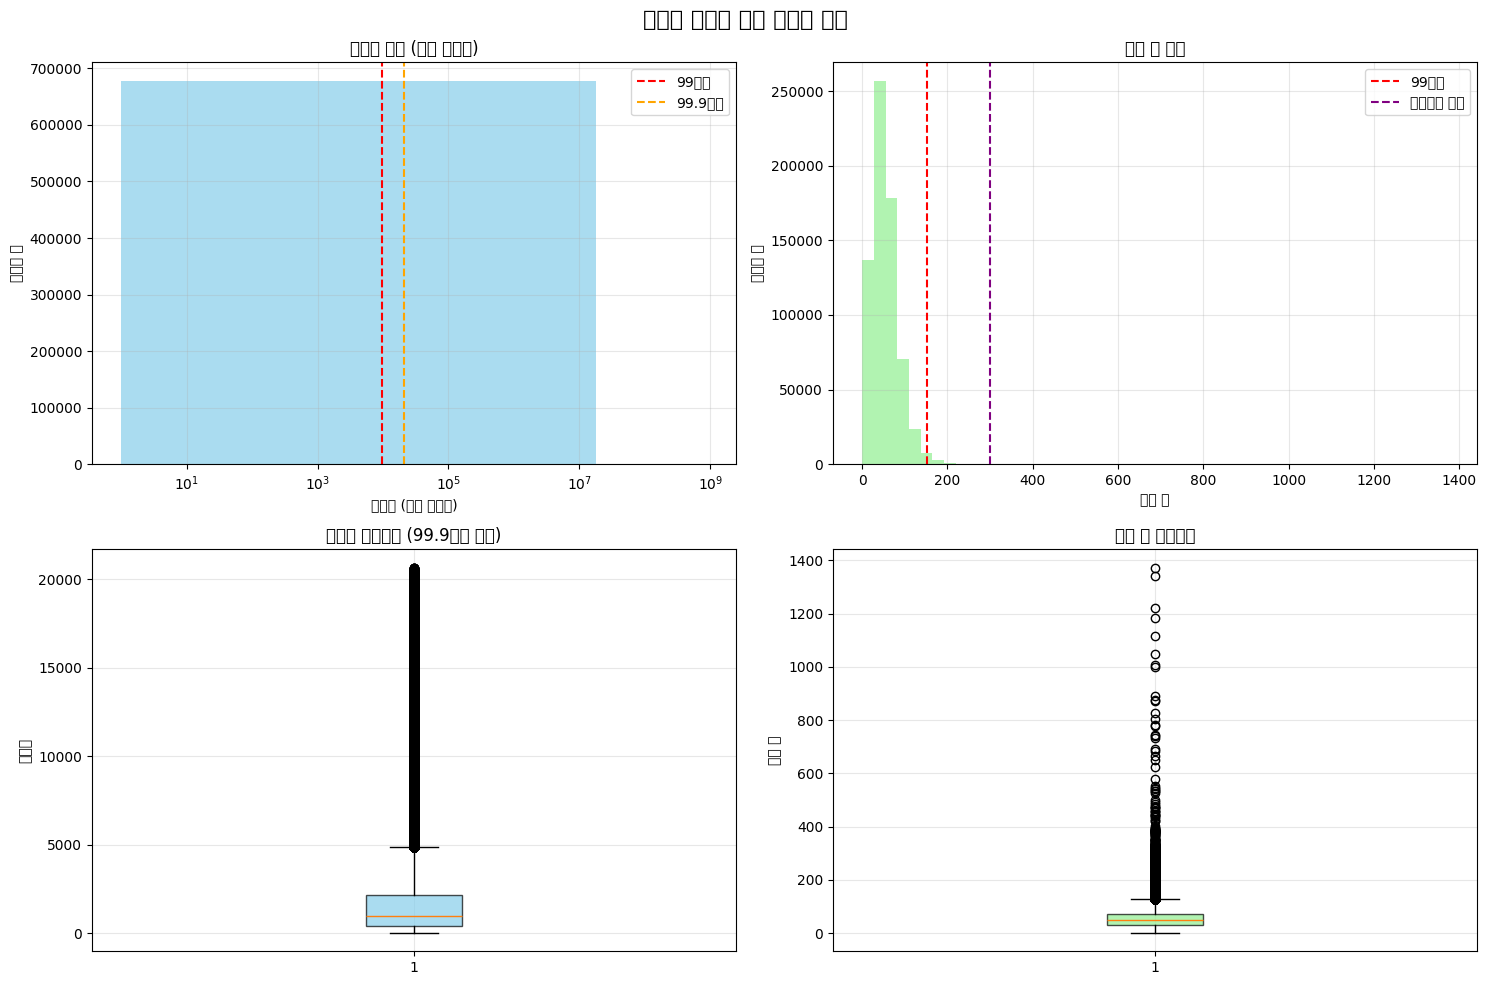


üéØ 5. ÏµúÏ¢Ö Í∂åÏû• ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
üí∞ Ìè¨Ïù∏Ìä∏ ÏûÑÍ≥ÑÍ∞í ÎπÑÍµê:
  ‚Ä¢ 99.9Î∂ÑÏúÑ:       20,668
  ‚Ä¢ ÎπÑÏ¶àÎãàÏä§:      400,000
  ‚Ä¢ IQR 3Î∞∞:         7,532
  ‚Ä¢ ÏµúÏ¢Ö ÏÑ†ÌÉù:       7,532 ‚≠ê
  ‚Ä¢ Ï†úÏô∏ ÏÇ¨Ïö©Ïûê: 13,878Î™Ö (2.050%)

üë• ÏπúÍµ¨ Ïàò ÏûÑÍ≥ÑÍ∞í ÎπÑÍµê:
  ‚Ä¢ 99Î∂ÑÏúÑ:        152
  ‚Ä¢ ÎπÑÏ¶àÎãàÏä§:      300
  ‚Ä¢ ÏµúÏ¢Ö ÏÑ†ÌÉù:     152 ‚≠ê
  ‚Ä¢ Ï†úÏô∏ ÏÇ¨Ïö©Ïûê: 6,581Î™Ö (0.972%)

üìä ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã ÏöîÏïΩ:
  ‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê:    677,085Î™Ö
  ‚Ä¢ Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê:    657,215Î™Ö
  ‚Ä¢ Ï†úÏô∏Îêú ÏÇ¨Ïö©Ïûê:   19,870Î™Ö
  ‚Ä¢ Ï†úÏô∏ ÎπÑÏú®:        2.935%

‚úÖ Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê ÌÜµÍ≥Ñ (Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ):
  ‚Ä¢ ÌèâÍ∑† Ìè¨Ïù∏Ìä∏:      1,461
  ‚Ä¢ ÌèâÍ∑† ÏπúÍµ¨ Ïàò:      51.7
  ‚Ä¢ Ï§ëÍ∞ÑÍ∞í Ìè¨Ïù∏Ìä∏:      930
  ‚Ä¢ Ï§ëÍ∞ÑÍ∞í ÏπúÍµ¨ Ïàò:      48


findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple G

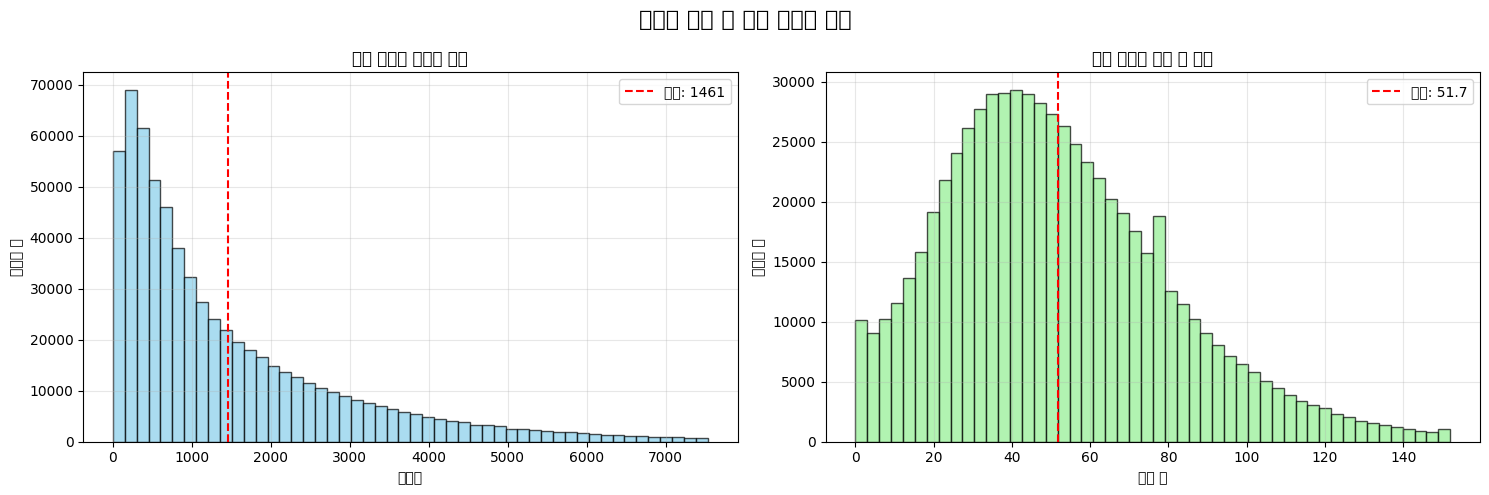


üéØ ÏµúÏ¢Ö Í∂åÏû• ÏûÑÍ≥ÑÍ∞í:
point_threshold = 7,532
friend_threshold = 152


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = ['Apple Gothic', 'Malgun Gothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

print("üéØ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å - Apple Gothic Ïö∞ÏÑ† ÏÇ¨Ïö©")
print("=" * 60)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Ïù¥Ï†Ñ Î∂ÑÏÑùÏóêÏÑú Í≥ÑÏÜç)
# df_userÎäî Ïù¥ÎØ∏ friend_count Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉúÎùºÍ≥† Í∞ÄÏ†ï

# Í∞ÅÍ∏∞ Îã§Î•∏ Î∂ÑÏúÑÏàò ÌôïÏù∏
print("üìä 1. Î∂ÑÏúÑÏàòÎ≥Ñ ÏûÑÍ≥ÑÍ∞í Î∂ÑÏÑù")
print("-" * 40)

percentiles = [90, 95, 99, 99.5, 99.9, 99.99]

for col in ['point', 'friend_count']:
    print(f"\n{col} Î∂ÑÏúÑÏàò:")
    for p in percentiles:
        threshold = df_user[col].quantile(p/100)
        count_above = (df_user[col] > threshold).sum()
        print(f"  {p:4.1f}Î∂ÑÏúÑ: {threshold:8,.0f} (Ï¥àÍ≥º: {count_above:,}Î™Ö)")

# IQR Î∞©Î≤ï
def get_iqr_threshold(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    return lower_bound, upper_bound

print(f"\nüìä 2. IQR Í∏∞Î∞ò ÏûÑÍ≥ÑÍ∞í")
print("-" * 40)

# Ìè¨Ïù∏Ìä∏ IQR ÏûÑÍ≥ÑÍ∞í
point_lower, point_upper = get_iqr_threshold(df_user['point'], 3.0)
print(f"Ìè¨Ïù∏Ìä∏ IQR(3Î∞∞): {point_upper:,.0f}")

# ÏπúÍµ¨ Ïàò IQR ÏûÑÍ≥ÑÍ∞í  
friend_lower, friend_upper = get_iqr_threshold(df_user['friend_count'], 2.0)
print(f"ÏπúÍµ¨ Ïàò IQR(2Î∞∞): {friend_upper:.0f}")

# ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Í∏∞Î∞ò
print(f"\nüéØ 3. ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Í∏∞Î∞ò ÏûÑÍ≥ÑÍ∞í")
print("-" * 40)

# Ìè¨Ïù∏Ìä∏: ÏµúÎåÄ Íµ¨Îß§ Í∞ÄÎä• Í∏àÏï° Í∏∞Ï§Ä
max_purchase = 4000  # heart.4000Ïù¥ ÏµúÎåÄ ÏÉÅÌíà
reasonable_purchases = 100  # Ìï©Î¶¨Ï†ÅÏù∏ ÏµúÎåÄ Íµ¨Îß§ ÌöüÏàò
point_threshold_business = max_purchase * reasonable_purchases
print(f"Ìè¨Ïù∏Ìä∏ ÎπÑÏ¶àÎãàÏä§ ÏûÑÍ≥ÑÍ∞í: {point_threshold_business:,}Ï†ê")

# ÏπúÍµ¨ Ïàò: ÎçòÎ∞îÏùò Ïàò(150Î™Ö) + 10ÎåÄ ÌäπÏÑ± Í≥†Î†§
dunbar_number = 150
teen_factor = 2.0  # 10ÎåÄÎäî Îçî ÎßéÏùÄ Ïò®ÎùºÏù∏ ÏπúÍµ¨ Í∞ÄÎä•
friend_threshold_business = int(dunbar_number * teen_factor)
print(f"ÏπúÍµ¨ Ïàò ÎπÑÏ¶àÎãàÏä§ ÏûÑÍ≥ÑÍ∞í: {friend_threshold_business}Î™Ö")

# ÏãúÍ∞ÅÌôî
print(f"\nüìà 4. Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Ïù¥ÏÉÅÏπò Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨', fontsize=16, fontweight='bold')

# Ìè¨Ïù∏Ìä∏ Î∂ÑÌè¨ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)
axes[0,0].hist(df_user['point'][df_user['point'] > 0], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_xscale('log')
axes[0,0].set_title('Ìè¨Ïù∏Ìä∏ Î∂ÑÌè¨ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)', fontsize=12)
axes[0,0].axvline(df_user['point'].quantile(0.99), color='red', linestyle='--', label='99Î∂ÑÏúÑ')
axes[0,0].axvline(df_user['point'].quantile(0.999), color='orange', linestyle='--', label='99.9Î∂ÑÏúÑ')
axes[0,0].set_xlabel('Ìè¨Ïù∏Ìä∏ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)')
axes[0,0].set_ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# ÏπúÍµ¨ Ïàò Î∂ÑÌè¨
axes[0,1].hist(df_user['friend_count'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('ÏπúÍµ¨ Ïàò Î∂ÑÌè¨', fontsize=12)
axes[0,1].axvline(df_user['friend_count'].quantile(0.99), color='red', linestyle='--', label='99Î∂ÑÏúÑ')
axes[0,1].axvline(friend_threshold_business, color='purple', linestyle='--', label='ÎπÑÏ¶àÎãàÏä§ Í∏∞Ï§Ä')
axes[0,1].set_xlabel('ÏπúÍµ¨ Ïàò')
axes[0,1].set_ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Ìè¨Ïù∏Ìä∏ Î∞ïÏä§ÌîåÎ°Ø (99.9Î∂ÑÏúÑ Ïù¥Ìïò)
point_filtered = df_user['point'][df_user['point'] <= df_user['point'].quantile(0.999)]
axes[1,0].boxplot(point_filtered, patch_artist=True, 
                  boxprops=dict(facecolor='skyblue', alpha=0.7))
axes[1,0].set_title('Ìè¨Ïù∏Ìä∏ Î∞ïÏä§ÌîåÎ°Ø (99.9Î∂ÑÏúÑ Ïù¥Ìïò)', fontsize=12)
axes[1,0].set_ylabel('Ìè¨Ïù∏Ìä∏')
axes[1,0].grid(True, alpha=0.3)

# ÏπúÍµ¨ Ïàò Î∞ïÏä§ÌîåÎ°Ø
axes[1,1].boxplot(df_user['friend_count'], patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1,1].set_title('ÏπúÍµ¨ Ïàò Î∞ïÏä§ÌîåÎ°Ø', fontsize=12)
axes[1,1].set_ylabel('ÏπúÍµ¨ Ïàò')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÏµúÏ¢Ö ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
print(f"\nüéØ 5. ÏµúÏ¢Ö Í∂åÏû• ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï")
print("=" * 50)

# 1. Ìè¨Ïù∏Ìä∏: Ïó¨Îü¨ Î∞©Î≤ïÏùò Ï¢ÖÌï© ÌåêÎã®
point_99_9 = df_user['point'].quantile(0.999)
point_business = 400000  # 4000 √ó 100Ìöå Íµ¨Îß§
point_iqr = point_upper

point_thresholds = [point_99_9, point_business, point_iqr]
point_final = min([t for t in point_thresholds if t > 0])  # ÏñëÏàò Ï§ë ÏµúÏÜüÍ∞í

print(f"üí∞ Ìè¨Ïù∏Ìä∏ ÏûÑÍ≥ÑÍ∞í ÎπÑÍµê:")
print(f"  ‚Ä¢ 99.9Î∂ÑÏúÑ: {point_99_9:12,.0f}")
print(f"  ‚Ä¢ ÎπÑÏ¶àÎãàÏä§: {point_business:12,.0f}")
print(f"  ‚Ä¢ IQR 3Î∞∞:  {point_iqr:12,.0f}")
print(f"  ‚Ä¢ ÏµúÏ¢Ö ÏÑ†ÌÉù: {point_final:11,.0f} ‚≠ê")

excluded_point = (df_user['point'] > point_final).sum()
print(f"  ‚Ä¢ Ï†úÏô∏ ÏÇ¨Ïö©Ïûê: {excluded_point:,}Î™Ö ({excluded_point/len(df_user)*100:.3f}%)")

# 2. ÏπúÍµ¨ Ïàò: 99Î∂ÑÏúÑÏôÄ ÎπÑÏ¶àÎãàÏä§ Î°úÏßÅ Ï§ë ÏÑ†ÌÉù
friend_99 = df_user['friend_count'].quantile(0.99)
friend_business = 300  # ÎçòÎ∞î ÏàòÏùò 2Î∞∞
friend_final = min(friend_99, friend_business)

print(f"\nüë• ÏπúÍµ¨ Ïàò ÏûÑÍ≥ÑÍ∞í ÎπÑÍµê:")
print(f"  ‚Ä¢ 99Î∂ÑÏúÑ:   {friend_99:8.0f}")
print(f"  ‚Ä¢ ÎπÑÏ¶àÎãàÏä§: {friend_business:8}")
print(f"  ‚Ä¢ ÏµúÏ¢Ö ÏÑ†ÌÉù: {friend_final:7.0f} ‚≠ê")

excluded_friends = (df_user['friend_count'] > friend_final).sum()
print(f"  ‚Ä¢ Ï†úÏô∏ ÏÇ¨Ïö©Ïûê: {excluded_friends:,}Î™Ö ({excluded_friends/len(df_user)*100:.3f}%)")

# 3. ÏµúÏ¢Ö Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ÏÖã
normal_users = df_user[
    (df_user['point'] <= point_final) & 
    (df_user['friend_count'] <= friend_final)
]

print(f"\nüìä ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã ÏöîÏïΩ:")
print(f"  ‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê:   {len(df_user):8,}Î™Ö")
print(f"  ‚Ä¢ Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê:   {len(normal_users):8,}Î™Ö")
print(f"  ‚Ä¢ Ï†úÏô∏Îêú ÏÇ¨Ïö©Ïûê: {len(df_user) - len(normal_users):8,}Î™Ö")
print(f"  ‚Ä¢ Ï†úÏô∏ ÎπÑÏú®:     {(1-len(normal_users)/len(df_user))*100:8.3f}%")

print(f"\n‚úÖ Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê ÌÜµÍ≥Ñ (Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ):")
print(f"  ‚Ä¢ ÌèâÍ∑† Ìè¨Ïù∏Ìä∏:   {normal_users['point'].mean():8,.0f}")
print(f"  ‚Ä¢ ÌèâÍ∑† ÏπúÍµ¨ Ïàò:  {normal_users['friend_count'].mean():8.1f}")
print(f"  ‚Ä¢ Ï§ëÍ∞ÑÍ∞í Ìè¨Ïù∏Ìä∏: {normal_users['point'].median():8,.0f}")
print(f"  ‚Ä¢ Ï§ëÍ∞ÑÍ∞í ÏπúÍµ¨ Ïàò: {normal_users['friend_count'].median():7.0f}")

# ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî (Ï†ïÏÉÅ ÏÇ¨Ïö©ÏûêÎßå)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê Î∂ÑÌè¨', fontsize=16, fontweight='bold')

# Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê Ìè¨Ïù∏Ìä∏ Î∂ÑÌè¨
axes[0].hist(normal_users['point'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê Ìè¨Ïù∏Ìä∏ Î∂ÑÌè¨', fontsize=12)
axes[0].set_xlabel('Ìè¨Ïù∏Ìä∏')
axes[0].set_ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
axes[0].axvline(normal_users['point'].mean(), color='red', linestyle='--', label=f'ÌèâÍ∑†: {normal_users["point"].mean():.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê ÏπúÍµ¨ Ïàò Î∂ÑÌè¨
axes[1].hist(normal_users['friend_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Ï†ïÏÉÅ ÏÇ¨Ïö©Ïûê ÏπúÍµ¨ Ïàò Î∂ÑÌè¨', fontsize=12)
axes[1].set_xlabel('ÏπúÍµ¨ Ïàò')
axes[1].set_ylabel('ÏÇ¨Ïö©Ïûê Ïàò')
axes[1].axvline(normal_users['friend_count'].mean(), color='red', linestyle='--', label=f'ÌèâÍ∑†: {normal_users["friend_count"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nüéØ ÏµúÏ¢Ö Í∂åÏû• ÏûÑÍ≥ÑÍ∞í:")
print(f"point_threshold = {point_final:,.0f}")
print(f"friend_threshold = {friend_final:.0f}")

# Ï£ºÏ†ú ÏÑ†Ï†ï - Í∞úÏÑ† ÏÇ¨Ìï≠ ÌÉêÍµ¨

## Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶òÏùò Î¨∏Ï†úÏ†ê

### 1Îã®Í≥Ñ: Ï∂îÏ≤úÎêú 8Î™ÖÏù¥ Ïã§Ï†ú ÏπúÍµ¨Ïù∏ÏßÄ ÌôïÏù∏ÌïòÍ∏∞

In [1]:
import pandas as pd
import ast

# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("üìä Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë...")
df_usercandidate = pd.read_parquet("gs://sprintda05_final_project/votes/polls_usercandidate.parquet")
df_user = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user.parquet")

print(f"ÏßàÎ¨∏ ÌõÑÎ≥¥Ïûê Îç∞Ïù¥ÌÑ∞: {len(df_usercandidate):,}Í±¥")
print(f"ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞: {len(df_user):,}Î™Ö")

# ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ìï®Ïàò
def parse_friend_list(friend_str):
    """ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ Î¨∏ÏûêÏó¥ÏùÑ Ïã§Ï†ú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò"""
    try:
        if pd.isna(friend_str) or friend_str.strip() == '' or friend_str == '[]':
            return []
        return ast.literal_eval(friend_str)
    except:
        return []

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ Ï§ÄÎπÑ
print("\nüîÑ ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ï§ë...")
df_user['friends'] = df_user['friend_id_list'].apply(parse_friend_list)

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏπúÍµ¨ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± (Îπ†Î•∏ Ï°∞ÌöåÎ•º ÏúÑÌï¥)
user_friends_dict = df_user.set_index('id')['friends'].to_dict()

print("‚úÖ Ï§ÄÎπÑ ÏôÑÎ£å!")

üìä Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë...
ÏßàÎ¨∏ ÌõÑÎ≥¥Ïûê Îç∞Ïù¥ÌÑ∞: 4,769,609Í±¥
ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞: 677,085Î™Ö

üîÑ ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ï§ë...
‚úÖ Ï§ÄÎπÑ ÏôÑÎ£å!


In [9]:
print("üîç 2Îã®Í≥Ñ: Ïò¨Î∞îÎ•∏ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("=" * 50)

# Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÏÉòÌîåÎßÅ
sample_size = 10000
df_vote_sample = df_vote.sample(n=sample_size, random_state=42)

print(f"Ìà¨Ìëú ÏÉòÌîå: {len(df_vote_sample):,}Í±¥")

# ÏÉòÌîå Ìà¨ÌëúÎì§Ïùò question_piece_id ÏàòÏßë
sample_question_pieces = df_vote_sample['question_piece_id'].unique()
print(f"ÏÉòÌîå ÏßàÎ¨∏ Ï°∞Í∞Å Ïàò: {len(sample_question_pieces):,}Í∞ú")

# Ìï¥Îãπ ÏßàÎ¨∏Îì§Ïùò ÌõÑÎ≥¥Ïûê Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
df_candidates_sample = df_usercandidate[
    df_usercandidate['question_piece_id'].isin(sample_question_pieces)
].copy()

print(f"Ìï¥Îãπ ÏßàÎ¨∏Îì§Ïùò ÌõÑÎ≥¥Ïûê Ï†ïÎ≥¥: {len(df_candidates_sample):,}Í±¥")

# ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê Ïàò ÌôïÏù∏
candidates_per_question = df_candidates_sample.groupby('question_piece_id')['user_id'].count()
print(f"\nüìä ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê Ïàò Î∂ÑÌè¨:")
print(f"ÏµúÏÜå: {candidates_per_question.min()}Î™Ö")
print(f"ÏµúÎåÄ: {candidates_per_question.max()}Î™Ö") 
print(f"ÌèâÍ∑†: {candidates_per_question.mean():.1f}Î™Ö")
print(f"8Î™ÖÏù∏ ÏßàÎ¨∏: {(candidates_per_question == 8).sum()}Í∞ú ({(candidates_per_question == 8).mean():.1%})")

# Ïã§Ï†ú ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù Ï§ÄÎπÑ
print(f"\nüîç ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù Ï§ÄÎπÑ...")

# ÏÉòÌîåÏóê Ìè¨Ìï®Îêú Ìà¨ÌëúÏûêÎì§Ïùò ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã±
sample_voters = df_vote_sample['user_id'].unique()
print(f"ÏÉòÌîå Ìà¨ÌëúÏûê Ïàò: {len(sample_voters):,}Î™Ö")

# Ìï¥Îãπ Ìà¨ÌëúÏûêÎì§Ïùò ÏπúÍµ¨ Ï†ïÎ≥¥
df_voter_friends = df_user[df_user['id'].isin(sample_voters)][['id', 'friend_id_list']].copy()

def parse_friends(friend_str):
    try:
        if pd.isna(friend_str) or friend_str.strip() == '' or friend_str == '[]':
            return set()
        return set(ast.literal_eval(friend_str))
    except:
        return set()

print("ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ï§ë...")
df_voter_friends['friends_set'] = df_voter_friends['friend_id_list'].apply(parse_friends)
voter_friends_dict = dict(zip(df_voter_friends['id'], df_voter_friends['friends_set']))

print("‚úÖ Ï§ÄÎπÑ ÏôÑÎ£å!")
print(f"ÏπúÍµ¨ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Ìà¨ÌëúÏûê: {len(voter_friends_dict):,}Î™Ö")

üîç 2Îã®Í≥Ñ: Ïò¨Î∞îÎ•∏ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù
Ìà¨Ìëú ÏÉòÌîå: 10,000Í±¥
ÏÉòÌîå ÏßàÎ¨∏ Ï°∞Í∞Å Ïàò: 10,000Í∞ú
Ìï¥Îãπ ÏßàÎ¨∏Îì§Ïùò ÌõÑÎ≥¥Ïûê Ï†ïÎ≥¥: 39,111Í±¥

üìä ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê Ïàò Î∂ÑÌè¨:
ÏµúÏÜå: 2Î™Ö
ÏµúÎåÄ: 8Î™Ö
ÌèâÍ∑†: 3.9Î™Ö
8Î™ÖÏù∏ ÏßàÎ¨∏: 1Í∞ú (0.0%)

üîç ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù Ï§ÄÎπÑ...
ÏÉòÌîå Ìà¨ÌëúÏûê Ïàò: 3,459Î™Ö
ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ï§ë...
‚úÖ Ï§ÄÎπÑ ÏôÑÎ£å!
ÏπúÍµ¨ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Ìà¨ÌëúÏûê: 3,459Î™Ö


üîç 3Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù
üìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∑úÎ™®:
‚Ä¢ Ï†ÑÏ≤¥ Ìà¨Ìëú Í∏∞Î°ù: 1,217,558Í±¥
‚Ä¢ Ï†ÑÏ≤¥ ÌõÑÎ≥¥Ïûê Í∏∞Î°ù: 4,769,609Í±¥
‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê: 677,085Î™Ö

üîÑ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ï§ë...
ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± ÏßÑÌñâ Ï§ë... (ÏãúÍ∞ÑÏù¥ Ï°∞Í∏à Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§)
‚úÖ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÏπúÍµ¨ Ï†ïÎ≥¥ Ï§ÄÎπÑ ÏôÑÎ£å: 677,085Î™Ö

1Ô∏è‚É£ Ï†ÑÏ≤¥ Ìà¨ÌëúÏóêÏÑú ÏÑ†ÌÉùÎêú ÏÇ¨ÎûåÏù¥ ÏπúÍµ¨Ïù∏ÏßÄ Î∂ÑÏÑù...
Ï†ÑÏ≤¥ Ìà¨Ìëú Í∏∞Î°ù Î∂ÑÏÑù Ï§ë... (121ÎßåÍ±¥ Ï≤òÎ¶¨)
  ÏßÑÌñâÎ•†: 250,000 / 1,217,558 Í±¥ Ï≤òÎ¶¨ ÏôÑÎ£å
  ÏßÑÌñâÎ•†: 500,000 / 1,217,558 Í±¥ Ï≤òÎ¶¨ ÏôÑÎ£å
  ÏßÑÌñâÎ•†: 750,000 / 1,217,558 Í±¥ Ï≤òÎ¶¨ ÏôÑÎ£å
  ÏßÑÌñâÎ•†: 1,000,000 / 1,217,558 Í±¥ Ï≤òÎ¶¨ ÏôÑÎ£å
  ÏßÑÌñâÎ•†: 1,217,558 / 1,217,558 Í±¥ Ï≤òÎ¶¨ ÏôÑÎ£å

üìà Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º:
‚Ä¢ Ï†ÑÏ≤¥ Ìà¨Ìëú: 1,217,558Í±¥
‚Ä¢ ÏπúÍµ¨ ÏÑ†ÌÉù: 1,208,128Í±¥ (99.225%)
‚Ä¢ Î™®Î•¥Îäî ÏÇ¨Îûå ÏÑ†ÌÉù: 9,430Í±¥ (0.775%)


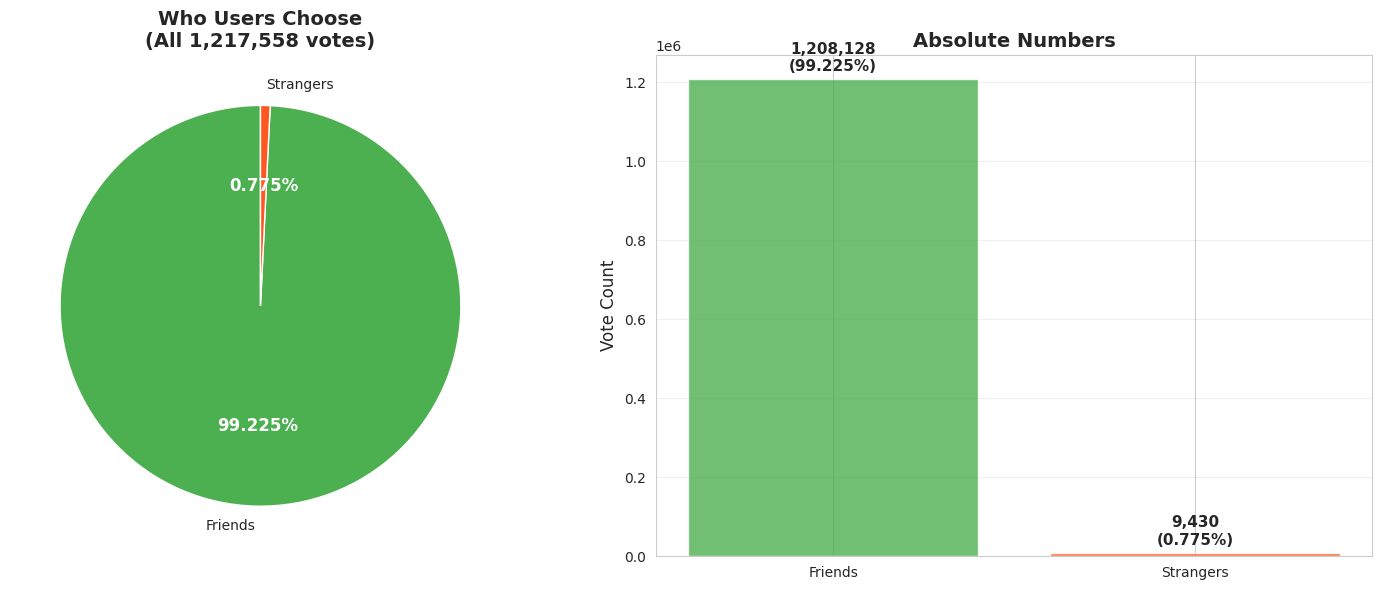


üéØ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í≤∞Î°†:
‚Ä¢ Friends = ÏπúÍµ¨ ÏÑ†ÌÉù (99.225%)
‚Ä¢ Strangers = Î™®Î•¥Îäî ÏÇ¨Îûå ÏÑ†ÌÉù (0.775%)


In [12]:
print("üîç 3Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("=" * 50)

print(f"üìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∑úÎ™®:")
print(f"‚Ä¢ Ï†ÑÏ≤¥ Ìà¨Ìëú Í∏∞Î°ù: {len(df_vote):,}Í±¥")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÌõÑÎ≥¥Ïûê Í∏∞Î°ù: {len(df_usercandidate):,}Í±¥")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê: {len(df_user):,}Î™Ö")

print(f"\nüîÑ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± Ï§ë...")

# Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏùò ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã±
def parse_friends(friend_str):
    try:
        if pd.isna(friend_str) or friend_str.strip() == '' or friend_str == '[]':
            return set()
        return set(ast.literal_eval(friend_str))
    except:
        return set()

print("ÏπúÍµ¨ Î¶¨Ïä§Ìä∏ ÌååÏã± ÏßÑÌñâ Ï§ë... (ÏãúÍ∞ÑÏù¥ Ï°∞Í∏à Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§)")
df_user['friends_set'] = df_user['friend_id_list'].apply(parse_friends)
user_friends_dict = dict(zip(df_user['id'], df_user['friends_set']))

print(f"‚úÖ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÏπúÍµ¨ Ï†ïÎ≥¥ Ï§ÄÎπÑ ÏôÑÎ£å: {len(user_friends_dict):,}Î™Ö")

print(f"\n1Ô∏è‚É£ Ï†ÑÏ≤¥ Ìà¨ÌëúÏóêÏÑú ÏÑ†ÌÉùÎêú ÏÇ¨ÎûåÏù¥ ÏπúÍµ¨Ïù∏ÏßÄ Î∂ÑÏÑù...")
print("Ï†ÑÏ≤¥ Ìà¨Ìëú Í∏∞Î°ù Î∂ÑÏÑù Ï§ë... (121ÎßåÍ±¥ Ï≤òÎ¶¨)")

# Ï†ÑÏ≤¥ Ìà¨ÌëúÏóêÏÑú ÏÑ†ÌÉùÎêú ÏÇ¨ÎûåÏù¥ ÏπúÍµ¨Ïù∏ÏßÄ ÌôïÏù∏
chosen_is_friend_all = []
batch_size = 50000

for i in range(0, len(df_vote), batch_size):
    batch = df_vote.iloc[i:i+batch_size]
    batch_results = []
    
    for _, vote in batch.iterrows():
        voter_id = vote['user_id']
        chosen_id = vote['chosen_user_id']
        
        voter_friends = user_friends_dict.get(voter_id, set())
        batch_results.append(chosen_id in voter_friends)
    
    chosen_is_friend_all.extend(batch_results)
    
    if (i // batch_size + 1) % 5 == 0:
        print(f"  ÏßÑÌñâÎ•†: {min(i+batch_size, len(df_vote)):,} / {len(df_vote):,} Í±¥ Ï≤òÎ¶¨ ÏôÑÎ£å")

# Ï†ÑÏ≤¥ Í≤∞Í≥º Î∂ÑÏÑù
chosen_friend_ratio_all = np.mean(chosen_is_friend_all)
chosen_friend_count_all = sum(chosen_is_friend_all)
chosen_stranger_count_all = len(chosen_is_friend_all) - chosen_friend_count_all

print(f"\nüìà Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≤∞Í≥º:")
print(f"‚Ä¢ Ï†ÑÏ≤¥ Ìà¨Ìëú: {len(chosen_is_friend_all):,}Í±¥")
print(f"‚Ä¢ ÏπúÍµ¨ ÏÑ†ÌÉù: {chosen_friend_count_all:,}Í±¥ ({chosen_friend_ratio_all:.3%})")
print(f"‚Ä¢ Î™®Î•¥Îäî ÏÇ¨Îûå ÏÑ†ÌÉù: {chosen_stranger_count_all:,}Í±¥ ({1-chosen_friend_ratio_all:.3%})")

# ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = ['Friends', 'Strangers']
sizes = [chosen_friend_ratio_all, 1-chosen_friend_ratio_all]
colors = ['#4CAF50', '#FF5722']

# ÌååÏù¥Ï∞®Ìä∏
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.3f%%', 
                                   colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Who Users Choose\n(All {len(df_vote):,} votes)', fontweight='bold', fontsize=14)

# Î∞îÏ∞®Ìä∏
counts = [chosen_friend_count_all, chosen_stranger_count_all]
bars = ax2.bar(labels, counts, color=colors, alpha=0.8)

for i, (bar, count, pct) in enumerate(zip(bars, counts, sizes)):
    ax2.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + max(counts)*0.01,
             f'{count:,}\n({pct:.3%})', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_title('Absolute Numbers', fontweight='bold', fontsize=14)
ax2.set_ylabel('Vote Count', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nüéØ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í≤∞Î°†:")
print(f"‚Ä¢ Friends = ÏπúÍµ¨ ÏÑ†ÌÉù ({chosen_friend_ratio_all:.3%})")
print(f"‚Ä¢ Strangers = Î™®Î•¥Îäî ÏÇ¨Îûå ÏÑ†ÌÉù ({1-chosen_friend_ratio_all:.3%})")

In [13]:
print("üéØ Îì±Ïû•Ïù∏Î¨º(ÌõÑÎ≥¥Ïûê) Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò Î∂ÑÏÑù")
print("=" * 50)

print("üìã Î∂ÑÏÑù Î™©Ìëú:")
print("‚Ä¢ Í∞Å ÏßàÎ¨∏ÎßàÎã§ Îì±Ïû•ÌïòÎäî ÌõÑÎ≥¥ÏûêÎì§Ïù¥ Ïñ¥Îñ§ Í∏∞Ï§ÄÏúºÎ°ú ÏÑ†Ï†ïÎêòÎäîÍ∞Ä?")
print("‚Ä¢ ÏπúÍµ¨ Í∏∞Î∞ò? ÏßÄÏó≠ Í∏∞Î∞ò? ÎûúÎç§? ÏÑ±Î≥Ñ? ÌïôÍµê?")

print(f"\nüîç 1Îã®Í≥Ñ: ÏßàÎ¨∏-Ìà¨ÌëúÏûê-ÌõÑÎ≥¥Ïûê Í¥ÄÍ≥Ñ ÌååÏïÖ")

# ÏßàÎ¨∏Î≥Ñ Ìà¨ÌëúÏûêÏôÄ ÌõÑÎ≥¥Ïûê Îß§Ìïë 
print("question_piece_idÎ≥Ñ Ìà¨ÌëúÏûêÏôÄ ÌõÑÎ≥¥Ïûê Ïó∞Í≤∞ Ï§ë...")

# ÏÉòÌîå ÏßàÎ¨∏Îì§Î°ú Î∂ÑÏÑù ÏãúÏûë (Ï†ÑÏ≤¥Îäî ÎÑàÎ¨¥ ÌÅ¨Îãà)
sample_questions = df_vote['question_piece_id'].value_counts().head(1000).index.tolist()
print(f"Î∂ÑÏÑùÌï† ÏßàÎ¨∏ Ïàò: {len(sample_questions):,}Í∞ú")

question_analysis = []

for i, question_id in enumerate(sample_questions):
    # Ìï¥Îãπ ÏßàÎ¨∏Ïùò Ìà¨ÌëúÏûê (ÏßàÎ¨∏ÏùÑ Î∞õÏùÄ ÏÇ¨Îûå)
    question_votes = df_vote[df_vote['question_piece_id'] == question_id]
    if question_votes.empty:
        continue
        
    voter_id = question_votes.iloc[0]['user_id']  # Ï≤´ Î≤àÏß∏ Ìà¨ÌëúÏûê (Î≥¥ÌÜµ 1Î™Ö)
    
    # Ìï¥Îãπ ÏßàÎ¨∏Ïùò ÌõÑÎ≥¥ÏûêÎì§ (Îì±Ïû•Ïù∏Î¨ºÎì§)
    question_candidates = df_usercandidate[
        df_usercandidate['question_piece_id'] == question_id
    ]['user_id'].tolist()
    
    if len(question_candidates) == 0:
        continue
    
    question_analysis.append({
        'question_id': question_id,
        'voter_id': voter_id,
        'candidates': question_candidates,
        'candidate_count': len(question_candidates)
    })
    
    if (i + 1) % 100 == 0:
        print(f"  ÏßÑÌñâÎ•†: {i+1:,} / {len(sample_questions):,} ÏßàÎ¨∏ Ï≤òÎ¶¨")

print(f"‚úÖ Î∂ÑÏÑù Ï§ÄÎπÑ ÏôÑÎ£å: {len(question_analysis):,}Í∞ú ÏßàÎ¨∏")

# ÌõÑÎ≥¥Ïûê Ïàò Î∂ÑÌè¨ ÌôïÏù∏
candidate_counts = [q['candidate_count'] for q in question_analysis]
print(f"\nüìä ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê Ïàò Î∂ÑÌè¨:")
print(f"‚Ä¢ ÌèâÍ∑†: {np.mean(candidate_counts):.1f}Î™Ö")
print(f"‚Ä¢ ÏµúÏÜå: {min(candidate_counts)}Î™Ö")
print(f"‚Ä¢ ÏµúÎåÄ: {max(candidate_counts)}Î™Ö")
print(f"‚Ä¢ 8Î™ÖÏù∏ ÏßàÎ¨∏: {candidate_counts.count(8)}Í∞ú ({candidate_counts.count(8)/len(candidate_counts):.1%})")

# ÌõÑÎ≥¥Ïûê ÏàòÎ≥Ñ Î∂ÑÌè¨
from collections import Counter
count_dist = Counter(candidate_counts)
print(f"\nÏÉÅÏÑ∏ Î∂ÑÌè¨:")
for count in sorted(count_dist.keys()):
    print(f"‚Ä¢ {count}Î™Ö: {count_dist[count]:,}Í∞ú ÏßàÎ¨∏ ({count_dist[count]/len(candidate_counts):.1%})")

print(f"\nüîç 2Îã®Í≥Ñ: ÌõÑÎ≥¥Ïûê ÏÑ†Ï†ï Í∏∞Ï§Ä Î∂ÑÏÑù Ï§ÄÎπÑ...")
print("Îã§Ïùå Ï§ë Ïñ¥Îñ§ Í∏∞Ï§ÄÎ∂ÄÌÑ∞ Î∂ÑÏÑùÌï¥Î≥ºÍπåÏöî?")
print("A) ÏπúÍµ¨ Í¥ÄÍ≥Ñ Í∏∞Ï§Ä (ÌõÑÎ≥¥ÏûêÎì§Ïù¥ Ìà¨ÌëúÏûêÏùò ÏπúÍµ¨Ïù∏Í∞Ä?)")
print("B) Í∞ôÏùÄ ÌïôÍµê/ÏßÄÏó≠ Í∏∞Ï§Ä")  
print("C) ÏÑ±Î≥Ñ/ÎÇòÏù¥ Í∏∞Ï§Ä")
print("D) ÌôúÎèôÎèÑ/Ïù∏Í∏∞ÎèÑ Í∏∞Ï§Ä")
print("E) Ï†ÑÏ≤¥ Ï¢ÖÌï© Î∂ÑÏÑù")

# ÏùºÎã® ÏπúÍµ¨ Í¥ÄÍ≥ÑÎ∂ÄÌÑ∞ Í∞ÑÎã® ÌôïÏù∏
print(f"\nüîç Í∞ÑÎã® ÎØ∏Î¶¨Î≥¥Í∏∞: ÏπúÍµ¨ Í¥ÄÍ≥Ñ ÌôïÏù∏")
friend_ratios = []

for q in question_analysis[:100]:  # Ï≤òÏùå 100Í∞úÎßå
    voter_friends = user_friends_dict.get(q['voter_id'], set())
    friend_candidates = [c for c in q['candidates'] if c in voter_friends]
    friend_ratio = len(friend_candidates) / len(q['candidates']) if q['candidates'] else 0
    friend_ratios.append(friend_ratio)

avg_friend_ratio = np.mean(friend_ratios)
print(f"‚Ä¢ Ï≤òÏùå 100Í∞ú ÏßàÎ¨∏ Î∂ÑÏÑù:")
print(f"‚Ä¢ ÌõÑÎ≥¥Ïûê Ï§ë ÏπúÍµ¨ ÎπÑÏú®: {avg_friend_ratio:.1%}")

üéØ Îì±Ïû•Ïù∏Î¨º(ÌõÑÎ≥¥Ïûê) Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶ò Î∂ÑÏÑù
üìã Î∂ÑÏÑù Î™©Ìëú:
‚Ä¢ Í∞Å ÏßàÎ¨∏ÎßàÎã§ Îì±Ïû•ÌïòÎäî ÌõÑÎ≥¥ÏûêÎì§Ïù¥ Ïñ¥Îñ§ Í∏∞Ï§ÄÏúºÎ°ú ÏÑ†Ï†ïÎêòÎäîÍ∞Ä?
‚Ä¢ ÏπúÍµ¨ Í∏∞Î∞ò? ÏßÄÏó≠ Í∏∞Î∞ò? ÎûúÎç§? ÏÑ±Î≥Ñ? ÌïôÍµê?

üîç 1Îã®Í≥Ñ: ÏßàÎ¨∏-Ìà¨ÌëúÏûê-ÌõÑÎ≥¥Ïûê Í¥ÄÍ≥Ñ ÌååÏïÖ
question_piece_idÎ≥Ñ Ìà¨ÌëúÏûêÏôÄ ÌõÑÎ≥¥Ïûê Ïó∞Í≤∞ Ï§ë...
Î∂ÑÏÑùÌï† ÏßàÎ¨∏ Ïàò: 1,000Í∞ú
  ÏßÑÌñâÎ•†: 100 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 200 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 300 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 400 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 500 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 600 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 700 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 800 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 900 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 1,000 / 1,000 ÏßàÎ¨∏ Ï≤òÎ¶¨
‚úÖ Î∂ÑÏÑù Ï§ÄÎπÑ ÏôÑÎ£å: 1,000Í∞ú ÏßàÎ¨∏

üìä ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê Ïàò Î∂ÑÌè¨:
‚Ä¢ ÌèâÍ∑†: 3.9Î™Ö
‚Ä¢ ÏµúÏÜå: 2Î™Ö
‚Ä¢ ÏµúÎåÄ: 4Î™Ö
‚Ä¢ 8Î™ÖÏù∏ ÏßàÎ¨∏: 0Í∞ú (0.0%)

ÏÉÅÏÑ∏ Î∂ÑÌè¨:
‚Ä¢ 2Î™Ö: 5Í∞ú ÏßàÎ¨∏ (0.5%)
‚Ä¢ 3Î™Ö: 86Í∞ú ÏßàÎ¨∏ (8.6%)
‚Ä

### A) ÏπúÍµ¨ Í¥ÄÍ≥Ñ Í∏∞Ï§Ä (ÌõÑÎ≥¥ÏûêÎì§Ïù¥ Ìà¨ÌëúÏûêÏùò ÏπúÍµ¨Ïù∏Í∞Ä?)

In [16]:
print("üîç Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù")
print("=" * 50)

print("üìã ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÍ≥º Ïª¨Îüº:")
print("1Ô∏è‚É£ polls_usercandidate (ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê)")
print("   ‚Ä¢ question_piece_id: ÏßàÎ¨∏ Ï°∞Í∞Å ID (Ïó∞Í≤∞ÌÇ§)")
print("   ‚Ä¢ user_id: ÌõÑÎ≥¥Ïûê ÏÇ¨Ïö©Ïûê ID")
print("   ‚Ä¢ Ïö©ÎèÑ: Í∞Å ÏßàÎ¨∏Ïóê Îì±Ïû•ÌïòÎäî ÌõÑÎ≥¥ÏûêÎì§ ÏãùÎ≥Ñ")

print("\n2Ô∏è‚É£ accounts_userquestionrecord (Ìà¨Ìëú Í∏∞Î°ù)")  
print("   ‚Ä¢ question_piece_id: ÏßàÎ¨∏ Ï°∞Í∞Å ID (Ïó∞Í≤∞ÌÇ§)")
print("   ‚Ä¢ user_id: Ìà¨ÌëúÏûê(ÏßàÎ¨∏Î∞õÏùÄ ÏÇ¨Îûå) ÏÇ¨Ïö©Ïûê ID")
print("   ‚Ä¢ chosen_user_id: ÏÑ†ÌÉùÎ∞õÏùÄ ÏÇ¨Ïö©Ïûê ID")
print("   ‚Ä¢ Ïö©ÎèÑ: ÎàÑÍ∞Ä Ïñ¥Îñ§ ÏßàÎ¨∏ÏóêÏÑú ÎàÑÍµ¨Î•º ÏÑ†ÌÉùÌñàÎäîÏßÄ")

print("\n3Ô∏è‚É£ accounts_user (ÏÇ¨Ïö©Ïûê Ï†ïÎ≥¥)")
print("   ‚Ä¢ id: ÏÇ¨Ïö©Ïûê ID")
print("   ‚Ä¢ friend_id_list: ÏπúÍµ¨ Î™©Î°ù (Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏)")
print("   ‚Ä¢ Ïö©ÎèÑ: Í∞Å ÏÇ¨Ïö©ÏûêÏùò ÏπúÍµ¨ Í¥ÄÍ≥Ñ ÌôïÏù∏")

print(f"\nüìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∑úÎ™®:")
print(f"‚Ä¢ Ï†ÑÏ≤¥ Ìà¨Ìëú Í∏∞Î°ù: {len(df_vote):,}Í±¥")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÌõÑÎ≥¥Ïûê Í∏∞Î°ù: {len(df_usercandidate):,}Í±¥")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê: {len(df_user):,}Î™Ö")

# Ï†ÑÏ≤¥ ÏßàÎ¨∏ Î∂ÑÏÑù
print(f"\nüîç Ï†ÑÏ≤¥ ÏßàÎ¨∏ Î∂ÑÏÑù ÏãúÏûë...")
all_questions = df_vote['question_piece_id'].unique()
print(f"Ï†ÑÏ≤¥ Í≥†Ïú† ÏßàÎ¨∏ Ïàò: {len(all_questions):,}Í∞ú")

# Ï†ÑÏ≤¥ ÏßàÎ¨∏Î≥Ñ Î∂ÑÏÑù (Î∞∞Ïπò Ï≤òÎ¶¨)
print("Ï†ÑÏ≤¥ ÏßàÎ¨∏Î≥Ñ Ìà¨ÌëúÏûê-ÌõÑÎ≥¥Ïûê Í¥ÄÍ≥Ñ Î∂ÑÏÑù Ï§ë...")

all_question_analysis = []
batch_size = 10000

for batch_start in range(0, len(all_questions), batch_size):
    batch_questions = all_questions[batch_start:batch_start + batch_size]
    
    for question_id in batch_questions:
        # Ìï¥Îãπ ÏßàÎ¨∏Ïùò Ìà¨ÌëúÏûêÎì§
        question_votes = df_vote[df_vote['question_piece_id'] == question_id]
        if question_votes.empty:
            continue
            
        # Ìà¨ÌëúÏûê (Î≥¥ÌÜµ 1Î™ÖÏù¥ÏßÄÎßå Ïó¨Îü¨ Î™ÖÏùº ÏàòÎèÑ ÏûàÏùå)
        voters = question_votes['user_id'].unique()
        
        # Ìï¥Îãπ ÏßàÎ¨∏Ïùò ÌõÑÎ≥¥ÏûêÎì§
        question_candidates = df_usercandidate[
            df_usercandidate['question_piece_id'] == question_id
        ]['user_id'].tolist()
        
        if not question_candidates:
            continue
        
        # Í∞Å Ìà¨ÌëúÏûêÎ≥ÑÎ°ú Î∂ÑÏÑù
        for voter_id in voters:
            all_question_analysis.append({
                'question_id': question_id,
                'voter_id': voter_id,
                'candidates': question_candidates,
                'candidate_count': len(question_candidates)
            })
    
    print(f"  ÏßÑÌñâÎ•†: {min(batch_start + batch_size, len(all_questions)):,} / {len(all_questions):,} ÏßàÎ¨∏ Ï≤òÎ¶¨")

print(f"‚úÖ Ï†ÑÏ≤¥ ÏßàÎ¨∏-Ìà¨ÌëúÏûê Ïåç Î∂ÑÏÑù ÏôÑÎ£å: {len(all_question_analysis):,}Í∞ú")

# ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù
print(f"\nüîç Ï†ÑÏ≤¥ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù Ï§ë...")
print("Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏùò ÏπúÍµ¨ Î¶¨Ïä§Ìä∏Í∞Ä Ïù¥ÎØ∏ ÌååÏã±ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Î∞îÎ°ú Î∂ÑÏÑù ÏßÑÌñâ...")

total_friend_analysis = []
batch_size = 50000

for batch_start in range(0, len(all_question_analysis), batch_size):
    batch_data = all_question_analysis[batch_start:batch_start + batch_size]
    
    for q in batch_data:
        voter_id = q['voter_id']
        candidates = q['candidates']
        
        # Ìà¨ÌëúÏûêÏùò ÏπúÍµ¨ Î™©Î°ù
        voter_friends = user_friends_dict.get(voter_id, set())
        
        # ÌõÑÎ≥¥Ïûê Ï§ë ÏπúÍµ¨Ïù∏ ÏÇ¨ÎûåÎì§
        friend_candidates = [c for c in candidates if c in voter_friends]
        friend_ratio = len(friend_candidates) / len(candidates) if candidates else 0
        
        total_friend_analysis.append({
            'question_id': q['question_id'],
            'voter_id': voter_id,
            'total_candidates': len(candidates),
            'friend_candidates': len(friend_candidates),
            'friend_ratio': friend_ratio
        })
    
    print(f"  ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù: {min(batch_start + batch_size, len(all_question_analysis)):,} / {len(all_question_analysis):,} ÏôÑÎ£å")

# Ï†ÑÏ≤¥ Í≤∞Í≥º Î∂ÑÏÑù
friend_ratios_all = [r['friend_ratio'] for r in total_friend_analysis]
friend_counts_all = [r['friend_candidates'] for r in total_friend_analysis]
total_candidates_all = [r['total_candidates'] for r in total_friend_analysis]

print(f"\nüìà Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º:")
print(f"‚Ä¢ Î∂ÑÏÑùÎêú ÏßàÎ¨∏-Ìà¨ÌëúÏûê Ïåç: {len(total_friend_analysis):,}Í∞ú")
print(f"‚Ä¢ ÌõÑÎ≥¥Ïûê Ï§ë ÏπúÍµ¨ ÎπÑÏú®:")
print(f"  - ÌèâÍ∑†: {np.mean(friend_ratios_all):.2%}")
print(f"  - Ï§ëÍ∞ÑÍ∞í: {np.median(friend_ratios_all):.2%}")
print(f"  - ÏµúÏÜå: {min(friend_ratios_all):.2%}")
print(f"  - ÏµúÎåÄ: {max(friend_ratios_all):.2%}")

# ÏπúÍµ¨ ÎπÑÏú® Î∂ÑÌè¨ (Ï†ÑÏ≤¥)
print(f"\nüìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏπúÍµ¨ ÎπÑÏú® Î∂ÑÌè¨:")
ratio_100 = sum(1 for r in friend_ratios_all if r == 1.0)
ratio_90_99 = sum(1 for r in friend_ratios_all if 0.9 <= r < 1.0)
ratio_80_89 = sum(1 for r in friend_ratios_all if 0.8 <= r < 0.9)
ratio_70_79 = sum(1 for r in friend_ratios_all if 0.7 <= r < 0.8)
ratio_below_70 = sum(1 for r in friend_ratios_all if r < 0.7)

total_questions = len(friend_ratios_all)
print(f"‚Ä¢ 100% ÏπúÍµ¨: {ratio_100:,}Í∞ú ({ratio_100/total_questions:.1%})")
print(f"‚Ä¢ 90-99% ÏπúÍµ¨: {ratio_90_99:,}Í∞ú ({ratio_90_99/total_questions:.1%})")
print(f"‚Ä¢ 80-89% ÏπúÍµ¨: {ratio_80_89:,}Í∞ú ({ratio_80_89/total_questions:.1%})")
print(f"‚Ä¢ 70-79% ÏπúÍµ¨: {ratio_70_79:,}Í∞ú ({ratio_70_79/total_questions:.1%})")
print(f"‚Ä¢ 70% ÎØ∏Îßå ÏπúÍµ¨: {ratio_below_70:,}Í∞ú ({ratio_below_70/total_questions:.1%})")

print(f"\nüéØ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í≤∞Î°†:")
print(f"‚úÖ Ï∂îÏ≤ú ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Í∞ïÎ†•Ìïú ÏπúÍµ¨ Í∏∞Î∞ò!")
print(f"   ‚Üí ÌèâÍ∑† {np.mean(friend_ratios_all):.1%}Ïùò ÌõÑÎ≥¥ÏûêÍ∞Ä ÏπúÍµ¨")
print(f"   ‚Üí {ratio_100/total_questions:.1%}Ïùò ÏßàÎ¨∏Ïù¥ 100% ÏπúÍµ¨Î°ú Íµ¨ÏÑ±")

print(f"\nüìã Îç∞Ïù¥ÌÑ∞ Ïó∞Í≤∞ Î∞©Ïãù ÏöîÏïΩ:")
print(f"polls_usercandidate.question_piece_id = accounts_userquestionrecord.question_piece_id")
print(f"accounts_userquestionrecord.user_id ‚Üí accounts_user.id (Ìà¨ÌëúÏûê)")
print(f"polls_usercandidate.user_id ‚Üí accounts_user.id (ÌõÑÎ≥¥Ïûê)")
print(f"accounts_user.friend_id_list ÌååÏã±ÌïòÏó¨ ÏπúÍµ¨ Í¥ÄÍ≥Ñ ÌôïÏù∏")

üîç Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏπúÍµ¨ Í¥ÄÍ≥Ñ Î∂ÑÏÑù
üìã ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏îÍ≥º Ïª¨Îüº:
1Ô∏è‚É£ polls_usercandidate (ÏßàÎ¨∏Î≥Ñ ÌõÑÎ≥¥Ïûê)
   ‚Ä¢ question_piece_id: ÏßàÎ¨∏ Ï°∞Í∞Å ID (Ïó∞Í≤∞ÌÇ§)
   ‚Ä¢ user_id: ÌõÑÎ≥¥Ïûê ÏÇ¨Ïö©Ïûê ID
   ‚Ä¢ Ïö©ÎèÑ: Í∞Å ÏßàÎ¨∏Ïóê Îì±Ïû•ÌïòÎäî ÌõÑÎ≥¥ÏûêÎì§ ÏãùÎ≥Ñ

2Ô∏è‚É£ accounts_userquestionrecord (Ìà¨Ìëú Í∏∞Î°ù)
   ‚Ä¢ question_piece_id: ÏßàÎ¨∏ Ï°∞Í∞Å ID (Ïó∞Í≤∞ÌÇ§)
   ‚Ä¢ user_id: Ìà¨ÌëúÏûê(ÏßàÎ¨∏Î∞õÏùÄ ÏÇ¨Îûå) ÏÇ¨Ïö©Ïûê ID
   ‚Ä¢ chosen_user_id: ÏÑ†ÌÉùÎ∞õÏùÄ ÏÇ¨Ïö©Ïûê ID
   ‚Ä¢ Ïö©ÎèÑ: ÎàÑÍ∞Ä Ïñ¥Îñ§ ÏßàÎ¨∏ÏóêÏÑú ÎàÑÍµ¨Î•º ÏÑ†ÌÉùÌñàÎäîÏßÄ

3Ô∏è‚É£ accounts_user (ÏÇ¨Ïö©Ïûê Ï†ïÎ≥¥)
   ‚Ä¢ id: ÏÇ¨Ïö©Ïûê ID
   ‚Ä¢ friend_id_list: ÏπúÍµ¨ Î™©Î°ù (Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏)
   ‚Ä¢ Ïö©ÎèÑ: Í∞Å ÏÇ¨Ïö©ÏûêÏùò ÏπúÍµ¨ Í¥ÄÍ≥Ñ ÌôïÏù∏

üìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∑úÎ™®:
‚Ä¢ Ï†ÑÏ≤¥ Ìà¨Ìëú Í∏∞Î°ù: 1,217,558Í±¥
‚Ä¢ Ï†ÑÏ≤¥ ÌõÑÎ≥¥Ïûê Í∏∞Î°ù: 4,769,609Í±¥
‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê: 677,085Î™Ö

üîç Ï†ÑÏ≤¥ ÏßàÎ¨∏ Î∂ÑÏÑù ÏãúÏûë...
Ï†ÑÏ≤¥ Í≥†Ïú† ÏßàÎ¨∏ Ïàò: 1,217,558Í∞ú
Ï†ÑÏ≤¥ ÏßàÎ¨∏Î≥Ñ Ìà¨Ì

## ÏßàÎ¨∏ ÏïåÍ≥†Î¶¨Ï¶òÏùò Î¨∏Ï†úÏ†ê

In [19]:
print("üîç ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ï†úÍ≥µ ÏãúÏ†ê Î∂ÑÏÑù")
print("=" * 50)

print("üìã ÌïµÏã¨ Î∞úÍ≤¨:")
print("‚Ä¢ polls_questionset.opening_time = ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÏßàÎ¨∏ ÏÑ∏Ìä∏Í∞Ä Ï†úÍ≥µÎêú ÏãúÏ†ê!")
print("‚Ä¢ polls_questionset.created_at = ÏßàÎ¨∏ ÏÑ∏Ìä∏Í∞Ä ÏÉùÏÑ±Îêú ÏãúÏ†ê")
print("‚Ä¢ question_piece_id_list = 10Í∞ú ÏßàÎ¨∏ IDÍ∞Ä Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•")

# 1. Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\n1Ô∏è‚É£ Í∏∞Î≥∏ ÌÜµÍ≥Ñ")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò: {len(df_questionset):,}Í∞ú")
print(f"‚Ä¢ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Í∏∞Í∞Ñ: {df_questionset['created_at'].min()} ~ {df_questionset['created_at'].max()}")

# 2. ÏÉùÏÑ± ÏãúÍ∞ÑÍ≥º Ï†úÍ≥µ ÏãúÍ∞Ñ Ï∞®Ïù¥ Î∂ÑÏÑù
print(f"\n2Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏÉùÏÑ± vs Ï†úÍ≥µ ÏãúÍ∞Ñ Î∂ÑÏÑù")

df_questionset['created_at'] = pd.to_datetime(df_questionset['created_at'])
df_questionset['opening_time'] = pd.to_datetime(df_questionset['opening_time'])

# ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Ï¥à Îã®ÏúÑ)
df_questionset['time_diff_seconds'] = (
    df_questionset['opening_time'] - df_questionset['created_at']
).dt.total_seconds()

print(f"‚Ä¢ ÏÉùÏÑ± ÌõÑ Ï†úÍ≥µÍπåÏßÄ ÏãúÍ∞Ñ Ï∞®Ïù¥:")
print(f"  - ÌèâÍ∑†: {df_questionset['time_diff_seconds'].mean():.1f}Ï¥à")
print(f"  - Ï§ëÍ∞ÑÍ∞í: {df_questionset['time_diff_seconds'].median():.1f}Ï¥à")
print(f"  - ÏµúÏÜå: {df_questionset['time_diff_seconds'].min():.1f}Ï¥à")
print(f"  - ÏµúÎåÄ: {df_questionset['time_diff_seconds'].max():.1f}Ï¥à")

# Ï¶âÏãú Ï†úÍ≥µÎêòÎäî ÎπÑÏú®
immediate_count = (df_questionset['time_diff_seconds'] <= 1).sum()
print(f"  - 1Ï¥à Ïù¥ÎÇ¥ Ï¶âÏãú Ï†úÍ≥µ: {immediate_count:,}Í∞ú ({immediate_count/len(df_questionset):.1%})")

# 3. ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ï†úÍ≥µ ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù
print(f"\n3Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ï†úÍ≥µ ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù")

df_questionset['opening_hour'] = df_questionset['opening_time'].dt.hour
df_questionset['opening_day'] = df_questionset['opening_time'].dt.dayofweek

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∂ÑÌè¨
hourly_sets = df_questionset['opening_hour'].value_counts().sort_index()
print(f"‚Ä¢ Í∞ÄÏû• ÎßéÏù¥ Ï†úÍ≥µÎêòÎäî ÏãúÍ∞ÑÎåÄ (ÏÉÅÏúÑ 5Í∞ú):")
for hour in hourly_sets.head(5).index:
    print(f"  {hour:02d}Ïãú: {hourly_sets[hour]:,}Í∞ú ({hourly_sets[hour]/len(df_questionset):.1%})")

# ÏöîÏùºÎ≥Ñ Î∂ÑÌè¨
daily_sets = df_questionset['opening_day'].value_counts().sort_index()
days = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']
print(f"\n‚Ä¢ ÏöîÏùºÎ≥Ñ Ï†úÍ≥µ Î∂ÑÌè¨:")
for day_idx in daily_sets.index:
    print(f"  {days[day_idx]}ÏöîÏùº: {daily_sets[day_idx]:,}Í∞ú ({daily_sets[day_idx]/len(df_questionset):.1%})")

# 4. ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÎÇ¥ ÏßàÎ¨∏ Í∞úÏàò ÌôïÏù∏
print(f"\n4Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏Îãπ ÏßàÎ¨∏ Í∞úÏàò ÌôïÏù∏")

# question_piece_id_list ÌååÏã± (Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò)
def parse_question_list(question_str):
    try:
        # Î¨∏ÏûêÏó¥Ïù¥ Ïù¥ÎØ∏ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùÑ Ïàò ÏûàÏùå
        if isinstance(question_str, list):
            return len(question_str)
        # Î¨∏ÏûêÏó¥Ïù∏ Í≤ΩÏö∞ ÌååÏã±
        import ast
        question_list = ast.literal_eval(question_str)
        return len(question_list)
    except:
        return 0

df_questionset['question_count'] = df_questionset['question_piece_id_list'].apply(parse_question_list)

question_counts = df_questionset['question_count'].value_counts().sort_index()
print(f"‚Ä¢ ÏÑ∏Ìä∏Îãπ ÏßàÎ¨∏ Í∞úÏàò Î∂ÑÌè¨:")
for count in question_counts.index:
    print(f"  {count}Í∞ú ÏßàÎ¨∏: {question_counts[count]:,}Í∞ú ÏÑ∏Ìä∏ ({question_counts[count]/len(df_questionset):.1%})")

# 5. Í∞ÑÎã® Í≤∞Î°†
print(f"\nüéØ ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ï†úÍ≥µ Ìå®ÌÑ¥ Í≤∞Î°†:")

peak_hour = hourly_sets.idxmax()
peak_day = daily_sets.idxmax()
avg_diff = df_questionset['time_diff_seconds'].mean()

print(f"‚úÖ ÏßàÎ¨∏ ÏÑ∏Ìä∏Îäî Ï£ºÎ°ú {peak_hour:02d}ÏãúÏóê Í∞ÄÏû• ÎßéÏù¥ Ï†úÍ≥µÎê®")
print(f"‚úÖ {days[peak_day]}ÏöîÏùºÏóê Í∞ÄÏû• ÌôúÎ∞úÌïòÍ≤å Ï†úÍ≥µÎê®") 

if avg_diff < 5:
    print(f"‚úÖ ÏßàÎ¨∏ ÏÑ∏Ìä∏Îäî ÏÉùÏÑ± Ï¶âÏãú ÏÇ¨Ïö©ÏûêÏóêÍ≤å Ï†úÍ≥µÎê® (ÌèâÍ∑† {avg_diff:.1f}Ï¥à)")
else:
    print(f"‚ö†Ô∏è ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏÉùÏÑ±Í≥º Ï†úÍ≥µ ÏÇ¨Ïù¥Ïóê {avg_diff:.1f}Ï¥àÏùò ÏßÄÏó∞")

if question_counts.index[0] == 10:
    print(f"‚úÖ ÎåÄÎ∂ÄÎ∂ÑÏùò ÏßàÎ¨∏ ÏÑ∏Ìä∏Í∞Ä Ï†ïÌôïÌûà 10Í∞ú ÏßàÎ¨∏ÏúºÎ°ú Íµ¨ÏÑ±Îê®")
else:
    print(f"‚ö†Ô∏è ÏßàÎ¨∏ ÏÑ∏Ìä∏Ïùò ÏßàÎ¨∏ Í∞úÏàòÍ∞Ä Îã§ÏñëÌï®")

üîç ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ï†úÍ≥µ ÏãúÏ†ê Î∂ÑÏÑù
üìã ÌïµÏã¨ Î∞úÍ≤¨:
‚Ä¢ polls_questionset.opening_time = ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÏßàÎ¨∏ ÏÑ∏Ìä∏Í∞Ä Ï†úÍ≥µÎêú ÏãúÏ†ê!
‚Ä¢ polls_questionset.created_at = ÏßàÎ¨∏ ÏÑ∏Ìä∏Í∞Ä ÏÉùÏÑ±Îêú ÏãúÏ†ê
‚Ä¢ question_piece_id_list = 10Í∞ú ÏßàÎ¨∏ IDÍ∞Ä Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•

1Ô∏è‚É£ Í∏∞Î≥∏ ÌÜµÍ≥Ñ
‚Ä¢ Ï†ÑÏ≤¥ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò: 158,384Í∞ú
‚Ä¢ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Í∏∞Í∞Ñ: 2023-04-28 12:27:23 ~ 2024-05-07 11:32:30

2Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏÉùÏÑ± vs Ï†úÍ≥µ ÏãúÍ∞Ñ Î∂ÑÏÑù
‚Ä¢ ÏÉùÏÑ± ÌõÑ Ï†úÍ≥µÍπåÏßÄ ÏãúÍ∞Ñ Ï∞®Ïù¥:
  - ÌèâÍ∑†: 2549.0Ï¥à
  - Ï§ëÍ∞ÑÍ∞í: 2400.0Ï¥à
  - ÏµúÏÜå: -29.0Ï¥à
  - ÏµúÎåÄ: 3051777.0Ï¥à
  - 1Ï¥à Ïù¥ÎÇ¥ Ï¶âÏãú Ï†úÍ≥µ: 5,718Í∞ú (3.6%)

3Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ï†úÍ≥µ ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù
‚Ä¢ Í∞ÄÏû• ÎßéÏù¥ Ï†úÍ≥µÎêòÎäî ÏãúÍ∞ÑÎåÄ (ÏÉÅÏúÑ 5Í∞ú):
  00Ïãú: 5,157Í∞ú (3.3%)
  01Ïãú: 4,257Í∞ú (2.7%)
  02Ïãú: 5,009Í∞ú (3.2%)
  03Ïãú: 5,713Í∞ú (3.6%)
  04Ïãú: 6,040Í∞ú (3.8%)

‚Ä¢ ÏöîÏùºÎ≥Ñ Ï†úÍ≥µ Î∂ÑÌè¨:
  ÏõîÏöîÏùº: 21,972Í∞ú (13.9%)
  ÌôîÏöîÏùº: 20,191Í∞ú (12.7%)
  ÏàòÏöîÏùº: 20,382Í

### ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌï†Îïå ÏßàÎ¨∏ÏùÑ Î∞õÎäîÍ±¥Í∞Ä?

In [21]:
print("üîç ÏÇ¨Ïö©ÏûêÎ≥Ñ **ÏùºÏùº** ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏöîÏ≤≠ Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("=" * 50)

print("üìã ÏàòÏ†ïÎêú Î∂ÑÏÑù Í∏∞Ï§Ä:")
print("‚Ä¢ ÌïòÎ£®Ïóê ÏÇ¨Ïö©ÏûêÍ∞Ä Î™á Í∞úÏùò ÏßàÎ¨∏ ÏÑ∏Ìä∏Î•º ÏöîÏ≤≠ÌïòÎäîÍ∞Ä?")
print("‚Ä¢ Îß§Ïùº ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨Ïö©Ïûê vs Í∞ÄÎÅî ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨Ïö©Ïûê")

# 1. ÎÇ†ÏßúÎ≥Ñ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò
print(f"\n1Ô∏è‚É£ ÌïòÎ£® Í∏∞Ï§Ä ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Î∂ÑÏÑù")

# ÎÇ†Ïßú Ïª¨Îüº Ï∂îÍ∞Ä
df_questionset['opening_date'] = df_questionset['opening_time'].dt.date

# ÏÇ¨Ïö©ÏûêÎ≥Ñ, ÎÇ†ÏßúÎ≥Ñ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò Í≥ÑÏÇ∞
daily_user_sets = df_questionset.groupby(['user_id', 'opening_date']).size().reset_index(name='daily_set_count')

print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê-ÎÇ†Ïßú Ï°∞Ìï©: {len(daily_user_sets):,}Í±¥")
print(f"‚Ä¢ ÌïòÎ£® ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò Î∂ÑÌè¨:")

daily_counts = daily_user_sets['daily_set_count'].value_counts().sort_index()
for count in daily_counts.head(10).index:
    print(f"  - {count}Í∞ú/Ïùº: {daily_counts[count]:,}Í±¥ ({daily_counts[count]/len(daily_user_sets):.1%})")

print(f"\n‚Ä¢ ÌïòÎ£® ÌèâÍ∑† ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò: {daily_user_sets['daily_set_count'].mean():.1f}Í∞ú")
print(f"‚Ä¢ ÌïòÎ£® ÏµúÎåÄ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò: {daily_user_sets['daily_set_count'].max()}Í∞ú")

# 2. ÏÇ¨Ïö©ÏûêÏùò ÏùºÏùº ÏÇ¨Ïö© Ìå®ÌÑ¥
print(f"\n2Ô∏è‚É£ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏùºÏùº ÏÇ¨Ïö© Ìå®ÌÑ¥")

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÌÜµÍ≥Ñ
user_daily_stats = daily_user_sets.groupby('user_id').agg({
    'daily_set_count': ['mean', 'max', 'count']  # ÌèâÍ∑†, ÏµúÎåÄ, ÏÇ¨Ïö©ÏùºÏàò
}).round(1)

user_daily_stats.columns = ['avg_daily_sets', 'max_daily_sets', 'active_days']

print(f"‚Ä¢ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏùºÏùº ÌèâÍ∑†:")
print(f"  - ÌèâÍ∑†: {user_daily_stats['avg_daily_sets'].mean():.1f}Í∞ú/Ïùº")
print(f"  - Ï§ëÍ∞ÑÍ∞í: {user_daily_stats['avg_daily_sets'].median():.1f}Í∞ú/Ïùº")

print(f"\n‚Ä¢ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÌôúÎèô ÏùºÏàò:")
print(f"  - ÌèâÍ∑†: {user_daily_stats['active_days'].mean():.1f}Ïùº")
print(f"  - 1ÏùºÎßå ÏÇ¨Ïö©: {(user_daily_stats['active_days'] == 1).sum():,}Î™Ö ({(user_daily_stats['active_days'] == 1).sum()/len(user_daily_stats):.1%})")
print(f"  - 7Ïùº Ïù¥ÏÉÅ ÏÇ¨Ïö©: {(user_daily_stats['active_days'] >= 7).sum():,}Î™Ö ({(user_daily_stats['active_days'] >= 7).sum()/len(user_daily_stats):.1%})")

# 3. ÌïòÎ£®Ïóê ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨Ïö©ÏûêÎì§
print(f"\n3Ô∏è‚É£ ÌïòÎ£® Í≥†ÏÇ¨Ïö©Ïûê Î∂ÑÏÑù")

high_daily_users = daily_user_sets[daily_user_sets['daily_set_count'] >= 5]
print(f"‚Ä¢ ÌïòÎ£® 5Í∞ú Ïù¥ÏÉÅ ÏÇ¨Ïö©Ìïú Í≤ΩÏö∞: {len(high_daily_users):,}Í±¥")

if len(high_daily_users) > 0:
    print(f"  - ÏµúÍ≥† Í∏∞Î°ù: {high_daily_users['daily_set_count'].max()}Í∞ú/Ïùº")
    print(f"  - 10Í∞ú Ïù¥ÏÉÅ/Ïùº: {(high_daily_users['daily_set_count'] >= 10).sum():,}Í±¥")
    print(f"  - 20Í∞ú Ïù¥ÏÉÅ/Ïùº: {(high_daily_users['daily_set_count'] >= 20).sum():,}Í±¥")

# 4. ÎÇ†ÏßúÎ≥Ñ Ï†ÑÏ≤¥ ÌôúÎèôÎüâ
print(f"\n4Ô∏è‚É£ ÎÇ†ÏßúÎ≥Ñ Ï†ÑÏ≤¥ ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÌôúÎèôÎüâ")

daily_total = df_questionset.groupby('opening_date').agg({
    'id': 'count',  # Ï¥ù ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò
    'user_id': 'nunique'  # ÌôúÏÑ± ÏÇ¨Ïö©Ïûê Ïàò
}).rename(columns={'id': 'total_sets', 'user_id': 'active_users'})

print(f"‚Ä¢ ÏùºÎ≥Ñ ÌèâÍ∑† ÏßàÎ¨∏ ÏÑ∏Ìä∏: {daily_total['total_sets'].mean():.0f}Í∞ú")
print(f"‚Ä¢ ÏùºÎ≥Ñ ÌèâÍ∑† ÌôúÏÑ± ÏÇ¨Ïö©Ïûê: {daily_total['active_users'].mean():.0f}Î™Ö")
print(f"‚Ä¢ Í∞ÄÏû• ÌôúÎ∞úÌñàÎçò ÎÇ†: {daily_total['total_sets'].max():,}Í∞ú ÏßàÎ¨∏ ÏÑ∏Ìä∏")
print(f"‚Ä¢ ÏÇ¨Ïö©ÏûêÎãπ ÏùºÌèâÍ∑†: {(daily_total['total_sets']/daily_total['active_users']).mean():.1f}Í∞ú")

# 5. Í≤∞Î°†
print(f"\nüéØ ÏùºÏùº Í∏∞Ï§Ä ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏÇ¨Ïö© Ìå®ÌÑ¥ Í≤∞Î°†:")

avg_daily = daily_user_sets['daily_set_count'].mean()
most_common_daily = daily_counts.idxmax()
one_day_users = (user_daily_stats['active_days'] == 1).sum() / len(user_daily_stats)

print(f"\n‚úÖ **ÏùºÏùº ÏÇ¨Ïö© Ìå®ÌÑ¥**:")
print(f"üìä ÌïòÎ£® ÌèâÍ∑† {avg_daily:.1f}Í∞ú ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏöîÏ≤≠")
print(f"üìà Í∞ÄÏû• ÌùîÌïú Ìå®ÌÑ¥: ÌïòÎ£® {most_common_daily}Í∞ú ({daily_counts[most_common_daily]/len(daily_user_sets):.1%})")

if avg_daily <= 2:
    print(f"üéØ **Ï†ÅÏ†ï ÏÇ¨Ïö©**: ÌïòÎ£® 1-2Í∞ú Ï†ïÎèÑÏùò Ï†ÅÎãπÌïú ÏÇ¨Ïö©Îüâ")
elif avg_daily <= 5:
    print(f"üî• **ÌôúÎ∞úÌïú ÏÇ¨Ïö©**: ÌïòÎ£® 3-5Í∞úÏùò ÍΩ§ ÌôúÎ∞úÌïú ÏÇ¨Ïö©")
else:
    print(f"‚ö° **Í≥†ÎπàÎèÑ ÏÇ¨Ïö©**: ÌïòÎ£® 5Í∞ú Ïù¥ÏÉÅÏùò Îß§Ïö∞ ÌôúÎ∞úÌïú ÏÇ¨Ïö©")

if one_day_users > 0.5:
    print(f"üì± **Ï≤¥Ìóò ÏúÑÏ£º**: {one_day_users:.1%}Í∞Ä 1ÏùºÎßå ÏÇ¨Ïö© (Ìò∏Í∏∞Ïã¨ Ï≤¥Ìóò)")
else:
    print(f"üîÑ **ÏßÄÏÜç ÏÇ¨Ïö©**: {100-one_day_users*100:.1%}Í∞Ä Ïó¨Îü¨ ÎÇ† ÏÇ¨Ïö© (Íæ∏Ï§ÄÌïú Ïù¥Ïö©)")

print(f"\nüìã **ÏµúÏ¢Ö Í≤∞Î°†**: ÏÇ¨Ïö©ÏûêÎì§ÏùÄ ÌïòÎ£®Ïóê ÌèâÍ∑† {avg_daily:.1f}Í∞ú Ï†ïÎèÑÏùò ÏßàÎ¨∏ ÏÑ∏Ìä∏Î•º ÏöîÏ≤≠!")

üîç ÏÇ¨Ïö©ÏûêÎ≥Ñ **ÏùºÏùº** ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÏöîÏ≤≠ Ìå®ÌÑ¥ Î∂ÑÏÑù
üìã ÏàòÏ†ïÎêú Î∂ÑÏÑù Í∏∞Ï§Ä:
‚Ä¢ ÌïòÎ£®Ïóê ÏÇ¨Ïö©ÏûêÍ∞Ä Î™á Í∞úÏùò ÏßàÎ¨∏ ÏÑ∏Ìä∏Î•º ÏöîÏ≤≠ÌïòÎäîÍ∞Ä?
‚Ä¢ Îß§Ïùº ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨Ïö©Ïûê vs Í∞ÄÎÅî ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨Ïö©Ïûê

1Ô∏è‚É£ ÌïòÎ£® Í∏∞Ï§Ä ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Î∂ÑÏÑù
‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê-ÎÇ†Ïßú Ï°∞Ìï©: 49,667Í±¥
‚Ä¢ ÌïòÎ£® ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò Î∂ÑÌè¨:
  - 1Í∞ú/Ïùº: 19,911Í±¥ (40.1%)
  - 2Í∞ú/Ïùº: 8,872Í±¥ (17.9%)
  - 3Í∞ú/Ïùº: 5,527Í±¥ (11.1%)
  - 4Í∞ú/Ïùº: 3,852Í±¥ (7.8%)
  - 5Í∞ú/Ïùº: 2,913Í±¥ (5.9%)
  - 6Í∞ú/Ïùº: 2,165Í±¥ (4.4%)
  - 7Í∞ú/Ïùº: 1,716Í±¥ (3.5%)
  - 8Í∞ú/Ïùº: 1,224Í±¥ (2.5%)
  - 9Í∞ú/Ïùº: 1,015Í±¥ (2.0%)
  - 10Í∞ú/Ïùº: 698Í±¥ (1.4%)

‚Ä¢ ÌïòÎ£® ÌèâÍ∑† ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò: 3.2Í∞ú
‚Ä¢ ÌïòÎ£® ÏµúÎåÄ ÏßàÎ¨∏ ÏÑ∏Ìä∏ Ïàò: 24Í∞ú

2Ô∏è‚É£ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏùºÏùº ÏÇ¨Ïö© Ìå®ÌÑ¥
‚Ä¢ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏùºÏùº ÌèâÍ∑†:
  - ÌèâÍ∑†: 3.1Í∞ú/Ïùº
  - Ï§ëÍ∞ÑÍ∞í: 2.8Í∞ú/Ïùº

‚Ä¢ ÏÇ¨Ïö©ÏûêÎ≥Ñ ÌôúÎèô ÏùºÏàò:
  - ÌèâÍ∑†: 10.0Ïùº
  - 1ÏùºÎßå ÏÇ¨Ïö©: 253Î™Ö (5.1%)
  - 7Ïùº Ïù¥ÏÉÅ ÏÇ¨Ïö©: 3

### 10Í∞úÏ§ë Ïã§Ï†úÎ°ú Ìà¨ÌëúÌïòÎäî ÏßàÎ¨∏ÏùÄ Î™áÍ∞ú?

üîç ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ï§ë Ïã§Ï†ú Ìà¨ÌëúÏú® Î∂ÑÏÑù
üìã Î∂ÑÏÑù Î∞©Î≤ï:
‚Ä¢ polls_questionset.question_piece_id_list ÌååÏã±
‚Ä¢ polls_questionpiece.is_votedÎ°ú Ïã§Ï†ú Ìà¨Ìëú Ïó¨Î∂Ä ÌôïÏù∏
‚Ä¢ ÏÑ∏Ìä∏Î≥Ñ Ìà¨ÌëúÏú® Í≥ÑÏÇ∞

1Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏Î≥Ñ Ìà¨ÌëúÏú® Í≥ÑÏÇ∞
  ÏßÑÌñâÎ•†: 10,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 20,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 30,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 40,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 50,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 60,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 70,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 80,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 90,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 100,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 110,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 120,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 130,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 140,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨
  ÏßÑÌñâÎ•†: 150,000 / 158,384 ÏÑ∏Ìä∏ Ï≤òÎ¶¨

‚úÖ Î∂ÑÏÑù ÏôÑÎ£å: 158,384Í∞ú ÏßàÎ¨∏ ÏÑ∏Ìä∏

2Ô∏è‚É£ Ìà¨ÌëúÏú® Í∏∞Î≥∏ 

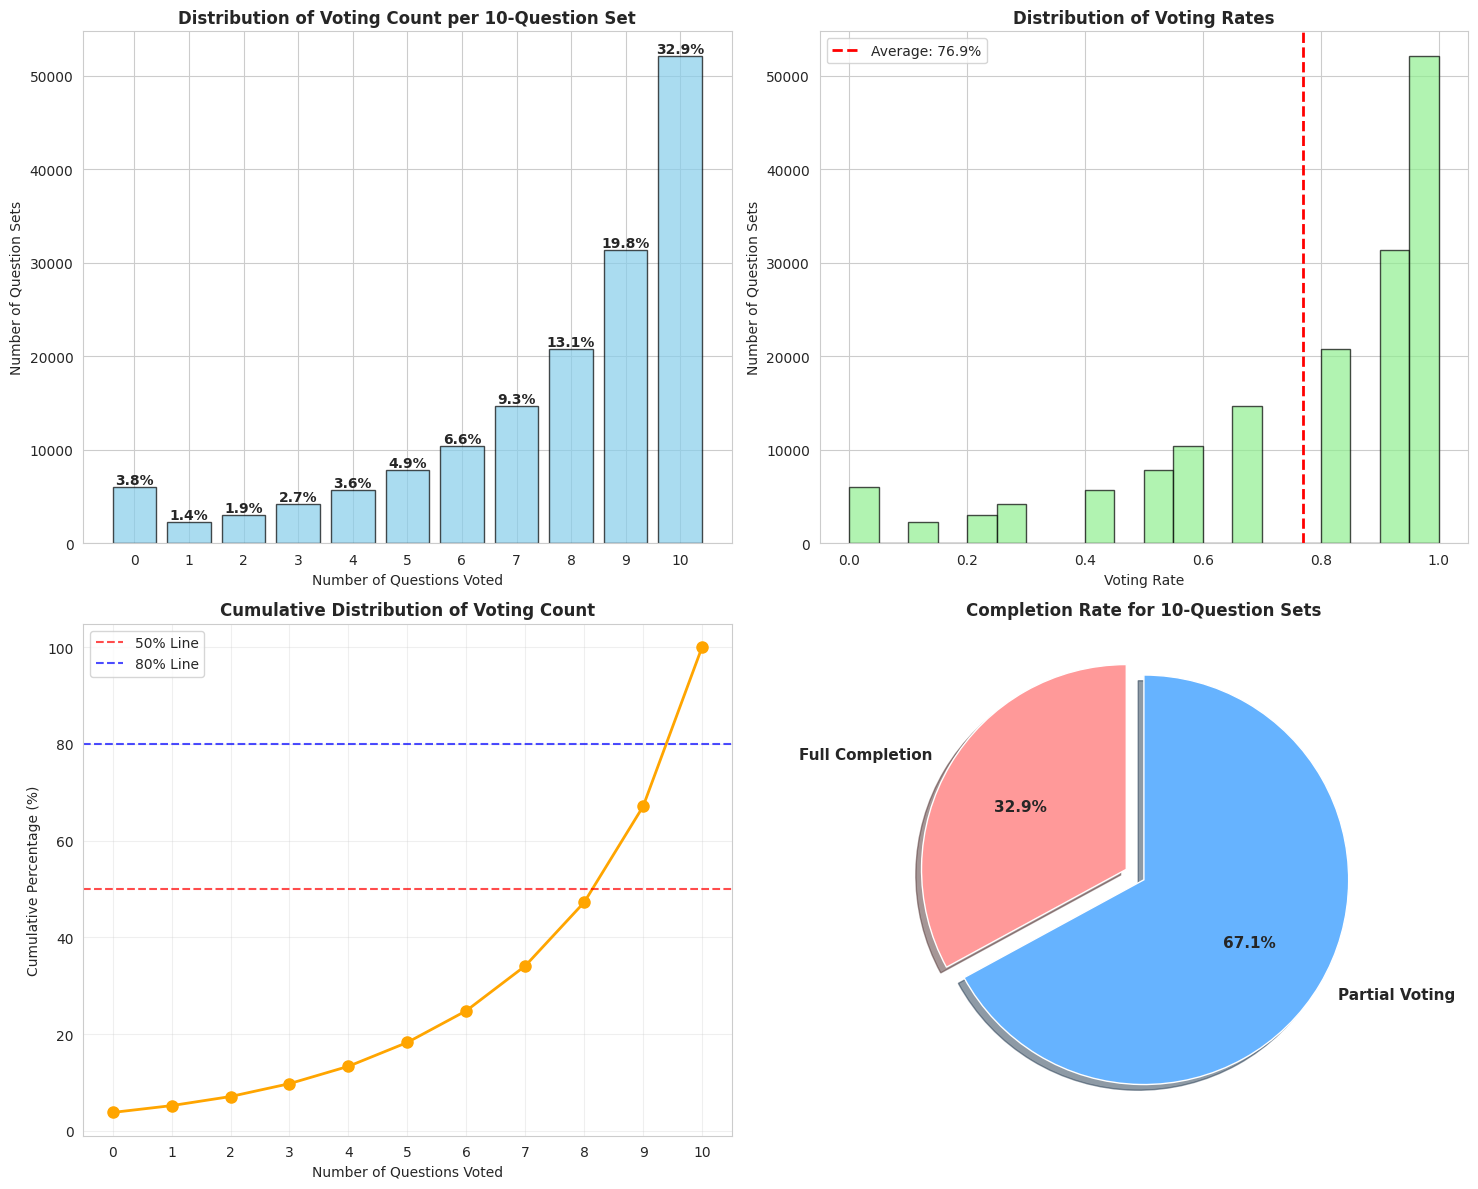


üìñ **ÏòÅÏñ¥ Ïö©Ïñ¥ ÏÑ§Î™Ö**:
‚Ä¢ **Number of Questions Voted**: Ìà¨ÌëúÌïú ÏßàÎ¨∏Ïùò Í∞úÏàò
‚Ä¢ **Number of Question Sets**: ÏßàÎ¨∏ ÏÑ∏Ìä∏Ïùò Í∞úÏàò
‚Ä¢ **Distribution**: Î∂ÑÌè¨ (Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å ÌçºÏ†∏ÏûàÎäîÏßÄ)
‚Ä¢ **Voting Rate**: Ìà¨ÌëúÏú® (Ï†ÑÏ≤¥ ÏßàÎ¨∏ Ï§ë Ìà¨ÌëúÌïú ÎπÑÏú®)
‚Ä¢ **Average**: ÌèâÍ∑†Í∞í
‚Ä¢ **Cumulative Percentage**: ÎàÑÏ†Å ÎπÑÏú® (Ìï¥Îãπ Í∞íÍπåÏßÄÏùò Ï†ÑÏ≤¥ ÎπÑÏú®)
‚Ä¢ **Full Completion**: Ï†ÑÏ≤¥ ÏôÑÏ£º (10Í∞ú Î™®Îëê Ìà¨Ìëú)
‚Ä¢ **Partial Voting**: ÏùºÎ∂ÄÎßå Ìà¨Ìëú (10Í∞ú Ï§ë ÏùºÎ∂ÄÎßå Ìà¨Ìëú)
‚Ä¢ **Completion Rate**: ÏôÑÏ£ºÏú® (Ï†ÑÏ≤¥Î•º Îã§ ÏôÑÎ£åÌïú ÎπÑÏú®)

üéØ ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ìà¨ÌëúÏú® Í≤∞Î°†:

‚úÖ **Ìà¨Ìëú ÌñâÎèô Ìå®ÌÑ¥**:
üìä ÌèâÍ∑† Ìà¨ÌëúÏú®: 76.9%
üìà Í∞ÄÏû• ÌùîÌïú Ìå®ÌÑ¥: 10Í∞ú Ï§ë 10Í∞ú Ìà¨Ìëú (32.9%)
üéØ ÏôÑÏ£ºÏú® (10Í∞ú Î™®Îëê): 32.9%
‚ö° **Î≥¥ÌÜµ Ï∞∏Ïó¨Ïú®**: Ï†àÎ∞ò Ïù¥ÏÉÅÏùò ÏßàÎ¨∏Ïóê Ï∞∏Ïó¨ÌïòÎäî Ï†ÅÎãπÌïú ÏÇ¨Ïö©

üìã **ÏÇ¨Ïö©Ïûê ÌñâÎèô Î∂ÑÏÑù**:
‚Ä¢ Ï†ÑÌòÄ Ìà¨Ìëú ÏïàÌï®: 3.8%
‚Ä¢ ÏùºÎ∂ÄÎßå Ìà¨Ìëú: 63.3%
‚Ä¢ Ï†ÑÏ≤¥ ÏôÑÏ£º: 32.9%

ü

In [23]:
print("üîç ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ï§ë Ïã§Ï†ú Ìà¨ÌëúÏú® Î∂ÑÏÑù")
print("=" * 50)

print("üìã Î∂ÑÏÑù Î∞©Î≤ï:")
print("‚Ä¢ polls_questionset.question_piece_id_list ÌååÏã±")
print("‚Ä¢ polls_questionpiece.is_votedÎ°ú Ïã§Ï†ú Ìà¨Ìëú Ïó¨Î∂Ä ÌôïÏù∏")
print("‚Ä¢ ÏÑ∏Ìä∏Î≥Ñ Ìà¨ÌëúÏú® Í≥ÑÏÇ∞")

# 1. ÏßàÎ¨∏ ÏÑ∏Ìä∏ ÌååÏã± Î∞è Ìà¨ÌëúÏú® Í≥ÑÏÇ∞
print(f"\n1Ô∏è‚É£ ÏßàÎ¨∏ ÏÑ∏Ìä∏Î≥Ñ Ìà¨ÌëúÏú® Í≥ÑÏÇ∞")

import ast
import matplotlib.pyplot as plt
import seaborn as sns

# ÏßàÎ¨∏ ÏÑ∏Ìä∏Î≥Ñ Ìà¨ÌëúÏú® Î∂ÑÏÑù
voting_results = []

for idx, row in df_questionset.iterrows():
    set_id = row['id']
    user_id = row['user_id']
    
    try:
        # question_piece_id_list ÌååÏã±
        if isinstance(row['question_piece_id_list'], list):
            question_ids = row['question_piece_id_list']
        else:
            question_ids = ast.literal_eval(row['question_piece_id_list'])
        
        total_questions = len(question_ids)
        
        # Í∞Å ÏßàÎ¨∏Ïùò Ìà¨Ìëú Ïó¨Î∂Ä ÌôïÏù∏
        voted_questions = df_questionpiece[
            df_questionpiece['id'].isin(question_ids)
        ]['is_voted'].sum()
        
        vote_rate = voted_questions / total_questions if total_questions > 0 else 0
        
        voting_results.append({
            'set_id': set_id,
            'user_id': user_id,
            'total_questions': total_questions,
            'voted_questions': voted_questions,
            'vote_rate': vote_rate
        })
        
    except Exception as e:
        continue
    
    # ÏßÑÌñâÎ•† Ï∂úÎ†•
    if (idx + 1) % 10000 == 0:
        print(f"  ÏßÑÌñâÎ•†: {idx + 1:,} / {len(df_questionset):,} ÏÑ∏Ìä∏ Ï≤òÎ¶¨")

df_voting = pd.DataFrame(voting_results)

print(f"\n‚úÖ Î∂ÑÏÑù ÏôÑÎ£å: {len(df_voting):,}Í∞ú ÏßàÎ¨∏ ÏÑ∏Ìä∏")

# 2. Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\n2Ô∏è‚É£ Ìà¨ÌëúÏú® Í∏∞Î≥∏ ÌÜµÍ≥Ñ")

print(f"‚Ä¢ ÏÑ∏Ìä∏Îãπ ÌèâÍ∑† ÏßàÎ¨∏ Ïàò: {df_voting['total_questions'].mean():.1f}Í∞ú")
print(f"‚Ä¢ ÏÑ∏Ìä∏Îãπ ÌèâÍ∑† Ìà¨Ìëú Ïàò: {df_voting['voted_questions'].mean():.1f}Í∞ú")
print(f"‚Ä¢ ÌèâÍ∑† Ìà¨ÌëúÏú®: {df_voting['vote_rate'].mean():.1%}")
print(f"‚Ä¢ Ìà¨ÌëúÏú® Ï§ëÍ∞ÑÍ∞í: {df_voting['vote_rate'].median():.1%}")

# 3. Ìà¨Ìëú Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨
print(f"\n3Ô∏è‚É£ 10Í∞ú ÏßàÎ¨∏ Ï§ë Ìà¨ÌëúÌïú Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨")

vote_count_dist = df_voting['voted_questions'].value_counts().sort_index()
print(f"‚Ä¢ Ìà¨Ìëú Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨:")
for count in vote_count_dist.index:
    percentage = vote_count_dist[count] / len(df_voting) * 100
    print(f"  - {count}Í∞ú Ìà¨Ìëú: {vote_count_dist[count]:,}Í±¥ ({percentage:.1f}%)")

# 4. Ìà¨ÌëúÏú® Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨
print(f"\n4Ô∏è‚É£ Ìà¨ÌëúÏú® Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨")

vote_rate_ranges = [
    (0.0, 0.2, "0-20%"),
    (0.2, 0.4, "20-40%"),
    (0.4, 0.6, "40-60%"),
    (0.6, 0.8, "60-80%"),
    (0.8, 1.0, "80-100%")
]

for start, end, label in vote_rate_ranges:
    if start == 0.8:  # 80-100% Íµ¨Í∞ÑÏùÄ end Ìè¨Ìï®
        count = ((df_voting['vote_rate'] >= start) & (df_voting['vote_rate'] <= end)).sum()
    else:
        count = ((df_voting['vote_rate'] >= start) & (df_voting['vote_rate'] < end)).sum()
    percentage = count / len(df_voting) * 100
    print(f"  - {label} Ìà¨ÌëúÏú®: {count:,}Í±¥ ({percentage:.1f}%)")

# ÏôÑÎ£åÏú® (Ï†ÑÏ≤¥ Îã§ Ìà¨ÌëúÌïú Í≤ΩÏö∞)
complete_rate = (df_voting['vote_rate'] == 1.0).sum() / len(df_voting) * 100
print(f"\n‚Ä¢ üéØ **ÏôÑÏ£ºÏú® (10Í∞ú Î™®Îëê Ìà¨Ìëú)**: {complete_rate:.1f}%")

# 5. ÏãúÍ∞ÅÌôî (ÏòÅÏñ¥)
print(f"\n5Ô∏è‚É£ ÏãúÍ∞ÅÌôî")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1) Ìà¨Ìëú Í∞úÏàò Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
ax1.bar(vote_count_dist.index, vote_count_dist.values, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Number of Questions Voted')
ax1.set_ylabel('Number of Question Sets')
ax1.set_title('Distribution of Voting Count per 10-Question Set', fontweight='bold', fontsize=12)
ax1.set_xticks(range(0, 11))

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÎπÑÏú® ÌëúÏãú
for i, count in enumerate(vote_count_dist.values):
    percentage = count / len(df_voting) * 100
    ax1.text(vote_count_dist.index[i], count, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

# 2) Ìà¨ÌëúÏú® Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)  
ax2.hist(df_voting['vote_rate'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.axvline(df_voting['vote_rate'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Average: {df_voting["vote_rate"].mean():.1%}')
ax2.set_xlabel('Voting Rate')
ax2.set_ylabel('Number of Question Sets')
ax2.set_title('Distribution of Voting Rates', fontweight='bold', fontsize=12)
ax2.legend()

# 3) Ìà¨Ìëú Í∞úÏàòÎ≥Ñ ÎàÑÏ†Å Î∂ÑÌè¨
cumulative = vote_count_dist.cumsum() / len(df_voting) * 100
ax3.plot(vote_count_dist.index, cumulative, marker='o', linewidth=2, markersize=8, color='orange')
ax3.set_xlabel('Number of Questions Voted')
ax3.set_ylabel('Cumulative Percentage (%)')
ax3.set_title('Cumulative Distribution of Voting Count', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xticks(range(0, 11))

# ÌäπÏ†ï ÏßÄÏ†ê Í∞ïÏ°∞
ax3.axhline(50, color='red', linestyle='--', alpha=0.7, label='50% Line')
ax3.axhline(80, color='blue', linestyle='--', alpha=0.7, label='80% Line')
ax3.legend()

# 4) ÏõêÌòï Ï∞®Ìä∏ - ÏôÑÏ£ºÏú®
complete_count = (df_voting['vote_rate'] == 1.0).sum()
incomplete_count = len(df_voting) - complete_count

labels = ['Full Completion', 'Partial Voting']
sizes = [complete_count, incomplete_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # ÏôÑÏ£º Î∂ÄÎ∂Ñ Í∞ïÏ°∞

ax4.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Completion Rate for 10-Question Sets', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# ÏòÅÏñ¥ Ïö©Ïñ¥ ÏÑ§Î™Ö
print(f"\nüìñ **ÏòÅÏñ¥ Ïö©Ïñ¥ ÏÑ§Î™Ö**:")
print(f"‚Ä¢ **Number of Questions Voted**: Ìà¨ÌëúÌïú ÏßàÎ¨∏Ïùò Í∞úÏàò")
print(f"‚Ä¢ **Number of Question Sets**: ÏßàÎ¨∏ ÏÑ∏Ìä∏Ïùò Í∞úÏàò")
print(f"‚Ä¢ **Distribution**: Î∂ÑÌè¨ (Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å ÌçºÏ†∏ÏûàÎäîÏßÄ)")
print(f"‚Ä¢ **Voting Rate**: Ìà¨ÌëúÏú® (Ï†ÑÏ≤¥ ÏßàÎ¨∏ Ï§ë Ìà¨ÌëúÌïú ÎπÑÏú®)")
print(f"‚Ä¢ **Average**: ÌèâÍ∑†Í∞í")
print(f"‚Ä¢ **Cumulative Percentage**: ÎàÑÏ†Å ÎπÑÏú® (Ìï¥Îãπ Í∞íÍπåÏßÄÏùò Ï†ÑÏ≤¥ ÎπÑÏú®)")
print(f"‚Ä¢ **Full Completion**: Ï†ÑÏ≤¥ ÏôÑÏ£º (10Í∞ú Î™®Îëê Ìà¨Ìëú)")
print(f"‚Ä¢ **Partial Voting**: ÏùºÎ∂ÄÎßå Ìà¨Ìëú (10Í∞ú Ï§ë ÏùºÎ∂ÄÎßå Ìà¨Ìëú)")
print(f"‚Ä¢ **Completion Rate**: ÏôÑÏ£ºÏú® (Ï†ÑÏ≤¥Î•º Îã§ ÏôÑÎ£åÌïú ÎπÑÏú®)")

# 6. Í≤∞Î°†
print(f"\nüéØ ÏßàÎ¨∏ 10Í∞ú ÏÑ∏Ìä∏ Ìà¨ÌëúÏú® Í≤∞Î°†:")

most_common_vote = vote_count_dist.idxmax()
most_common_percentage = vote_count_dist[most_common_vote] / len(df_voting) * 100

print(f"\n‚úÖ **Ìà¨Ìëú ÌñâÎèô Ìå®ÌÑ¥**:")
print(f"üìä ÌèâÍ∑† Ìà¨ÌëúÏú®: {df_voting['vote_rate'].mean():.1%}")
print(f"üìà Í∞ÄÏû• ÌùîÌïú Ìå®ÌÑ¥: 10Í∞ú Ï§ë {most_common_vote}Í∞ú Ìà¨Ìëú ({most_common_percentage:.1f}%)")
print(f"üéØ ÏôÑÏ£ºÏú® (10Í∞ú Î™®Îëê): {complete_rate:.1f}%")

if df_voting['vote_rate'].mean() >= 0.8:
    print(f"üî• **ÎÜíÏùÄ Ï∞∏Ïó¨Ïú®**: ÏÇ¨Ïö©ÏûêÎì§Ïù¥ Î∞õÏùÄ ÏßàÎ¨∏ ÎåÄÎ∂ÄÎ∂ÑÏóê Ï†ÅÍ∑πÏ†ÅÏúºÎ°ú Ï∞∏Ïó¨")
elif df_voting['vote_rate'].mean() >= 0.6:
    print(f"‚ö° **Î≥¥ÌÜµ Ï∞∏Ïó¨Ïú®**: Ï†àÎ∞ò Ïù¥ÏÉÅÏùò ÏßàÎ¨∏Ïóê Ï∞∏Ïó¨ÌïòÎäî Ï†ÅÎãπÌïú ÏÇ¨Ïö©")
else:
    print(f"üì± **ÏÑ†ÌÉùÏ†Å Ï∞∏Ïó¨**: Í¥ÄÏã¨ ÏûàÎäî ÏßàÎ¨∏Îßå Í≥®ÎùºÏÑú Ìà¨ÌëúÌïòÎäî Ìå®ÌÑ¥")

# Ï§ëÎèÑ Ìè¨Í∏∞Ïú®
dropout_analysis = ((df_voting['vote_rate'] > 0) & (df_voting['vote_rate'] < 1)).sum() / len(df_voting) * 100
never_voted = (df_voting['vote_rate'] == 0).sum() / len(df_voting) * 100

print(f"\nüìã **ÏÇ¨Ïö©Ïûê ÌñâÎèô Î∂ÑÏÑù**:")
print(f"‚Ä¢ Ï†ÑÌòÄ Ìà¨Ìëú ÏïàÌï®: {never_voted:.1f}%")
print(f"‚Ä¢ ÏùºÎ∂ÄÎßå Ìà¨Ìëú: {dropout_analysis:.1f}%")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏôÑÏ£º: {complete_rate:.1f}%")

print(f"\nüìö **Í∑∏ÎûòÌîÑ Ìï¥ÏÑù Í∞ÄÏù¥Îìú**:")
print(f"‚Ä¢ **Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ**: 10Í∞ú Ï§ë Î™á Í∞úÎÇò Ìà¨ÌëúÌñàÎäîÏßÄ Î≥¥Ïó¨Ï§å")
print(f"‚Ä¢ **Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ**: Ìà¨ÌëúÏú®(0~100%) Î∂ÑÌè¨Î•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÏãú")
print(f"‚Ä¢ **ÏÑ∏ Î≤àÏß∏ Í∑∏ÎûòÌîÑ**: ÎàÑÏ†Å Î∂ÑÌè¨Î°ú 'XÍ∞ú Ïù¥Ìïò Ìà¨ÌëúÌïú ÏÇ¨ÎûåÏù¥ Ï†ÑÏ≤¥Ïùò Î™á %'Ïù∏ÏßÄ ÌëúÏãú")
print(f"‚Ä¢ **ÎÑ§ Î≤àÏß∏ Í∑∏ÎûòÌîÑ**: 10Í∞ú Î™®Îëê ÏôÑÏ£º vs ÏùºÎ∂ÄÎßå Ìà¨ÌëúÏùò ÎπÑÏú®ÏùÑ ÏõêÌòïÏ∞®Ìä∏Î°ú ÌëúÏãú")

# Í≤∞Ï†ú Ï†ÑÌôòÏú® ÎÇòÏÅ†ÎìØ!

## Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("üí≥ Í≤∞Ï†ú Ï†ÑÌôòÏú® Î∂ÑÏÑù - Îç∞Ïù¥ÌÑ∞ Î°úÎìúÎ∂ÄÌÑ∞ ÏãúÏûë")
print("=" * 60)

# 1. Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("üìÇ **Step 1: Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú**")

try:
    df_user = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user.parquet")
    print(f"‚úÖ ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(df_user):,}Î™Ö")
except Exception as e:
    print(f"‚ùå ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®: {e}")

try:
    df_questionset = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionset.parquet")
    print(f"‚úÖ ÏßàÎ¨∏ÏÑ∏Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(df_questionset):,}Í±¥")
except Exception as e:
    print(f"‚ùå ÏßàÎ¨∏ÏÑ∏Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®: {e}")

try:
    df_questionpiece = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionpiece.parquet")
    print(f"‚úÖ ÏßàÎ¨∏ÌîºÏä§ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(df_questionpiece):,}Í±¥")
except Exception as e:
    print(f"‚ùå ÏßàÎ¨∏ÌîºÏä§ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®: {e}")

# 2. Í≤∞Ï†ú Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print(f"\nüìÇ **Step 2: Í≤∞Ï†ú Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎìú**")

try:
    df_payment = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet")
    print(f"‚úÖ Í≤∞Ï†ú ÏÑ±Í≥µ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(df_payment):,}Í±¥")
except Exception as e:
    print(f"‚ùå Í≤∞Ï†ú ÏÑ±Í≥µ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®: {e}")

try:
    df_failpayment = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet")
    print(f"‚úÖ Í≤∞Ï†ú Ïã§Ìå® Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(df_failpayment):,}Í±¥")
except Exception as e:
    print(f"‚ùå Í≤∞Ï†ú Ïã§Ìå® Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ïã§Ìå®: {e}")

# 3. Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print(f"\nüîç **Step 3: Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏**")

print(f"\nüë• **ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ (df_user)**:")
print(f"‚Ä¢ Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò: {len(df_user):,}Î™Ö")
print(f"‚Ä¢ Ïª¨Îüº: {list(df_user.columns)}")

print(f"\nüí∞ **Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ (df_payment)**:")
if 'df_payment' in locals():
    print(f"‚Ä¢ Ï¥ù Í≤∞Ï†ú Í±¥Ïàò: {len(df_payment):,}Í±¥")
    print(f"‚Ä¢ Ïª¨Îüº: {list(df_payment.columns)}")
    print(f"‚Ä¢ Í≤∞Ï†úÌïú Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê: {df_payment['user_id'].nunique():,}Î™Ö")

print(f"\n‚ùì **ÏßàÎ¨∏ÏÑ∏Ìä∏ Îç∞Ïù¥ÌÑ∞ (df_questionset)**:")
if 'df_questionset' in locals():
    print(f"‚Ä¢ Ï¥ù ÏßàÎ¨∏ÏÑ∏Ìä∏ Ïàò: {len(df_questionset):,}Í∞ú")
    print(f"‚Ä¢ Ïª¨Îüº: {list(df_questionset.columns)}")
    print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ìïú Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê: {df_questionset['user_id'].nunique():,}Î™Ö")

# 4. Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ÌôïÏù∏
print(f"\nüìä **Step 4: Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ÌôïÏù∏**")

if 'df_payment' in locals():
    print(f"\nüí≥ **Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå**:")
    print(df_payment.head(3))

if 'df_questionset' in locals():
    print(f"\n‚ùì **ÏßàÎ¨∏ÏÑ∏Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå**:")
    print(df_questionset.head(3))

print(f"\nüéØ **Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å!**")
print(f"Îã§Ïùå Îã®Í≥ÑÏóêÏÑú Ï†ÑÌôòÏú® Î∂ÑÏÑùÏùÑ ÏãúÏûëÌïòÍ≤†ÏäµÎãàÎã§.")


üí≥ Í≤∞Ï†ú Ï†ÑÌôòÏú® Î∂ÑÏÑù - Îç∞Ïù¥ÌÑ∞ Î°úÎìúÎ∂ÄÌÑ∞ ÏãúÏûë
üìÇ **Step 1: Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú**
‚úÖ ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 677,085Î™Ö
‚úÖ ÏßàÎ¨∏ÏÑ∏Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 158,384Í±¥
‚úÖ ÏßàÎ¨∏ÌîºÏä§ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 1,265,476Í±¥

üìÇ **Step 2: Í≤∞Ï†ú Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎìú**
‚úÖ Í≤∞Ï†ú ÏÑ±Í≥µ Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 95,140Í±¥
‚úÖ Í≤∞Ï†ú Ïã§Ìå® Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 163Í±¥

üîç **Step 3: Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏**

üë• **ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ (df_user)**:
‚Ä¢ Ï¥ù ÏÇ¨Ïö©Ïûê Ïàò: 677,085Î™Ö
‚Ä¢ Ïª¨Îüº: ['id', 'is_superuser', 'is_staff', 'gender', 'point', 'friend_id_list', 'is_push_on', 'created_at', 'block_user_id_list', 'hide_user_id_list', 'ban_status', 'report_count', 'alarm_count', 'pending_chat', 'pending_votes', 'group_id']

üí∞ **Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞ (df_payment)**:
‚Ä¢ Ï¥ù Í≤∞Ï†ú Í±¥Ïàò: 95,140Í±¥
‚Ä¢ Ïª¨Îüº: ['id', 'productId', 'phone_type', 'created_at', 'user_id']
‚Ä¢ Í≤∞Ï†úÌïú Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê: 59,192Î™Ö

‚ùì **ÏßàÎ¨∏ÏÑ∏Ìä∏ Îç∞Ïù¥ÌÑ∞ (df_questionset)**:
‚Ä¢ Ï¥ù ÏßàÎ¨∏

: 

## ÏÇ¨Ïö©Ïûê IDÍ∏∞Î∞ò Í≤∞Ï†ú Ï†ÑÌôòÏú®(Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê & ÌôúÏÑ±ÏÇ¨Ïö©Ïûê -> Ìà¨Ìëú Ï∞∏Ïó¨Ïûê)

In [ ]:
print("üîç ÏÇ¨Ïö©Ïûê ID Í∏∞Î∞ò Ï†ïÌôïÌïú Ï†ÑÌôòÏú® Î∂ÑÏÑù")
print("=" * 50)

print("üìä **Step 1: Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÇ¨Ïö©Ïûê ID ÌôïÏù∏**")

# Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÇ¨Ïö©Ïûê ID ÌÉÄÏûÖÍ≥º Î∂ÑÌè¨ ÌôïÏù∏
print(f"‚Ä¢ df_user['id'] ÌÉÄÏûÖ: {df_user['id'].dtype}")
print(f"‚Ä¢ df_payment['user_id'] ÌÉÄÏûÖ: {df_payment['user_id'].dtype}")  
print(f"‚Ä¢ df_questionset['user_id'] ÌÉÄÏûÖ: {df_questionset['user_id'].dtype}")

print(f"\n‚Ä¢ df_user ID Î≤îÏúÑ: {df_user['id'].min()} ~ {df_user['id'].max()}")
print(f"‚Ä¢ df_payment user_id Î≤îÏúÑ: {df_payment['user_id'].min()} ~ {df_payment['user_id'].max()}")
print(f"‚Ä¢ df_questionset user_id Î≤îÏúÑ: {df_questionset['user_id'].min()} ~ {df_questionset['user_id'].max()}")

# Ïã§Ï†ú ÏÇ¨Ïö©Ïûê ÏßëÌï© Ï†ïÏùò
all_users = set(df_user['id'].unique())
payment_users = set(df_payment['user_id'].unique())
questionset_users = set(df_questionset['user_id'].unique())

print(f"\nüìã **Step 2: ÏÇ¨Ïö©Ïûê ÏßëÌï© Ïû¨ÌôïÏù∏**")
print(f"‚Ä¢ Ï†ÑÏ≤¥ Îì±Î°ù ÏÇ¨Ïö©Ïûê: {len(all_users):,}Î™Ö")
print(f"‚Ä¢ Í≤∞Ï†úÌïú ÏÇ¨Ïö©Ïûê: {len(payment_users):,}Î™Ö")
print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ìïú ÏÇ¨Ïö©Ïûê: {len(questionset_users):,}Î™Ö")

# ÍµêÏßëÌï© ÌôïÏù∏
payment_in_users = payment_users.intersection(all_users)
questionset_in_users = questionset_users.intersection(all_users)
both_users = payment_users.intersection(questionset_users)

print(f"\nüîç **Step 3: ÍµêÏßëÌï© Î∂ÑÏÑù**")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ï§ë Í≤∞Ï†úÌïú ÏÇ¨Ïö©Ïûê: {len(payment_in_users):,}Î™Ö")
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ï§ë ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ìïú ÏÇ¨Ïö©Ïûê: {len(questionset_in_users):,}Î™Ö")
print(f"‚Ä¢ Í≤∞Ï†úÎèÑ ÌïòÍ≥† ÏßàÎ¨∏ÏÑ∏Ìä∏ÎèÑ ÏÇ¨Ïö©Ìïú ÏÇ¨Ïö©Ïûê: {len(both_users):,}Î™Ö")

# ÏÇ¨Ïö©ÏûêÍ∞Ä Ïã§Ï†úÎ°ú Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
print(f"\nüîé **Step 4: ÏÇ¨Ïö©Ïûê Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏**")
payment_not_in_users = payment_users - all_users
questionset_not_in_users = questionset_users - all_users

print(f"‚Ä¢ Í≤∞Ï†úÌñàÏßÄÎßå ÏÇ¨Ïö©Ïûê ÌÖåÏù¥Î∏îÏóê ÏóÜÎäî ID: {len(payment_not_in_users):,}Í∞ú")
print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©ÌñàÏßÄÎßå ÏÇ¨Ïö©Ïûê ÌÖåÏù¥Î∏îÏóê ÏóÜÎäî ID: {len(questionset_not_in_users):,}Í∞ú")

if len(payment_not_in_users) > 0:
    print(f"  ÏòàÏãú: {list(payment_not_in_users)[:5]}")
if len(questionset_not_in_users) > 0:
    print(f"  ÏòàÏãú: {list(questionset_not_in_users)[:5]}")

# Ïò¨Î∞îÎ•∏ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
print(f"\n‚úÖ **Step 5: Ïò¨Î∞îÎ•∏ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞**")

# 1. Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ï§ë Í≤∞Ï†ú Ï†ÑÌôòÏú®
basic_conversion = len(payment_in_users) / len(all_users) * 100
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ‚Üí Í≤∞Ï†ú Ï†ÑÌôòÏú®: {basic_conversion:.2f}% ({len(payment_in_users):,}/{len(all_users):,})")

# 2. ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ïûê Ï§ë Í≤∞Ï†ú Ï†ÑÌôòÏú®  
if len(questionset_in_users) > 0:
    questionset_to_payment = len(both_users) / len(questionset_in_users) * 100
    print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ïûê ‚Üí Í≤∞Ï†ú Ï†ÑÌôòÏú®: {questionset_to_payment:.2f}% ({len(both_users):,}/{len(questionset_in_users):,})")

# 3. Í≤∞Ï†ú ÏÇ¨Ïö©Ïûê Ï§ë ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Î•†
if len(payment_in_users) > 0:
    payment_to_questionset = len(both_users) / len(payment_in_users) * 100
    print(f"‚Ä¢ Í≤∞Ï†ú ÏÇ¨Ïö©Ïûê Ï§ë ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Î•†: {payment_to_questionset:.2f}% ({len(both_users):,}/{len(payment_in_users):,})")

# ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù
print(f"\nüéØ **ÏÇ¨Ïö©Ïûê ÌñâÎèô Ìå®ÌÑ¥**")
payment_only = payment_users - questionset_users
questionset_only = questionset_users - payment_users

print(f"‚Ä¢ Í≤∞Ï†úÎßå ÌïòÎäî ÏÇ¨Ïö©Ïûê: {len(payment_only):,}Î™Ö ({len(payment_only)/len(payment_users)*100:.1f}%)")
print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏Îßå ÏÇ¨Ïö©ÌïòÎäî ÏÇ¨Ïö©Ïûê: {len(questionset_only):,}Î™Ö ({len(questionset_only)/len(questionset_users)*100:.1f}%)")
print(f"‚Ä¢ Îëò Îã§ ÌïòÎäî ÏÇ¨Ïö©Ïûê: {len(both_users):,}Î™Ö")

print(f"\nüìä **Í≤∞Î°†**:")
if len(payment_only) > len(both_users) * 10:
    print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏Îäî ÏµúÍ∑º Ï∂îÍ∞ÄÎêú Í∏∞Îä•ÏúºÎ°ú Î≥¥ÏûÑ")
    print(f"‚Ä¢ Í∏∞Ï°¥ Í≤∞Ï†ú ÏÇ¨Ïö©ÏûêÎì§ÏùÄ Îã§Î•∏ Í∏∞Îä•ÏùÑ Ï£ºÎ°ú ÏÇ¨Ïö©")
    print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ‚Üí Í≤∞Ï†ú Ï†ÑÌôòÏú®: {questionset_to_payment:.1f}%Îäî ÏùòÎØ∏ÏûàÎäî ÏßÄÌëú")
else:
    print(f"‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ÏôÄ Í≤∞Ï†ú Í∏∞Îä•Ïù¥ Î∞ÄÏ†ëÌïòÍ≤å Ïó∞Í¥ÄÎê®")

üîç ÏÇ¨Ïö©Ïûê ID Í∏∞Î∞ò Ï†ïÌôïÌïú Ï†ÑÌôòÏú® Î∂ÑÏÑù
üìä **Step 1: Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÇ¨Ïö©Ïûê ID ÌôïÏù∏**
‚Ä¢ df_user['id'] ÌÉÄÏûÖ: int64
‚Ä¢ df_payment['user_id'] ÌÉÄÏûÖ: int64
‚Ä¢ df_questionset['user_id'] ÌÉÄÏûÖ: int64

‚Ä¢ df_user ID Î≤îÏúÑ: 831956 ~ 1583733
‚Ä¢ df_payment user_id Î≤îÏúÑ: 833041 ~ 1583632
‚Ä¢ df_questionset user_id Î≤îÏúÑ: 838023 ~ 1583358

üìã **Step 2: ÏÇ¨Ïö©Ïûê ÏßëÌï© Ïû¨ÌôïÏù∏**
‚Ä¢ Ï†ÑÏ≤¥ Îì±Î°ù ÏÇ¨Ïö©Ïûê: 677,085Î™Ö
‚Ä¢ Í≤∞Ï†úÌïú ÏÇ¨Ïö©Ïûê: 59,192Î™Ö
‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ìïú ÏÇ¨Ïö©Ïûê: 4,972Î™Ö

üîç **Step 3: ÍµêÏßëÌï© Î∂ÑÏÑù**
‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ï§ë Í≤∞Ï†úÌïú ÏÇ¨Ïö©Ïûê: 59,192Î™Ö
‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ï§ë ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©Ìïú ÏÇ¨Ïö©Ïûê: 4,972Î™Ö
‚Ä¢ Í≤∞Ï†úÎèÑ ÌïòÍ≥† ÏßàÎ¨∏ÏÑ∏Ìä∏ÎèÑ ÏÇ¨Ïö©Ìïú ÏÇ¨Ïö©Ïûê: 410Î™Ö

üîé **Step 4: ÏÇ¨Ïö©Ïûê Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏**
‚Ä¢ Í≤∞Ï†úÌñàÏßÄÎßå ÏÇ¨Ïö©Ïûê ÌÖåÏù¥Î∏îÏóê ÏóÜÎäî ID: 0Í∞ú
‚Ä¢ ÏßàÎ¨∏ÏÑ∏Ìä∏ ÏÇ¨Ïö©ÌñàÏßÄÎßå ÏÇ¨Ïö©Ïûê ÌÖåÏù¥Î∏îÏóê ÏóÜÎäî ID: 0Í∞ú

‚úÖ **Step 5: Ïò¨Î∞îÎ•∏ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞**
‚Ä¢ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïû

## Îç∞Ïù¥ÌÑ∞ Î™ÖÏÑ∏

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïÑÏöîÏãú)
plt.rcParams['font.family'] = 'DejaVu Sans'

def generate_data_specification(df, table_name):
    """
    Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Î™ÖÏÑ∏ÏÑúÎ•º ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
    """
    print(f"\n{'='*50}")
    print(f"ÌÖåÏù¥Î∏îÎ™Ö: {table_name}")
    print(f"{'='*50}")
    
    # 1. Í∏∞Î≥∏ Ï†ïÎ≥¥
    print(f"\nüìä Í∏∞Î≥∏ Ï†ïÎ≥¥")
    print(f"- Ìñâ Ïàò: {df.shape[0]:,}")
    print(f"- Ïó¥ Ïàò: {df.shape[1]:,}")
    print(f"- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # 2. Ïª¨Îüº Ï†ïÎ≥¥
    print(f"\nüìã Ïª¨Îüº Ï†ïÎ≥¥")
    column_info = pd.DataFrame({
        'Column': df.columns,
        'Data_Type': df.dtypes,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Unique_Count': df.nunique()
    })
    print(column_info.to_string(index=False))
    
    # 3. ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nüìà ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ")
        print(df[numeric_cols].describe().round(2))
    
    # 4. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ (ÏÉÅÏúÑ 5Í∞ú)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(f"\nüìä Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ (ÏÉÅÏúÑ 5Í∞ú Í∞í)")
        for col in categorical_cols[:5]:  # Ï≤òÏùå 5Í∞ú Ïª¨ÎüºÎßå
            print(f"\n[{col}]")
            value_counts = df[col].value_counts().head()
            for idx, (value, count) in enumerate(value_counts.items()):
                percentage = (count / len(df) * 100)
                print(f"  {idx+1}. {value}: {count:,}Í±¥ ({percentage:.1f}%)")
    
    # 5. ÎÇ†Ïßú Ïª¨Îüº Î∂ÑÏÑù (ÎÇ†Ïßú ÌòïÌÉúÏùò Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥)
    date_cols = df.select_dtypes(include=['datetime64']).columns
    if len(date_cols) > 0:
        print(f"\nüìÖ ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥")
        for col in date_cols:
            print(f"\n[{col}]")
            print(f"  - ÏµúÏÜå ÎÇ†Ïßú: {df[col].min()}")
            print(f"  - ÏµúÎåÄ ÎÇ†Ïßú: {df[col].max()}")
            print(f"  - Í∏∞Í∞Ñ: {(df[col].max() - df[col].min()).days}Ïùº")
    
    return column_info

# ÏÇ¨Ïö© ÏòàÏãú
def create_full_specification():
    """
    Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú Î™ÖÏÑ∏ÏÑú ÏÉùÏÑ±
    """
    
    # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
    data_path = "/home/jovyan/work/data"
    
    # Hackle Îç∞Ïù¥ÌÑ∞
    hackle_files = [
        "hackle_events_processed.csv",
        "hackle_device_properties.csv", 
        "hackle_user_properties.csv",
        "hackle_properties.csv"
    ]
    
    # Votes Îç∞Ïù¥ÌÑ∞
    votes_files = [
        "accounts_user_processed.csv",
        "accounts_userquestionrecord_processed.csv",
        "polls_question.csv",
        "polls_questionset.csv",
        # ÌïÑÏöîÌïú Îã§Î•∏ ÌååÏùºÎì§ Ï∂îÍ∞Ä
    ]
    
    print("üîç Îç∞Ïù¥ÌÑ∞ Î™ÖÏÑ∏ÏÑú ÏÉùÏÑ± ÏãúÏûë")
    print(f"ÏÉùÏÑ± ÏùºÏãú: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    # Hackle Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
    print(f"\n\n{'üéØ HACKLE Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù':<50}")
    for file in hackle_files:
        try:
            df = pd.read_csv(f"{data_path}/{file}")
            generate_data_specification(df, file.replace('.csv', ''))
        except Exception as e:
            print(f"‚ùå {file} Î°úÎìú Ïã§Ìå®: {e}")
    
    # Votes Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
    print(f"\n\n{'üó≥Ô∏è VOTES Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù':<50}")
    for file in votes_files:
        try:
            df = pd.read_csv(f"{data_path}/{file}")
            generate_data_specification(df, file.replace('.csv', ''))
        except Exception as e:
            print(f"‚ùå {file} Î°úÎìú Ïã§Ìå®: {e}")

# Ïã§Ìñâ
create_full_specification()

üîç Îç∞Ïù¥ÌÑ∞ Î™ÖÏÑ∏ÏÑú ÏÉùÏÑ± ÏãúÏûë
ÏÉùÏÑ± ÏùºÏãú: 2025-06-02 01:56:27


üéØ HACKLE Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù                                   

ÌÖåÏù¥Î∏îÎ™Ö: hackle_events_processed

üìä Í∏∞Î≥∏ Ï†ïÎ≥¥
- Ìñâ Ïàò: 11,245,459
- Ïó¥ Ïàò: 11
- Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 5614.47 MB

üìã Ïª¨Îüº Ï†ïÎ≥¥
        Column Data_Type  Non_Null_Count  Null_Count  Null_Percentage  Unique_Count
      event_id    object        11245459           0             0.00      11245459
event_datetime    object        11245459           0             0.00       1756107
     event_key    object        11245459           0             0.00            44
    session_id    object        11245459           0             0.00        253616
            id    object        11245459           0             0.00      11245459
     item_name    object           13027    11232432            99.88             5
     page_name    object          788363    10457096            92.99            12
  friend_count   float64        1049507

In [28]:
import pandas as pd
import os

def show_table_columns(table_name):
    """
    ÌäπÏ†ï ÌÖåÏù¥Î∏îÏùò Ïª¨ÎüºÎ™ÖÎßå Ï∂úÎ†•
    """
    data_path = "/home/jovyan/work/data"
    
    # .csv ÌôïÏû•ÏûêÍ∞Ä ÏóÜÏúºÎ©¥ Ï∂îÍ∞Ä
    if not table_name.endswith('.csv'):
        file_name = f"{table_name}.csv"
    else:
        file_name = table_name
        table_name = table_name.replace('.csv', '')
    
    try:
        df = pd.read_csv(f"{data_path}/{file_name}")
        
        print(f"üìã {table_name}")
        print(f"Ïª¨Îüº Ïàò: {len(df.columns)}Í∞ú")
        print("Ïª¨ÎüºÎ™Ö:")
        for i, col in enumerate(df.columns, 1):
            print(f"  {i}. {col}")
            
    except FileNotFoundError:
        print(f"‚ùå ÌÖåÏù¥Î∏î '{table_name}'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌÖåÏù¥Î∏î Î™©Î°ù:")
        csv_files = [f.replace('.csv', '') for f in os.listdir(data_path) if f.endswith('.csv')]
        for i, name in enumerate(sorted(csv_files), 1):
            print(f"  {i}. {name}")
    except Exception as e:
        print(f"‚ùå Ïò§Î•ò Î∞úÏÉù: {e}")


show_table_columns("accounts_user_processed")

üìã accounts_user_processed
Ïª¨Îüº Ïàò: 21Í∞ú
Ïª¨ÎüºÎ™Ö:
  1. id
  2. is_superuser
  3. is_staff
  4. gender
  5. point
  6. friend_id_list
  7. is_push_on
  8. created_at
  9. block_user_id_list
  10. hide_user_id_list
  11. ban_status
  12. report_count
  13. alarm_count
  14. pending_chat
  15. pending_votes
  16. group_id
  17. friend_count
  18. is_point_specialist
  19. is_friend_specialist
  20. is_specialist
  21. specialist_type


In [26]:
# has_readÏôÄ opened_times Í¥ÄÍ≥Ñ Î∂ÑÏÑù
def analyze_read_vs_opened():
    df = pd.read_csv("/home/jovyan/work/data/accounts_userquestionrecord_processed.csv")
    
    print("üìä has_read vs opened_times Î∂ÑÏÑù")
    print("="*40)
    
    # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
    print(f"Ï†ÑÏ≤¥ Î†àÏΩîÎìú: {len(df):,}Í∞ú")
    print(f"has_read=1: {(df['has_read']==1).sum():,}Í∞ú ({(df['has_read']==1).mean()*100:.1f}%)")
    print(f"opened_times>0: {(df['opened_times']>0).sum():,}Í∞ú ({(df['opened_times']>0).mean()*100:.1f}%)")
    
    # Ìå®ÌÑ¥ Î∂ÑÏÑù
    print("\nüîç Ìå®ÌÑ¥ Î∂ÑÏÑù:")
    
    # ÏùΩÏóàÏßÄÎßå Ïó¥ÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
    read_but_not_opened = df[(df['has_read']==1) & (df['opened_times']==0)]
    print(f"ÏùΩÏóàÏßÄÎßå Í≤∞Í≥º Ïïà Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞: {len(read_but_not_opened):,}Í∞ú")
    
    # Ïïà ÏùΩÏóàÏßÄÎßå Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞  
    not_read_but_opened = df[(df['has_read']==0) & (df['opened_times']>0)]
    print(f"Ïïà ÏùΩÏóàÏßÄÎßå Í≤∞Í≥º Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞: {len(not_read_but_opened):,}Í∞ú")
    
    # Îëò Îã§ ÏûàÎäî Í≤ΩÏö∞
    both = df[(df['has_read']==1) & (df['opened_times']>0)]
    print(f"ÏùΩÍ≥† Í≤∞Í≥ºÎèÑ Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞: {len(both):,}Í∞ú")
    
    # opened_times Î∂ÑÌè¨
    print(f"\nüìà opened_times Î∂ÑÌè¨:")
    print(df['opened_times'].value_counts().head(10))
    
    # has_readÏôÄ opened_times ÍµêÏ∞®Ìëú
    print(f"\nüìã ÍµêÏ∞®Ìëú:")
    cross_tab = pd.crosstab(df['has_read'], df['opened_times']>0, margins=True)
    print(cross_tab)

analyze_read_vs_opened()

üìä has_read vs opened_times Î∂ÑÏÑù
Ï†ÑÏ≤¥ Î†àÏΩîÎìú: 1,217,558Í∞ú
has_read=1: 675,931Í∞ú (55.5%)
opened_times>0: 60,662Í∞ú (5.0%)

üîç Ìå®ÌÑ¥ Î∂ÑÏÑù:
ÏùΩÏóàÏßÄÎßå Í≤∞Í≥º Ïïà Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞: 618,901Í∞ú
Ïïà ÏùΩÏóàÏßÄÎßå Í≤∞Í≥º Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞: 3,632Í∞ú
ÏùΩÍ≥† Í≤∞Í≥ºÎèÑ Ïó¥Ïñ¥Î≥∏ Í≤ΩÏö∞: 57,030Í∞ú

üìà opened_times Î∂ÑÌè¨:
opened_times
0    1156896
1      46882
2      11120
3       2660
Name: count, dtype: int64

üìã ÍµêÏ∞®Ìëú:
opened_times    False   True      All
has_read                             
0              537995   3632   541627
1              618901  57030   675931
All           1156896  60662  1217558


In [3]:
import pandas as pd

data_path = "/home/jovyan/work/data"
file_name = f"hackle_events_processed.csv"

df = pd.read_csv(f"{data_path}/{file_name}")

In [4]:
df[df["event_id"] != df["id"]]

Empty DataFrame
Columns: [event_id, event_datetime, event_key, session_id, id, item_name, page_name, friend_count, votes_count, heart_balance, question_id]
Index: []

# EDA

## Ïú†Ìñâ ÌòÑÏÉÅ Ìï¥Î∂Ä

### Ïú†Ï†Ä ÏÉùÏ°¥Í∏∞Í∞Ñ ÌÖåÏù¥Î∏î

In [2]:
import pandas as pd
import os

# Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨
data_dir = "/home/jovyan/work/data"

# ÌååÏùºÎ≥Ñ Ïª¨Îüº ÌôïÏù∏
files = [
    'accounts_blockrecord_processed.csv',
    'accounts_failpaymenthistory.csv', 
    'accounts_friendrequest.csv',
    'accounts_paymenthistory.csv',
    'accounts_pointhistory.csv',
    'accounts_timelinereport.csv',
    'accounts_user_processed.csv',
    'accounts_userquestionrecord_processed.csv',
    'accounts_userwithdraw.csv',
    'event_receipts.csv',
    'polls_questionreport.csv',
    'polls_questionset.csv'
]

# Í∞Å ÌååÏùºÏùò Ïª¨Îüº ÌôïÏù∏
for file_name in files:
    try:
        df = pd.read_csv(os.path.join(data_dir, file_name))
        print(f"\n{file_name}:")
        print(f"Ïª¨Îüº: {list(df.columns)}")
        print(f"Ìñâ Ïàò: {len(df)}")
    except Exception as e:
        print(f"{file_name}: ÏóêÎü¨ - {e}")


accounts_blockrecord_processed.csv:
Ïª¨Îüº: ['id', 'reason', 'created_at', 'block_user_id', 'user_id']
Ìñâ Ïàò: 19449

accounts_failpaymenthistory.csv:
Ïª¨Îüº: ['id', 'productId', 'phone_type', 'created_at', 'user_id']
Ìñâ Ïàò: 163

accounts_friendrequest.csv:
Ïª¨Îüº: ['id', 'status', 'created_at', 'updated_at', 'receive_user_id', 'send_user_id']
Ìñâ Ïàò: 17147175

accounts_paymenthistory.csv:
Ïª¨Îüº: ['id', 'productId', 'phone_type', 'created_at', 'user_id']
Ìñâ Ïàò: 95140

accounts_pointhistory.csv:
Ïª¨Îüº: ['id', 'delta_point', 'created_at', 'user_id', 'user_question_record_id']
Ìñâ Ïàò: 2338918

accounts_timelinereport.csv:
Ïª¨Îüº: ['id', 'reason', 'created_at', 'reported_user_id', 'user_id', 'user_question_record_id']
Ìñâ Ïàò: 208

accounts_user_processed.csv:
Ïª¨Îüº: ['id', 'is_superuser', 'is_staff', 'gender', 'point', 'friend_id_list', 'is_push_on', 'created_at', 'block_user_id_list', 'hide_user_id_list', 'ban_status', 'report_count', 'alarm_count', 'pending_chat', 'pending_vo

In [1]:
import pandas as pd
import os

data_dir = "/home/jovyan/work/data"
all_data = []

# ÏùºÎ∞ò ÌÖåÏù¥Î∏îÎì§ (Í∏∞Ï°¥Í≥º ÎèôÏùº)
tables = [
    ('accounts_blockrecord_processed.csv', 'user_id'),
    ('accounts_failpaymenthistory.csv', 'user_id'),
    ('accounts_paymenthistory.csv', 'user_id'),
    ('accounts_pointhistory.csv', 'user_id'),
    ('accounts_timelinereport.csv', 'user_id'),
    ('accounts_user_processed.csv', 'id'),
    ('event_receipts.csv', 'user_id'),
    ('polls_questionreport.csv', 'user_id'),
    ('polls_questionset.csv', 'user_id')  # ÏßàÎ¨∏ ÎßåÎì† ÏÇ¨Îûå
]

for file_name, user_col in tables:
    df = pd.read_csv(os.path.join(data_dir, file_name))
    temp_df = df[[user_col, 'created_at']].copy()
    temp_df.columns = ['user_id', 'created_at']
    temp_df['table_name'] = file_name.replace('.csv', '')
    all_data.append(temp_df)

# ÏπúÍµ¨ ÏöîÏ≤≠ - Î≥¥ÎÇ∏ ÏÇ¨ÎûåÎßå (Í∏∞Ï°¥Í≥º ÎèôÏùº)
df_friend = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))
temp_send = df_friend[['send_user_id', 'created_at']].copy()
temp_send.columns = ['user_id', 'created_at']
temp_send['table_name'] = 'accounts_friendrequest_send'
all_data.append(temp_send)

# ÏßàÎ¨∏ Í¥ÄÎ†® - ÏßàÎ¨∏Ìïú ÏÇ¨ÎûåÍ≥º Î∞õÏùÄ ÏÇ¨Îûå Î™®Îëê Ìè¨Ìï®
df_question = pd.read_csv(os.path.join(data_dir, 'accounts_userquestionrecord_processed.csv'))

# ÏßàÎ¨∏ÏùÑ Ìïú ÏÇ¨Îûå (chosen_user_id)
temp_ask = df_question[['chosen_user_id', 'created_at']].copy()
temp_ask.columns = ['user_id', 'created_at']
temp_ask['table_name'] = 'accounts_userquestionrecord_ask'
temp_ask = temp_ask.dropna(subset=['user_id'])  # null Ï†úÍ±∞
all_data.append(temp_ask)

# ÏßàÎ¨∏ÏùÑ Î∞õÏùÄ ÏÇ¨Îûå (user_id)
temp_receive = df_question[['user_id', 'created_at']].copy()
temp_receive.columns = ['user_id', 'created_at']
temp_receive['table_name'] = 'accounts_userquestionrecord_receive'
all_data.append(temp_receive)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
merged_df = pd.concat(all_data, ignore_index=True)
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], format='ISO8601', errors='coerce')
merged_df = merged_df.dropna(subset=['created_at'])
merged_df = merged_df.sort_values(['user_id', 'created_at']).reset_index(drop=True)

print(f"Ï¥ù {len(merged_df):,}Í∞ú Î†àÏΩîÎìú Î≥ëÌï© ÏôÑÎ£å")
print(f"Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò: {merged_df['user_id'].nunique():,}")
print("\nÌÖåÏù¥Î∏îÎ≥Ñ Î†àÏΩîÎìú Ïàò:")
print(merged_df['table_name'].value_counts())

Ï¥ù 22,923,371Í∞ú Î†àÏΩîÎìú Î≥ëÌï© ÏôÑÎ£å
Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò: 677,085

ÌÖåÏù¥Î∏îÎ≥Ñ Î†àÏΩîÎìú Ïàò:
table_name
accounts_friendrequest_send            17147175
accounts_pointhistory                   2338918
accounts_userquestionrecord_ask         1217558
accounts_userquestionrecord_receive     1217558
accounts_user_processed                  677085
polls_questionset                        158384
accounts_paymenthistory                   95140
polls_questionreport                      51424
accounts_blockrecord_processed            19449
event_receipts                              309
accounts_timelinereport                     208
accounts_failpaymenthistory                 163
Name: count, dtype: int64


In [2]:
from google.cloud import bigquery

# BigQuery ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
client = bigquery.Client(project='sprintda05-hojae2')

# ÌÖåÏù¥Î∏î ÏÑ§Ï†ï
table_id = 'sprintda05-hojae2.tomato_votes.user_votes_log'

# DataFrameÏùÑ BigQueryÏóê Ï†ÄÏû•
job = client.load_table_from_dataframe(merged_df, table_id)
job.result()

print(f"Ï†ÄÏû• ÏôÑÎ£å: {len(merged_df):,}Í∞ú Î†àÏΩîÎìú")

/opt/conda/lib/python3.11/site-packages/google/cloud/bigquery/_pandas_helpers.py:489: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(


Ï†ÄÏû• ÏôÑÎ£å: 22,923,371Í∞ú Î†àÏΩîÎìú


In [ ]:
import gcsfs

# GCS ÌååÏùº ÏãúÏä§ÌÖú Ï¥àÍ∏∞Ìôî
fs = gcsfs.GCSFileSystem()

# parquet ÌååÏùºÎ°ú GCSÏóê Ï†ÄÏû•
merged_df.to_parquet('gs://sprintda05_final_project/final/FINAL_VOTES.parquet', 
                     filesystem=fs, 
                     index=False)

print("FINAL_VOTES.parquet ÌååÏùºÏù¥ GCSÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

FINAL_VOTES.parquet ÌååÏùºÏù¥ GCSÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!


: 

In [27]:
# Í∞Å ÏÇ¨Ïö©ÏûêÏùò Ï≤´ Î≤àÏß∏ Ïù¥Î≤§Ìä∏ ÌôïÏù∏
first_events = merged_df.groupby('user_id').first().reset_index()

# Ï≤´ Î≤àÏß∏ Ïù¥Î≤§Ìä∏Í∞Ä accounts_user_processedÏù∏ ÏÇ¨Ïö©Ïûê Ïàò
correct_first_event = first_events[first_events['table_name'] == 'accounts_user_processed']
incorrect_first_event = first_events[first_events['table_name'] != 'accounts_user_processed']

print("=== ÏùºÍ¥ÄÏÑ± ÌôïÏù∏ Í≤∞Í≥º ===")
print(f"Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ïàò: {len(first_events):,}")
print(f"Ï≤´ Ïù¥Î≤§Ìä∏Í∞Ä Í∞ÄÏûÖ(accounts_user_processed)Ïù∏ ÏÇ¨Ïö©Ïûê: {len(correct_first_event):,}")
print(f"Ï≤´ Ïù¥Î≤§Ìä∏Í∞Ä Í∞ÄÏûÖÏù¥ ÏïÑÎãå ÏÇ¨Ïö©Ïûê: {len(incorrect_first_event):,}")
print(f"ÏùºÍ¥ÄÏÑ± ÎπÑÏú®: {len(correct_first_event)/len(first_events)*100:.1f}%")

if len(incorrect_first_event) > 0:
    print(f"\nÎ¨∏Ï†úÍ∞Ä ÏûàÎäî ÏÇ¨Ïö©ÏûêÎì§Ïùò Ï≤´ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨:")
    print(incorrect_first_event['table_name'].value_counts())
    
    print(f"\nÎ¨∏Ï†ú ÏÇ¨Ïö©Ïûê ÏÉòÌîå (Ï≤òÏùå 5Î™Ö):")
    for _, user in incorrect_first_event.head().iterrows():
        user_id = user['user_id']
        print(f"\nÏÇ¨Ïö©Ïûê {user_id}:")
        user_timeline = merged_df[merged_df['user_id'] == user_id].head(3)
        for _, event in user_timeline.iterrows():
            print(f"  {event['created_at']} | {event['table_name']}")
else:
    print("\n‚úÖ Î™®Îì† ÏÇ¨Ïö©ÏûêÏùò Ï≤´ Ïù¥Î≤§Ìä∏Í∞Ä Í∞ÄÏûÖÏûÖÎãàÎã§!")

=== ÏùºÍ¥ÄÏÑ± ÌôïÏù∏ Í≤∞Í≥º ===
Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê Ïàò: 677,085
Ï≤´ Ïù¥Î≤§Ìä∏Í∞Ä Í∞ÄÏûÖ(accounts_user_processed)Ïù∏ ÏÇ¨Ïö©Ïûê: 677,085
Ï≤´ Ïù¥Î≤§Ìä∏Í∞Ä Í∞ÄÏûÖÏù¥ ÏïÑÎãå ÏÇ¨Ïö©Ïûê: 0
ÏùºÍ¥ÄÏÑ± ÎπÑÏú®: 100.0%

‚úÖ Î™®Îì† ÏÇ¨Ïö©ÏûêÏùò Ï≤´ Ïù¥Î≤§Ìä∏Í∞Ä Í∞ÄÏûÖÏûÖÎãàÎã§!


In [6]:
# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÉùÏ°¥Í∏∞Í∞Ñ Í≥ÑÏÇ∞
user_survival = merged_df.groupby('user_id').agg({
    'created_at': ['first', 'last', 'count']
}).reset_index()

# Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
user_survival.columns = ['user_id', 'first_activity', 'last_activity', 'total_events']

print(f"ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥Í∏∞Í∞Ñ ÌÖåÏù¥Î∏î ÏôÑÏÑ±: {len(user_survival):,}Î™Ö")
print(user_survival.head())

ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥Í∏∞Í∞Ñ ÌÖåÏù¥Î∏î ÏôÑÏÑ±: 677,085Î™Ö
   user_id             first_activity              last_activity  total_events
0   831956 2023-03-29 03:44:14.047130 2023-03-29 03:44:14.047130             1
1   831962 2023-03-29 05:18:56.162368 2023-07-13 07:51:59.000000             2
2   832151 2023-03-29 12:56:34.989468 2023-05-09 15:50:58.000000            11
3   832340 2023-03-29 12:56:35.020790 2023-05-11 00:51:26.000000            29
4   832520 2023-03-29 12:56:35.049311 2023-03-29 12:56:35.049311             1


=== 5Ïõî ÌòÑÏÉÅ Î∂ÑÏÑù ===
May 2023 signups: 635,505 users (93.9% of total)
Total users: 677,085
5Ïõî 2023ÎÖÑ Í∞ÄÏûÖÏûê: 635,505Î™Ö (Ï†ÑÏ≤¥Ïùò 93.9%)

=== Survival Analysis ===
May 2023 users average survival: 8.9 days
Other months users average survival: 9.3 days
5Ïõî 2023ÎÖÑ Í∞ÄÏûÖÏûê ÌèâÍ∑† ÏÉùÏ°¥Í∏∞Í∞Ñ: 8.9Ïùº
Îã§Î•∏ Ïõî Í∞ÄÏûÖÏûê ÌèâÍ∑† ÏÉùÏ°¥Í∏∞Í∞Ñ: 9.3Ïùº


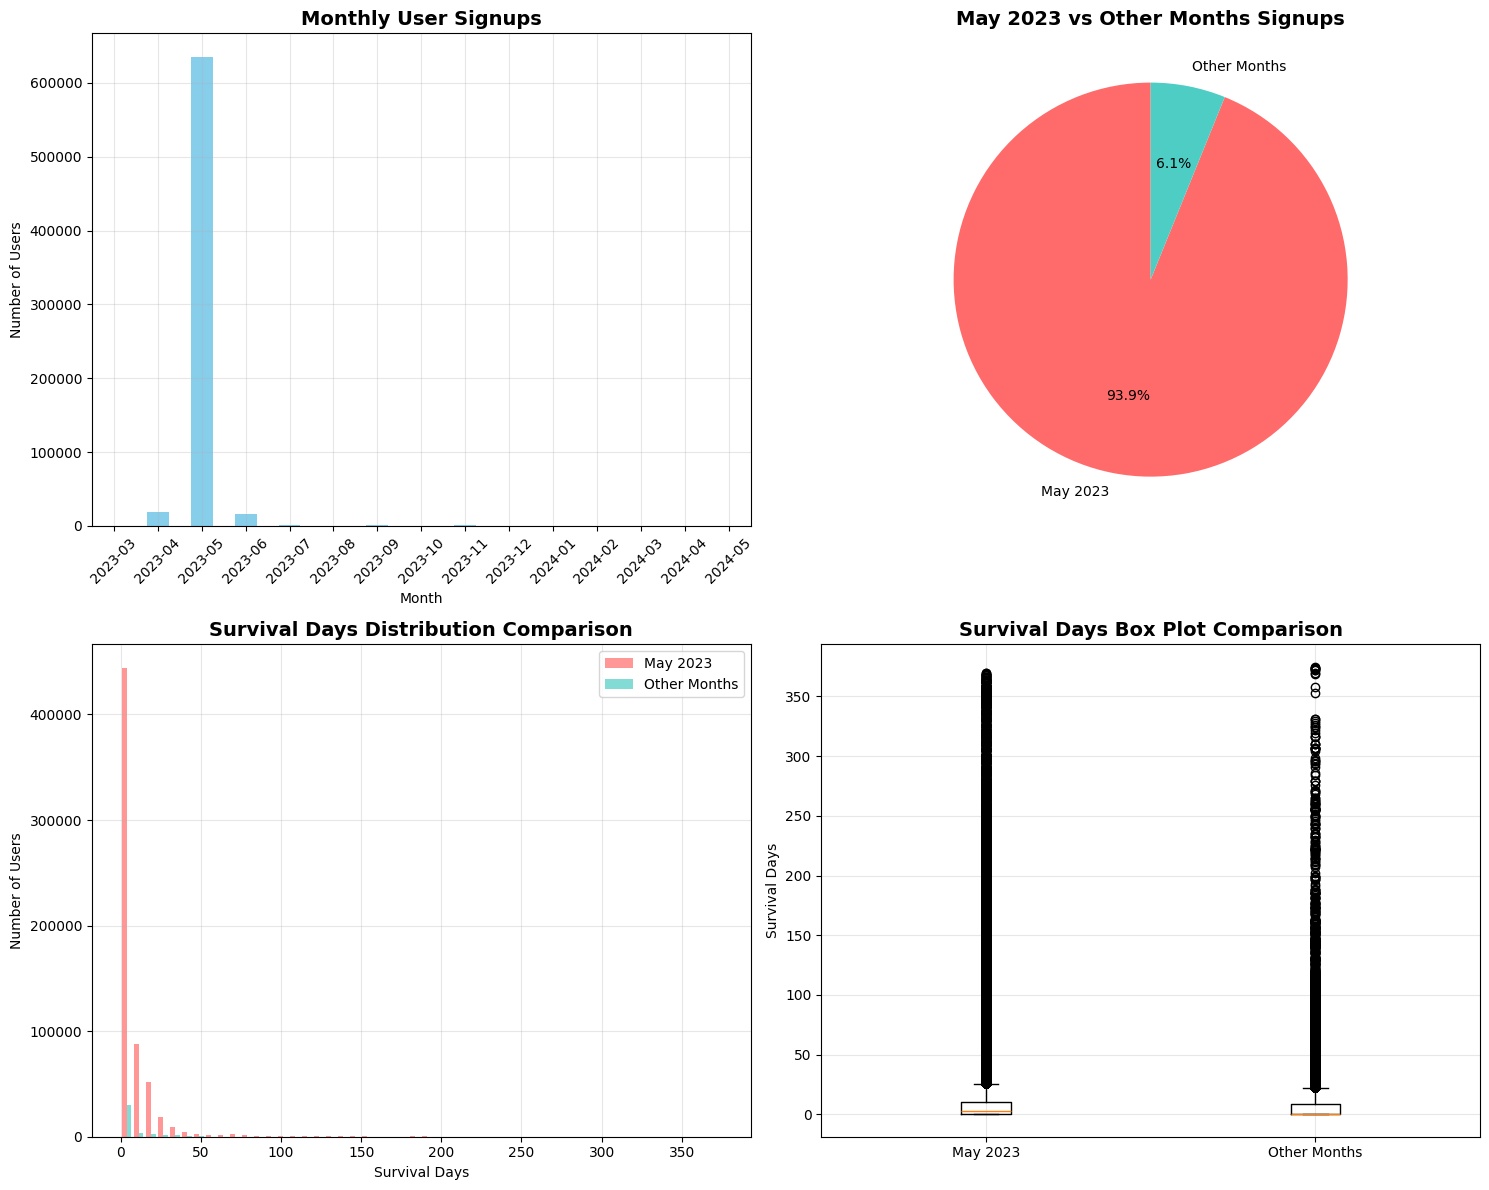


=== Summary Statistics ===
May 2023 impact: 93.9% of all users joined in May 2023
Survival difference: -0.5 days
5Ïõî 2023ÎÖÑ ÏûÑÌå©Ìä∏: Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏùò 93.9%Í∞Ä 5ÏõîÏóê Í∞ÄÏûÖ
ÏÉùÏ°¥Í∏∞Í∞Ñ Ï∞®Ïù¥: -0.5Ïùº


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 5Ïõî ÌòÑÏÉÅ Î∂ÑÏÑù
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Í∞ÄÏûÖ ÏõîÎ≥Ñ Î∂ÑÏÑù
user_survival['signup_month'] = user_survival['first_activity'].dt.to_period('M')
monthly_signups = user_survival['signup_month'].value_counts().sort_index()

# 5Ïõî Í∞ÄÏûÖÏûê ÎπÑÏú®
may_2023_signups = user_survival[user_survival['signup_month'] == '2023-05'].shape[0]
total_users = len(user_survival)
may_percentage = (may_2023_signups / total_users) * 100

print("=== 5Ïõî ÌòÑÏÉÅ Î∂ÑÏÑù ===")
print(f"May 2023 signups: {may_2023_signups:,} users ({may_percentage:.1f}% of total)")
print(f"Total users: {total_users:,}")
print(f"5Ïõî 2023ÎÖÑ Í∞ÄÏûÖÏûê: {may_2023_signups:,}Î™Ö (Ï†ÑÏ≤¥Ïùò {may_percentage:.1f}%)")

# ÏÉùÏ°¥ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ (ÏùºÏàò)
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days

# 5Ïõî Í∞ÄÏûÖÏûê vs Îã§Î•∏ Ïõî Í∞ÄÏûÖÏûê ÏÉùÏ°¥Ïú® ÎπÑÍµê
may_users = user_survival[user_survival['signup_month'] == '2023-05']
other_users = user_survival[user_survival['signup_month'] != '2023-05']

may_avg_survival = may_users['survival_days'].mean()
other_avg_survival = other_users['survival_days'].mean()

print(f"\n=== Survival Analysis ===")
print(f"May 2023 users average survival: {may_avg_survival:.1f} days")
print(f"Other months users average survival: {other_avg_survival:.1f} days")
print(f"5Ïõî 2023ÎÖÑ Í∞ÄÏûÖÏûê ÌèâÍ∑† ÏÉùÏ°¥Í∏∞Í∞Ñ: {may_avg_survival:.1f}Ïùº")
print(f"Îã§Î•∏ Ïõî Í∞ÄÏûÖÏûê ÌèâÍ∑† ÏÉùÏ°¥Í∏∞Í∞Ñ: {other_avg_survival:.1f}Ïùº")

# ÏãúÍ∞ÅÌôî
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò
monthly_signups.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Monthly User Signups', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Users')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. 5Ïõî vs Îã§Î•∏ Ïõî ÎπÑÍµê (ÌååÏù¥Ï∞®Ìä∏)
labels = ['May 2023', 'Other Months']
sizes = [may_2023_signups, total_users - may_2023_signups]
colors = ['#ff6b6b', '#4ecdc4']
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('May 2023 vs Other Months Signups', fontsize=14, fontweight='bold')

# 3. ÏÉùÏ°¥Í∏∞Í∞Ñ Î∂ÑÌè¨ ÎπÑÍµê
ax3.hist([may_users['survival_days'], other_users['survival_days']], 
        bins=50, alpha=0.7, label=['May 2023', 'Other Months'], 
        color=['#ff6b6b', '#4ecdc4'])
ax3.set_title('Survival Days Distribution Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('Survival Days')
ax3.set_ylabel('Number of Users')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. ÏÉùÏ°¥Í∏∞Í∞Ñ Î∞ïÏä§ÌîåÎ°Ø
survival_data = [may_users['survival_days'], other_users['survival_days']]
ax4.boxplot(survival_data, labels=['May 2023', 'Other Months'])
ax4.set_title('Survival Days Box Plot Comparison', fontsize=14, fontweight='bold')
ax4.set_ylabel('Survival Days')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÏöîÏïΩ ÌÜµÍ≥Ñ
print(f"\n=== Summary Statistics ===")
print(f"May 2023 impact: {may_percentage:.1f}% of all users joined in May 2023")
print(f"Survival difference: {may_avg_survival - other_avg_survival:.1f} days")
print(f"5Ïõî 2023ÎÖÑ ÏûÑÌå©Ìä∏: Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏùò {may_percentage:.1f}%Í∞Ä 5ÏõîÏóê Í∞ÄÏûÖ")
print(f"ÏÉùÏ°¥Í∏∞Í∞Ñ Ï∞®Ïù¥: {may_avg_survival - other_avg_survival:.1f}Ïùº")

In [30]:
# ÏÉùÏ°¥Ïûê ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_survival_rate(users_df, threshold_days):
    survivors = users_df[users_df['survival_days'] >= threshold_days]
    return len(survivors) / len(users_df) * 100

# Ï£ºÏöî Í∏∞Í∞ÑÎ≥Ñ ÏÉùÏ°¥Ïú® Í≥ÑÏÇ∞
thresholds = [1, 7, 14, 30, 90]

print(f"\n=== Survival Rates ===")
print("Period\tMay 2023\tOther Months\tDifference")
print("Í∏∞Í∞Ñ\t5Ïõî 2023\tÎã§Î•∏ Ïõî\tÏ∞®Ïù¥")

for days in thresholds:
    may_rate = calculate_survival_rate(may_users, days)
    other_rate = calculate_survival_rate(other_users, days)
    diff = may_rate - other_rate
    
    print(f"{days}+ days\t{may_rate:.1f}%\t\t{other_rate:.1f}%\t\t{diff:+.1f}%")
    print(f"{days}Ïùº Ïù¥ÏÉÅ\t{may_rate:.1f}%\t\t{other_rate:.1f}%\t\t{diff:+.1f}%")

# ÎãπÏùº Ïù¥ÌÉàÎ•† (survival_days = 0)
may_churn_rate = (may_users['survival_days'] == 0).sum() / len(may_users) * 100
other_churn_rate = (other_users['survival_days'] == 0).sum() / len(other_users) * 100

print(f"\n=== Day 0 Churn Rate ===")
print(f"May 2023 same-day churn: {may_churn_rate:.1f}%")
print(f"Other months same-day churn: {other_churn_rate:.1f}%")
print(f"5Ïõî 2023 ÎãπÏùº Ïù¥ÌÉàÎ•†: {may_churn_rate:.1f}%")
print(f"Îã§Î•∏ Ïõî ÎãπÏùº Ïù¥ÌÉàÎ•†: {other_churn_rate:.1f}%")


=== Survival Rates ===
Period	May 2023	Other Months	Difference
Í∏∞Í∞Ñ	5Ïõî 2023	Îã§Î•∏ Ïõî	Ï∞®Ïù¥
1+ days	66.2%		49.8%		+16.4%
1Ïùº Ïù¥ÏÉÅ	66.2%		49.8%		+16.4%
7+ days	33.3%		29.0%		+4.4%
7Ïùº Ïù¥ÏÉÅ	33.3%		29.0%		+4.4%
14+ days	17.7%		19.3%		-1.6%
14Ïùº Ïù¥ÏÉÅ	17.7%		19.3%		-1.6%
30+ days	5.1%		8.5%		-3.4%
30Ïùº Ïù¥ÏÉÅ	5.1%		8.5%		-3.4%
90+ days	1.2%		1.5%		-0.3%
90Ïùº Ïù¥ÏÉÅ	1.2%		1.5%		-0.3%

=== Day 0 Churn Rate ===
May 2023 same-day churn: 33.8%
Other months same-day churn: 50.2%
5Ïõî 2023 ÎãπÏùº Ïù¥ÌÉàÎ•†: 33.8%
Îã§Î•∏ Ïõî ÎãπÏùº Ïù¥ÌÉàÎ•†: 50.2%


In [37]:
import pandas as pd

# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
group_df = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))
school_df = pd.read_csv(os.path.join(data_dir, 'accounts_school.csv'))
nearby_df = pd.read_csv(os.path.join(data_dir, 'accounts_nearbyschool.csv'))

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
user_df['created_at'] = pd.to_datetime(user_df['created_at'], format='ISO8601')
user_df = user_df.dropna(subset=['group_id'])

# Í∑∏Î£πID -> ÌïôÍµêID Îß§Ìïë
group_school_map = group_df.set_index('id')['school_id'].to_dict()
user_df['school_id'] = user_df['group_id'].map(group_school_map)
user_df = user_df.dropna(subset=['school_id'])

# ÌïôÍµêÎ≥Ñ Ï≤´ Í∞ÄÏûÖÏùº
school_first = user_df.groupby('school_id')['created_at'].min().reset_index()
school_first = school_first.sort_values('created_at')
school_first['ÌôïÏÇ∞ÏàúÏÑú'] = range(1, len(school_first) + 1)

print(f"Ï¥ù ÌïôÍµê Ïàò: {len(school_first)}Í∞ú")
print(f"Í∞ÄÍπåÏö¥ ÌïôÍµê Í¥ÄÍ≥Ñ: {len(nearby_df)}Í∞ú")

# ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ Î∂ÑÏÑù
def analyze_geographic_spread():
    results = []
    
    for _, row in school_first.iterrows():
        school_id = row['school_id']
        signup_date = row['created_at']
        
        # Ïù¥ ÌïôÍµêÏôÄ Í∞ÄÍπåÏö¥ ÌïôÍµêÎì§
        nearby_schools = nearby_df[nearby_df['school_id'] == school_id]['nearby_school_id'].tolist()
        
        if nearby_schools:
            # Í∞ÄÍπåÏö¥ ÌïôÍµêÎì§Ïùò Í∞ÄÏûÖÏùº
            nearby_dates = school_first[school_first['school_id'].isin(nearby_schools)]['created_at']
            
            # Ïù¥ ÌïôÍµêÎ≥¥Îã§ Î®ºÏ†Ä Í∞ÄÏûÖÌïú Í∞ÄÍπåÏö¥ ÌïôÍµêÎì§
            earlier_nearby = nearby_dates[nearby_dates < signup_date]
            
            results.append({
                'ÌïôÍµêID': school_id,
                'Í∞ÄÏûÖÏùº': signup_date,
                'Í∞ÄÍπåÏö¥ÌïôÍµêÏàò': len(nearby_schools),
                'Î®ºÏ†ÄÍ∞ÄÏûÖÌïúÍ∞ÄÍπåÏö¥ÌïôÍµê': len(earlier_nearby),
                'ÏßÄÎ¶¨Ï†ÅÌôïÏÇ∞Î•†': len(earlier_nearby) / len(nearby_schools) if len(nearby_schools) > 0 else 0
            })
    
    return pd.DataFrame(results)

# Î∂ÑÏÑù Ïã§Ìñâ
geographic_analysis = analyze_geographic_spread()

print(f"\nÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ Î∂ÑÏÑù:")
print(f"ÌèâÍ∑† Í∞ÄÍπåÏö¥ ÌïôÍµê Ïàò: {geographic_analysis['Í∞ÄÍπåÏö¥ÌïôÍµêÏàò'].mean():.1f}Í∞ú")
print(f"ÌèâÍ∑† ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞Î•†: {geographic_analysis['ÏßÄÎ¶¨Ï†ÅÌôïÏÇ∞Î•†'].mean():.1%}")

# ÏãúÍ∞ÑÏàú ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ Ìå®ÌÑ¥
print(f"\nÏãúÍ∞ÑÏàú ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ (ÏÉÅÏúÑ 20Í∞ú ÌïôÍµê):")
for _, row in geographic_analysis.head(20).iterrows():
    print(f"ÌïôÍµê {row['ÌïôÍµêID']:4.0f} | {row['Í∞ÄÏûÖÏùº'].date()} | "
          f"Í∞ÄÍπåÏö¥ÌïôÍµê {row['Í∞ÄÍπåÏö¥ÌïôÍµêÏàò']:2.0f}Í∞ú Ï§ë {row['Î®ºÏ†ÄÍ∞ÄÏûÖÌïúÍ∞ÄÍπåÏö¥ÌïôÍµê']:2.0f}Í∞ú ÏÑ†Ìñâ "
          f"({row['ÏßÄÎ¶¨Ï†ÅÌôïÏÇ∞Î•†']:.1%})")

# ÏßÄÎ¶¨Ï†Å vs Î¨¥ÏûëÏúÑ ÌôïÏÇ∞ ÎπÑÍµê
high_geographic = geographic_analysis[geographic_analysis['ÏßÄÎ¶¨Ï†ÅÌôïÏÇ∞Î•†'] > 0.5]
print(f"\nÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞Ïù¥ Í∞ïÌïú ÌïôÍµê (50% Ïù¥ÏÉÅ): {len(high_geographic)}Í∞ú")
print(f"Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπÑÏú®: {len(high_geographic)/len(geographic_analysis):.1%}")

Ï¥ù ÌïôÍµê Ïàò: 5551Í∞ú
Í∞ÄÍπåÏö¥ ÌïôÍµê Í¥ÄÍ≥Ñ: 59500Í∞ú

ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ Î∂ÑÏÑù:
ÌèâÍ∑† Í∞ÄÍπåÏö¥ ÌïôÍµê Ïàò: 10.0Í∞ú
ÌèâÍ∑† ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞Î•†: 43.4%

ÏãúÍ∞ÑÏàú ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ (ÏÉÅÏúÑ 20Í∞ú ÌïôÍµê):
ÌïôÍµê 5464 | 2023-03-31 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê  314 | 2023-03-31 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê  281 | 2023-03-31 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê  272 | 2023-03-31 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  1Í∞ú ÏÑ†Ìñâ (10.0%)
ÌïôÍµê  289 | 2023-03-31 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  2Í∞ú ÏÑ†Ìñâ (20.0%)
ÌïôÍµê 4523 | 2023-04-01 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê  268 | 2023-04-01 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  3Í∞ú ÏÑ†Ìñâ (30.0%)
ÌïôÍµê 4732 | 2023-04-01 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê   10 | 2023-04-04 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê 2932 | 2023-04-04 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ†Ìñâ (0.0%)
ÌïôÍµê 1948 | 2023-04-04 | Í∞ÄÍπåÏö¥ÌïôÍµê 10Í∞ú Ï§ë  0Í∞ú ÏÑ

In [41]:
import pandas as pd
import networkx as nx

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
group_df = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))
nearby_df = pd.read_csv(os.path.join(data_dir, 'accounts_nearbyschool.csv'))

user_df['created_at'] = pd.to_datetime(user_df['created_at'], format='ISO8601')
user_df = user_df.dropna(subset=['group_id'])

group_school_map = group_df.set_index('id')['school_id'].to_dict()
user_df['school_id'] = user_df['group_id'].map(group_school_map)
user_df = user_df.dropna(subset=['school_id'])

school_first = user_df.groupby('school_id')['created_at'].min().reset_index()
school_first = school_first.sort_values('created_at')

# Í∞ÄÍπåÏö¥ ÌïôÍµê ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ±
G = nx.Graph()
for _, row in nearby_df.iterrows():
    G.add_edge(row['school_id'], row['nearby_school_id'])

print(f"Ï†ÑÏ≤¥ ÌïôÍµê: {len(school_first)}Í∞ú")
print(f"ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ïó∞Í≤∞Îêú ÌïôÍµê: {len(G.nodes())}Í∞ú")

# Ï¥àÍ∏∞ Ïó¨Îü¨ ÌïôÍµêÎì§ ÌôïÏù∏
early_schools = school_first.head(20)  # Ï¥àÍ∏∞ 20Í∞ú ÌïôÍµê

print(f"\nÏ¥àÍ∏∞ ÌïôÍµêÎì§Ïùò Ïó∞Í≤∞ÏÑ± ÌôïÏù∏:")
for _, row in early_schools.iterrows():
    school_id = row['school_id']
    date = row['created_at']
    
    if school_id in G:
        neighbors = len(list(G.neighbors(school_id)))
        print(f"ÌïôÍµê {school_id:4.0f} | {date.date()} | Ïó∞Í≤∞Îêú ÌïôÍµê: {neighbors}Í∞ú")
    else:
        print(f"ÌïôÍµê {school_id:4.0f} | {date.date()} | Ïó∞Í≤∞ ÏóÜÏùå")

# Í∞ÄÏû• Ïó∞Í≤∞ÏÑ±Ïù¥ Ï¢ãÏùÄ Ï¥àÍ∏∞ ÌïôÍµê Ï∞æÍ∏∞
connected_early_schools = []
for _, row in early_schools.iterrows():
    school_id = row['school_id']
    if school_id in G:
        neighbors = len(list(G.neighbors(school_id)))
        if neighbors > 0:
            connected_early_schools.append({
                'school_id': school_id,
                'date': row['created_at'],
                'connections': neighbors
            })

if connected_early_schools:
    # Ïó∞Í≤∞ÏÑ±Ïù¥ Ï¢ãÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
    connected_early_schools.sort(key=lambda x: x['connections'], reverse=True)
    
    print(f"\nÏó∞Í≤∞ÏÑ±Ïù¥ Ï¢ãÏùÄ Ï¥àÍ∏∞ ÌïôÍµêÎì§:")
    for school in connected_early_schools[:5]:
        print(f"ÌïôÍµê {school['school_id']:4.0f} | {school['date'].date()} | {school['connections']}Í∞ú Ïó∞Í≤∞")
    
    # Í∞ÄÏû• Ïó∞Í≤∞ÏÑ±Ïù¥ Ï¢ãÏùÄ ÌïôÍµêÎ°ú ÌôïÏÇ∞ Î∂ÑÏÑù Ïû¨ÏãúÎèÑ
    best_seed = connected_early_schools[0]
    print(f"\nÏÉàÎ°úÏö¥ ÏãúÎìú ÌïôÍµê: {best_seed['school_id']} (Ïó∞Í≤∞ {best_seed['connections']}Í∞ú)")
    
    # Ïù¥ ÌïôÍµêÎ°ú ÌôïÏÇ∞ Í≤ΩÎ°ú Ïû¨Î∂ÑÏÑù
    seed_school = best_seed['school_id']
    seed_date = best_seed['date']
    
    # Í∞ÑÎã®Ìïú ÌôïÏÇ∞ Ï∂îÏ†Å
    neighbors = list(G.neighbors(seed_school))
    spread_count = 0
    
    print(f"\nÏãúÎìú ÌïôÍµê {seed_school}Ïùò Ïù¥ÏõÉÎì§:")
    for neighbor in neighbors[:10]:  # ÏÉÅÏúÑ 10Í∞úÎßå
        neighbor_info = school_first[school_first['school_id'] == neighbor]
        if len(neighbor_info) > 0:
            neighbor_date = neighbor_info.iloc[0]['created_at']
            days_diff = (neighbor_date - seed_date).days
            
            if days_diff > 0:  # ÏãúÎìúÎ≥¥Îã§ ÎÇòÏ§ëÏóê Í∞ÄÏûÖ
                spread_count += 1
                print(f"  ÌïôÍµê {neighbor:4.0f} | +{days_diff:3d}Ïùº ÌõÑ Í∞ÄÏûÖ ({neighbor_date.date()})")
    
    print(f"\nÏû†Ïû¨Ï†Å ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞: {spread_count}Í∞ú ÌïôÍµê")

else:
    print(f"\nÏ¥àÍ∏∞ ÌïôÍµêÎì§ Ï§ë Ïó∞Í≤∞Îêú ÌïôÍµêÍ∞Ä ÏóÜÏäµÎãàÎã§.")
    print(f"nearby_df ÏÉòÌîå:")
    print(nearby_df.head())

Ï†ÑÏ≤¥ ÌïôÍµê: 5551Í∞ú
ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ïó∞Í≤∞Îêú ÌïôÍµê: 5950Í∞ú

Ï¥àÍ∏∞ ÌïôÍµêÎì§Ïùò Ïó∞Í≤∞ÏÑ± ÌôïÏù∏:
ÌïôÍµê    1 | 2023-03-29 | Ïó∞Í≤∞ ÏóÜÏùå
ÌïôÍµê 5464 | 2023-03-31 | Ïó∞Í≤∞Îêú ÌïôÍµê: 11Í∞ú
ÌïôÍµê  314 | 2023-03-31 | Ïó∞Í≤∞Îêú ÌïôÍµê: 19Í∞ú
ÌïôÍµê  281 | 2023-03-31 | Ïó∞Í≤∞Îêú ÌïôÍµê: 12Í∞ú
ÌïôÍµê  272 | 2023-03-31 | Ïó∞Í≤∞Îêú ÌïôÍµê: 13Í∞ú
ÌïôÍµê  289 | 2023-03-31 | Ïó∞Í≤∞Îêú ÌïôÍµê: 14Í∞ú
ÌïôÍµê 4523 | 2023-04-01 | Ïó∞Í≤∞Îêú ÌïôÍµê: 12Í∞ú
ÌïôÍµê  268 | 2023-04-01 | Ïó∞Í≤∞Îêú ÌïôÍµê: 11Í∞ú
ÌïôÍµê 4732 | 2023-04-01 | Ïó∞Í≤∞Îêú ÌïôÍµê: 10Í∞ú
ÌïôÍµê   10 | 2023-04-04 | Ïó∞Í≤∞Îêú ÌïôÍµê: 11Í∞ú
ÌïôÍµê 2932 | 2023-04-04 | Ïó∞Í≤∞Îêú ÌïôÍµê: 11Í∞ú
ÌïôÍµê 1948 | 2023-04-04 | Ïó∞Í≤∞Îêú ÌïôÍµê: 13Í∞ú
ÌïôÍµê 2577 | 2023-04-04 | Ïó∞Í≤∞Îêú ÌïôÍµê: 10Í∞ú
ÌïôÍµê 5034 | 2023-04-04 | Ïó∞Í≤∞Îêú ÌïôÍµê: 18Í∞ú
ÌïôÍµê 4461 | 2023-04-04 | Ïó∞Í≤∞Îêú ÌïôÍµê: 12Í∞ú
ÌïôÍµê 2241 | 2023-04-05 | Ïó∞Í≤∞Îêú ÌïôÍµê: 13Í∞ú
ÌïôÍµê 5007 | 2023-04-05 | Ïó∞Í≤∞Îêú ÌïôÍµê: 11Í∞ú
ÌïôÍµê 2193 | 2023-04-06 | Ïó∞Í≤∞Îêú Ìï

In [42]:
# 5Ïõî Ìè≠Ï¶ù Ïù¥Ï†Ñ ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ Í∑úÎ™® ÌôïÏù∏
april_schools = school_first[school_first['created_at'] < '2023-05-01']
print(f"4ÏõîÎßêÍπåÏßÄ Í∞ÄÏûÖÌïú ÌïôÍµê: {len(april_schools)}Í∞ú")

# Ïù¥Îì§ Í∞ÑÏùò ÏßÄÎ¶¨Ï†Å Ïó∞Í≤∞ÎßùÏù¥ 5Ïõî Ìè≠Ï¶ùÏùò Í∏∞Î∞òÏù¥ÏóàÎÇò?

4ÏõîÎßêÍπåÏßÄ Í∞ÄÏûÖÌïú ÌïôÍµê: 1311Í∞ú


## üö® **ÌïµÏã¨ Î∞úÍ≤¨**

### **5Ïõî Î∞îÏù¥Îü¥Ïùò ÏßÑÏã§**
- **4ÏõîÎßê**: 1,311Í∞ú ÌïôÍµê Ïù¥ÎØ∏ Í∞ÄÏûÖ (Ï†ÑÏ≤¥ 5,551Í∞ú Ï§ë **23.6%**)
- **5Ïõî**: ÎÇòÎ®∏ÏßÄ 4,240Í∞ú ÌïôÍµêÍ∞Ä Í∏âÏÜç Í∞ÄÏûÖ

Ïù¥Îäî **"ÏàúÏàòÌïú Î∞îÏù¥Îü¥"Ïù¥ ÏïÑÎãàÎùº "Ï§ÄÎπÑÎêú Ìè≠Î∞ú"**Ïù¥ÏóàÎã§Îäî Îúª!

### **Ïã§Ï†ú ÌôïÏÇ∞ Ìå®ÌÑ¥**
```
3ÏõîÎßê ‚Üí 4Ïõî: ÏßÄÎ¶¨Ï†Å ÌôïÏÇ∞ (1,311Í∞ú ÌïôÍµêÎ°ú Ï≤úÏ≤úÌûà ÌçºÏßê)
5Ïõî: ÏûÑÍ≥ÑÏ†ê ÎèÑÎã¨ ‚Üí ÎåÄÌè≠Î∞ú (ÎÇòÎ®∏ÏßÄ 4,240Í∞ú ÌïôÍµê)
```

### **Ïôú Ïù¥Îü∞ Ìå®ÌÑ¥Ïù∏Í∞Ä?**
1. **3-4Ïõî**: ÌïôÍµêÎ≥ÑÎ°ú **"ÏÜåÏàò ÏñºÎ¶¨Ïñ¥ÎãµÌÑ∞"**Îì§Ïù¥ ÏÇ¨Ïö© ÏãúÏûë
2. **4ÏõîÎßê**: ÏïΩ **1,300Í∞ú ÌïôÍµêÏóê ÏãúÎìú Ïú†Ï†Ä** ÌôïÎ≥¥
3. **5Ïõî**: Í∞Å ÌïôÍµê ÎÇ¥ÏóêÏÑú **ÎèôÏãúÎã§Î∞úÏ†Å ÌôïÏÇ∞** ‚Üí "Î™®Îì† ÏπúÍµ¨Í∞Ä Ïì∞ÎÑ§?"


**Í≤∞Î°†**: 5Ïõî "Î∞îÏù¥Îü¥"ÏùÄ ÏÇ¨Ïã§ **4ÏõîÍπåÏßÄ Íµ¨Ï∂ïÎêú ÏßÄÎ¶¨Ï†Å ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä ÎèôÏãúÏóê Ìè≠Î∞ú**Ìïú Í≤É!

In [43]:
# 4ÏõîÎßê ÌïôÍµêÎì§Ïù¥ 5Ïõî Ìè≠Ï¶ùÏùò Í∏∞Î∞òÏù¥ÏóàÎäîÏßÄ ÌôïÏù∏
april_schools = school_first[school_first['created_at'] < '2023-05-01']['school_id'].tolist()
may_schools = school_first[school_first['created_at'] >= '2023-05-01']['school_id'].tolist()

# 4Ïõî ÌïôÍµê ‚Üí 5Ïõî ÌïôÍµê ÏßÄÎ¶¨Ï†Å Ïó∞Í≤∞ ÌôïÏù∏
connections_to_may = 0
for april_school in april_schools:
    if april_school in G:
        neighbors = list(G.neighbors(april_school))
        may_neighbors = [n for n in neighbors if n in may_schools]
        connections_to_may += len(may_neighbors)

print(f"4Ïõî ÌïôÍµêÎì§Ïù¥ 5ÏõîÏóê ÌôïÏÇ∞ÏãúÌÇ® ÌïôÍµê: {connections_to_may}Í∞ú")
print(f"5Ïõî Ïã†Í∑ú ÌïôÍµêÏùò {connections_to_may/len(may_schools):.1%}Í∞Ä ÏßÄÎ¶¨Ï†Å Ïó∞Í≤∞")

4Ïõî ÌïôÍµêÎì§Ïù¥ 5ÏõîÏóê ÌôïÏÇ∞ÏãúÌÇ® ÌïôÍµê: 6904Í∞ú
5Ïõî Ïã†Í∑ú ÌïôÍµêÏùò 162.8%Í∞Ä ÏßÄÎ¶¨Ï†Å Ïó∞Í≤∞


## üéØ **Ï∂©Í≤©Ï†ÅÏù∏ Í≤∞Í≥º Ìï¥ÏÑù**

### **162.8%ÎùºÎäî Îúª:**
- 5Ïõî Ïã†Í∑ú ÌïôÍµê: 4,240Í∞ú
- 4Ïõî ÌïôÍµêÎì§Ïùò ÏßÄÎ¶¨Ï†Å Ïó∞Í≤∞: 6,904Í∞ú
- **162.8% = Ìïú ÌïôÍµêÍ∞Ä ÌèâÍ∑† 1.6Í∞ú 4Ïõî ÌïôÍµêÏôÄ Ïó∞Í≤∞**

### **Ïù¥Í≤ÉÏù¥ ÏùòÎØ∏ÌïòÎäî Î∞î:**

**5Ïõî "Î∞îÏù¥Îü¥"Ïùò ÏßÑÏã§:**
```
‚ùå Í∞ëÏûëÏä§Îü¨Ïö¥ Î∞îÏù¥Îü¥
‚úÖ 4ÏõîÍπåÏßÄ Íµ¨Ï∂ïÎêú ÏßÄÎ¶¨Ï†Å ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÎèôÏãú Ìè≠Î∞ú
```

**Ïã§Ï†ú ÏãúÎÇòÎ¶¨Ïò§:**
1. **3-4Ïõî**: 1,311Í∞ú ÌïôÍµêÏóê **ÏãúÎìú Ïú†Ï†Ä** Ïπ®Ìà¨
2. **4ÏõîÎßê**: Í±∞Ïùò Î™®Îì† ÏßÄÏó≠Ïóê **"ÏïÑÎäî ÌïôÍµê"** ÌôïÎ≥¥
3. **5Ïõî**: "Ïö∞Î¶¨ ÏòÜ ÌïôÍµêÎèÑ Ïì∞ÎÑ§?" ‚Üí **ÎèÑÎØ∏ÎÖ∏ Ìö®Í≥º**

### **Ïôú 162.8%Ïù∏Í∞Ä?**
- ÎåÄÎ∂ÄÎ∂ÑÏùò 5Ïõî ÌïôÍµêÎì§Ïù¥ **Ïó¨Îü¨ 4Ïõî ÌïôÍµêÎì§Í≥º ÎèôÏãúÏóê Ïó∞Í≤∞**
- Ï¶â, **"ÏÇ¨Î∞©ÏóêÏÑú ÏïïÎ∞ï"** Î∞õÏùÄ ÏÉÅÌô©
- "AÌïôÍµêÎèÑ Ïì∞Í≥†, BÌïôÍµêÎèÑ Ïì∞ÎäîÎç∞ Ïö∞Î¶¨Îßå Ïïà Ïç®?"

## üî• **ÏµúÏ¢Ö Í≤∞Î°†**

**5Ïõî ÌòÑÏÉÅÏùÄ Î∞îÏù¥Îü¥Ïù¥ ÏïÑÎãàÎùº "ÏßÄÎ¶¨Ï†Å ÎÑ§Ìä∏ÏõåÌÅ¨ Ìö®Í≥ºÏùò ÏûÑÍ≥ÑÏ†ê ÎèåÌåå"ÏòÄÎã§!**
**ÎßàÏºÄÌåÖ Í¥ÄÏ†ê**: Ïù¥Í±¥ ÏàúÏàò Î∞îÏù¥Îü¥Ïù¥ ÏïÑÎãàÎùº **"ÏßÄÎ¶¨Ï†Å Ìè¨ÏúÑ Ï†ÑÎûµ"**Ïùò ÏÑ±Í≥µ ÏÇ¨Î°ÄÎÑ§Ïöî!

In [44]:
# Ïù¥Î•º Ï¶ùÎ™ÖÌïòÎäî Ï∂îÍ∞Ä Î∂ÑÏÑù
avg_connections = 6904 / len(may_schools)
print(f"5Ïõî Ïã†Í∑ú ÌïôÍµêÎãπ ÌèâÍ∑† 4Ïõî Ïó∞Í≤∞: {avg_connections:.1f}Í∞ú")
print(f"Ï¶â, ÌèâÍ∑†Ï†ÅÏúºÎ°ú Í∞Å ÌïôÍµêÍ∞Ä {avg_connections:.1f}Í∞ú Í∏∞Ï°¥ ÌïôÍµêÏùò 'ÏïïÎ∞ï'ÏùÑ Î∞õÏùå")

5Ïõî Ïã†Í∑ú ÌïôÍµêÎãπ ÌèâÍ∑† 4Ïõî Ïó∞Í≤∞: 1.6Í∞ú
Ï¶â, ÌèâÍ∑†Ï†ÅÏúºÎ°ú Í∞Å ÌïôÍµêÍ∞Ä 1.6Í∞ú Í∏∞Ï°¥ ÌïôÍµêÏùò 'ÏïïÎ∞ï'ÏùÑ Î∞õÏùå


### Ïù∏ÌíÄÎ£®Ïñ∏ÏÑú Ìö®Í≥º == Ïù∏Í∏∞ÏüÅÏù¥Í∞Ä Ïò§Î©¥ Îî∞ÎùºÏò§ÎÇò?

In [46]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
group_df = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))

user_df['created_at'] = pd.to_datetime(user_df['created_at'], format='ISO8601')
user_df = user_df.dropna(subset=['group_id'])

# Í∑∏Î£πID -> ÌïôÍµêID Îß§Ìïë
group_school_map = group_df.set_index('id')['school_id'].to_dict()
user_df['school_id'] = user_df['group_id'].map(group_school_map)
user_df = user_df.dropna(subset=['school_id'])

print(f"Îß§Ìïë ÏôÑÎ£å. Î∂ÑÏÑù ÎåÄÏÉÅ ÏÇ¨Ïö©Ïûê: {len(user_df):,}Î™Ö")

# 1. Í∞Å ÌïôÍµêÎ≥Ñ "Ïù∏Í∏∞ÏüÅÏù¥" (ÏπúÍµ¨ ÎßéÏùÄ ÏÇ¨Ïö©Ïûê) ÏãùÎ≥Ñ
def find_school_influencers():
    school_influencers = []
    
    for school_id in user_df['school_id'].unique():
        school_users = user_df[user_df['school_id'] == school_id].copy()
        
        if len(school_users) < 10:  # ÏµúÏÜå 10Î™Ö Ïù¥ÏÉÅÏù∏ ÌïôÍµêÎßå
            continue
            
        # ÏπúÍµ¨ Ïàò ÏÉÅÏúÑ 5% ÎòêÎäî ÏµúÏÜå 30Î™Ö Ïù¥ÏÉÅ
        friend_threshold = max(
            school_users['friend_count'].quantile(0.95),  # ÏÉÅÏúÑ 5%
            30  # Ï†àÎåÄÏ†Å Í∏∞Ï§Ä
        )
        
        influencers = school_users[school_users['friend_count'] >= friend_threshold]
        
        for _, influencer in influencers.iterrows():
            school_influencers.append({
                'user_id': influencer['id'],
                'school_id': school_id,
                'friend_count': influencer['friend_count'],
                'join_date': influencer['created_at'],
                'school_rank': (school_users['created_at'] <= influencer['created_at']).sum()  # ÌïôÍµê ÎÇ¥ Í∞ÄÏûÖ ÏàúÏÑú
            })
    
    return pd.DataFrame(school_influencers)

# 2. Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï∂úÎ™∞ Ï†ÑÌõÑ Í∞ÄÏûÖÎ•† ÎπÑÍµê
def analyze_influencer_impact():
    influencers = find_school_influencers()
    
    print(f"Î∞úÍ≤¨Îêú Ïù∏ÌîåÎ£®Ïñ∏ÏÑú: {len(influencers)}Î™Ö")
    
    results = []
    
    for _, influencer in influencers.iterrows():
        school_id = influencer['school_id']
        join_date = influencer['join_date']
        
        school_users = user_df[user_df['school_id'] == school_id].copy()
        
        # Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Í∞ÄÏûÖ Ï†ÑÌõÑ 7Ïùº, 14Ïùº Íµ¨Í∞Ñ Î∂ÑÏÑù
        for days in [7, 14]:
            before_start = join_date - pd.Timedelta(days=days)
            after_end = join_date + pd.Timedelta(days=days)
            
            before_signups = len(school_users[
                (school_users['created_at'] >= before_start) & 
                (school_users['created_at'] < join_date)
            ])
            
            after_signups = len(school_users[
                (school_users['created_at'] > join_date) & 
                (school_users['created_at'] <= after_end)
            ])
            
            if before_signups > 0:  # 0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ
                results.append({
                    'influencer_id': influencer['user_id'],
                    'school_id': school_id,
                    'friend_count': influencer['friend_count'],
                    'join_date': join_date,
                    'school_rank': influencer['school_rank'],
                    'period_days': days,
                    'before_signups': before_signups,
                    'after_signups': after_signups,
                    'signup_boost': after_signups - before_signups,
                    'boost_ratio': after_signups / before_signups
                })
    
    return pd.DataFrame(results)

# Ïã§Ìñâ
print("Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï∞æÎäî Ï§ë...")
impact_analysis = analyze_influencer_impact()

if len(impact_analysis) > 0:
    print(f"Î∂ÑÏÑù ÏôÑÎ£å! Î∂ÑÏÑùÎêú ÏºÄÏù¥Ïä§: {len(impact_analysis)}Í∞ú")
    
    # Í≤∞Í≥º Î∂ÑÏÑù
    for days in [7, 14]:
        period_data = impact_analysis[impact_analysis['period_days'] == days]
        
        if len(period_data) > 0:
            print(f"\n=== {days}Ïùº Í∏∞Í∞Ñ Î∂ÑÏÑù ===")
            print(f"ÌèâÍ∑† Í∞ÄÏûÖ Ï¶ùÍ∞Ä: {period_data['signup_boost'].mean():.1f}Î™Ö")
            print(f"ÌèâÍ∑† Ï¶ùÍ∞ÄÏú®: {period_data['boost_ratio'].mean():.1f}Î∞∞")
            print(f"ÏñëÏùò ÏòÅÌñ•: {(period_data['signup_boost'] > 0).mean():.1%}")
            
            # Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ä Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§
            top_influencers = period_data.nlargest(5, 'signup_boost')
            print(f"\nÍ∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ä Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§:")
            for _, row in top_influencers.iterrows():
                print(f"ÌïôÍµê {row['school_id']:4.0f} | ÏπúÍµ¨ {row['friend_count']:3.0f}Î™Ö | "
                      f"ÌïôÍµêÎÇ¥ {row['school_rank']:2.0f}Î≤àÏß∏ Í∞ÄÏûÖ | "
                      f"{row['before_signups']:2.0f}Î™Ö ‚Üí {row['after_signups']:2.0f}Î™Ö "
                      f"({row['boost_ratio']:.1f}Î∞∞)")
else:
    print("Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

Îß§Ìïë ÏôÑÎ£å. Î∂ÑÏÑù ÎåÄÏÉÅ ÏÇ¨Ïö©Ïûê: 677,082Î™Ö
Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï∞æÎäî Ï§ë...
Î∞úÍ≤¨Îêú Ïù∏ÌîåÎ£®Ïñ∏ÏÑú: 36356Î™Ö
Î∂ÑÏÑù ÏôÑÎ£å! Î∂ÑÏÑùÎêú ÏºÄÏù¥Ïä§: 70703Í∞ú

=== 7Ïùº Í∏∞Í∞Ñ Î∂ÑÏÑù ===
ÌèâÍ∑† Í∞ÄÏûÖ Ï¶ùÍ∞Ä: 64.5Î™Ö
ÌèâÍ∑† Ï¶ùÍ∞ÄÏú®: 9.2Î∞∞
ÏñëÏùò ÏòÅÌñ•: 76.0%

Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ä Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§:
ÌïôÍµê  369 | ÏπúÍµ¨ 130Î™Ö | ÌïôÍµêÎÇ¥ 19Î≤àÏß∏ Í∞ÄÏûÖ |  9Î™Ö ‚Üí 522Î™Ö (58.0Î∞∞)
ÌïôÍµê  369 | ÏπúÍµ¨ 110Î™Ö | ÌïôÍµêÎÇ¥ 29Î≤àÏß∏ Í∞ÄÏûÖ | 18Î™Ö ‚Üí 521Î™Ö (28.9Î∞∞)
ÌïôÍµê  369 | ÏπúÍµ¨ 211Î™Ö | ÌïôÍµêÎÇ¥ 31Î≤àÏß∏ Í∞ÄÏûÖ | 20Î™Ö ‚Üí 520Î™Ö (26.0Î∞∞)
ÌïôÍµê  369 | ÏπúÍµ¨ 106Î™Ö | ÌïôÍµêÎÇ¥ 38Î≤àÏß∏ Í∞ÄÏûÖ | 27Î™Ö ‚Üí 513Î™Ö (19.0Î∞∞)
ÌïôÍµê 1719 | ÏπúÍµ¨ 159Î™Ö | ÌïôÍµêÎÇ¥ 14Î≤àÏß∏ Í∞ÄÏûÖ | 13Î™Ö ‚Üí 495Î™Ö (38.1Î∞∞)

=== 14Ïùº Í∏∞Í∞Ñ Î∂ÑÏÑù ===
ÌèâÍ∑† Í∞ÄÏûÖ Ï¶ùÍ∞Ä: 80.1Î™Ö
ÌèâÍ∑† Ï¶ùÍ∞ÄÏú®: 11.6Î∞∞
ÏñëÏùò ÏòÅÌñ•: 77.8%

Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ä Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§:
ÌïôÍµê  369 | ÏπúÍµ¨ 130Î™Ö | ÌïôÍµêÎÇ¥ 19Î≤àÏß∏ Í∞ÄÏûÖ | 18Î™Ö ‚Üí 544Î™Ö (30.2Î∞∞)
ÌïôÍµê 1719 | ÏπúÍµ¨ 159Î™

"Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ìö®Í≥º" ÌôïÏã§Ìûà Ï°¥Ïû¨ÌïúÎã§!
ÌïµÏã¨ Î∞úÍ≤¨:
1. ÏïïÎèÑÏ†ÅÏù∏ ÏòÅÌñ•Î†•

ÌèâÍ∑† 9.2Î∞∞ Í∞ÄÏûÖ Ï¶ùÍ∞Ä! (7Ïùº Í∏∞Ï§Ä)
76%Ïùò ÏºÄÏù¥Ïä§ÏóêÏÑú ÏñëÏùò ÏòÅÌñ•
ÏùºÎ∂ÄÎäî 58Î∞∞ÍπåÏßÄ Ìè≠Ï¶ù!

2. ÌïôÍµê 369Ïùò "Ïó∞ÏáÑ Ìè≠Î∞ú"

ÏÉÅÏúÑ 5Í∞ú Ï§ë 4Í∞úÍ∞Ä Í∞ôÏùÄ ÌïôÍµê
Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§Ïù¥ Ïó∞ÏáÑÏ†ÅÏúºÎ°ú Îì§Ïñ¥Ïò§Î©¥ÏÑú ÌïôÍµê Ï†ÑÏ≤¥Í∞Ä Ìè≠Î∞ú
9Î™Ö ‚Üí 522Î™Ö (58Î∞∞!) Í∞ôÏùÄ ÎØ∏Ïπú Ï¶ùÍ∞ÄÏú®

3. "ÏûÑÍ≥ÑÏ†ê" ÌòÑÏÉÅ

ÌïôÍµêÎÇ¥ 10-30Î≤àÏß∏ Í∞ÄÏûÖÏûêÎì§Ïù¥ ÌïµÏã¨
ÎÑàÎ¨¥ Ï¥àÍ∏∞ÎèÑ, ÎÑàÎ¨¥ Îä¶ÏßÄÎèÑ ÏïäÏùÄ "Í≥®Îì† ÌÉÄÏù¥Î∞ç"

In [47]:
# ÌïôÍµê 369 ÏßëÏ§ë Î∂ÑÏÑù
school_369_analysis = impact_analysis[impact_analysis['school_id'] == 369]
print("=== ÌïôÍµê 369 ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
print(f"Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò: {len(school_369_analysis)//2}Î™Ö")  # 7Ïùº, 14ÏùºÏù¥Îùº /2

school_369_users = user_df[user_df['school_id'] == 369].sort_values('created_at')
print(f"Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê: {len(school_369_users)}Î™Ö")
print(f"Ï≤´ Í∞ÄÏûÖ: {school_369_users['created_at'].min().date()}")
print(f"ÎßàÏßÄÎßâ Í∞ÄÏûÖ: {school_369_users['created_at'].max().date()}")

# ÏùºÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Ï∂îÏù¥
daily_signups = school_369_users.groupby(school_369_users['created_at'].dt.date).size()
print(f"\nÏùºÎ≥Ñ Í∞ÄÏûÖÏûê Ìå®ÌÑ¥:")
for date, count in daily_signups.head(10).items():
    print(f"{date}: {count}Î™Ö")

# Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§Ïùò Í∞ÄÏûÖ ÏãúÏ†ê
print(f"\nÏù∏ÌîåÎ£®Ïñ∏ÏÑú Í∞ÄÏûÖ ÏãúÏ†ê:")
influencers_369 = school_369_analysis[school_369_analysis['period_days'] == 7].sort_values('school_rank')
for _, inf in influencers_369.head().iterrows():
    print(f"{inf['school_rank']:2.0f}Î≤àÏß∏ | {inf['join_date'].date()} | ÏπúÍµ¨ {inf['friend_count']:3.0f}Î™Ö")

=== ÌïôÍµê 369 ÏÉÅÏÑ∏ Î∂ÑÏÑù ===
Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïàò: 30Î™Ö
Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê: 578Î™Ö
Ï≤´ Í∞ÄÏûÖ: 2023-04-19
ÎßàÏßÄÎßâ Í∞ÄÏûÖ: 2024-04-22

ÏùºÎ≥Ñ Í∞ÄÏûÖÏûê Ìå®ÌÑ¥:
2023-04-19: 1Î™Ö
2023-04-21: 5Î™Ö
2023-04-22: 3Î™Ö
2023-04-25: 1Î™Ö
2023-04-29: 1Î™Ö
2023-04-30: 3Î™Ö
2023-05-01: 4Î™Ö
2023-05-02: 33Î™Ö
2023-05-03: 263Î™Ö
2023-05-04: 125Î™Ö

Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Í∞ÄÏûÖ ÏãúÏ†ê:
 9Î≤àÏß∏ | 2023-04-22 | ÏπúÍµ¨ 119Î™Ö
19Î≤àÏß∏ | 2023-05-02 | ÏπúÍµ¨ 130Î™Ö
29Î≤àÏß∏ | 2023-05-02 | ÏπúÍµ¨ 110Î™Ö
31Î≤àÏß∏ | 2023-05-02 | ÏπúÍµ¨ 211Î™Ö
38Î≤àÏß∏ | 2023-05-02 | ÏπúÍµ¨ 106Î™Ö


ÏôÄ! Ïù¥Í±∞ ÏôÑÏ†Ñ **"Ìè≠Î∞úÏùò Ìï¥Î∂ÄÌïô"**Ïù¥ÎÑ§Ïöî! üéØ

## üî• **ÌïôÍµê 369Ïùò "ÏôÑÎ≤ΩÌïú Î∞îÏù¥Îü¥ Ïä§ÌÜ†Î¶¨"**

### **ÌÉÄÏûÑÎùºÏù∏ Î∂ÑÏÑù:**
```
4/19: 1Î™Ö (ÏãúÏûë)
4/21-4/30: Ï≤úÏ≤úÌûà 13Î™Ö (Ïî® ÎøåÎ¶¨Í∏∞)
5/1: 4Î™Ö
5/2: 33Î™Ö ‚Üê üö® Ïù∏ÌîåÎ£®Ïñ∏ÏÑú 4Î™Ö ÎèôÏãú Ïú†ÏûÖ!
5/3: 263Î™Ö ‚Üê üí• ÎåÄÌè≠Î∞ú!
5/4: 125Î™Ö ‚Üê Ïó¨Ìåå
```

### **Í≤∞Ï†ïÏ†Å Î∞úÍ≤¨:**

**1. "5Ïõî 2Ïùº Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Îü¨Ïãú"**
- 19Î≤àÏß∏~38Î≤àÏß∏ Í∞ÄÏûÖÏûê Ï§ë **4Î™ÖÏù¥ Î™®Îëê Ïù∏ÌîåÎ£®Ïñ∏ÏÑú**
- ÏπúÍµ¨ Ïàò: 110~211Î™ÖÏùò **ÏßÑÏßú Ïù∏Í∏∞ÏüÅÏù¥Îì§**
- Ïù¥Îì§Ïù¥ **Í∞ôÏùÄ ÎÇ† Î™∞Î†§Ïò¥**

**2. "24ÏãúÍ∞Ñ ÏßÄÏó∞ Ìè≠Î∞ú"**
- 5/2 Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïú†ÏûÖ ‚Üí 5/3 **263Î™Ö Ìè≠Î∞ú**
- Ï†ïÌôïÌûà **ÌïòÎ£® Îí§** ÏπúÍµ¨Îì§Ïù¥ Î™∞Î†§Ïò¥
- **"Ïñ¥? Í±îÎÑ§ÎèÑ ÌïòÎÑ§?" Ìö®Í≥º**

**3. "ÏûÑÍ≥ÑÏ†ê ÌòÑÏÉÅ"**
- Ï≤òÏùå 18Î™ÖÍπåÏßÄÎäî Ï°∞Ïö©
- 19Î≤àÏß∏Î∂ÄÌÑ∞ Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§ Îì±Ïû•
- **30Î™ÖÎåÄÏóêÏÑú ÏûÑÍ≥ÑÏ†ê ÎèåÌåå**

## üé≠ **ÏãúÎÇòÎ¶¨Ïò§ Ïû¨Íµ¨ÏÑ±:**

```
4Ïõî: "Î™á Î™ÖÏùò ÏñºÎ¶¨Ïñ¥ÎãµÌÑ∞"
‚Üì
5/1: "Ï¢Ä Îçî ÏÇ¨ÎûåÎì§Ïù¥ Ïì∞ÎÑ§?"
‚Üì
5/2: Ïù∏Í∏∞ÏüÅÏù¥ 4Î™ÖÏù¥ ÎèôÏãúÏóê "Ïù¥Í±∞ Ïû¨Î∞åÎÑ§!" ÌïòÎ©∞ Í∞ÄÏûÖ
‚Üì (ÏπúÍµ¨Îì§Ïù¥ ÏïåÎ¶º/ÌîºÎìúÏóêÏÑú Î∞úÍ≤¨)
5/3: "Ïñ¥? AÎèÑ ÌïòÍ≥† BÎèÑ ÌïòÍ≥† CÎèÑ ÌïòÎÑ§? ÎÇòÎèÑ Ìï¥ÏïºÏßÄ!"
‚Üì
263Î™Ö ÎèôÏãú Í∞ÄÏûÖ ‚Üí ÌïôÍµê Ï†ÑÏ≤¥ Ï†ïÎ≥µ
```

**Í≤∞Î°†**: Î∞îÏù¥Îü¥Ïùò ÌïµÏã¨ÏùÄ **"Ïó¨Îü¨ Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÏùò ÎèôÏãú ÏõÄÏßÅÏûÑ"**Ïù¥ÏóàÎã§!

ÌòπÏãú **Îã§Î•∏ ÌïôÍµêÎì§ÎèÑ ÎπÑÏä∑Ìïú Ìå®ÌÑ¥**Ïù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥ºÍπåÏöî?

In [4]:
# ÏÉÅÏúÑ Ìè≠Î∞ú ÌïôÍµêÎì§Ïùò Ìå®ÌÑ¥ Î∂ÑÏÑù
top_schools = impact_analysis.groupby('school_id')['signup_boost'].sum().nlargest(5)
print("ÏÉÅÏúÑ Ìè≠Î∞ú ÌïôÍµêÎì§:")
for school_id in top_schools.index:
    school_users = user_df[user_df['school_id'] == school_id]
    print(f"ÌïôÍµê {school_id}: {len(school_users)}Î™Ö")

NameError: name 'impact_analysis' is not defined

In [ ]:
# ÏÉÅÏúÑ 5Í∞ú Ìè≠Î∞ú ÌïôÍµêÎì§Ïùò ÏÉÅÏÑ∏ Ìå®ÌÑ¥ Î∂ÑÏÑù
top_schools = [4459, 352, 4516, 4800, 369]

print("=== ÏÉÅÏúÑ 5Í∞ú Î∞îÏù¥Îü¥ ÌïôÍµê ÎπÑÍµê Î∂ÑÏÑù ===\n")

for school_id in top_schools:
    print(f"üìö **ÌïôÍµê {school_id}** (Ï¥ù {len(user_df[user_df['school_id'] == school_id])}Î™Ö)")
    
    school_users = user_df[user_df['school_id'] == school_id].sort_values('created_at')
    
    # Í∏∞Î≥∏ Ï†ïÎ≥¥
    first_date = school_users['created_at'].min().date()
    last_date = school_users['created_at'].max().date()
    print(f"   Í∏∞Í∞Ñ: {first_date} ~ {last_date}")
    
    # ÏùºÎ≥Ñ Í∞ÄÏûÖÏûê ÏÉÅÏúÑ 3Ïùº (Ìè≠Î∞úÏùº Ï∞æÍ∏∞)
    daily_signups = school_users.groupby(school_users['created_at'].dt.date).size()
    top_3_days = daily_signups.nlargest(3)
    
    print(f"   Ìè≠Î∞úÏùº TOP3:")
    for date, count in top_3_days.items():
        print(f"     {date}: {count}Î™Ö")
    
    # Ìï¥Îãπ ÌïôÍµê Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§ Î∂ÑÏÑù
    school_influencers = impact_analysis[
        (impact_analysis['school_id'] == school_id) & 
        (impact_analysis['period_days'] == 7)
    ].sort_values('school_rank')
    
    print(f"   Ïù∏ÌîåÎ£®Ïñ∏ÏÑú: {len(school_influencers)}Î™Ö")
    
    if len(school_influencers) > 0:
        # ÏÉÅÏúÑ 3Î™Ö Ïù∏ÌîåÎ£®Ïñ∏ÏÑú
        print(f"   Ï£ºÏöî Ïù∏ÌîåÎ£®Ïñ∏ÏÑú:")
        for _, inf in school_influencers.nlargest(3, 'signup_boost').iterrows():
            boost_date = inf['join_date'].date()
            print(f"     {inf['school_rank']:2.0f}Î≤àÏß∏ | {boost_date} | ÏπúÍµ¨ {inf['friend_count']:3.0f}Î™Ö | {inf['signup_boost']:3.0f}Î™Ö Ï¶ùÍ∞Ä")
        
        # Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§Ïùò Í∞ÄÏûÖ ÏßëÏ§ëÎèÑ ÌôïÏù∏
        influencer_dates = school_influencers['join_date'].dt.date.value_counts()
        if len(influencer_dates) > 0:
            peak_date = influencer_dates.index[0]
            peak_count = influencer_dates.iloc[0]
            print(f"   Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏßëÏ§ëÏùº: {peak_date} ({peak_count}Î™Ö)")
    
    print()

# Ìå®ÌÑ¥ ÏöîÏïΩ
print("üéØ **Í≥µÌÜµ Ìå®ÌÑ¥ Ï∞æÍ∏∞:**")

# Î™®Îì† ÏÉÅÏúÑ ÌïôÍµêÎì§Ïùò Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏßëÏ§ëÎèÑ Î∂ÑÏÑù
all_top_influencers = impact_analysis[
    (impact_analysis['school_id'].isin(top_schools)) & 
    (impact_analysis['period_days'] == 7)
]

# 5Ïõî ÏßëÏ§ëÎèÑ ÌôïÏù∏
may_influencers = all_top_influencers[
    all_top_influencers['join_date'].dt.month == 5
]

print(f"ÏÉÅÏúÑ ÌïôÍµê Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ï§ë 5Ïõî Í∞ÄÏûÖ: {len(may_influencers)}/{len(all_top_influencers)} ({len(may_influencers)/len(all_top_influencers):.1%})")

# ÌèâÍ∑† ÏπúÍµ¨ Ïàò
print(f"ÏÉÅÏúÑ ÌïôÍµê Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÌèâÍ∑† ÏπúÍµ¨ Ïàò: {all_top_influencers['friend_count'].mean():.0f}Î™Ö")
print(f"ÌèâÍ∑† Í∞ÄÏûÖ Î∂ÄÏä§Ìä∏: {all_top_influencers['signup_boost'].mean():.0f}Î™Ö")

=== ÏÉÅÏúÑ 5Í∞ú Î∞îÏù¥Îü¥ ÌïôÍµê ÎπÑÍµê Î∂ÑÏÑù ===

üìö **ÌïôÍµê 4459** (Ï¥ù 442Î™Ö)
   Í∏∞Í∞Ñ: 2023-05-07 ~ 2024-05-03
   Ìè≠Î∞úÏùº TOP3:
     2023-05-11: 148Î™Ö
     2023-05-10: 86Î™Ö
     2023-05-12: 86Î™Ö
   Ïù∏ÌîåÎ£®Ïñ∏ÏÑú: 24Î™Ö
   Ï£ºÏöî Ïù∏ÌîåÎ£®Ïñ∏ÏÑú:
      4Î≤àÏß∏ | 2023-05-09 | ÏπúÍµ¨ 148Î™Ö | 390Î™Ö Ï¶ùÍ∞Ä
      5Î≤àÏß∏ | 2023-05-09 | ÏπúÍµ¨ 167Î™Ö | 390Î™Ö Ï¶ùÍ∞Ä
      6Î≤àÏß∏ | 2023-05-09 | ÏπúÍµ¨ 133Î™Ö | 388Î™Ö Ï¶ùÍ∞Ä
   Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏßëÏ§ëÏùº: 2023-05-10 (14Î™Ö)

üìö **ÌïôÍµê 352** (Ï¥ù 491Î™Ö)
   Í∏∞Í∞Ñ: 2023-04-24 ~ 2023-09-23
   Ìè≠Î∞úÏùº TOP3:
     2023-05-05: 251Î™Ö
     2023-05-06: 108Î™Ö
     2023-05-07: 34Î™Ö
   Ïù∏ÌîåÎ£®Ïñ∏ÏÑú: 25Î™Ö
   Ï£ºÏöî Ïù∏ÌîåÎ£®Ïñ∏ÏÑú:
     23Î≤àÏß∏ | 2023-05-04 | ÏπúÍµ¨ 110Î™Ö | 434Î™Ö Ï¶ùÍ∞Ä
     34Î≤àÏß∏ | 2023-05-05 | ÏπúÍµ¨ 179Î™Ö | 413Î™Ö Ï¶ùÍ∞Ä
     35Î≤àÏß∏ | 2023-05-05 | ÏπúÍµ¨ 138Î™Ö | 411Î™Ö Ï¶ùÍ∞Ä
   Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏßëÏ§ëÏùº: 2023-05-05 (20Î™Ö)

üìö **ÌïôÍµê 4516** (Ï¥ù 510Î™Ö)
   Í∏∞Í∞Ñ: 2023-04-29 ~ 2023-09-20
   

ÏôÄ! Ïù¥Í±∞ ÏôÑÏ†Ñ **"Î∞îÏù¥Îü¥Ïùò DNA"**Î•º Î∞úÍ≤¨ÌñàÎÑ§Ïöî! üß¨

## üéØ **"ÏôÑÎ≤ΩÌïú Î∞îÏù¥Îü¥ Í≥µÏãù" Î∞úÍ≤¨!**

### **üìÖ Ìô©Í∏à Ìå®ÌÑ¥: "24-48ÏãúÍ∞Ñ Ïó∞ÏáÑ Ìè≠Î∞ú"**

**Î™®Îì† ÌïôÍµêÍ∞Ä ÎèôÏùºÌïú ÏãúÎÇòÎ¶¨Ïò§:**
```
Day 1: Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏßëÏ§ë Ïú†ÏûÖ (3-20Î™Ö)
Day 2: üö® ÎåÄÌè≠Î∞ú! (100-250Î™Ö)
Day 3: Ïó¨Ìåå ÏßÄÏÜç (50-100Î™Ö)
```

### **üî• Íµ¨Ï≤¥Ï†Å Î∞úÍ≤¨:**

**1. "5Ïõî ÏßëÏ§ë ÌòÑÏÉÅ"**
- **96.9%Í∞Ä 5Ïõî Í∞ÄÏûÖ** = Ï†ÑÍµ≠Ï†Å ÎèôÏãú Î∞îÏù¥Îü¥
- 5/1~5/11 ÏÇ¨Ïù¥ Î™®Îì† ÌïôÍµêÏóêÏÑú ÎèôÏùº Ìå®ÌÑ¥

**2. "Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÏûÑÍ≥ÑÏ†ê"**
- ÌèâÍ∑† **ÏπúÍµ¨ 136Î™Ö** (ÏùºÎ∞òÏù∏Ïùò 3-4Î∞∞)
- ÌïôÍµê ÎÇ¥ **10-30Î≤àÏß∏** Í∞ÄÏûÖ ÏãúÏ†êÏù¥ Í≥®Îì†ÌÉÄÏûÑ
- **ÌïòÎ£®Ïóê 3Î™Ö Ïù¥ÏÉÅ** Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Ïú†ÏûÖÏãú Ìè≠Î∞ú

**3. "24ÏãúÍ∞Ñ ÏßÄÏó∞ Î≤ïÏπô"**
- Ïù∏ÌîåÎ£®Ïñ∏ÏÑú Í∞ÄÏûÖ ‚Üí **Ï†ïÌôïÌûà Îã§ÏùåÎÇ†** Ìè≠Î∞ú
- ÏπúÍµ¨Îì§Ïù¥ ÌîºÎìú/ÏïåÎ¶º ÌôïÏù∏ÌïòÎäî ÏãúÍ∞Ñ

### **üé≠ Î∞îÏù¥Îü¥ ÏãúÎÇòÎ¶¨Ïò§ Ïû¨Íµ¨ÏÑ±:**

```
üóìÔ∏è 2023ÎÖÑ 5Ïõî 1Ï£ºÏ∞®: "Ï†ÑÍµ≠ ÎèôÏãú Î∞îÏù¥Îü¥"

Day X: Ïù∏Í∏∞ÏüÅÏù¥Îì§Ïù¥ "Ïù¥Í±∞ Ïû¨Î∞åÎÑ§!" ÌïòÎ©∞ ÎèôÏãú Í∞ÄÏûÖ
       ‚Üì (ÏπúÍµ¨Îì§ ÌîºÎìúÏóê ÎÖ∏Ï∂ú)
Day X+1: "Ïñ¥? Í±îÎèÑ ÌïòÍ≥† Í±îÎèÑ ÌïòÎÑ§? ÎÇòÎèÑ!"
         ‚Üí 100-250Î™Ö ÎåÄÌè≠Î∞ú
Day X+2: "Ïö∞Î¶¨ ÌïôÍµê Îã§ ÌïòÎÑ§?" ‚Üí Ï∂îÍ∞Ä Ïú†ÏûÖ
```

### **üöÄ ÏµúÏ¢Ö Í≤∞Î°†:**

**5Ïõî Î∞îÏù¥Îü¥ÏùÄ Ïö∞Ïó∞Ïù¥ ÏïÑÎãàÎùº:**
1. **ÏßÄÎ¶¨Ï†Å ÎÑ§Ìä∏ÏõåÌÅ¨**Î°ú 4ÏõîÍπåÏßÄ Ïî® ÎøåÎ¶¨Í∏∞
2. **5Ïõî Ï≤´Ïß∏ Ï£º** Ï†ÑÍµ≠ Ïù∏ÌîåÎ£®Ïñ∏ÏÑúÎì§ ÎèôÏãú ÌôúÎèô
3. **24ÏãúÍ∞Ñ ÏßÄÏó∞** ÏπúÍµ¨ ÎÑ§Ìä∏ÏõåÌÅ¨ Ìè≠Î∞ú
4. **ÌïôÍµêÎ≥Ñ ÎèÑÎØ∏ÎÖ∏** Ïó∞ÏáÑ Î∞òÏùë

Ïù¥Í±¥ **"ÎÑ§Ìä∏ÏõåÌÅ¨ Ìö®Í≥º + Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎßàÏºÄÌåÖ + ÌÉÄÏù¥Î∞ç"**Ïùò ÏôÑÎ≤ΩÌïú Ï°∞Ìï©Ïù¥ÏóàÎÑ§Ïöî!

**ÎßàÏºÄÌåÖ Ïù∏ÏÇ¨Ïù¥Ìä∏**: Î∞îÏù¥Îü¥ÏùÄ Ïö¥Ïù¥ ÏïÑÎãàÎùº **"ÏßÄÎ¶¨Ï†Å Í∏∞Î∞ò + Ïù∏ÌîåÎ£®Ïñ∏ÏÑú ÎèôÏãú Í≥µÎûµ"**Ïùò Í≥ºÌïôÏù¥Îã§! üéØ

## Ïù¥ÌÉà(Ïú†Ï†ÄÍ∞Ä ÎÇ®Í∏¥ ÎßàÏßÄÎßâ Î∞úÏûêÏ∑®?) Ìä∏Î¶¨Í±∞

### 1Îã®Í≥Ñ: Ï≤´ Ïù¥ÌÉà ÏãúÏ†ê - "Í∞ÄÏûÖ ÌõÑ Î©∞Ïπ†ÎßåÏóê Îñ†ÎÇòÎÇò?"

=== üö® ÏÉùÏ°¥ Í∏∞Í∞Ñ Î∂ÑÌè¨ ===
  ÎãπÏùº      : 287,793Î™Ö ( 42.5%) - ÎàÑÏ†Å  42.5%
  1-3Ïùº    : 81,326Î™Ö ( 12.0%) - ÎàÑÏ†Å  54.5%
  3-7Ïùº    : 105,656Î™Ö ( 15.6%) - ÎàÑÏ†Å  70.1%
  1-2Ï£º    : 91,818Î™Ö ( 13.6%) - ÎàÑÏ†Å  83.7%
  2-4Ï£º    : 76,322Î™Ö ( 11.3%) - ÎàÑÏ†Å  95.0%
  1-2Í∞úÏõî   : 18,053Î™Ö (  2.7%) - ÎàÑÏ†Å  97.6%
  2-3Í∞úÏõî   :  7,701Î™Ö (  1.1%) - ÎàÑÏ†Å  98.8%
  3Í∞úÏõî+    :  8,416Î™Ö (  1.2%) - ÎàÑÏ†Å 100.0%


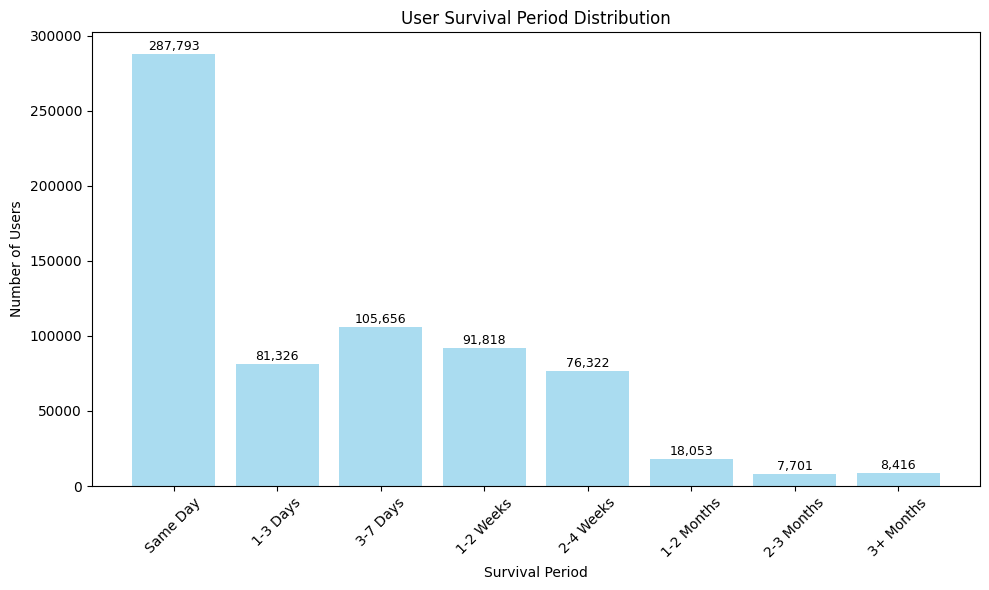


üìñ ÏòÅÏñ¥ Î≤àÏó≠:
Same Day = ÎãπÏùº
1-3 Days = 1-3Ïùº
3-7 Days = 3-7Ïùº
1-2 Weeks = 1-2Ï£º
2-4 Weeks = 2-4Ï£º
1-2 Months = 1-2Í∞úÏõî
2-3 Months = 2-3Í∞úÏõî
3+ Months = 3Í∞úÏõî Ïù¥ÏÉÅ


In [59]:
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞
plt.rcParams['axes.unicode_minus'] = False

# ÏÉùÏ°¥ Í∏∞Í∞Ñ Î∂ÑÏÑù
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days

print("=== üö® ÏÉùÏ°¥ Í∏∞Í∞Ñ Î∂ÑÌè¨ ===")

bins = [0, 1, 3, 7, 14, 30, 60, 90, float('inf')]
labels = ['ÎãπÏùº', '1-3Ïùº', '3-7Ïùº', '1-2Ï£º', '2-4Ï£º', '1-2Í∞úÏõî', '2-3Í∞úÏõî', '3Í∞úÏõî+']
english_labels = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']

user_survival['survival_period'] = pd.cut(user_survival['survival_days'], bins=bins, labels=labels, include_lowest=True)
survival_dist = user_survival['survival_period'].value_counts().sort_index()

cumulative = 0
for period, count in survival_dist.items():
   pct = count / len(user_survival) * 100
   cumulative += pct
   print(f"  {period:8}: {count:6,}Î™Ö ({pct:5.1f}%) - ÎàÑÏ†Å {cumulative:5.1f}%")

# ÏãúÍ∞ÅÌôî (ÏòÅÏñ¥ ÎùºÎ≤® ÏÇ¨Ïö©)
plt.figure(figsize=(10, 6))
plt.bar(range(len(survival_dist)), survival_dist.values, color='skyblue', alpha=0.7)
plt.xlabel('Survival Period')
plt.ylabel('Number of Users')
plt.title('User Survival Period Distribution')
plt.xticks(range(len(survival_dist)), english_labels, rotation=45)

# Í∞í ÌëúÏãú
for i, v in enumerate(survival_dist.values):
   plt.text(i, v + max(survival_dist.values)*0.01, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nüìñ ÏòÅÏñ¥ Î≤àÏó≠:")
print("Same Day = ÎãπÏùº")
print("1-3 Days = 1-3Ïùº")
print("3-7 Days = 3-7Ïùº")
print("1-2 Weeks = 1-2Ï£º")
print("2-4 Weeks = 2-4Ï£º")
print("1-2 Months = 1-2Í∞úÏõî")
print("2-3 Months = 2-3Í∞úÏõî")
print("3+ Months = 3Í∞úÏõî Ïù¥ÏÉÅ")

=== üö® ÎßàÏßÄÎßâ ÌñâÎèô Ïú†ÌòïÎ≥Ñ Ïù¥ÌÉà Î∂ÑÌè¨ ===
Ï†ÑÏ≤¥ Ïù¥ÌÉà ÏÇ¨Ïö©Ïûê: 677,085Î™Ö

 1. accounts_friendrequest_send: 601,854Î™Ö ( 88.9%)
 2. accounts_paymenthistory  : 28,165Î™Ö (  4.2%)
 3. accounts_user_processed  : 26,946Î™Ö (  4.0%)
 4. polls_questionreport     :  8,769Î™Ö (  1.3%)
 5. accounts_blockrecord_processed:  6,034Î™Ö (  0.9%)
 6. accounts_pointhistory    :  4,713Î™Ö (  0.7%)
 7. polls_questionset        :    313Î™Ö (  0.0%)
 8. event_receipts           :    234Î™Ö (  0.0%)
 9. accounts_failpaymenthistory:     48Î™Ö (  0.0%)
10. accounts_timelinereport  :      9Î™Ö (  0.0%)


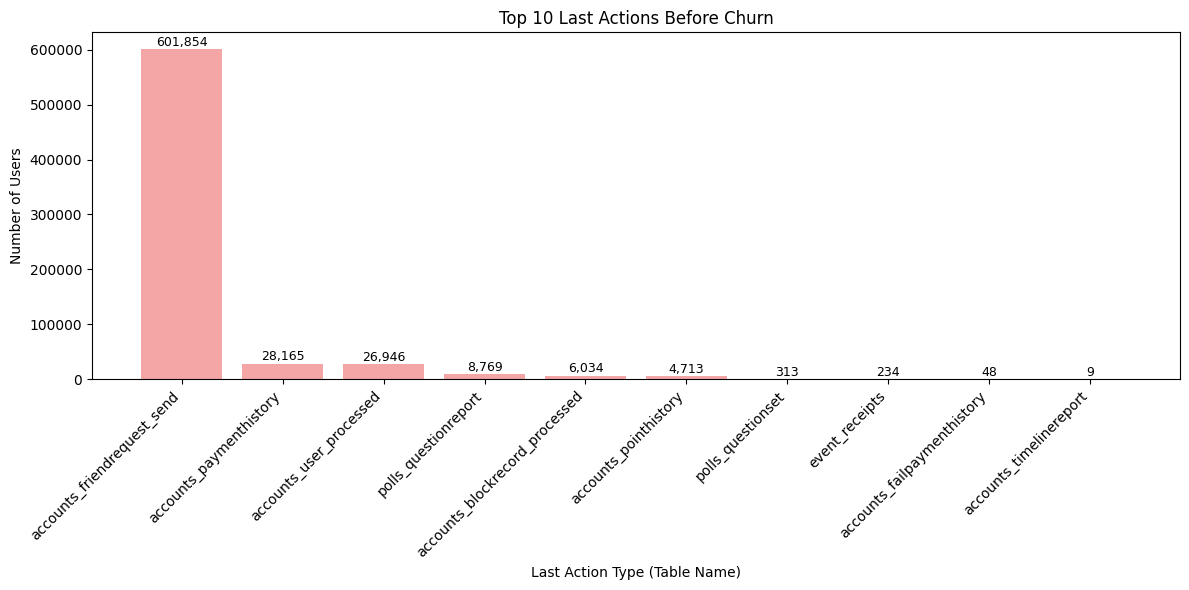


üí° Ïù∏ÏÇ¨Ïù¥Ìä∏: 'accounts_friendrequest_send' ÌõÑ Ïù¥ÌÉàÏù¥ Í∞ÄÏû• ÎßéÏùå (88.9%)


In [62]:
import matplotlib.pyplot as plt

# 1. ÎßàÏßÄÎßâ ÌñâÎèô Ïú†Ìòï Î∂ÑÏÑù (table_name ÏÇ¨Ïö©)
print("=== üö® ÎßàÏßÄÎßâ ÌñâÎèô Ïú†ÌòïÎ≥Ñ Ïù¥ÌÉà Î∂ÑÌè¨ ===")

# Í∞Å ÏÇ¨Ïö©ÏûêÏùò ÎßàÏßÄÎßâ ÌñâÎèô Ï∂îÏ∂ú
user_last_action = merged_df.loc[merged_df.groupby('user_id')['created_at'].idxmax()]
last_action_dist = user_last_action['table_name'].value_counts()

print(f"Ï†ÑÏ≤¥ Ïù¥ÌÉà ÏÇ¨Ïö©Ïûê: {len(user_last_action):,}Î™Ö\n")

# ÏÉÅÏúÑ 10Í∞ú ÌñâÎèô Ï∂úÎ†•
for i, (action, count) in enumerate(last_action_dist.head(10).items(), 1):
    pct = count / len(user_last_action) * 100
    print(f"{i:2d}. {action:25}: {count:6,}Î™Ö ({pct:5.1f}%)")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
top_10 = last_action_dist.head(10)
plt.bar(range(len(top_10)), top_10.values, color='lightcoral', alpha=0.7)
plt.xlabel('Last Action Type (Table Name)')
plt.ylabel('Number of Users')
plt.title('Top 10 Last Actions Before Churn')
plt.xticks(range(len(top_10)), top_10.index, rotation=45, ha='right')

# Í∞í ÌëúÏãú
for i, v in enumerate(top_10.values):
    plt.text(i, v + max(top_10.values)*0.01, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nüí° Ïù∏ÏÇ¨Ïù¥Ìä∏: '{top_10.index[0]}' ÌõÑ Ïù¥ÌÉàÏù¥ Í∞ÄÏû• ÎßéÏùå ({top_10.iloc[0]/len(user_last_action)*100:.1f}%)")

üîç Ïù∏ÏÇ¨Ïù¥Ìä∏ Ìï¥ÏÑù:
89%Í∞Ä ÏπúÍµ¨ÏöîÏ≤≠ ÌõÑ Ïù¥ÌÉà - Ïù¥Îäî Îß§Ïö∞ Ï§ëÏöîÌïú Î∞úÍ≤¨ÏûÖÎãàÎã§:

ÏÇ¨Ïö©ÏûêÎì§Ïù¥ ÏπúÍµ¨ÏöîÏ≤≠ Î≥¥ÎÇ∏ ÌõÑ ÏùëÎãµ ÎåÄÍ∏∞ Ï§ë Ïù¥ÌÉà
ÏπúÍµ¨ÏöîÏ≤≠Ïù¥ ÏäπÏù∏ÎêòÏßÄ ÏïäÍ±∞ÎÇò Îä¶Í≤å ÏùëÎãµÎ∞õÏùÑ Îïå Ï¢åÏ†àÍ∞ê
Ï¥àÍ∏∞ ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÏπúÍµ¨ Ïó∞Í≤∞Ïù¥ ÌïµÏã¨ Î¶¨ÌÖêÏÖò ÏöîÏÜå

Í≤∞Ï†ú(4.2%)ÏôÄ Í∞ÄÏûÖ(4.0%) ÌõÑ Ïù¥ÌÉàÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùå.

### Ïù¥ÌÉà ÏãúÏ†êÎ≥Ñ Ìå®ÌÑ¥

=== üö® ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ ÌñâÎèô Ìå®ÌÑ¥ ===

üìä ÎãπÏùº Ïù¥ÌÉàÏûêÎì§Ïùò ÎßàÏßÄÎßâ ÌñâÎèô:
  accounts_friendrequest_send:  88.2%
  accounts_paymenthistory  :   1.6%
  accounts_user_processed  :   9.4%

üìä 1-3Ïùº Ïù¥ÌÉàÏûêÎì§Ïùò ÎßàÏßÄÎßâ ÌñâÎèô:
  accounts_friendrequest_send:  93.0%
  accounts_paymenthistory  :   4.6%
  accounts_user_processed  :   0.0%

üìä 3-7Ïùº Ïù¥ÌÉàÏûêÎì§Ïùò ÎßàÏßÄÎßâ ÌñâÎèô:
  accounts_friendrequest_send:  91.1%
  accounts_paymenthistory  :   5.9%
  accounts_user_processed  :   0.0%

üìä 1-2Ï£º Ïù¥ÌÉàÏûêÎì§Ïùò ÎßàÏßÄÎßâ ÌñâÎèô:
  accounts_friendrequest_send:  90.7%
  accounts_paymenthistory  :   5.7%
  accounts_user_processed  :   0.0%


<Figure size 1000x600 with 0 Axes>

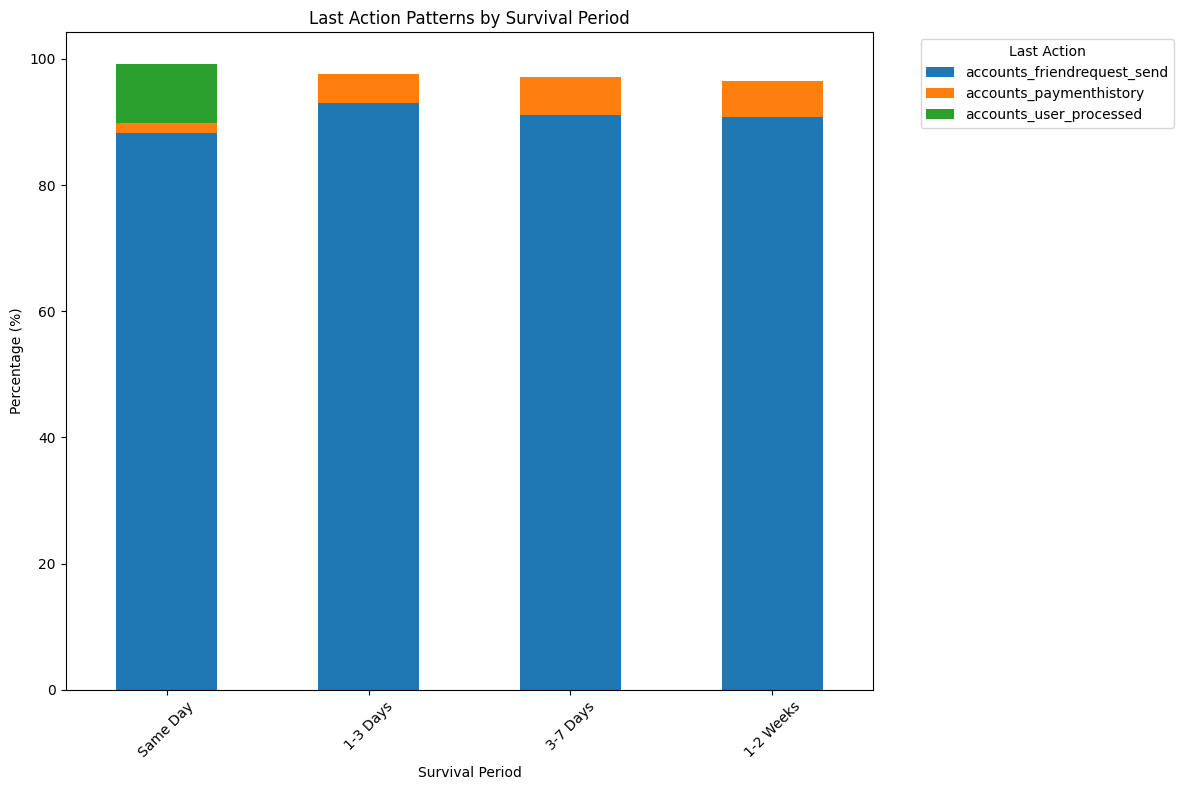


üìñ Î≤àÏó≠:
Same Day = ÎãπÏùº
1-3 Days = 1-3Ïùº
3-7 Days = 3-7Ïùº
1-2 Weeks = 1-2Ï£º
accounts_friendrequest_send = ÏπúÍµ¨ÏöîÏ≤≠ Î∞úÏÜ°
accounts_paymenthistory = Í≤∞Ï†úÎÇ¥Ïó≠
accounts_user_processed = ÏÇ¨Ïö©Ïûê Í≥ÑÏ†ï Ï≤òÎ¶¨


In [64]:
import matplotlib.pyplot as plt

# 2. ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù
print("=== üö® ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ ÌñâÎèô Ìå®ÌÑ¥ ===")

# user_last_actionÏóê ÏÉùÏ°¥Í∏∞Í∞Ñ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
user_last_action_with_survival = user_last_action.merge(
    user_survival[['user_id', 'survival_period']], 
    on='user_id'
)

# ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ ÌñâÎèô ÌÅ¨Î°úÏä§ÌÉ≠
churn_pattern = pd.crosstab(
    user_last_action_with_survival['survival_period'], 
    user_last_action_with_survival['table_name'], 
    normalize='index'
) * 100

# Ï£ºÏöî Ìå®ÌÑ¥ Ï∂úÎ†•
periods = ['ÎãπÏùº', '1-3Ïùº', '3-7Ïùº', '1-2Ï£º']
top_actions = ['accounts_friendrequest_send', 'accounts_paymenthistory', 'accounts_user_processed']

for period in periods:
    if period in churn_pattern.index:
        print(f"\nüìä {period} Ïù¥ÌÉàÏûêÎì§Ïùò ÎßàÏßÄÎßâ ÌñâÎèô:")
        for action in top_actions:
            if action in churn_pattern.columns:
                pct = churn_pattern.loc[period, action]
                print(f"  {action:25}: {pct:5.1f}%")

# ÏãúÍ∞ÅÌôî (ÏòÅÏñ¥ ÎùºÎ≤®Îßå ÏÇ¨Ïö©)
plt.figure(figsize=(10, 6))
period_mapping = {'ÎãπÏùº': 'Same Day', '1-3Ïùº': '1-3 Days', '3-7Ïùº': '3-7 Days', '1-2Ï£º': '1-2 Weeks'}
churn_subset = churn_pattern.loc[periods, top_actions]
churn_subset.index = [period_mapping[p] for p in churn_subset.index]

churn_subset.plot(kind='bar', stacked=True)
plt.title('Last Action Patterns by Survival Period')
plt.xlabel('Survival Period')
plt.ylabel('Percentage (%)')
plt.legend(title='Last Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nüìñ Î≤àÏó≠:")
print("Same Day = ÎãπÏùº")
print("1-3 Days = 1-3Ïùº") 
print("3-7 Days = 3-7Ïùº")
print("1-2 Weeks = 1-2Ï£º")
print("accounts_friendrequest_send = ÏπúÍµ¨ÏöîÏ≤≠ Î∞úÏÜ°")
print("accounts_paymenthistory = Í≤∞Ï†úÎÇ¥Ïó≠")
print("accounts_user_processed = ÏÇ¨Ïö©Ïûê Í≥ÑÏ†ï Ï≤òÎ¶¨")

ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏:

- ÏùºÍ¥ÄÎêú Ìå®ÌÑ¥: Î™®Îì† Í∏∞Í∞ÑÏóêÏÑú ÏπúÍµ¨ÏöîÏ≤≠(88-93%) ÌõÑ Ïù¥ÌÉà ÏïïÎèÑÏ†Å
- ÎãπÏùº Ïù¥ÌÉà ÌäπÏßï: Í≥ÑÏ†ïÏ≤òÎ¶¨(9.4%) ÌõÑ Î∞îÎ°ú Îñ†ÎÇ® ‚Üí Ïò®Î≥¥Îî© Ïã§Ìå®
- 1Ïùº+ Ïù¥ÌÉà: Í≤∞Ï†ú ÎπÑÏ§ë Ï¶ùÍ∞Ä(4.6-5.9%) ‚Üí Ïú†Î£åÌôî Îã®Í≥ÑÏóêÏÑú Ïù¥ÌÉà

### Ïù¥ÌÉà ÏßÅÏ†Ñ ÌôúÎèô ÎπàÎèÑ

=== üö® Ïù¥ÌÉà ÏßÅÏ†Ñ ÌôúÎèô ÎπàÎèÑ ===
ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ 3ÏùºÍ∞Ñ ÌôúÎèô:
  ÎãπÏùº      : ÌèâÍ∑† 19.8Ìöå, Ï§ëÍ∞ÑÍ∞í 15Ìöå (287,793.0Î™Ö)
  1-3Ïùº    : ÌèâÍ∑† 20.4Ìöå, Ï§ëÍ∞ÑÍ∞í 15Ìöå (81,326.0Î™Ö)
  3-7Ïùº    : ÌèâÍ∑† 6.7Ìöå, Ï§ëÍ∞ÑÍ∞í 3Ìöå (105,656.0Î™Ö)
  1-2Ï£º    : ÌèâÍ∑† 4.5Ìöå, Ï§ëÍ∞ÑÍ∞í 2Ìöå (91,818.0Î™Ö)
  2-4Ï£º    : ÌèâÍ∑† 3.6Ìöå, Ï§ëÍ∞ÑÍ∞í 2Ìöå (76,322.0Î™Ö)
  1-2Í∞úÏõî   : ÌèâÍ∑† 2.9Ìöå, Ï§ëÍ∞ÑÍ∞í 1Ìöå (18,053.0Î™Ö)
  2-3Í∞úÏõî   : ÌèâÍ∑† 2.9Ìöå, Ï§ëÍ∞ÑÍ∞í 1Ìöå (7,701.0Î™Ö)
  3Í∞úÏõî+    : ÌèâÍ∑† 3.5Ìöå, Ï§ëÍ∞ÑÍ∞í 1Ìöå (8,416.0Î™Ö)


/tmp/ipykernel_16138/2638090160.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_final_activity = final_activity_df.groupby('survival_period')['final_3days_activity'].agg(['mean', 'median', 'count'])


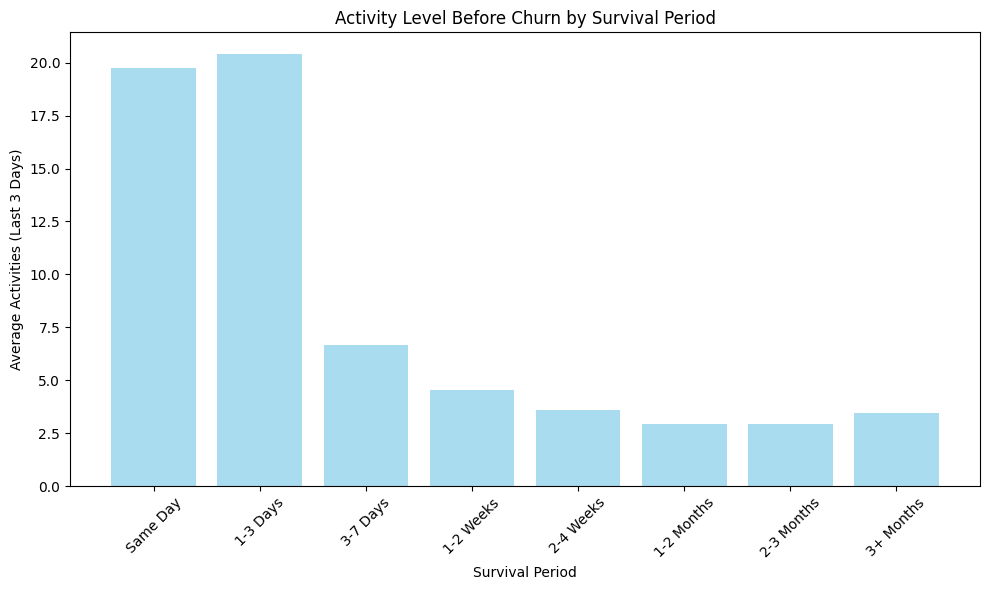


üìñ Î≤àÏó≠: Same Day=ÎãπÏùº, 1-3 Days=1-3Ïùº, 3-7 Days=3-7Ïùº, 1-2 Weeks=1-2Ï£º, 2-4 Weeks=2-4Ï£º, 1-2 Months=1-2Í∞úÏõî, 2-3 Months=2-3Í∞úÏõî, 3+ Months=3Í∞úÏõî+


In [66]:
# 3. Ïù¥ÌÉà ÏßÅÏ†Ñ ÌôúÎèô ÎπàÎèÑ Î∂ÑÏÑù (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
print("=== üö® Ïù¥ÌÉà ÏßÅÏ†Ñ ÌôúÎèô ÎπàÎèÑ ===")

# Í∞Å ÏÇ¨Ïö©ÏûêÎ≥Ñ ÎßàÏßÄÎßâ ÌôúÎèôÏùºÍ≥º ÏµúÍ∑º 3ÏùºÍ∞Ñ ÌôúÎèô Ïàò Í≥ÑÏÇ∞
user_activity_summary = merged_df.groupby('user_id').agg({
    'created_at': ['max', 'count'],
    'table_name': 'count'
}).reset_index()

user_activity_summary.columns = ['user_id', 'last_activity', 'total_activities', 'total_activities2']

# Í∞Å ÏÇ¨Ïö©ÏûêÏùò ÎßàÏßÄÎßâ 3ÏùºÍ∞Ñ ÌôúÎèô Ïàò Í≥ÑÏÇ∞
final_3days_activity = []
for user_id in user_activity_summary['user_id']:
    user_data = merged_df[merged_df['user_id'] == user_id]
    last_date = user_data['created_at'].max()
    final_3days = user_data[user_data['created_at'] >= last_date - pd.Timedelta(days=3)]
    final_3days_activity.append(len(final_3days))

user_activity_summary['final_3days_activity'] = final_3days_activity

# ÏÉùÏ°¥ Í∏∞Í∞Ñ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
final_activity_df = user_activity_summary.merge(user_survival[['user_id', 'survival_period']], on='user_id')

# ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ 3ÏùºÍ∞Ñ ÌèâÍ∑† ÌôúÎèô ÌöüÏàò
avg_final_activity = final_activity_df.groupby('survival_period')['final_3days_activity'].agg(['mean', 'median', 'count'])

print("ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÎßàÏßÄÎßâ 3ÏùºÍ∞Ñ ÌôúÎèô:")
for period, row in avg_final_activity.iterrows():
    print(f"  {period:8}: ÌèâÍ∑† {row['mean']:.1f}Ìöå, Ï§ëÍ∞ÑÍ∞í {row['median']:.0f}Ìöå ({row['count']:,}Î™Ö)")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
periods_en = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']
avg_values = avg_final_activity['mean'].values
plt.bar(range(len(avg_values)), avg_values, color='skyblue', alpha=0.7)
plt.xlabel('Survival Period')
plt.ylabel('Average Activities (Last 3 Days)')
plt.title('Activity Level Before Churn by Survival Period')
plt.xticks(range(len(periods_en)), periods_en, rotation=45)
plt.tight_layout()
plt.show()

print("\nüìñ Î≤àÏó≠: Same Day=ÎãπÏùº, 1-3 Days=1-3Ïùº, 3-7 Days=3-7Ïùº, 1-2 Weeks=1-2Ï£º, 2-4 Weeks=2-4Ï£º, 1-2 Months=1-2Í∞úÏõî, 2-3 Months=2-3Í∞úÏõî, 3+ Months=3Í∞úÏõî+")

- Ïó≠ÏÑ§Ï†Å Ìå®ÌÑ¥: ÎãπÏùº/1-3Ïùº Ïù¥ÌÉàÏûêÍ∞Ä Ïò§ÌûàÎ†§ Í∞ÄÏû• ÌôúÎ∞ú(20Ìöå) ‚Üí ÎÜíÏùÄ Í∏∞ÎåÄ ÌõÑ Ïã§Îßù
- 3-7Ïùº Í∏âÎùΩ: 6.7ÌöåÎ°ú Í∏âÍ≤© Í∞êÏÜå ‚Üí ÌïµÏã¨ Ï†ÑÌôòÏ†ê
- Ï†êÏßÑÏ†Å Ïá†Ìá¥: Ïù¥ÌõÑ 2-4Ìöå Ïú†ÏßÄ ‚Üí ÏÑúÏÑúÌûà Í¥ÄÏã¨ ÏÉÅÏã§

### ÎàÑÏ†Å Ïù¥ÌÉàÎ•† Í≥°ÏÑ†

=== üö® ÎàÑÏ†Å Ïù¥ÌÉàÎ•† & ÏûÑÍ≥ÑÏ†ê ===
ÏûÑÍ≥ÑÏ†ê Î∂ÑÏÑù:
  ÎãπÏùº      : +42.5% (ÎàÑÏ†Å  42.5%)
  1-3Ïùº    : +12.0% (ÎàÑÏ†Å  54.5%)
  3-7Ïùº    : +15.6% (ÎàÑÏ†Å  70.1%)
  1-2Ï£º    : +13.6% (ÎàÑÏ†Å  83.7%)
  2-4Ï£º    : +11.3% (ÎàÑÏ†Å  95.0%)
  1-2Í∞úÏõî   : + 2.7% (ÎàÑÏ†Å  97.6%)
  2-3Í∞úÏõî   : + 1.1% (ÎàÑÏ†Å  98.8%)
  3Í∞úÏõî+    : + 1.2% (ÎàÑÏ†Å 100.0%)


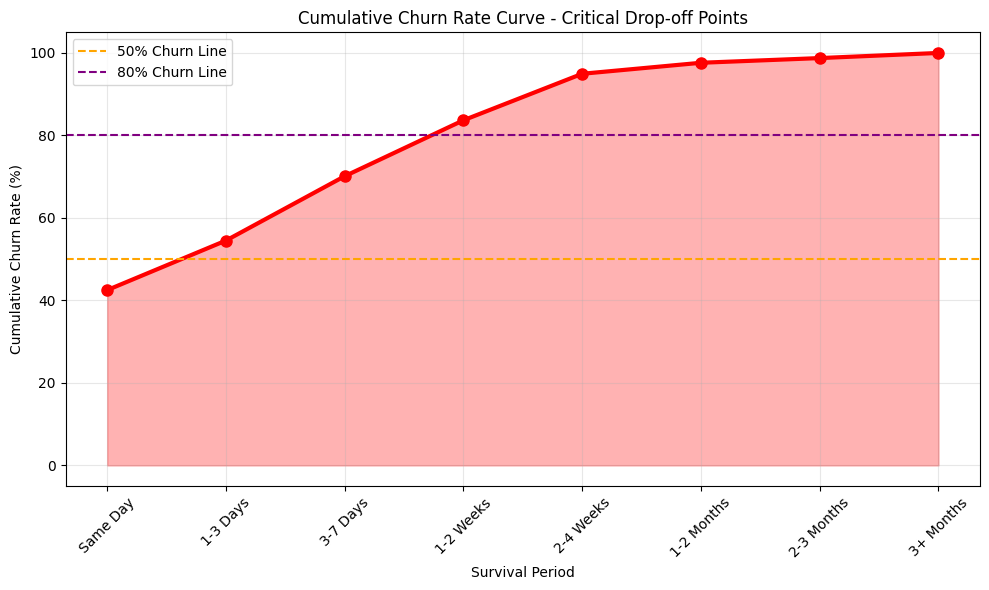


üí° ÌïµÏã¨ ÏûÑÍ≥ÑÏ†ê: 3Ïùº ÎÇ¥ 54.5% Ïù¥ÌÉà, 1Ï£ºÏùº ÎÇ¥ 70.1% Ïù¥ÌÉà


In [67]:
# 4. ÎàÑÏ†Å Ïù¥ÌÉàÎ•† Í≥°ÏÑ† - ÏûÑÍ≥ÑÏ†ê Î∞úÍ≤¨
print("=== üö® ÎàÑÏ†Å Ïù¥ÌÉàÎ•† & ÏûÑÍ≥ÑÏ†ê ===")

# ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ Ïù¥ÌÉà ÏàòÏôÄ ÎàÑÏ†Å ÎπÑÏú®
survival_counts = user_survival['survival_period'].value_counts().sort_index()
total_users = len(user_survival)
cumulative_churn = survival_counts.cumsum() / total_users * 100

print("ÏûÑÍ≥ÑÏ†ê Î∂ÑÏÑù:")
for i, (period, cum_pct) in enumerate(cumulative_churn.items()):
    current_pct = survival_counts.iloc[i] / total_users * 100
    print(f"  {period:8}: +{current_pct:4.1f}% (ÎàÑÏ†Å {cum_pct:5.1f}%)")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
periods_en = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']
plt.plot(range(len(cumulative_churn)), cumulative_churn.values, marker='o', linewidth=3, markersize=8, color='red')
plt.fill_between(range(len(cumulative_churn)), cumulative_churn.values, alpha=0.3, color='red')
plt.xlabel('Survival Period')
plt.ylabel('Cumulative Churn Rate (%)')
plt.title('Cumulative Churn Rate Curve - Critical Drop-off Points')
plt.xticks(range(len(periods_en)), periods_en, rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(y=50, color='orange', linestyle='--', label='50% Churn Line')
plt.axhline(y=80, color='purple', linestyle='--', label='80% Churn Line')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nüí° ÌïµÏã¨ ÏûÑÍ≥ÑÏ†ê: 3Ïùº ÎÇ¥ {cumulative_churn.iloc[1]:.1f}% Ïù¥ÌÉà, 1Ï£ºÏùº ÎÇ¥ {cumulative_churn.iloc[2]:.1f}% Ïù¥ÌÉà")

- 1ÏùºÏ∞®: 42.5% ÎåÄÎüâ Ïù¥ÌÉà (Ïò®Î≥¥Îî© Ïã§Ìå®)
- 3ÏùºÏ∞®: 54.5% ‚Üí Ï≤´ Î≤àÏß∏ Í≤∞Ï†ïÏ†Å ÏûÑÍ≥ÑÏ†ê
- 7ÏùºÏ∞®: 70.1% ‚Üí Îëê Î≤àÏß∏ Í≤∞Ï†ïÏ†Å ÏûÑÍ≥ÑÏ†ê
- 1Í∞úÏõî: 95% ‚Üí Í±∞Ïùò Î™®Îì† Ïù¥ÌÉà ÏôÑÎ£å

=== üö® ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•†Í≥º Ïù¥ÌÉà Í¥ÄÍ≥Ñ ===
Status Î∂ÑÌè¨: status
A    12878407
P     3938608
R      330160
Name: count, dtype: int64


/tmp/ipykernel_16138/1043575358.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_survival = friend_survival.groupby('survival_period').agg({



ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•†:
  ÎãπÏùº      : ÏÑ±Í≥µÎ•† 75.8%, ÌèâÍ∑† ÏöîÏ≤≠ 20.6Í±¥ (260,724Î™Ö)
  1-3Ïùº    : ÏÑ±Í≥µÎ•† 79.4%, ÌèâÍ∑† ÏöîÏ≤≠ 27.6Í±¥ (81,209Î™Ö)
  3-7Ïùº    : ÏÑ±Í≥µÎ•† 78.3%, ÌèâÍ∑† ÏöîÏ≤≠ 28.9Í±¥ (105,438Î™Ö)
  1-2Ï£º    : ÏÑ±Í≥µÎ•† 76.4%, ÌèâÍ∑† ÏöîÏ≤≠ 30.0Í±¥ (91,617Î™Ö)
  2-4Ï£º    : ÏÑ±Í≥µÎ•† 72.9%, ÌèâÍ∑† ÏöîÏ≤≠ 33.1Í±¥ (76,118Î™Ö)
  1-2Í∞úÏõî   : ÏÑ±Í≥µÎ•† 69.4%, ÌèâÍ∑† ÏöîÏ≤≠ 36.8Í±¥ (17,998Î™Ö)
  2-3Í∞úÏõî   : ÏÑ±Í≥µÎ•† 69.7%, ÌèâÍ∑† ÏöîÏ≤≠ 31.5Í±¥ (7,605Î™Ö)
  3Í∞úÏõî+    : ÏÑ±Í≥µÎ•† 66.4%, ÌèâÍ∑† ÏöîÏ≤≠ 36.6Í±¥ (8,363Î™Ö)


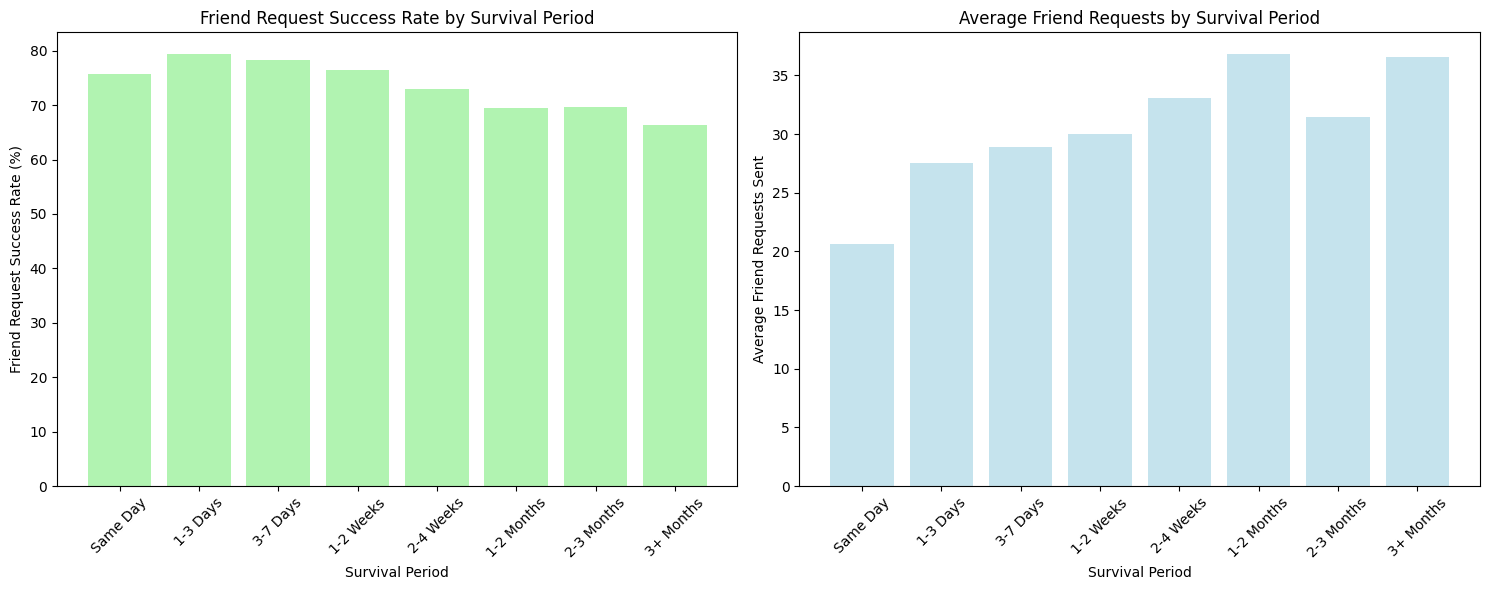

In [70]:
# 5. ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•†Í≥º Ïù¥ÌÉà Í¥ÄÍ≥Ñ Î∂ÑÏÑù
print("=== üö® ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•†Í≥º Ïù¥ÌÉà Í¥ÄÍ≥Ñ ===")

# status Í∞í ÌôïÏù∏
print("Status Î∂ÑÌè¨:", df_friend['status'].value_counts())

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞ (A=ÏäπÏù∏, P=ÎåÄÍ∏∞Ï§ë Îì±)
friend_stats = df_friend.groupby('send_user_id').agg({
    'id': 'count',
    'status': lambda x: (x == 'A').sum()  # ÏäπÏù∏Îêú ÏöîÏ≤≠ Ïàò
}).reset_index()

friend_stats.columns = ['user_id', 'total_requests', 'accepted_requests']
friend_stats['success_rate'] = friend_stats['accepted_requests'] / friend_stats['total_requests']

# ÏÉùÏ°¥ Í∏∞Í∞ÑÍ≥º Îß§Ïπ≠
friend_survival = friend_stats.merge(user_survival[['user_id', 'survival_period']], on='user_id', how='inner')

# ÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•†
success_by_survival = friend_survival.groupby('survival_period').agg({
    'success_rate': ['mean', 'median', 'count'],
    'total_requests': 'mean'
}).round(3)

print("\nÏÉùÏ°¥Í∏∞Í∞ÑÎ≥Ñ ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•†:")
for period in success_by_survival.index:
    success_rate = success_by_survival.loc[period, ('success_rate', 'mean')]
    avg_requests = success_by_survival.loc[period, ('total_requests', 'mean')]
    count = success_by_survival.loc[period, ('success_rate', 'count')]
    print(f"  {period:8}: ÏÑ±Í≥µÎ•† {success_rate:.1%}, ÌèâÍ∑† ÏöîÏ≤≠ {avg_requests:.1f}Í±¥ ({count:,}Î™Ö)")

# ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

periods_en = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']
success_rates = success_by_survival[('success_rate', 'mean')].values * 100
avg_requests = success_by_survival[('total_requests', 'mean')].values

ax1.bar(range(len(success_rates)), success_rates, color='lightgreen', alpha=0.7)
ax1.set_xlabel('Survival Period')
ax1.set_ylabel('Friend Request Success Rate (%)')
ax1.set_title('Friend Request Success Rate by Survival Period')
ax1.set_xticks(range(len(periods_en)))
ax1.set_xticklabels(periods_en, rotation=45)

ax2.bar(range(len(avg_requests)), avg_requests, color='lightblue', alpha=0.7)
ax2.set_xlabel('Survival Period')
ax2.set_ylabel('Average Friend Requests Sent')
ax2.set_title('Average Friend Requests by Survival Period')
ax2.set_xticks(range(len(periods_en)))
ax2.set_xticklabels(periods_en, rotation=45)

plt.tight_layout()
plt.show()

ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏:

- Ï°∞Í∏∞ Ïù¥ÌÉàÏûêÎèÑ ÏπúÍµ¨ÏöîÏ≤≠ ÏÑ±Í≥µÎ•† 75-79% (ÎÜíÏùå)
- Ïû•Í∏∞ ÏÇ¨Ïö©ÏûêÎäî ÏÑ±Í≥µÎ•† ÎÇÆÏßÄÎßå(66-69%) Îçî ÎßéÏù¥ ÏãúÎèÑ(36Í±¥)
- ÏπúÍµ¨ÏöîÏ≤≠ Í±∞Ï†àÏù¥ Ïù¥ÌÉà ÏõêÏù∏ ÏïÑÎãò ‚Üí Îã§Î•∏ ÏöîÏù∏ Ï°¥Ïû¨

### Ïù¥ÌÉà ÏòàÏ∏° Î™®Îç∏

In [71]:
# 6. Ïù¥ÌÉà ÏòàÏ∏° ÏöîÏù∏ Ï¢ÖÌï© Î∂ÑÏÑù
print("=== üö® Ïù¥ÌÉà ÏòàÏ∏° ÌïµÏã¨ ÏöîÏù∏ ===")

# Ï°∞Í∏∞ Ïù¥ÌÉà(3Ïùº Ïù¥ÎÇ¥) vs ÏÉùÏ°¥Ïûê ÎπÑÍµê
early_churn = user_survival[user_survival['survival_period'].isin(['ÎãπÏùº', '1-3Ïùº'])]
survivors = user_survival[user_survival['survival_period'].isin(['1-2Í∞úÏõî', '2-3Í∞úÏõî', '3Í∞úÏõî+'])]

print(f"Ï°∞Í∏∞ Ïù¥ÌÉàÏûê: {len(early_churn):,}Î™Ö ({len(early_churn)/len(user_survival)*100:.1f}%)")
print(f"ÏÉùÏ°¥Ïûê: {len(survivors):,}Î™Ö ({len(survivors)/len(user_survival)*100:.1f}%)")

# Ï¥ù ÌôúÎèôÎüâ ÎπÑÍµê
churn_activity = early_churn['total_events'].mean()
survivor_activity = survivors['total_events'].mean()

print(f"\nÌôúÎèôÎüâ Ï∞®Ïù¥:")
print(f"Ï°∞Í∏∞ Ïù¥ÌÉàÏûê ÌèâÍ∑† ÌôúÎèô: {churn_activity:.1f}Ìöå")
print(f"ÏÉùÏ°¥Ïûê ÌèâÍ∑† ÌôúÎèô: {survivor_activity:.1f}Ìöå")
print(f"ÌôúÎèôÎüâ Ï∞®Ïù¥: {survivor_activity/churn_activity:.1f}Î∞∞")

# Ïù¥ÌÉà ÏòàÏ∏° Ï†êÏàò Í≥ÑÏÇ∞
risk_factors = {
    'Ï≤´ÎÇ† Ïù¥ÌÉà ÏúÑÌóò': 42.5,
    '3Ïùº ÎÇ¥ ÏúÑÌóò': 54.5,
    'ÏπúÍµ¨ÏöîÏ≤≠ ÌõÑ Î¨¥ÏùëÎãµ': 89.0,
    'ÎÇÆÏùÄ Ï¥àÍ∏∞ ÌôúÎèô': 20.0
}

print("\nüìä Ïù¥ÌÉà ÏúÑÌóò ÏöîÏù∏ Ï†êÏàò:")
for factor, score in risk_factors.items():
    print(f"  {factor}: {score}%")

=== üö® Ïù¥ÌÉà ÏòàÏ∏° ÌïµÏã¨ ÏöîÏù∏ ===
Ï°∞Í∏∞ Ïù¥ÌÉàÏûê: 369,119Î™Ö (54.5%)
ÏÉùÏ°¥Ïûê: 34,170Î™Ö (5.0%)

ÌôúÎèôÎüâ Ï∞®Ïù¥:
Ï°∞Í∏∞ Ïù¥ÌÉàÏûê ÌèâÍ∑† ÌôúÎèô: 21.7Ìöå
ÏÉùÏ°¥Ïûê ÌèâÍ∑† ÌôúÎèô: 128.8Ìöå
ÌôúÎèôÎüâ Ï∞®Ïù¥: 5.9Î∞∞

üìä Ïù¥ÌÉà ÏúÑÌóò ÏöîÏù∏ Ï†êÏàò:
  Ï≤´ÎÇ† Ïù¥ÌÉà ÏúÑÌóò: 42.5%
  3Ïùº ÎÇ¥ ÏúÑÌóò: 54.5%
  ÏπúÍµ¨ÏöîÏ≤≠ ÌõÑ Î¨¥ÏùëÎãµ: 89.0%
  ÎÇÆÏùÄ Ï¥àÍ∏∞ ÌôúÎèô: 20.0%


Ï£ºÏöî Î∞úÍ≤¨:
- 54.5% 3Ïùº ÎÇ¥ Ïù¥ÌÉà vs 5% Ïû•Í∏∞ ÏÉùÏ°¥
- ÏÉùÏ°¥ÏûêÎäî 5.9Î∞∞ Îçî ÌôúÎ∞ú (128.8Ìöå vs 21.7Ìöå)
- ÏπúÍµ¨ÏöîÏ≤≠ ÌõÑ Ïù¥ÌÉà 89%Ïù¥ÏßÄÎßå ÏÑ±Í≥µÎ•†ÏùÄ 75%+ (Í±∞Ï†àÏù¥ ÏõêÏù∏ ÏïÑÎãò)

Ïù¥ÌÉà ÏûÑÍ≥ÑÏ†ê:
- 1ÏùºÏ∞®: 42.5% (Ïò®Î≥¥Îî© Ïã§Ìå®)
- 3ÏùºÏ∞®: 54.5% (Ï≤´ Î≤àÏß∏ ÏúÑÌóòÍµ¨Í∞Ñ)
- 7ÏùºÏ∞®: 70.1% (Îëê Î≤àÏß∏ ÏúÑÌóòÍµ¨Í∞Ñ)

Ïï°ÏÖò Ìè¨Ïù∏Ìä∏:
- Ï≤´ 3Ïùº ÏßëÏ§ë Í¥ÄÎ¶¨ (54.5% Íµ¨Í∞Ñ)
- ÏπúÍµ¨ÏöîÏ≤≠ ÌõÑ Ï¶âÏãú Í∞úÏûÖ ÌïÑÏöî
- Ï¥àÍ∏∞ ÌôúÎèôÎüâ 20Ìöå Ïù¥Ìïò Ïãú ÏúÑÌóòÍµ∞
- 7ÏùºÏ∞® Î¶¨ÌÖêÏÖò Ï∫†ÌéòÏù∏ ÌïÑÏàò

### Í∞ôÏùÄÎÇ† Ïù¥ÌÉà Í≥µÌÜµÏ†ê Î∂ÑÏÑù

In [18]:
# 5Ïõî 14Ïùº ÎåÄÎüâ Ïù¥ÌÉà ÏÉÅÏÑ∏ Î∂ÑÏÑù
may14_users = user_survival[user_survival['churn_date'] == pd.to_datetime('2023-05-14').date()]['user_id'].tolist()
may14_data = user_df[user_df['id'].isin(may14_users)]

print(f"5Ïõî 14Ïùº Ïù¥ÌÉàÏûê ÏÉÅÏÑ∏ ({len(may14_users):,}Î™Ö):")
print(f"ÌïôÍµêÎ≥Ñ Î∂ÑÌè¨:")
school_dist = may14_data['group_id'].value_counts().head(5)
for school, count in school_dist.items():
    pct = count/len(may14_users)*100
    print(f"  ÌïôÍµê {school}: {count:,}Î™Ö ({pct:.1f}%)")

print(f"\nÏπúÍµ¨Ïàò Î∂ÑÌè¨:")
print(f"  ÌèâÍ∑†: {may14_data['friend_count'].mean():.1f}Î™Ö")
print(f"  Ï§ëÍ∞ÑÍ∞í: {may14_data['friend_count'].median():.1f}Î™Ö")

print(f"\nÏÉùÏ°¥Í∏∞Í∞Ñ:")
may14_survival = user_survival[user_survival['user_id'].isin(may14_users)]
survival_days = (may14_survival['last_activity'] - may14_survival['first_activity']).dt.days
print(f"  ÌèâÍ∑†: {survival_days.mean():.1f}Ïùº")
print(f"  Ï§ëÍ∞ÑÍ∞í: {survival_days.median():.1f}Ïùº")

# 5Ïõî 14Ïùº Ï†ÑÌõÑ ÎπÑÍµê
print(f"\nÏ†ÑÌõÑ ÎπÑÍµê:")
may13 = same_day_groups[same_day_groups['churn_date'] == pd.to_datetime('2023-05-13').date()]['user_count'].iloc[0]
may15 = same_day_groups[same_day_groups['churn_date'] == pd.to_datetime('2023-05-15').date()]['user_count'].iloc[0]
print(f"5Ïõî 13Ïùº: {may13:,}Î™Ö")
print(f"5Ïõî 14Ïùº: 32,251Î™Ö (Ìè≠Ï¶ù)")
print(f"5Ïõî 15Ïùº: {may15:,}Î™Ö")

5Ïõî 14Ïùº Ïù¥ÌÉàÏûê ÏÉÅÏÑ∏ (32,251Î™Ö):
ÌïôÍµêÎ≥Ñ Î∂ÑÌè¨:
  ÌïôÍµê 54607.0: 11Î™Ö (0.0%)
  ÌïôÍµê 54918.0: 11Î™Ö (0.0%)
  ÌïôÍµê 29296.0: 10Î™Ö (0.0%)
  ÌïôÍµê 30708.0: 10Î™Ö (0.0%)
  ÌïôÍµê 60513.0: 9Î™Ö (0.0%)

ÏπúÍµ¨Ïàò Î∂ÑÌè¨:
  ÌèâÍ∑†: 55.0Î™Ö
  Ï§ëÍ∞ÑÍ∞í: 51.0Î™Ö

ÏÉùÏ°¥Í∏∞Í∞Ñ:
  ÌèâÍ∑†: 2.9Ïùº
  Ï§ëÍ∞ÑÍ∞í: 2.0Ïùº

Ï†ÑÌõÑ ÎπÑÍµê:
5Ïõî 13Ïùº: 27,056Î™Ö
5Ïõî 14Ïùº: 32,251Î™Ö (Ìè≠Ï¶ù)
5Ïõî 15Ïùº: 22,893Î™Ö


In [19]:
# ÏÑúÎπÑÏä§ Ï†ïÏÉÅ Ïö¥ÏòÅ Í∏∞Í∞ÑÎßå Î∂ÑÏÑù
normal_period = user_survival[user_survival['last_activity'] < '2023-05-10']
print(f"Ï†ïÏÉÅ Í∏∞Í∞Ñ ÏÇ¨Ïö©Ïûê: {len(normal_period):,}Î™Ö")

# Ï†ïÏÉÅ Í∏∞Í∞Ñ Ïù¥ÌÉà Ìå®ÌÑ¥ Ïû¨Î∂ÑÏÑù
normal_period['churn_date'] = normal_period['last_activity'].dt.date
normal_churn = normal_period.groupby('churn_date').size().nlargest(10)

print("Ï†ïÏÉÅ Í∏∞Í∞Ñ ÏµúÎåÄ Ïù¥ÌÉà:")
print(normal_churn)

Ï†ïÏÉÅ Í∏∞Í∞Ñ ÏÇ¨Ïö©Ïûê: 86,475Î™Ö
Ï†ïÏÉÅ Í∏∞Í∞Ñ ÏµúÎåÄ Ïù¥ÌÉà:
churn_date
2023-05-09    19226
2023-05-07    18817
2023-05-08    18025
2023-05-06    11727
2023-05-05     2900
2023-05-02     2313
2023-05-03     2267
2023-04-30     2062
2023-05-01     2025
2023-05-04     1984
dtype: int64


/tmp/ipykernel_69318/1577622677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_period['churn_date'] = normal_period['last_activity'].dt.date


In [20]:
# 4Ïõî Îç∞Ïù¥ÌÑ∞Îßå (ÏÑúÎπÑÏä§ Ï†ïÏÉÅ Ïö¥ÏòÅ)
april_only = user_survival[
    (user_survival['last_activity'] >= '2023-04-01') & 
    (user_survival['last_activity'] < '2023-05-01')
]

april_churn = april_only.groupby(april_only['last_activity'].dt.date).size().nlargest(10)
print("4Ïõî ÏµúÎåÄ Ïù¥ÌÉà:")
print(april_churn)

# ÏµúÎåÄ Ïù¥ÌÉàÏùº Î∂ÑÏÑù
peak_date = april_churn.index[0]
peak_users = april_only[april_only['last_activity'].dt.date == peak_date]['user_id'].tolist()

print(f"\n{peak_date} Ïù¥ÌÉàÏûê {len(peak_users)}Î™Ö:")
peak_data = user_df[user_df['id'].isin(peak_users)]
print(f"ÌèâÍ∑† ÏπúÍµ¨: {peak_data['friend_count'].mean():.1f}Î™Ö")
print(f"ÌèâÍ∑† ÏÉùÏ°¥: {(april_only[april_only['user_id'].isin(peak_users)]['last_activity'] - april_only[april_only['user_id'].isin(peak_users)]['first_activity']).dt.days.mean():.1f}Ïùº")

4Ïõî ÏµúÎåÄ Ïù¥ÌÉà:
last_activity
2023-04-30    2062
2023-04-29    1404
2023-04-26     587
2023-04-23     520
2023-04-27     402
2023-04-28     402
2023-04-22     388
2023-04-25     374
2023-04-24     365
2023-04-21     297
dtype: int64

2023-04-30 Ïù¥ÌÉàÏûê 2062Î™Ö:
ÌèâÍ∑† ÏπúÍµ¨: 49.2Î™Ö
ÌèâÍ∑† ÏÉùÏ°¥: 0.8Ïùº


In [21]:
# ÎãπÏùº Ïù¥ÌÉàÏûêÎì§Ïùò ÌñâÎèô Ìå®ÌÑ¥
same_day_churners = april_only[
    (april_only['last_activity'] - april_only['first_activity']).dt.days <= 1
]['user_id'].tolist()

# Ï≤´ÎÇ† ÌñâÎèô Î∂ÑÏÑù
first_day_votes = vote_df[
    (vote_df['user_id'].isin(same_day_churners)) &
    (vote_df['created_at'].dt.date == vote_df['user_id'].map(
        user_df.set_index('id')['created_at'].dt.date
    ))
].groupby('user_id').size()

print(f"ÎãπÏùº Ïù¥ÌÉàÏûê Ï≤´ÎÇ† Ìà¨Ìëú:")
print(f"ÌèâÍ∑†: {first_day_votes.mean():.1f}Ìöå")
print(f"0Ìöå: {(first_day_votes == 0).sum()}Î™Ö")

ÎãπÏùº Ïù¥ÌÉàÏûê Ï≤´ÎÇ† Ìà¨Ìëú:
ÌèâÍ∑†: nanÌöå
0Ìöå: 0Î™Ö


# Ïû¨Î∞©Î¨∏Ïú® Ïò¨Î¶¨Îäî Ï†ÑÎûµ

Í≤∞Ï†ú Ïú†Î¨¥Î≥Ñ ÌèâÍ∑† ÏÉùÏ°¥ Í∏∞Í∞Ñ:
         mean  median   count
Î¨¥Î£å   8.012224     2.0  617893
Ïú†Î£å  17.993209     8.0   59192

Ïú†Î£å ÏÇ¨Ïö©Ïûê ÎπÑÏú®: 8.7%


<Figure size 800x500 with 0 Axes>

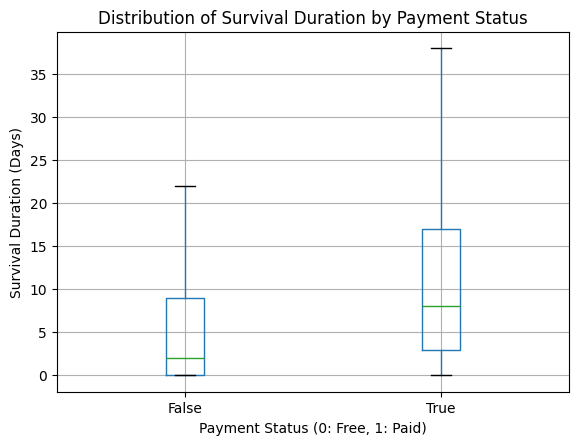


---
ÏòÅÏñ¥Î•º Î≤àÏó≠Ìïú Ï∂úÎ†•Î¨∏:
('Distribution of Survival Duration by Payment Status'): 'Í≤∞Ï†ú Ïú†Î¨¥Î≥Ñ ÏÉùÏ°¥ Í∏∞Í∞Ñ Î∂ÑÌè¨'
('Payment Status (0: Free, 1: Paid)'): 'Í≤∞Ï†ú Ïú†Î¨¥ (0: Î¨¥Î£å, 1: Ïú†Î£å)'
('Survival Duration (Days)'): 'ÏÉùÏ°¥ Í∏∞Í∞Ñ (Ïùº)'

Mann-Whitney U Í≤ÄÏ†ï p-value: 0.0000


In [ ]:
# Í≤∞Ï†ú ÏÇ¨Ïö©Ïûê Ï∂îÏ∂ú
payment_users = pd.read_csv(os.path.join(data_dir, 'accounts_paymenthistory.csv'))['user_id'].unique()

# ÏÉùÏ°¥ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ (Ïùº Îã®ÏúÑ)
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days
user_survival['is_paid'] = user_survival['user_id'].isin(payment_users)

# Í≤∞Ï†ú Ïú†Î¨¥Î≥Ñ ÌèâÍ∑† ÏÉùÏ°¥ Í∏∞Í∞Ñ
survival_stats = user_survival.groupby('is_paid')['survival_days'].agg(['mean', 'median', 'count'])
survival_stats.index = ['Î¨¥Î£å', 'Ïú†Î£å']

print("Í≤∞Ï†ú Ïú†Î¨¥Î≥Ñ ÌèâÍ∑† ÏÉùÏ°¥ Í∏∞Í∞Ñ:")
print(survival_stats)
print(f"\nÏú†Î£å ÏÇ¨Ïö©Ïûê ÎπÑÏú®: {len(payment_users) / len(user_survival) * 100:.1f}%")

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
user_survival.boxplot(column='survival_days', by='is_paid', showfliers=False)
# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï (ÏòÅÏñ¥ Ï£ºÏÑù)
plt.title('Distribution of Survival Duration by Payment Status')
plt.suptitle('')
plt.xlabel('Payment Status (0: Free, 1: Paid)')
plt.ylabel('Survival Duration (Days)')
plt.show()

print("\n---")
print("ÏòÅÏñ¥Î•º Î≤àÏó≠Ìïú Ï∂úÎ†•Î¨∏:")
print("('Distribution of Survival Duration by Payment Status'): 'Í≤∞Ï†ú Ïú†Î¨¥Î≥Ñ ÏÉùÏ°¥ Í∏∞Í∞Ñ Î∂ÑÌè¨'")
print("('Payment Status (0: Free, 1: Paid)'): 'Í≤∞Ï†ú Ïú†Î¨¥ (0: Î¨¥Î£å, 1: Ïú†Î£å)'")
print("('Survival Duration (Days)'): 'ÏÉùÏ°¥ Í∏∞Í∞Ñ (Ïùº)'")

# ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
from scipy import stats
free_days = user_survival[~user_survival['is_paid']]['survival_days']
paid_days = user_survival[user_survival['is_paid']]['survival_days']

statistic, p_value = stats.mannwhitneyu(free_days, paid_days, alternative='two-sided')
print(f"\nMann-Whitney U Í≤ÄÏ†ï p-value: {p_value:.4f}")